In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [68]:
datadir = './PetImages' #where our image folder located
categories = ['Cat', 'Dog'] #the name of folder for every category of animal
size = (50, 50) #image size that we want to use for our model

In [85]:
training_data = []

def create_training_data():
    for category in categories:
        path = os.path.join(datadir, category) #get the path for the category
        category_index = categories.index(category) #index of the category to append
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) #convert image to numerical value
                new_array = cv2.resize(img_array, size) #resize the image to make every image the same size
                training_data.append([new_array, category_index]) #append image and its category
            except:
                pass
            
create_training_data()

In [121]:
print(len(training_data))

24946


In [87]:
# We should randomized our training set because it sorted by category
import random

random.shuffle(training_data)

#Check if our data already random
for sample in training_data[:10]:
    print(sample[1])

0
1
1
0
1
0
1
1
1
1


In [98]:
#Parse training data to x and y
X = []
y = []

for data in training_data:
    X.append(data[0])
    y.append(data[1])

X = np.array(X).reshape(-1, size[0], size[1], 1) #-1 is the number of our data and 3 is rgb, if we use black and white it will be 1
y = np.asarray(y)

X.shape

(24946, 50, 50, 1)

In [99]:
# Save our training data
import pickle

pickle_out = open("X.pickle", 'wb')
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", 'wb')
pickle.dump(y, pickle_out)
pickle_out.close()

In [204]:
# Load our data back

pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)
# Normalize the value
# In rgb the max value is 255 and the min is 0, so we cann normalize it simply by dividing x by 255
X = X/255.0


pickle_in = open("y.pickle", "rb")
y = pickle.load(pickle_in)

print(X[0], y[0])

[[[0.17254902]
  [0.14901961]
  [0.25490196]
  ...
  [0.71372549]
  [0.69803922]
  [0.67058824]]

 [[0.1372549 ]
  [0.16862745]
  [0.20392157]
  ...
  [0.7254902 ]
  [0.70980392]
  [0.43137255]]

 [[0.14509804]
  [0.11764706]
  [0.21176471]
  ...
  [0.6745098 ]
  [0.4627451 ]
  [0.44313725]]

 ...

 [[0.07843137]
  [0.11372549]
  [0.11372549]
  ...
  [0.71372549]
  [0.18431373]
  [0.12941176]]

 [[0.07058824]
  [0.07843137]
  [0.10196078]
  ...
  [0.21176471]
  [0.1372549 ]
  [0.12156863]]

 [[0.05490196]
  [0.05882353]
  [0.05882353]
  ...
  [0.16470588]
  [0.12156863]
  [0.10588235]]] 0


# Creating Model

In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Activation, Conv2D, Dropout, MaxPooling2D
from tensorflow.keras.optimizers import SGD

### Split the data into train and test

In [205]:
from sklearn.model_selection import train_test_split

#split X and y
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  len(y_train))
print ('Test set:', X_test.shape,  len(y_test))

Train set: (19956, 50, 50, 1) 19956
Test set: (4990, 50, 50, 1) 4990


### Convolutional Neural Network

### TensorBoard

In [194]:
from tensorflow.keras.callbacks import TensorBoard
import time

In [209]:
name = f'cat_vs_dog_cnn{int(time.time())}' #Specify the name for every model so we can evaluate it
board = TensorBoard(log_dir=f'logs/{name}')

model = Sequential()

model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics = ['accuracy'])

model.fit(X, y, validation_split=0.1, epochs=10, batch_size=32, callbacks=[board])

Epoch 1/10
702/702 [==============================] - 152s 216ms/step - loss: 0.6146 - accuracy: 0.6557 - val_loss: 0.5405 - val_accuracy: 0.7323
Epoch 2/10
702/702 [==============================] - 147s 210ms/step - loss: 0.5092 - accuracy: 0.7542 - val_loss: 0.5484 - val_accuracy: 0.7275
Epoch 3/10
702/702 [==============================] - 146s 208ms/step - loss: 0.4649 - accuracy: 0.7789 - val_loss: 0.4996 - val_accuracy: 0.7463
Epoch 4/10
702/702 [==============================] - 146s 208ms/step - loss: 0.4276 - accuracy: 0.8029 - val_loss: 0.4631 - val_accuracy: 0.7792
Epoch 5/10
702/702 [==============================] - 148s 211ms/step - loss: 0.3879 - accuracy: 0.8229 - val_loss: 0.4606 - val_accuracy: 0.7756
Epoch 6/10
702/702 [==============================] - 146s 208ms/step - loss: 0.3460 - accuracy: 0.8459 - val_loss: 0.4638 - val_accuracy: 0.7832
Epoch 7/10
702/702 [==============================] - 146s 208ms/step - loss: 0.3033 - accuracy: 0.8678 - val_loss: 0.4740 -

In [210]:
model.evaluate(X_test, y_test)

156/156 [==============================] - 9s 60ms/step - loss: 0.1634 - accuracy: 0.9451 1s - loss: 0.1644 - accuracy - ETA: 0s - loss: 0.1645 - accu - ETA: 0s - loss: 0.164


[0.16344104707241058, 0.9450901746749878]

### Hyperparameter Tuning

In [212]:
from kerastuner.tuners import RandomSearch


def build_model(hp):
    model = Sequential()
    
    model.add(Conv2D(hp.Choice('conv_layer', values=[32,64,128]), (3,3), input_shape = X.shape[1:]))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(hp.Choice('conv_layer', values=[32,64,128]), (3,3)))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dense(hp.Choice('dense_layer', values=[32,64,128])))
    model.add(Activation("relu"))

    model.add(Dense(1))
    model.add(Activation("sigmoid"))

    model.compile(loss="binary_crossentropy",
                 optimizer="adam",
                 metrics = ['accuracy'])
    
    return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=32,
    directory='./',
    project_name='hptuner')

name = f'cat_vs_dog_cnn{int(time.time())}' #Specify the name for every model so we can evaluate it
board = TensorBoard(log_dir=f'logs/{name}')

tuner.search(X, y, validation_split=0.1, epochs=10, batch_size=32, callbacks=[board])

Epoch 1/10
  2/702 [..............................] - ETA: 0s - loss: 0.6979 - accuracy: 0.46 - ETA: 5:48 - loss: 0.6986 - accuracy: 0.4531WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.2289s vs `on_train_batch_end` time: 0.7527s). Check your callbacks.


188/702 [=======>......................] - ETA: 4:49 - loss: 0.6861 - accuracy: 0.51 - ETA: 4:18 - loss: 0.6599 - accuracy: 0.57 - ETA: 4:00 - loss: 0.6694 - accuracy: 0.57 - ETA: 3:46 - loss: 0.7139 - accuracy: 0.54 - ETA: 3:33 - loss: 0.7182 - accuracy: 0.53 - ETA: 3:23 - loss: 0.7238 - accuracy: 0.51 - ETA: 3:16 - loss: 0.7219 - accuracy: 0.51 - ETA: 3:10 - loss: 0.7195 - accuracy: 0.50 - ETA: 3:05 - loss: 0.7170 - accuracy: 0.50 - ETA: 3:01 - loss: 0.7151 - accuracy: 0.50 - ETA: 2:57 - loss: 0.7135 - accuracy: 0.50 - ETA: 2:54 - loss: 0.7120 - accuracy: 0.51 - ETA: 2:51 - loss: 0.7107 - accuracy: 0.51 - ETA: 2:48 - loss: 0.7095 - accuracy: 0.52 - ETA: 2:46 - loss: 0.7086 - accuracy: 0.52 - ETA: 2:44 - loss: 0.7076 - accuracy: 0.52 - ETA: 2:42 - loss: 0.7070 - accuracy: 0.51 - ETA: 2:40 - loss: 0.7063 - accuracy: 0.51 - ETA: 2:39 - loss: 0.7057 - accuracy: 0.51 - ETA: 2:38 - loss: 0.7051 - accuracy: 0.51 - ETA: 2:38 - loss: 0.7045 - accuracy: 0.52 - ETA: 2:38 - loss: 0.7039 - accura

374/702 [==============>...............] - ETA: 1:56 - loss: 0.6866 - accuracy: 0.53 - ETA: 1:56 - loss: 0.6863 - accuracy: 0.53 - ETA: 1:55 - loss: 0.6859 - accuracy: 0.53 - ETA: 1:55 - loss: 0.6856 - accuracy: 0.53 - ETA: 1:55 - loss: 0.6855 - accuracy: 0.53 - ETA: 1:54 - loss: 0.6850 - accuracy: 0.54 - ETA: 1:54 - loss: 0.6846 - accuracy: 0.54 - ETA: 1:54 - loss: 0.6844 - accuracy: 0.54 - ETA: 1:54 - loss: 0.6850 - accuracy: 0.54 - ETA: 1:53 - loss: 0.6854 - accuracy: 0.54 - ETA: 1:53 - loss: 0.6850 - accuracy: 0.54 - ETA: 1:53 - loss: 0.6843 - accuracy: 0.54 - ETA: 1:52 - loss: 0.6846 - accuracy: 0.54 - ETA: 1:52 - loss: 0.6843 - accuracy: 0.54 - ETA: 1:52 - loss: 0.6841 - accuracy: 0.54 - ETA: 1:51 - loss: 0.6842 - accuracy: 0.54 - ETA: 1:51 - loss: 0.6841 - accuracy: 0.54 - ETA: 1:51 - loss: 0.6842 - accuracy: 0.54 - ETA: 1:50 - loss: 0.6842 - accuracy: 0.54 - ETA: 1:50 - loss: 0.6843 - accuracy: 0.54 - ETA: 1:50 - loss: 0.6839 - accuracy: 0.54 - ETA: 1:50 - loss: 0.6838 - accura

560/702 [======================>.......] - ETA: 1:11 - loss: 0.6652 - accuracy: 0.58 - ETA: 1:11 - loss: 0.6651 - accuracy: 0.58 - ETA: 1:11 - loss: 0.6651 - accuracy: 0.58 - ETA: 1:11 - loss: 0.6649 - accuracy: 0.58 - ETA: 1:10 - loss: 0.6647 - accuracy: 0.58 - ETA: 1:10 - loss: 0.6648 - accuracy: 0.58 - ETA: 1:10 - loss: 0.6647 - accuracy: 0.58 - ETA: 1:10 - loss: 0.6647 - accuracy: 0.58 - ETA: 1:10 - loss: 0.6645 - accuracy: 0.58 - ETA: 1:09 - loss: 0.6643 - accuracy: 0.58 - ETA: 1:09 - loss: 0.6643 - accuracy: 0.58 - ETA: 1:09 - loss: 0.6645 - accuracy: 0.58 - ETA: 1:09 - loss: 0.6643 - accuracy: 0.58 - ETA: 1:08 - loss: 0.6643 - accuracy: 0.58 - ETA: 1:08 - loss: 0.6644 - accuracy: 0.58 - ETA: 1:08 - loss: 0.6645 - accuracy: 0.58 - ETA: 1:08 - loss: 0.6643 - accuracy: 0.58 - ETA: 1:07 - loss: 0.6641 - accuracy: 0.58 - ETA: 1:07 - loss: 0.6640 - accuracy: 0.58 - ETA: 1:07 - loss: 0.6640 - accuracy: 0.58 - ETA: 1:07 - loss: 0.6639 - accuracy: 0.58 - ETA: 1:06 - loss: 0.6638 - accura

702/702 [==============================] - ETA: 30s - loss: 0.6481 - accuracy: 0.609 - ETA: 30s - loss: 0.6480 - accuracy: 0.609 - ETA: 30s - loss: 0.6478 - accuracy: 0.610 - ETA: 29s - loss: 0.6477 - accuracy: 0.610 - ETA: 29s - loss: 0.6476 - accuracy: 0.610 - ETA: 29s - loss: 0.6476 - accuracy: 0.610 - ETA: 29s - loss: 0.6475 - accuracy: 0.610 - ETA: 28s - loss: 0.6476 - accuracy: 0.610 - ETA: 28s - loss: 0.6476 - accuracy: 0.610 - ETA: 28s - loss: 0.6475 - accuracy: 0.610 - ETA: 28s - loss: 0.6473 - accuracy: 0.610 - ETA: 28s - loss: 0.6474 - accuracy: 0.610 - ETA: 27s - loss: 0.6472 - accuracy: 0.611 - ETA: 27s - loss: 0.6472 - accuracy: 0.611 - ETA: 27s - loss: 0.6471 - accuracy: 0.611 - ETA: 27s - loss: 0.6471 - accuracy: 0.611 - ETA: 26s - loss: 0.6471 - accuracy: 0.611 - ETA: 26s - loss: 0.6471 - accuracy: 0.611 - ETA: 26s - loss: 0.6471 - accuracy: 0.611 - ETA: 26s - loss: 0.6468 - accuracy: 0.611 - ETA: 26s - loss: 0.6467 - accuracy: 0.611 - ETA: 25s - loss: 0.6465 - accurac

186/702 [======>.......................] - ETA: 0s - loss: 0.6029 - accuracy: 0.71 - ETA: 59s - loss: 0.5900 - accuracy: 0.718 - ETA: 1:29 - loss: 0.6007 - accuracy: 0.72 - ETA: 2:03 - loss: 0.6218 - accuracy: 0.70 - ETA: 2:14 - loss: 0.6460 - accuracy: 0.66 - ETA: 2:12 - loss: 0.6356 - accuracy: 0.67 - ETA: 2:14 - loss: 0.6330 - accuracy: 0.66 - ETA: 2:17 - loss: 0.6280 - accuracy: 0.67 - ETA: 2:17 - loss: 0.6114 - accuracy: 0.69 - ETA: 2:17 - loss: 0.6026 - accuracy: 0.69 - ETA: 2:17 - loss: 0.5990 - accuracy: 0.69 - ETA: 2:20 - loss: 0.5998 - accuracy: 0.69 - ETA: 2:22 - loss: 0.6036 - accuracy: 0.68 - ETA: 2:25 - loss: 0.5998 - accuracy: 0.69 - ETA: 2:27 - loss: 0.6060 - accuracy: 0.69 - ETA: 2:29 - loss: 0.6200 - accuracy: 0.68 - ETA: 2:29 - loss: 0.6210 - accuracy: 0.68 - ETA: 2:32 - loss: 0.6167 - accuracy: 0.68 - ETA: 2:36 - loss: 0.6179 - accuracy: 0.68 - ETA: 2:37 - loss: 0.6137 - accuracy: 0.69 - ETA: 2:36 - loss: 0.6116 - accuracy: 0.68 - ETA: 2:37 - loss: 0.6102 - accuracy

372/702 [==============>...............] - ETA: 2:06 - loss: 0.5819 - accuracy: 0.70 - ETA: 2:06 - loss: 0.5821 - accuracy: 0.70 - ETA: 2:06 - loss: 0.5826 - accuracy: 0.70 - ETA: 2:06 - loss: 0.5824 - accuracy: 0.70 - ETA: 2:06 - loss: 0.5825 - accuracy: 0.70 - ETA: 2:06 - loss: 0.5821 - accuracy: 0.70 - ETA: 2:06 - loss: 0.5830 - accuracy: 0.69 - ETA: 2:05 - loss: 0.5828 - accuracy: 0.69 - ETA: 2:05 - loss: 0.5830 - accuracy: 0.69 - ETA: 2:05 - loss: 0.5827 - accuracy: 0.70 - ETA: 2:05 - loss: 0.5819 - accuracy: 0.70 - ETA: 2:05 - loss: 0.5816 - accuracy: 0.70 - ETA: 2:05 - loss: 0.5814 - accuracy: 0.70 - ETA: 2:05 - loss: 0.5805 - accuracy: 0.70 - ETA: 2:05 - loss: 0.5813 - accuracy: 0.70 - ETA: 2:05 - loss: 0.5821 - accuracy: 0.70 - ETA: 2:05 - loss: 0.5820 - accuracy: 0.70 - ETA: 2:05 - loss: 0.5818 - accuracy: 0.70 - ETA: 2:04 - loss: 0.5817 - accuracy: 0.70 - ETA: 2:04 - loss: 0.5820 - accuracy: 0.70 - ETA: 2:04 - loss: 0.5817 - accuracy: 0.70 - ETA: 2:04 - loss: 0.5822 - accura

558/702 [======================>.......] - ETA: 1:24 - loss: 0.5755 - accuracy: 0.70 - ETA: 1:23 - loss: 0.5755 - accuracy: 0.70 - ETA: 1:23 - loss: 0.5756 - accuracy: 0.70 - ETA: 1:23 - loss: 0.5752 - accuracy: 0.70 - ETA: 1:23 - loss: 0.5753 - accuracy: 0.70 - ETA: 1:22 - loss: 0.5753 - accuracy: 0.70 - ETA: 1:22 - loss: 0.5752 - accuracy: 0.70 - ETA: 1:22 - loss: 0.5749 - accuracy: 0.70 - ETA: 1:21 - loss: 0.5749 - accuracy: 0.70 - ETA: 1:21 - loss: 0.5747 - accuracy: 0.70 - ETA: 1:21 - loss: 0.5748 - accuracy: 0.70 - ETA: 1:21 - loss: 0.5748 - accuracy: 0.70 - ETA: 1:20 - loss: 0.5747 - accuracy: 0.70 - ETA: 1:20 - loss: 0.5748 - accuracy: 0.70 - ETA: 1:20 - loss: 0.5751 - accuracy: 0.70 - ETA: 1:20 - loss: 0.5749 - accuracy: 0.70 - ETA: 1:19 - loss: 0.5747 - accuracy: 0.70 - ETA: 1:19 - loss: 0.5750 - accuracy: 0.70 - ETA: 1:19 - loss: 0.5749 - accuracy: 0.70 - ETA: 1:18 - loss: 0.5745 - accuracy: 0.70 - ETA: 1:18 - loss: 0.5746 - accuracy: 0.70 - ETA: 1:18 - loss: 0.5747 - accura

702/702 [==============================] - ETA: 36s - loss: 0.5666 - accuracy: 0.710 - ETA: 36s - loss: 0.5664 - accuracy: 0.710 - ETA: 36s - loss: 0.5663 - accuracy: 0.710 - ETA: 35s - loss: 0.5661 - accuracy: 0.711 - ETA: 35s - loss: 0.5659 - accuracy: 0.711 - ETA: 35s - loss: 0.5656 - accuracy: 0.711 - ETA: 34s - loss: 0.5659 - accuracy: 0.711 - ETA: 34s - loss: 0.5658 - accuracy: 0.711 - ETA: 34s - loss: 0.5656 - accuracy: 0.711 - ETA: 34s - loss: 0.5656 - accuracy: 0.711 - ETA: 33s - loss: 0.5657 - accuracy: 0.711 - ETA: 33s - loss: 0.5657 - accuracy: 0.711 - ETA: 33s - loss: 0.5656 - accuracy: 0.711 - ETA: 33s - loss: 0.5655 - accuracy: 0.711 - ETA: 32s - loss: 0.5656 - accuracy: 0.711 - ETA: 32s - loss: 0.5656 - accuracy: 0.711 - ETA: 32s - loss: 0.5655 - accuracy: 0.711 - ETA: 32s - loss: 0.5657 - accuracy: 0.710 - ETA: 31s - loss: 0.5656 - accuracy: 0.710 - ETA: 31s - loss: 0.5654 - accuracy: 0.710 - ETA: 31s - loss: 0.5652 - accuracy: 0.711 - ETA: 31s - loss: 0.5650 - accurac

186/702 [======>.......................] - ETA: 0s - loss: 0.5527 - accuracy: 0.68 - ETA: 1:14 - loss: 0.5134 - accuracy: 0.73 - ETA: 1:44 - loss: 0.5461 - accuracy: 0.75 - ETA: 2:01 - loss: 0.5381 - accuracy: 0.74 - ETA: 2:11 - loss: 0.5348 - accuracy: 0.74 - ETA: 2:15 - loss: 0.5121 - accuracy: 0.76 - ETA: 2:21 - loss: 0.5085 - accuracy: 0.76 - ETA: 2:28 - loss: 0.5199 - accuracy: 0.75 - ETA: 2:33 - loss: 0.5277 - accuracy: 0.73 - ETA: 2:34 - loss: 0.5265 - accuracy: 0.75 - ETA: 2:35 - loss: 0.5151 - accuracy: 0.76 - ETA: 2:34 - loss: 0.5151 - accuracy: 0.76 - ETA: 2:34 - loss: 0.5189 - accuracy: 0.75 - ETA: 2:33 - loss: 0.5155 - accuracy: 0.76 - ETA: 2:33 - loss: 0.5138 - accuracy: 0.76 - ETA: 2:33 - loss: 0.5100 - accuracy: 0.76 - ETA: 2:33 - loss: 0.5151 - accuracy: 0.76 - ETA: 2:34 - loss: 0.5198 - accuracy: 0.75 - ETA: 2:34 - loss: 0.5303 - accuracy: 0.74 - ETA: 2:34 - loss: 0.5256 - accuracy: 0.75 - ETA: 2:34 - loss: 0.5233 - accuracy: 0.75 - ETA: 2:34 - loss: 0.5207 - accuracy

372/702 [==============>...............] - ETA: 1:53 - loss: 0.5186 - accuracy: 0.74 - ETA: 1:53 - loss: 0.5186 - accuracy: 0.74 - ETA: 1:53 - loss: 0.5180 - accuracy: 0.74 - ETA: 1:53 - loss: 0.5176 - accuracy: 0.74 - ETA: 1:53 - loss: 0.5176 - accuracy: 0.74 - ETA: 1:52 - loss: 0.5176 - accuracy: 0.74 - ETA: 1:52 - loss: 0.5177 - accuracy: 0.74 - ETA: 1:52 - loss: 0.5170 - accuracy: 0.74 - ETA: 1:52 - loss: 0.5166 - accuracy: 0.74 - ETA: 1:51 - loss: 0.5173 - accuracy: 0.74 - ETA: 1:51 - loss: 0.5172 - accuracy: 0.74 - ETA: 1:51 - loss: 0.5173 - accuracy: 0.74 - ETA: 1:50 - loss: 0.5179 - accuracy: 0.74 - ETA: 1:50 - loss: 0.5178 - accuracy: 0.74 - ETA: 1:50 - loss: 0.5179 - accuracy: 0.74 - ETA: 1:50 - loss: 0.5182 - accuracy: 0.74 - ETA: 1:49 - loss: 0.5179 - accuracy: 0.74 - ETA: 1:49 - loss: 0.5178 - accuracy: 0.74 - ETA: 1:49 - loss: 0.5179 - accuracy: 0.74 - ETA: 1:48 - loss: 0.5188 - accuracy: 0.74 - ETA: 1:48 - loss: 0.5195 - accuracy: 0.74 - ETA: 1:48 - loss: 0.5189 - accura

558/702 [======================>.......] - ETA: 1:10 - loss: 0.5122 - accuracy: 0.74 - ETA: 1:10 - loss: 0.5118 - accuracy: 0.74 - ETA: 1:10 - loss: 0.5120 - accuracy: 0.74 - ETA: 1:09 - loss: 0.5117 - accuracy: 0.74 - ETA: 1:09 - loss: 0.5116 - accuracy: 0.74 - ETA: 1:09 - loss: 0.5121 - accuracy: 0.74 - ETA: 1:09 - loss: 0.5121 - accuracy: 0.74 - ETA: 1:08 - loss: 0.5121 - accuracy: 0.74 - ETA: 1:08 - loss: 0.5122 - accuracy: 0.74 - ETA: 1:08 - loss: 0.5125 - accuracy: 0.74 - ETA: 1:08 - loss: 0.5124 - accuracy: 0.74 - ETA: 1:08 - loss: 0.5127 - accuracy: 0.74 - ETA: 1:07 - loss: 0.5128 - accuracy: 0.74 - ETA: 1:07 - loss: 0.5126 - accuracy: 0.74 - ETA: 1:07 - loss: 0.5124 - accuracy: 0.74 - ETA: 1:07 - loss: 0.5124 - accuracy: 0.74 - ETA: 1:06 - loss: 0.5120 - accuracy: 0.74 - ETA: 1:06 - loss: 0.5122 - accuracy: 0.74 - ETA: 1:06 - loss: 0.5121 - accuracy: 0.74 - ETA: 1:06 - loss: 0.5123 - accuracy: 0.74 - ETA: 1:06 - loss: 0.5125 - accuracy: 0.74 - ETA: 1:05 - loss: 0.5125 - accura

702/702 [==============================] - ETA: 30s - loss: 0.5137 - accuracy: 0.748 - ETA: 30s - loss: 0.5135 - accuracy: 0.748 - ETA: 29s - loss: 0.5134 - accuracy: 0.748 - ETA: 29s - loss: 0.5135 - accuracy: 0.748 - ETA: 29s - loss: 0.5135 - accuracy: 0.748 - ETA: 29s - loss: 0.5134 - accuracy: 0.748 - ETA: 29s - loss: 0.5134 - accuracy: 0.748 - ETA: 28s - loss: 0.5134 - accuracy: 0.748 - ETA: 28s - loss: 0.5133 - accuracy: 0.748 - ETA: 28s - loss: 0.5132 - accuracy: 0.748 - ETA: 28s - loss: 0.5134 - accuracy: 0.748 - ETA: 27s - loss: 0.5135 - accuracy: 0.748 - ETA: 27s - loss: 0.5136 - accuracy: 0.748 - ETA: 27s - loss: 0.5135 - accuracy: 0.748 - ETA: 27s - loss: 0.5134 - accuracy: 0.748 - ETA: 27s - loss: 0.5133 - accuracy: 0.748 - ETA: 26s - loss: 0.5134 - accuracy: 0.748 - ETA: 26s - loss: 0.5131 - accuracy: 0.748 - ETA: 26s - loss: 0.5131 - accuracy: 0.748 - ETA: 26s - loss: 0.5130 - accuracy: 0.749 - ETA: 26s - loss: 0.5130 - accuracy: 0.749 - ETA: 25s - loss: 0.5129 - accurac

186/702 [======>.......................] - ETA: 0s - loss: 0.3582 - accuracy: 0.84 - ETA: 1:10 - loss: 0.3891 - accuracy: 0.82 - ETA: 1:41 - loss: 0.4204 - accuracy: 0.81 - ETA: 1:51 - loss: 0.4693 - accuracy: 0.76 - ETA: 1:59 - loss: 0.4713 - accuracy: 0.76 - ETA: 2:04 - loss: 0.4932 - accuracy: 0.76 - ETA: 2:06 - loss: 0.5189 - accuracy: 0.75 - ETA: 2:05 - loss: 0.5272 - accuracy: 0.73 - ETA: 2:07 - loss: 0.5306 - accuracy: 0.72 - ETA: 2:08 - loss: 0.5199 - accuracy: 0.73 - ETA: 2:09 - loss: 0.5272 - accuracy: 0.73 - ETA: 2:09 - loss: 0.5222 - accuracy: 0.73 - ETA: 2:09 - loss: 0.5187 - accuracy: 0.73 - ETA: 2:10 - loss: 0.5239 - accuracy: 0.73 - ETA: 2:11 - loss: 0.5211 - accuracy: 0.73 - ETA: 2:13 - loss: 0.5145 - accuracy: 0.74 - ETA: 2:15 - loss: 0.5110 - accuracy: 0.75 - ETA: 2:15 - loss: 0.5113 - accuracy: 0.75 - ETA: 2:15 - loss: 0.5101 - accuracy: 0.75 - ETA: 2:15 - loss: 0.5100 - accuracy: 0.74 - ETA: 2:15 - loss: 0.5179 - accuracy: 0.74 - ETA: 2:14 - loss: 0.5177 - accuracy

372/702 [==============>...............] - ETA: 1:46 - loss: 0.4915 - accuracy: 0.76 - ETA: 1:46 - loss: 0.4915 - accuracy: 0.76 - ETA: 1:46 - loss: 0.4914 - accuracy: 0.76 - ETA: 1:46 - loss: 0.4918 - accuracy: 0.76 - ETA: 1:45 - loss: 0.4920 - accuracy: 0.76 - ETA: 1:45 - loss: 0.4917 - accuracy: 0.76 - ETA: 1:45 - loss: 0.4921 - accuracy: 0.76 - ETA: 1:45 - loss: 0.4913 - accuracy: 0.76 - ETA: 1:44 - loss: 0.4916 - accuracy: 0.76 - ETA: 1:44 - loss: 0.4914 - accuracy: 0.76 - ETA: 1:44 - loss: 0.4918 - accuracy: 0.76 - ETA: 1:44 - loss: 0.4926 - accuracy: 0.76 - ETA: 1:43 - loss: 0.4927 - accuracy: 0.76 - ETA: 1:43 - loss: 0.4921 - accuracy: 0.76 - ETA: 1:43 - loss: 0.4918 - accuracy: 0.76 - ETA: 1:43 - loss: 0.4917 - accuracy: 0.76 - ETA: 1:43 - loss: 0.4917 - accuracy: 0.76 - ETA: 1:42 - loss: 0.4914 - accuracy: 0.76 - ETA: 1:42 - loss: 0.4918 - accuracy: 0.76 - ETA: 1:42 - loss: 0.4915 - accuracy: 0.76 - ETA: 1:42 - loss: 0.4918 - accuracy: 0.76 - ETA: 1:42 - loss: 0.4913 - accura

558/702 [======================>.......] - ETA: 1:08 - loss: 0.4845 - accuracy: 0.76 - ETA: 1:08 - loss: 0.4844 - accuracy: 0.76 - ETA: 1:08 - loss: 0.4844 - accuracy: 0.76 - ETA: 1:08 - loss: 0.4844 - accuracy: 0.76 - ETA: 1:08 - loss: 0.4846 - accuracy: 0.76 - ETA: 1:07 - loss: 0.4848 - accuracy: 0.76 - ETA: 1:07 - loss: 0.4851 - accuracy: 0.76 - ETA: 1:07 - loss: 0.4849 - accuracy: 0.76 - ETA: 1:07 - loss: 0.4847 - accuracy: 0.76 - ETA: 1:07 - loss: 0.4846 - accuracy: 0.76 - ETA: 1:06 - loss: 0.4846 - accuracy: 0.76 - ETA: 1:06 - loss: 0.4845 - accuracy: 0.76 - ETA: 1:06 - loss: 0.4844 - accuracy: 0.76 - ETA: 1:06 - loss: 0.4844 - accuracy: 0.76 - ETA: 1:06 - loss: 0.4848 - accuracy: 0.76 - ETA: 1:06 - loss: 0.4851 - accuracy: 0.76 - ETA: 1:05 - loss: 0.4851 - accuracy: 0.76 - ETA: 1:05 - loss: 0.4847 - accuracy: 0.76 - ETA: 1:05 - loss: 0.4848 - accuracy: 0.76 - ETA: 1:05 - loss: 0.4847 - accuracy: 0.76 - ETA: 1:04 - loss: 0.4849 - accuracy: 0.76 - ETA: 1:04 - loss: 0.4853 - accura

702/702 [==============================] - ETA: 30s - loss: 0.4811 - accuracy: 0.769 - ETA: 29s - loss: 0.4810 - accuracy: 0.769 - ETA: 29s - loss: 0.4809 - accuracy: 0.769 - ETA: 29s - loss: 0.4808 - accuracy: 0.769 - ETA: 29s - loss: 0.4807 - accuracy: 0.769 - ETA: 28s - loss: 0.4804 - accuracy: 0.770 - ETA: 28s - loss: 0.4801 - accuracy: 0.770 - ETA: 28s - loss: 0.4798 - accuracy: 0.770 - ETA: 28s - loss: 0.4795 - accuracy: 0.771 - ETA: 28s - loss: 0.4794 - accuracy: 0.771 - ETA: 27s - loss: 0.4791 - accuracy: 0.771 - ETA: 27s - loss: 0.4796 - accuracy: 0.770 - ETA: 27s - loss: 0.4799 - accuracy: 0.770 - ETA: 27s - loss: 0.4800 - accuracy: 0.770 - ETA: 27s - loss: 0.4799 - accuracy: 0.770 - ETA: 26s - loss: 0.4796 - accuracy: 0.771 - ETA: 26s - loss: 0.4799 - accuracy: 0.770 - ETA: 26s - loss: 0.4797 - accuracy: 0.770 - ETA: 26s - loss: 0.4797 - accuracy: 0.770 - ETA: 26s - loss: 0.4797 - accuracy: 0.770 - ETA: 25s - loss: 0.4798 - accuracy: 0.770 - ETA: 25s - loss: 0.4798 - accurac

186/702 [======>.......................] - ETA: 0s - loss: 0.5666 - accuracy: 0.62 - ETA: 1:15 - loss: 0.4796 - accuracy: 0.71 - ETA: 1:40 - loss: 0.4494 - accuracy: 0.76 - ETA: 1:55 - loss: 0.4914 - accuracy: 0.71 - ETA: 2:02 - loss: 0.4769 - accuracy: 0.73 - ETA: 2:08 - loss: 0.4638 - accuracy: 0.75 - ETA: 2:12 - loss: 0.4570 - accuracy: 0.76 - ETA: 2:11 - loss: 0.4426 - accuracy: 0.78 - ETA: 2:12 - loss: 0.4339 - accuracy: 0.79 - ETA: 2:12 - loss: 0.4306 - accuracy: 0.79 - ETA: 2:12 - loss: 0.4453 - accuracy: 0.78 - ETA: 2:12 - loss: 0.4379 - accuracy: 0.79 - ETA: 2:11 - loss: 0.4633 - accuracy: 0.77 - ETA: 2:12 - loss: 0.4667 - accuracy: 0.77 - ETA: 2:11 - loss: 0.4689 - accuracy: 0.76 - ETA: 2:10 - loss: 0.4696 - accuracy: 0.76 - ETA: 2:10 - loss: 0.4649 - accuracy: 0.77 - ETA: 2:10 - loss: 0.4618 - accuracy: 0.77 - ETA: 2:11 - loss: 0.4611 - accuracy: 0.77 - ETA: 2:11 - loss: 0.4593 - accuracy: 0.77 - ETA: 2:11 - loss: 0.4522 - accuracy: 0.78 - ETA: 2:12 - loss: 0.4596 - accuracy

372/702 [==============>...............] - ETA: 1:47 - loss: 0.4721 - accuracy: 0.77 - ETA: 1:47 - loss: 0.4727 - accuracy: 0.77 - ETA: 1:47 - loss: 0.4732 - accuracy: 0.77 - ETA: 1:46 - loss: 0.4729 - accuracy: 0.77 - ETA: 1:46 - loss: 0.4726 - accuracy: 0.77 - ETA: 1:46 - loss: 0.4735 - accuracy: 0.77 - ETA: 1:46 - loss: 0.4731 - accuracy: 0.77 - ETA: 1:46 - loss: 0.4726 - accuracy: 0.77 - ETA: 1:45 - loss: 0.4727 - accuracy: 0.77 - ETA: 1:45 - loss: 0.4729 - accuracy: 0.77 - ETA: 1:45 - loss: 0.4728 - accuracy: 0.77 - ETA: 1:45 - loss: 0.4730 - accuracy: 0.77 - ETA: 1:45 - loss: 0.4734 - accuracy: 0.77 - ETA: 1:44 - loss: 0.4736 - accuracy: 0.77 - ETA: 1:44 - loss: 0.4729 - accuracy: 0.77 - ETA: 1:44 - loss: 0.4729 - accuracy: 0.77 - ETA: 1:44 - loss: 0.4728 - accuracy: 0.77 - ETA: 1:44 - loss: 0.4730 - accuracy: 0.77 - ETA: 1:43 - loss: 0.4731 - accuracy: 0.77 - ETA: 1:43 - loss: 0.4724 - accuracy: 0.77 - ETA: 1:43 - loss: 0.4729 - accuracy: 0.77 - ETA: 1:42 - loss: 0.4736 - accura

558/702 [======================>.......] - ETA: 1:08 - loss: 0.4566 - accuracy: 0.78 - ETA: 1:08 - loss: 0.4568 - accuracy: 0.78 - ETA: 1:07 - loss: 0.4567 - accuracy: 0.78 - ETA: 1:07 - loss: 0.4566 - accuracy: 0.78 - ETA: 1:07 - loss: 0.4571 - accuracy: 0.78 - ETA: 1:07 - loss: 0.4572 - accuracy: 0.78 - ETA: 1:06 - loss: 0.4573 - accuracy: 0.78 - ETA: 1:06 - loss: 0.4575 - accuracy: 0.78 - ETA: 1:06 - loss: 0.4579 - accuracy: 0.78 - ETA: 1:06 - loss: 0.4579 - accuracy: 0.78 - ETA: 1:06 - loss: 0.4579 - accuracy: 0.78 - ETA: 1:05 - loss: 0.4579 - accuracy: 0.78 - ETA: 1:05 - loss: 0.4580 - accuracy: 0.78 - ETA: 1:05 - loss: 0.4579 - accuracy: 0.78 - ETA: 1:05 - loss: 0.4582 - accuracy: 0.78 - ETA: 1:04 - loss: 0.4579 - accuracy: 0.78 - ETA: 1:04 - loss: 0.4576 - accuracy: 0.78 - ETA: 1:04 - loss: 0.4579 - accuracy: 0.78 - ETA: 1:04 - loss: 0.4577 - accuracy: 0.78 - ETA: 1:04 - loss: 0.4579 - accuracy: 0.78 - ETA: 1:03 - loss: 0.4577 - accuracy: 0.78 - ETA: 1:03 - loss: 0.4578 - accura

702/702 [==============================] - ETA: 29s - loss: 0.4548 - accuracy: 0.785 - ETA: 29s - loss: 0.4550 - accuracy: 0.785 - ETA: 29s - loss: 0.4549 - accuracy: 0.785 - ETA: 28s - loss: 0.4551 - accuracy: 0.785 - ETA: 28s - loss: 0.4555 - accuracy: 0.785 - ETA: 28s - loss: 0.4555 - accuracy: 0.785 - ETA: 28s - loss: 0.4557 - accuracy: 0.785 - ETA: 28s - loss: 0.4558 - accuracy: 0.785 - ETA: 27s - loss: 0.4559 - accuracy: 0.784 - ETA: 27s - loss: 0.4559 - accuracy: 0.784 - ETA: 27s - loss: 0.4557 - accuracy: 0.784 - ETA: 27s - loss: 0.4558 - accuracy: 0.784 - ETA: 27s - loss: 0.4559 - accuracy: 0.784 - ETA: 26s - loss: 0.4559 - accuracy: 0.784 - ETA: 26s - loss: 0.4561 - accuracy: 0.784 - ETA: 26s - loss: 0.4562 - accuracy: 0.784 - ETA: 26s - loss: 0.4560 - accuracy: 0.784 - ETA: 26s - loss: 0.4563 - accuracy: 0.784 - ETA: 25s - loss: 0.4564 - accuracy: 0.784 - ETA: 25s - loss: 0.4564 - accuracy: 0.784 - ETA: 25s - loss: 0.4564 - accuracy: 0.784 - ETA: 25s - loss: 0.4564 - accurac

186/702 [======>.......................] - ETA: 0s - loss: 0.3919 - accuracy: 0.87 - ETA: 1:07 - loss: 0.4737 - accuracy: 0.76 - ETA: 1:35 - loss: 0.4796 - accuracy: 0.77 - ETA: 1:45 - loss: 0.4443 - accuracy: 0.79 - ETA: 1:53 - loss: 0.4289 - accuracy: 0.80 - ETA: 1:57 - loss: 0.4316 - accuracy: 0.79 - ETA: 1:59 - loss: 0.4237 - accuracy: 0.79 - ETA: 2:00 - loss: 0.4512 - accuracy: 0.78 - ETA: 2:01 - loss: 0.4503 - accuracy: 0.77 - ETA: 2:03 - loss: 0.4351 - accuracy: 0.78 - ETA: 2:04 - loss: 0.4336 - accuracy: 0.78 - ETA: 2:04 - loss: 0.4249 - accuracy: 0.79 - ETA: 2:04 - loss: 0.4147 - accuracy: 0.80 - ETA: 2:04 - loss: 0.4230 - accuracy: 0.80 - ETA: 2:05 - loss: 0.4140 - accuracy: 0.81 - ETA: 2:07 - loss: 0.4317 - accuracy: 0.80 - ETA: 2:09 - loss: 0.4440 - accuracy: 0.79 - ETA: 2:10 - loss: 0.4400 - accuracy: 0.79 - ETA: 2:11 - loss: 0.4467 - accuracy: 0.79 - ETA: 2:13 - loss: 0.4567 - accuracy: 0.78 - ETA: 2:15 - loss: 0.4548 - accuracy: 0.78 - ETA: 2:16 - loss: 0.4587 - accuracy

372/702 [==============>...............] - ETA: 1:49 - loss: 0.4413 - accuracy: 0.80 - ETA: 1:49 - loss: 0.4418 - accuracy: 0.80 - ETA: 1:49 - loss: 0.4419 - accuracy: 0.80 - ETA: 1:49 - loss: 0.4416 - accuracy: 0.80 - ETA: 1:48 - loss: 0.4413 - accuracy: 0.80 - ETA: 1:48 - loss: 0.4413 - accuracy: 0.80 - ETA: 1:48 - loss: 0.4410 - accuracy: 0.80 - ETA: 1:47 - loss: 0.4414 - accuracy: 0.80 - ETA: 1:47 - loss: 0.4415 - accuracy: 0.80 - ETA: 1:47 - loss: 0.4415 - accuracy: 0.80 - ETA: 1:47 - loss: 0.4422 - accuracy: 0.80 - ETA: 1:46 - loss: 0.4417 - accuracy: 0.80 - ETA: 1:46 - loss: 0.4422 - accuracy: 0.80 - ETA: 1:46 - loss: 0.4419 - accuracy: 0.80 - ETA: 1:46 - loss: 0.4418 - accuracy: 0.80 - ETA: 1:46 - loss: 0.4414 - accuracy: 0.80 - ETA: 1:45 - loss: 0.4415 - accuracy: 0.80 - ETA: 1:45 - loss: 0.4417 - accuracy: 0.80 - ETA: 1:45 - loss: 0.4416 - accuracy: 0.80 - ETA: 1:45 - loss: 0.4416 - accuracy: 0.80 - ETA: 1:45 - loss: 0.4412 - accuracy: 0.80 - ETA: 1:44 - loss: 0.4414 - accura

558/702 [======================>.......] - ETA: 1:09 - loss: 0.4406 - accuracy: 0.79 - ETA: 1:09 - loss: 0.4407 - accuracy: 0.79 - ETA: 1:08 - loss: 0.4406 - accuracy: 0.79 - ETA: 1:08 - loss: 0.4405 - accuracy: 0.79 - ETA: 1:08 - loss: 0.4404 - accuracy: 0.79 - ETA: 1:08 - loss: 0.4405 - accuracy: 0.79 - ETA: 1:08 - loss: 0.4406 - accuracy: 0.79 - ETA: 1:07 - loss: 0.4408 - accuracy: 0.79 - ETA: 1:07 - loss: 0.4410 - accuracy: 0.79 - ETA: 1:07 - loss: 0.4412 - accuracy: 0.79 - ETA: 1:07 - loss: 0.4409 - accuracy: 0.79 - ETA: 1:07 - loss: 0.4407 - accuracy: 0.79 - ETA: 1:06 - loss: 0.4405 - accuracy: 0.79 - ETA: 1:06 - loss: 0.4404 - accuracy: 0.79 - ETA: 1:06 - loss: 0.4406 - accuracy: 0.79 - ETA: 1:06 - loss: 0.4411 - accuracy: 0.79 - ETA: 1:06 - loss: 0.4411 - accuracy: 0.79 - ETA: 1:05 - loss: 0.4415 - accuracy: 0.79 - ETA: 1:05 - loss: 0.4417 - accuracy: 0.79 - ETA: 1:05 - loss: 0.4420 - accuracy: 0.79 - ETA: 1:05 - loss: 0.4419 - accuracy: 0.79 - ETA: 1:05 - loss: 0.4415 - accura

702/702 [==============================] - ETA: 30s - loss: 0.4396 - accuracy: 0.796 - ETA: 30s - loss: 0.4395 - accuracy: 0.796 - ETA: 29s - loss: 0.4395 - accuracy: 0.796 - ETA: 29s - loss: 0.4394 - accuracy: 0.796 - ETA: 29s - loss: 0.4392 - accuracy: 0.796 - ETA: 29s - loss: 0.4390 - accuracy: 0.796 - ETA: 29s - loss: 0.4391 - accuracy: 0.796 - ETA: 28s - loss: 0.4392 - accuracy: 0.796 - ETA: 28s - loss: 0.4393 - accuracy: 0.796 - ETA: 28s - loss: 0.4396 - accuracy: 0.796 - ETA: 28s - loss: 0.4395 - accuracy: 0.796 - ETA: 27s - loss: 0.4393 - accuracy: 0.796 - ETA: 27s - loss: 0.4389 - accuracy: 0.796 - ETA: 27s - loss: 0.4388 - accuracy: 0.796 - ETA: 27s - loss: 0.4386 - accuracy: 0.796 - ETA: 27s - loss: 0.4385 - accuracy: 0.796 - ETA: 26s - loss: 0.4391 - accuracy: 0.796 - ETA: 26s - loss: 0.4391 - accuracy: 0.796 - ETA: 26s - loss: 0.4392 - accuracy: 0.796 - ETA: 26s - loss: 0.4391 - accuracy: 0.796 - ETA: 26s - loss: 0.4394 - accuracy: 0.796 - ETA: 25s - loss: 0.4394 - accurac

186/702 [======>.......................] - ETA: 0s - loss: 0.3502 - accuracy: 0.84 - ETA: 1:09 - loss: 0.3969 - accuracy: 0.81 - ETA: 1:34 - loss: 0.3873 - accuracy: 0.81 - ETA: 1:46 - loss: 0.4080 - accuracy: 0.78 - ETA: 1:51 - loss: 0.4700 - accuracy: 0.76 - ETA: 1:55 - loss: 0.4671 - accuracy: 0.76 - ETA: 2:00 - loss: 0.4618 - accuracy: 0.76 - ETA: 2:02 - loss: 0.4671 - accuracy: 0.76 - ETA: 2:03 - loss: 0.4612 - accuracy: 0.76 - ETA: 2:04 - loss: 0.4465 - accuracy: 0.78 - ETA: 2:06 - loss: 0.4491 - accuracy: 0.77 - ETA: 2:07 - loss: 0.4468 - accuracy: 0.78 - ETA: 2:09 - loss: 0.4421 - accuracy: 0.78 - ETA: 2:12 - loss: 0.4345 - accuracy: 0.79 - ETA: 2:14 - loss: 0.4330 - accuracy: 0.80 - ETA: 2:16 - loss: 0.4371 - accuracy: 0.80 - ETA: 2:17 - loss: 0.4344 - accuracy: 0.80 - ETA: 2:18 - loss: 0.4339 - accuracy: 0.80 - ETA: 2:17 - loss: 0.4341 - accuracy: 0.80 - ETA: 2:16 - loss: 0.4282 - accuracy: 0.80 - ETA: 2:16 - loss: 0.4283 - accuracy: 0.80 - ETA: 2:16 - loss: 0.4203 - accuracy

372/702 [==============>...............] - ETA: 1:45 - loss: 0.4262 - accuracy: 0.79 - ETA: 1:45 - loss: 0.4262 - accuracy: 0.79 - ETA: 1:45 - loss: 0.4261 - accuracy: 0.79 - ETA: 1:45 - loss: 0.4267 - accuracy: 0.79 - ETA: 1:45 - loss: 0.4268 - accuracy: 0.79 - ETA: 1:45 - loss: 0.4279 - accuracy: 0.79 - ETA: 1:44 - loss: 0.4282 - accuracy: 0.79 - ETA: 1:44 - loss: 0.4277 - accuracy: 0.79 - ETA: 1:44 - loss: 0.4277 - accuracy: 0.79 - ETA: 1:44 - loss: 0.4281 - accuracy: 0.79 - ETA: 1:43 - loss: 0.4280 - accuracy: 0.79 - ETA: 1:43 - loss: 0.4275 - accuracy: 0.79 - ETA: 1:43 - loss: 0.4273 - accuracy: 0.79 - ETA: 1:43 - loss: 0.4277 - accuracy: 0.79 - ETA: 1:43 - loss: 0.4275 - accuracy: 0.79 - ETA: 1:43 - loss: 0.4273 - accuracy: 0.79 - ETA: 1:42 - loss: 0.4274 - accuracy: 0.79 - ETA: 1:42 - loss: 0.4268 - accuracy: 0.79 - ETA: 1:42 - loss: 0.4269 - accuracy: 0.79 - ETA: 1:42 - loss: 0.4266 - accuracy: 0.79 - ETA: 1:42 - loss: 0.4258 - accuracy: 0.79 - ETA: 1:42 - loss: 0.4261 - accura

558/702 [======================>.......] - ETA: 1:08 - loss: 0.4171 - accuracy: 0.80 - ETA: 1:07 - loss: 0.4166 - accuracy: 0.80 - ETA: 1:07 - loss: 0.4164 - accuracy: 0.80 - ETA: 1:07 - loss: 0.4167 - accuracy: 0.80 - ETA: 1:07 - loss: 0.4173 - accuracy: 0.80 - ETA: 1:06 - loss: 0.4171 - accuracy: 0.80 - ETA: 1:06 - loss: 0.4168 - accuracy: 0.80 - ETA: 1:06 - loss: 0.4168 - accuracy: 0.80 - ETA: 1:06 - loss: 0.4167 - accuracy: 0.80 - ETA: 1:06 - loss: 0.4165 - accuracy: 0.80 - ETA: 1:05 - loss: 0.4162 - accuracy: 0.80 - ETA: 1:05 - loss: 0.4162 - accuracy: 0.80 - ETA: 1:05 - loss: 0.4159 - accuracy: 0.80 - ETA: 1:05 - loss: 0.4158 - accuracy: 0.80 - ETA: 1:04 - loss: 0.4161 - accuracy: 0.80 - ETA: 1:04 - loss: 0.4160 - accuracy: 0.80 - ETA: 1:04 - loss: 0.4159 - accuracy: 0.80 - ETA: 1:04 - loss: 0.4164 - accuracy: 0.80 - ETA: 1:04 - loss: 0.4164 - accuracy: 0.80 - ETA: 1:03 - loss: 0.4164 - accuracy: 0.80 - ETA: 1:03 - loss: 0.4161 - accuracy: 0.80 - ETA: 1:03 - loss: 0.4159 - accura

702/702 [==============================] - ETA: 29s - loss: 0.4131 - accuracy: 0.809 - ETA: 29s - loss: 0.4131 - accuracy: 0.809 - ETA: 29s - loss: 0.4129 - accuracy: 0.809 - ETA: 28s - loss: 0.4130 - accuracy: 0.809 - ETA: 28s - loss: 0.4130 - accuracy: 0.809 - ETA: 28s - loss: 0.4130 - accuracy: 0.809 - ETA: 28s - loss: 0.4134 - accuracy: 0.809 - ETA: 28s - loss: 0.4132 - accuracy: 0.809 - ETA: 27s - loss: 0.4132 - accuracy: 0.809 - ETA: 27s - loss: 0.4132 - accuracy: 0.809 - ETA: 27s - loss: 0.4132 - accuracy: 0.809 - ETA: 27s - loss: 0.4133 - accuracy: 0.809 - ETA: 26s - loss: 0.4130 - accuracy: 0.809 - ETA: 26s - loss: 0.4128 - accuracy: 0.809 - ETA: 26s - loss: 0.4127 - accuracy: 0.809 - ETA: 26s - loss: 0.4125 - accuracy: 0.809 - ETA: 26s - loss: 0.4123 - accuracy: 0.810 - ETA: 25s - loss: 0.4126 - accuracy: 0.809 - ETA: 25s - loss: 0.4127 - accuracy: 0.809 - ETA: 25s - loss: 0.4126 - accuracy: 0.809 - ETA: 25s - loss: 0.4130 - accuracy: 0.809 - ETA: 25s - loss: 0.4127 - accurac

186/702 [======>.......................] - ETA: 0s - loss: 0.4535 - accuracy: 0.78 - ETA: 1:03 - loss: 0.3751 - accuracy: 0.84 - ETA: 1:32 - loss: 0.3541 - accuracy: 0.83 - ETA: 1:42 - loss: 0.3853 - accuracy: 0.82 - ETA: 1:48 - loss: 0.3750 - accuracy: 0.82 - ETA: 1:53 - loss: 0.3829 - accuracy: 0.82 - ETA: 1:58 - loss: 0.3777 - accuracy: 0.83 - ETA: 2:02 - loss: 0.3734 - accuracy: 0.83 - ETA: 2:07 - loss: 0.3785 - accuracy: 0.83 - ETA: 2:09 - loss: 0.3776 - accuracy: 0.82 - ETA: 2:11 - loss: 0.3875 - accuracy: 0.82 - ETA: 2:12 - loss: 0.3930 - accuracy: 0.82 - ETA: 2:14 - loss: 0.3920 - accuracy: 0.82 - ETA: 2:14 - loss: 0.3869 - accuracy: 0.82 - ETA: 2:17 - loss: 0.3829 - accuracy: 0.83 - ETA: 2:19 - loss: 0.3933 - accuracy: 0.82 - ETA: 2:19 - loss: 0.3884 - accuracy: 0.82 - ETA: 2:20 - loss: 0.3843 - accuracy: 0.82 - ETA: 2:21 - loss: 0.3844 - accuracy: 0.82 - ETA: 2:22 - loss: 0.3808 - accuracy: 0.83 - ETA: 2:22 - loss: 0.3820 - accuracy: 0.82 - ETA: 2:22 - loss: 0.3873 - accuracy

372/702 [==============>...............] - ETA: 1:47 - loss: 0.3920 - accuracy: 0.82 - ETA: 1:46 - loss: 0.3917 - accuracy: 0.82 - ETA: 1:46 - loss: 0.3922 - accuracy: 0.82 - ETA: 1:46 - loss: 0.3924 - accuracy: 0.82 - ETA: 1:46 - loss: 0.3921 - accuracy: 0.82 - ETA: 1:45 - loss: 0.3920 - accuracy: 0.82 - ETA: 1:45 - loss: 0.3916 - accuracy: 0.82 - ETA: 1:45 - loss: 0.3923 - accuracy: 0.82 - ETA: 1:45 - loss: 0.3920 - accuracy: 0.82 - ETA: 1:44 - loss: 0.3918 - accuracy: 0.82 - ETA: 1:44 - loss: 0.3925 - accuracy: 0.82 - ETA: 1:44 - loss: 0.3925 - accuracy: 0.82 - ETA: 1:44 - loss: 0.3918 - accuracy: 0.82 - ETA: 1:44 - loss: 0.3920 - accuracy: 0.82 - ETA: 1:43 - loss: 0.3916 - accuracy: 0.82 - ETA: 1:43 - loss: 0.3921 - accuracy: 0.82 - ETA: 1:43 - loss: 0.3912 - accuracy: 0.82 - ETA: 1:43 - loss: 0.3907 - accuracy: 0.82 - ETA: 1:43 - loss: 0.3910 - accuracy: 0.82 - ETA: 1:42 - loss: 0.3913 - accuracy: 0.82 - ETA: 1:42 - loss: 0.3904 - accuracy: 0.82 - ETA: 1:42 - loss: 0.3900 - accura

558/702 [======================>.......] - ETA: 1:08 - loss: 0.3903 - accuracy: 0.82 - ETA: 1:07 - loss: 0.3908 - accuracy: 0.82 - ETA: 1:07 - loss: 0.3906 - accuracy: 0.82 - ETA: 1:07 - loss: 0.3905 - accuracy: 0.82 - ETA: 1:07 - loss: 0.3905 - accuracy: 0.82 - ETA: 1:06 - loss: 0.3901 - accuracy: 0.82 - ETA: 1:06 - loss: 0.3909 - accuracy: 0.82 - ETA: 1:06 - loss: 0.3913 - accuracy: 0.82 - ETA: 1:06 - loss: 0.3914 - accuracy: 0.82 - ETA: 1:06 - loss: 0.3918 - accuracy: 0.82 - ETA: 1:05 - loss: 0.3921 - accuracy: 0.82 - ETA: 1:05 - loss: 0.3926 - accuracy: 0.82 - ETA: 1:05 - loss: 0.3924 - accuracy: 0.82 - ETA: 1:05 - loss: 0.3922 - accuracy: 0.82 - ETA: 1:05 - loss: 0.3923 - accuracy: 0.82 - ETA: 1:04 - loss: 0.3924 - accuracy: 0.82 - ETA: 1:04 - loss: 0.3928 - accuracy: 0.82 - ETA: 1:04 - loss: 0.3924 - accuracy: 0.82 - ETA: 1:04 - loss: 0.3922 - accuracy: 0.82 - ETA: 1:04 - loss: 0.3925 - accuracy: 0.82 - ETA: 1:03 - loss: 0.3928 - accuracy: 0.82 - ETA: 1:03 - loss: 0.3924 - accura

702/702 [==============================] - ETA: 30s - loss: 0.3972 - accuracy: 0.818 - ETA: 30s - loss: 0.3972 - accuracy: 0.818 - ETA: 30s - loss: 0.3970 - accuracy: 0.818 - ETA: 29s - loss: 0.3969 - accuracy: 0.818 - ETA: 29s - loss: 0.3970 - accuracy: 0.818 - ETA: 29s - loss: 0.3969 - accuracy: 0.818 - ETA: 29s - loss: 0.3967 - accuracy: 0.819 - ETA: 29s - loss: 0.3969 - accuracy: 0.818 - ETA: 28s - loss: 0.3972 - accuracy: 0.818 - ETA: 28s - loss: 0.3973 - accuracy: 0.818 - ETA: 28s - loss: 0.3972 - accuracy: 0.818 - ETA: 28s - loss: 0.3972 - accuracy: 0.818 - ETA: 28s - loss: 0.3972 - accuracy: 0.818 - ETA: 27s - loss: 0.3971 - accuracy: 0.818 - ETA: 27s - loss: 0.3972 - accuracy: 0.818 - ETA: 27s - loss: 0.3969 - accuracy: 0.818 - ETA: 27s - loss: 0.3966 - accuracy: 0.819 - ETA: 26s - loss: 0.3964 - accuracy: 0.819 - ETA: 26s - loss: 0.3962 - accuracy: 0.819 - ETA: 26s - loss: 0.3960 - accuracy: 0.819 - ETA: 26s - loss: 0.3959 - accuracy: 0.819 - ETA: 26s - loss: 0.3959 - accurac

186/702 [======>.......................] - ETA: 0s - loss: 0.3555 - accuracy: 0.81 - ETA: 1:16 - loss: 0.2850 - accuracy: 0.87 - ETA: 1:41 - loss: 0.3549 - accuracy: 0.81 - ETA: 1:53 - loss: 0.3734 - accuracy: 0.82 - ETA: 2:01 - loss: 0.3697 - accuracy: 0.84 - ETA: 2:07 - loss: 0.3671 - accuracy: 0.84 - ETA: 2:10 - loss: 0.3523 - accuracy: 0.85 - ETA: 2:11 - loss: 0.3657 - accuracy: 0.84 - ETA: 2:13 - loss: 0.3693 - accuracy: 0.83 - ETA: 2:14 - loss: 0.3734 - accuracy: 0.82 - ETA: 2:16 - loss: 0.3770 - accuracy: 0.82 - ETA: 2:17 - loss: 0.3802 - accuracy: 0.81 - ETA: 2:19 - loss: 0.3758 - accuracy: 0.81 - ETA: 2:21 - loss: 0.3769 - accuracy: 0.82 - ETA: 2:21 - loss: 0.3714 - accuracy: 0.82 - ETA: 2:22 - loss: 0.3744 - accuracy: 0.82 - ETA: 2:22 - loss: 0.3700 - accuracy: 0.82 - ETA: 2:22 - loss: 0.3712 - accuracy: 0.82 - ETA: 2:22 - loss: 0.3690 - accuracy: 0.82 - ETA: 2:21 - loss: 0.3630 - accuracy: 0.82 - ETA: 2:21 - loss: 0.3646 - accuracy: 0.82 - ETA: 2:21 - loss: 0.3654 - accuracy

372/702 [==============>...............] - ETA: 1:49 - loss: 0.3798 - accuracy: 0.82 - ETA: 1:49 - loss: 0.3800 - accuracy: 0.82 - ETA: 1:49 - loss: 0.3799 - accuracy: 0.82 - ETA: 1:48 - loss: 0.3804 - accuracy: 0.82 - ETA: 1:48 - loss: 0.3806 - accuracy: 0.82 - ETA: 1:48 - loss: 0.3809 - accuracy: 0.82 - ETA: 1:48 - loss: 0.3800 - accuracy: 0.82 - ETA: 1:48 - loss: 0.3805 - accuracy: 0.82 - ETA: 1:47 - loss: 0.3801 - accuracy: 0.82 - ETA: 1:47 - loss: 0.3805 - accuracy: 0.82 - ETA: 1:47 - loss: 0.3806 - accuracy: 0.82 - ETA: 1:47 - loss: 0.3806 - accuracy: 0.82 - ETA: 1:47 - loss: 0.3801 - accuracy: 0.82 - ETA: 1:46 - loss: 0.3804 - accuracy: 0.82 - ETA: 1:46 - loss: 0.3806 - accuracy: 0.82 - ETA: 1:46 - loss: 0.3799 - accuracy: 0.82 - ETA: 1:46 - loss: 0.3793 - accuracy: 0.82 - ETA: 1:45 - loss: 0.3793 - accuracy: 0.82 - ETA: 1:45 - loss: 0.3797 - accuracy: 0.82 - ETA: 1:45 - loss: 0.3788 - accuracy: 0.82 - ETA: 1:45 - loss: 0.3789 - accuracy: 0.82 - ETA: 1:44 - loss: 0.3787 - accura

558/702 [======================>.......] - ETA: 1:09 - loss: 0.3807 - accuracy: 0.82 - ETA: 1:09 - loss: 0.3806 - accuracy: 0.82 - ETA: 1:08 - loss: 0.3803 - accuracy: 0.82 - ETA: 1:08 - loss: 0.3800 - accuracy: 0.82 - ETA: 1:08 - loss: 0.3797 - accuracy: 0.82 - ETA: 1:08 - loss: 0.3793 - accuracy: 0.82 - ETA: 1:08 - loss: 0.3790 - accuracy: 0.82 - ETA: 1:07 - loss: 0.3789 - accuracy: 0.82 - ETA: 1:07 - loss: 0.3786 - accuracy: 0.82 - ETA: 1:07 - loss: 0.3785 - accuracy: 0.82 - ETA: 1:07 - loss: 0.3783 - accuracy: 0.82 - ETA: 1:07 - loss: 0.3781 - accuracy: 0.82 - ETA: 1:06 - loss: 0.3781 - accuracy: 0.82 - ETA: 1:06 - loss: 0.3784 - accuracy: 0.82 - ETA: 1:06 - loss: 0.3786 - accuracy: 0.82 - ETA: 1:06 - loss: 0.3786 - accuracy: 0.82 - ETA: 1:05 - loss: 0.3786 - accuracy: 0.82 - ETA: 1:05 - loss: 0.3783 - accuracy: 0.82 - ETA: 1:05 - loss: 0.3781 - accuracy: 0.82 - ETA: 1:05 - loss: 0.3780 - accuracy: 0.82 - ETA: 1:05 - loss: 0.3779 - accuracy: 0.82 - ETA: 1:04 - loss: 0.3778 - accura

702/702 [==============================] - ETA: 30s - loss: 0.3816 - accuracy: 0.825 - ETA: 29s - loss: 0.3817 - accuracy: 0.826 - ETA: 29s - loss: 0.3819 - accuracy: 0.825 - ETA: 29s - loss: 0.3818 - accuracy: 0.826 - ETA: 29s - loss: 0.3818 - accuracy: 0.826 - ETA: 29s - loss: 0.3816 - accuracy: 0.826 - ETA: 28s - loss: 0.3814 - accuracy: 0.826 - ETA: 28s - loss: 0.3816 - accuracy: 0.826 - ETA: 28s - loss: 0.3818 - accuracy: 0.826 - ETA: 28s - loss: 0.3817 - accuracy: 0.826 - ETA: 28s - loss: 0.3817 - accuracy: 0.826 - ETA: 27s - loss: 0.3816 - accuracy: 0.826 - ETA: 27s - loss: 0.3817 - accuracy: 0.826 - ETA: 27s - loss: 0.3817 - accuracy: 0.826 - ETA: 27s - loss: 0.3819 - accuracy: 0.826 - ETA: 27s - loss: 0.3817 - accuracy: 0.826 - ETA: 26s - loss: 0.3819 - accuracy: 0.826 - ETA: 26s - loss: 0.3820 - accuracy: 0.826 - ETA: 26s - loss: 0.3818 - accuracy: 0.826 - ETA: 26s - loss: 0.3818 - accuracy: 0.826 - ETA: 26s - loss: 0.3817 - accuracy: 0.826 - ETA: 25s - loss: 0.3820 - accurac

186/702 [======>.......................] - ETA: 0s - loss: 0.3464 - accuracy: 0.84 - ETA: 1:14 - loss: 0.3642 - accuracy: 0.84 - ETA: 1:43 - loss: 0.3924 - accuracy: 0.83 - ETA: 2:00 - loss: 0.3819 - accuracy: 0.82 - ETA: 2:07 - loss: 0.3592 - accuracy: 0.83 - ETA: 2:12 - loss: 0.3637 - accuracy: 0.82 - ETA: 2:16 - loss: 0.3748 - accuracy: 0.83 - ETA: 2:19 - loss: 0.3625 - accuracy: 0.83 - ETA: 2:24 - loss: 0.3603 - accuracy: 0.83 - ETA: 2:22 - loss: 0.3658 - accuracy: 0.82 - ETA: 2:30 - loss: 0.3653 - accuracy: 0.82 - ETA: 2:30 - loss: 0.3724 - accuracy: 0.82 - ETA: 2:29 - loss: 0.3868 - accuracy: 0.81 - ETA: 2:27 - loss: 0.4015 - accuracy: 0.79 - ETA: 2:26 - loss: 0.4045 - accuracy: 0.79 - ETA: 2:26 - loss: 0.4007 - accuracy: 0.79 - ETA: 2:26 - loss: 0.3996 - accuracy: 0.80 - ETA: 2:31 - loss: 0.3937 - accuracy: 0.80 - ETA: 2:33 - loss: 0.3876 - accuracy: 0.81 - ETA: 2:32 - loss: 0.3812 - accuracy: 0.81 - ETA: 2:32 - loss: 0.3783 - accuracy: 0.81 - ETA: 2:31 - loss: 0.3737 - accuracy

372/702 [==============>...............] - ETA: 1:58 - loss: 0.3494 - accuracy: 0.84 - ETA: 1:58 - loss: 0.3493 - accuracy: 0.84 - ETA: 1:58 - loss: 0.3494 - accuracy: 0.84 - ETA: 1:57 - loss: 0.3495 - accuracy: 0.84 - ETA: 1:57 - loss: 0.3503 - accuracy: 0.84 - ETA: 1:57 - loss: 0.3501 - accuracy: 0.84 - ETA: 1:57 - loss: 0.3503 - accuracy: 0.84 - ETA: 1:56 - loss: 0.3507 - accuracy: 0.84 - ETA: 1:56 - loss: 0.3521 - accuracy: 0.84 - ETA: 1:56 - loss: 0.3519 - accuracy: 0.84 - ETA: 1:56 - loss: 0.3515 - accuracy: 0.84 - ETA: 1:56 - loss: 0.3514 - accuracy: 0.84 - ETA: 1:55 - loss: 0.3516 - accuracy: 0.84 - ETA: 1:55 - loss: 0.3514 - accuracy: 0.84 - ETA: 1:55 - loss: 0.3524 - accuracy: 0.84 - ETA: 1:55 - loss: 0.3526 - accuracy: 0.84 - ETA: 1:54 - loss: 0.3525 - accuracy: 0.84 - ETA: 1:54 - loss: 0.3525 - accuracy: 0.84 - ETA: 1:54 - loss: 0.3524 - accuracy: 0.84 - ETA: 1:53 - loss: 0.3532 - accuracy: 0.84 - ETA: 1:53 - loss: 0.3540 - accuracy: 0.84 - ETA: 1:53 - loss: 0.3543 - accura

558/702 [======================>.......] - ETA: 1:14 - loss: 0.3585 - accuracy: 0.84 - ETA: 1:14 - loss: 0.3582 - accuracy: 0.84 - ETA: 1:14 - loss: 0.3581 - accuracy: 0.84 - ETA: 1:13 - loss: 0.3582 - accuracy: 0.84 - ETA: 1:13 - loss: 0.3580 - accuracy: 0.84 - ETA: 1:13 - loss: 0.3581 - accuracy: 0.84 - ETA: 1:13 - loss: 0.3581 - accuracy: 0.84 - ETA: 1:12 - loss: 0.3578 - accuracy: 0.84 - ETA: 1:12 - loss: 0.3578 - accuracy: 0.84 - ETA: 1:12 - loss: 0.3576 - accuracy: 0.84 - ETA: 1:12 - loss: 0.3574 - accuracy: 0.84 - ETA: 1:11 - loss: 0.3575 - accuracy: 0.84 - ETA: 1:11 - loss: 0.3573 - accuracy: 0.84 - ETA: 1:11 - loss: 0.3571 - accuracy: 0.84 - ETA: 1:11 - loss: 0.3567 - accuracy: 0.84 - ETA: 1:10 - loss: 0.3565 - accuracy: 0.84 - ETA: 1:10 - loss: 0.3561 - accuracy: 0.84 - ETA: 1:10 - loss: 0.3561 - accuracy: 0.84 - ETA: 1:10 - loss: 0.3563 - accuracy: 0.84 - ETA: 1:10 - loss: 0.3560 - accuracy: 0.84 - ETA: 1:09 - loss: 0.3556 - accuracy: 0.84 - ETA: 1:09 - loss: 0.3560 - accura

702/702 [==============================] - ETA: 32s - loss: 0.3568 - accuracy: 0.844 - ETA: 32s - loss: 0.3569 - accuracy: 0.843 - ETA: 32s - loss: 0.3569 - accuracy: 0.843 - ETA: 32s - loss: 0.3571 - accuracy: 0.843 - ETA: 31s - loss: 0.3571 - accuracy: 0.843 - ETA: 31s - loss: 0.3571 - accuracy: 0.843 - ETA: 31s - loss: 0.3569 - accuracy: 0.843 - ETA: 31s - loss: 0.3571 - accuracy: 0.843 - ETA: 30s - loss: 0.3574 - accuracy: 0.843 - ETA: 30s - loss: 0.3573 - accuracy: 0.843 - ETA: 30s - loss: 0.3571 - accuracy: 0.843 - ETA: 30s - loss: 0.3572 - accuracy: 0.843 - ETA: 30s - loss: 0.3572 - accuracy: 0.843 - ETA: 29s - loss: 0.3571 - accuracy: 0.843 - ETA: 29s - loss: 0.3570 - accuracy: 0.843 - ETA: 29s - loss: 0.3571 - accuracy: 0.843 - ETA: 29s - loss: 0.3574 - accuracy: 0.842 - ETA: 28s - loss: 0.3576 - accuracy: 0.842 - ETA: 28s - loss: 0.3577 - accuracy: 0.842 - ETA: 28s - loss: 0.3579 - accuracy: 0.842 - ETA: 28s - loss: 0.3576 - accuracy: 0.842 - ETA: 27s - loss: 0.3577 - accurac

Epoch 1/10
  2/702 [..............................] - ETA: 0s - loss: 0.6994 - accuracy: 0.43 - ETA: 3:17 - loss: 0.6927 - accuracy: 0.5000WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.1119s vs `on_train_batch_end` time: 0.4477s). Check your callbacks.


188/702 [=======>......................] - ETA: 2:40 - loss: 0.6865 - accuracy: 0.53 - ETA: 2:21 - loss: 0.6951 - accuracy: 0.51 - ETA: 2:10 - loss: 0.6948 - accuracy: 0.50 - ETA: 2:04 - loss: 0.6952 - accuracy: 0.47 - ETA: 2:00 - loss: 0.6956 - accuracy: 0.47 - ETA: 1:56 - loss: 0.6956 - accuracy: 0.47 - ETA: 1:53 - loss: 0.6952 - accuracy: 0.48 - ETA: 1:51 - loss: 0.6952 - accuracy: 0.48 - ETA: 1:50 - loss: 0.6948 - accuracy: 0.48 - ETA: 1:49 - loss: 0.6946 - accuracy: 0.48 - ETA: 1:49 - loss: 0.6947 - accuracy: 0.48 - ETA: 1:48 - loss: 0.6944 - accuracy: 0.48 - ETA: 1:47 - loss: 0.6944 - accuracy: 0.47 - ETA: 1:46 - loss: 0.6943 - accuracy: 0.48 - ETA: 1:45 - loss: 0.6943 - accuracy: 0.48 - ETA: 1:45 - loss: 0.6940 - accuracy: 0.48 - ETA: 1:44 - loss: 0.6939 - accuracy: 0.48 - ETA: 1:44 - loss: 0.6940 - accuracy: 0.47 - ETA: 1:44 - loss: 0.6936 - accuracy: 0.48 - ETA: 1:43 - loss: 0.6935 - accuracy: 0.48 - ETA: 1:43 - loss: 0.6933 - accuracy: 0.49 - ETA: 1:42 - loss: 0.6942 - accura

374/702 [==============>...............] - ETA: 1:06 - loss: 0.6720 - accuracy: 0.56 - ETA: 1:06 - loss: 0.6724 - accuracy: 0.56 - ETA: 1:05 - loss: 0.6721 - accuracy: 0.56 - ETA: 1:05 - loss: 0.6718 - accuracy: 0.56 - ETA: 1:05 - loss: 0.6712 - accuracy: 0.57 - ETA: 1:05 - loss: 0.6706 - accuracy: 0.57 - ETA: 1:05 - loss: 0.6708 - accuracy: 0.57 - ETA: 1:04 - loss: 0.6707 - accuracy: 0.57 - ETA: 1:04 - loss: 0.6707 - accuracy: 0.57 - ETA: 1:04 - loss: 0.6705 - accuracy: 0.57 - ETA: 1:04 - loss: 0.6712 - accuracy: 0.57 - ETA: 1:04 - loss: 0.6707 - accuracy: 0.57 - ETA: 1:04 - loss: 0.6705 - accuracy: 0.57 - ETA: 1:03 - loss: 0.6704 - accuracy: 0.57 - ETA: 1:03 - loss: 0.6701 - accuracy: 0.57 - ETA: 1:03 - loss: 0.6700 - accuracy: 0.57 - ETA: 1:03 - loss: 0.6697 - accuracy: 0.57 - ETA: 1:03 - loss: 0.6698 - accuracy: 0.57 - ETA: 1:03 - loss: 0.6692 - accuracy: 0.57 - ETA: 1:03 - loss: 0.6686 - accuracy: 0.57 - ETA: 1:03 - loss: 0.6680 - accuracy: 0.57 - ETA: 1:03 - loss: 0.6679 - accura

560/702 [======================>.......] - ETA: 42s - loss: 0.6480 - accuracy: 0.612 - ETA: 42s - loss: 0.6479 - accuracy: 0.612 - ETA: 42s - loss: 0.6479 - accuracy: 0.612 - ETA: 42s - loss: 0.6480 - accuracy: 0.612 - ETA: 42s - loss: 0.6479 - accuracy: 0.612 - ETA: 42s - loss: 0.6479 - accuracy: 0.612 - ETA: 41s - loss: 0.6480 - accuracy: 0.612 - ETA: 41s - loss: 0.6478 - accuracy: 0.612 - ETA: 41s - loss: 0.6477 - accuracy: 0.612 - ETA: 41s - loss: 0.6476 - accuracy: 0.612 - ETA: 41s - loss: 0.6475 - accuracy: 0.612 - ETA: 41s - loss: 0.6476 - accuracy: 0.613 - ETA: 41s - loss: 0.6475 - accuracy: 0.613 - ETA: 41s - loss: 0.6474 - accuracy: 0.613 - ETA: 40s - loss: 0.6474 - accuracy: 0.613 - ETA: 40s - loss: 0.6473 - accuracy: 0.613 - ETA: 40s - loss: 0.6470 - accuracy: 0.613 - ETA: 40s - loss: 0.6468 - accuracy: 0.614 - ETA: 40s - loss: 0.6466 - accuracy: 0.614 - ETA: 40s - loss: 0.6465 - accuracy: 0.614 - ETA: 40s - loss: 0.6463 - accuracy: 0.615 - ETA: 39s - loss: 0.6463 - accurac

702/702 [==============================] - ETA: 18s - loss: 0.6277 - accuracy: 0.638 - ETA: 17s - loss: 0.6277 - accuracy: 0.638 - ETA: 17s - loss: 0.6274 - accuracy: 0.639 - ETA: 17s - loss: 0.6274 - accuracy: 0.639 - ETA: 17s - loss: 0.6273 - accuracy: 0.639 - ETA: 17s - loss: 0.6273 - accuracy: 0.639 - ETA: 17s - loss: 0.6272 - accuracy: 0.639 - ETA: 17s - loss: 0.6273 - accuracy: 0.639 - ETA: 17s - loss: 0.6272 - accuracy: 0.639 - ETA: 16s - loss: 0.6274 - accuracy: 0.639 - ETA: 16s - loss: 0.6272 - accuracy: 0.639 - ETA: 16s - loss: 0.6270 - accuracy: 0.639 - ETA: 16s - loss: 0.6267 - accuracy: 0.639 - ETA: 16s - loss: 0.6267 - accuracy: 0.639 - ETA: 16s - loss: 0.6265 - accuracy: 0.640 - ETA: 16s - loss: 0.6260 - accuracy: 0.640 - ETA: 16s - loss: 0.6259 - accuracy: 0.640 - ETA: 15s - loss: 0.6259 - accuracy: 0.640 - ETA: 15s - loss: 0.6259 - accuracy: 0.640 - ETA: 15s - loss: 0.6258 - accuracy: 0.640 - ETA: 15s - loss: 0.6258 - accuracy: 0.640 - ETA: 15s - loss: 0.6257 - accurac

186/702 [======>.......................] - ETA: 0s - loss: 0.6297 - accuracy: 0.68 - ETA: 40s - loss: 0.5830 - accuracy: 0.734 - ETA: 56s - loss: 0.5957 - accuracy: 0.708 - ETA: 1:01 - loss: 0.5636 - accuracy: 0.72 - ETA: 1:04 - loss: 0.5732 - accuracy: 0.71 - ETA: 1:06 - loss: 0.5634 - accuracy: 0.72 - ETA: 1:08 - loss: 0.5594 - accuracy: 0.72 - ETA: 1:09 - loss: 0.5564 - accuracy: 0.73 - ETA: 1:09 - loss: 0.5476 - accuracy: 0.73 - ETA: 1:10 - loss: 0.5473 - accuracy: 0.74 - ETA: 1:11 - loss: 0.5468 - accuracy: 0.75 - ETA: 1:11 - loss: 0.5420 - accuracy: 0.75 - ETA: 1:12 - loss: 0.5465 - accuracy: 0.74 - ETA: 1:12 - loss: 0.5379 - accuracy: 0.75 - ETA: 1:12 - loss: 0.5373 - accuracy: 0.76 - ETA: 1:12 - loss: 0.5439 - accuracy: 0.75 - ETA: 1:13 - loss: 0.5469 - accuracy: 0.74 - ETA: 1:14 - loss: 0.5444 - accuracy: 0.74 - ETA: 1:14 - loss: 0.5543 - accuracy: 0.73 - ETA: 1:16 - loss: 0.5606 - accuracy: 0.72 - ETA: 1:17 - loss: 0.5551 - accuracy: 0.73 - ETA: 1:17 - loss: 0.5552 - accuracy

372/702 [==============>...............] - ETA: 1:05 - loss: 0.5281 - accuracy: 0.74 - ETA: 1:05 - loss: 0.5284 - accuracy: 0.74 - ETA: 1:05 - loss: 0.5279 - accuracy: 0.74 - ETA: 1:05 - loss: 0.5286 - accuracy: 0.74 - ETA: 1:05 - loss: 0.5286 - accuracy: 0.74 - ETA: 1:05 - loss: 0.5279 - accuracy: 0.74 - ETA: 1:05 - loss: 0.5282 - accuracy: 0.74 - ETA: 1:05 - loss: 0.5282 - accuracy: 0.74 - ETA: 1:05 - loss: 0.5281 - accuracy: 0.74 - ETA: 1:05 - loss: 0.5271 - accuracy: 0.74 - ETA: 1:04 - loss: 0.5280 - accuracy: 0.74 - ETA: 1:04 - loss: 0.5279 - accuracy: 0.74 - ETA: 1:04 - loss: 0.5280 - accuracy: 0.74 - ETA: 1:04 - loss: 0.5276 - accuracy: 0.74 - ETA: 1:04 - loss: 0.5274 - accuracy: 0.74 - ETA: 1:04 - loss: 0.5267 - accuracy: 0.74 - ETA: 1:03 - loss: 0.5260 - accuracy: 0.74 - ETA: 1:03 - loss: 0.5258 - accuracy: 0.74 - ETA: 1:03 - loss: 0.5259 - accuracy: 0.74 - ETA: 1:03 - loss: 0.5263 - accuracy: 0.74 - ETA: 1:03 - loss: 0.5268 - accuracy: 0.74 - ETA: 1:03 - loss: 0.5269 - accura

558/702 [======================>.......] - ETA: 42s - loss: 0.5247 - accuracy: 0.743 - ETA: 42s - loss: 0.5248 - accuracy: 0.743 - ETA: 42s - loss: 0.5250 - accuracy: 0.743 - ETA: 42s - loss: 0.5249 - accuracy: 0.743 - ETA: 42s - loss: 0.5246 - accuracy: 0.743 - ETA: 42s - loss: 0.5246 - accuracy: 0.743 - ETA: 42s - loss: 0.5247 - accuracy: 0.743 - ETA: 42s - loss: 0.5248 - accuracy: 0.742 - ETA: 41s - loss: 0.5247 - accuracy: 0.742 - ETA: 41s - loss: 0.5247 - accuracy: 0.742 - ETA: 41s - loss: 0.5242 - accuracy: 0.743 - ETA: 41s - loss: 0.5247 - accuracy: 0.742 - ETA: 41s - loss: 0.5247 - accuracy: 0.742 - ETA: 41s - loss: 0.5247 - accuracy: 0.742 - ETA: 41s - loss: 0.5244 - accuracy: 0.742 - ETA: 41s - loss: 0.5242 - accuracy: 0.743 - ETA: 41s - loss: 0.5239 - accuracy: 0.743 - ETA: 40s - loss: 0.5235 - accuracy: 0.743 - ETA: 40s - loss: 0.5236 - accuracy: 0.743 - ETA: 40s - loss: 0.5236 - accuracy: 0.743 - ETA: 40s - loss: 0.5237 - accuracy: 0.743 - ETA: 40s - loss: 0.5235 - accurac

702/702 [==============================] - ETA: 18s - loss: 0.5213 - accuracy: 0.744 - ETA: 18s - loss: 0.5215 - accuracy: 0.743 - ETA: 18s - loss: 0.5215 - accuracy: 0.743 - ETA: 18s - loss: 0.5216 - accuracy: 0.743 - ETA: 18s - loss: 0.5215 - accuracy: 0.743 - ETA: 18s - loss: 0.5214 - accuracy: 0.743 - ETA: 18s - loss: 0.5213 - accuracy: 0.743 - ETA: 17s - loss: 0.5215 - accuracy: 0.743 - ETA: 17s - loss: 0.5214 - accuracy: 0.743 - ETA: 17s - loss: 0.5210 - accuracy: 0.743 - ETA: 17s - loss: 0.5209 - accuracy: 0.743 - ETA: 17s - loss: 0.5208 - accuracy: 0.743 - ETA: 17s - loss: 0.5207 - accuracy: 0.743 - ETA: 17s - loss: 0.5209 - accuracy: 0.743 - ETA: 17s - loss: 0.5211 - accuracy: 0.743 - ETA: 16s - loss: 0.5209 - accuracy: 0.743 - ETA: 16s - loss: 0.5206 - accuracy: 0.743 - ETA: 16s - loss: 0.5210 - accuracy: 0.743 - ETA: 16s - loss: 0.5211 - accuracy: 0.743 - ETA: 16s - loss: 0.5210 - accuracy: 0.743 - ETA: 16s - loss: 0.5214 - accuracy: 0.743 - ETA: 16s - loss: 0.5216 - accurac

186/702 [======>.......................] - ETA: 0s - loss: 0.4648 - accuracy: 0.78 - ETA: 47s - loss: 0.4540 - accuracy: 0.765 - ETA: 1:03 - loss: 0.4964 - accuracy: 0.76 - ETA: 1:09 - loss: 0.4838 - accuracy: 0.77 - ETA: 1:13 - loss: 0.5140 - accuracy: 0.74 - ETA: 1:14 - loss: 0.5297 - accuracy: 0.73 - ETA: 1:15 - loss: 0.5305 - accuracy: 0.73 - ETA: 1:17 - loss: 0.5153 - accuracy: 0.73 - ETA: 1:19 - loss: 0.5088 - accuracy: 0.73 - ETA: 1:21 - loss: 0.5157 - accuracy: 0.73 - ETA: 1:22 - loss: 0.5202 - accuracy: 0.72 - ETA: 1:22 - loss: 0.5165 - accuracy: 0.72 - ETA: 1:22 - loss: 0.5100 - accuracy: 0.72 - ETA: 1:21 - loss: 0.4965 - accuracy: 0.73 - ETA: 1:21 - loss: 0.4914 - accuracy: 0.74 - ETA: 1:21 - loss: 0.4853 - accuracy: 0.74 - ETA: 1:21 - loss: 0.4876 - accuracy: 0.74 - ETA: 1:21 - loss: 0.4829 - accuracy: 0.75 - ETA: 1:21 - loss: 0.4883 - accuracy: 0.75 - ETA: 1:21 - loss: 0.4909 - accuracy: 0.75 - ETA: 1:20 - loss: 0.4899 - accuracy: 0.75 - ETA: 1:20 - loss: 0.4892 - accuracy

372/702 [==============>...............] - ETA: 1:02 - loss: 0.4729 - accuracy: 0.77 - ETA: 1:02 - loss: 0.4725 - accuracy: 0.77 - ETA: 1:02 - loss: 0.4724 - accuracy: 0.77 - ETA: 1:02 - loss: 0.4728 - accuracy: 0.77 - ETA: 1:02 - loss: 0.4730 - accuracy: 0.77 - ETA: 1:02 - loss: 0.4734 - accuracy: 0.77 - ETA: 1:02 - loss: 0.4740 - accuracy: 0.76 - ETA: 1:02 - loss: 0.4742 - accuracy: 0.76 - ETA: 1:02 - loss: 0.4742 - accuracy: 0.76 - ETA: 1:01 - loss: 0.4737 - accuracy: 0.76 - ETA: 1:01 - loss: 0.4746 - accuracy: 0.76 - ETA: 1:01 - loss: 0.4746 - accuracy: 0.76 - ETA: 1:01 - loss: 0.4746 - accuracy: 0.76 - ETA: 1:01 - loss: 0.4746 - accuracy: 0.76 - ETA: 1:01 - loss: 0.4745 - accuracy: 0.76 - ETA: 1:01 - loss: 0.4739 - accuracy: 0.76 - ETA: 1:01 - loss: 0.4751 - accuracy: 0.76 - ETA: 1:00 - loss: 0.4763 - accuracy: 0.76 - ETA: 1:00 - loss: 0.4758 - accuracy: 0.76 - ETA: 1:00 - loss: 0.4759 - accuracy: 0.76 - ETA: 1:00 - loss: 0.4756 - accuracy: 0.76 - ETA: 1:00 - loss: 0.4749 - accura

558/702 [======================>.......] - ETA: 40s - loss: 0.4707 - accuracy: 0.771 - ETA: 40s - loss: 0.4706 - accuracy: 0.771 - ETA: 40s - loss: 0.4713 - accuracy: 0.770 - ETA: 39s - loss: 0.4719 - accuracy: 0.770 - ETA: 39s - loss: 0.4724 - accuracy: 0.770 - ETA: 39s - loss: 0.4724 - accuracy: 0.770 - ETA: 39s - loss: 0.4725 - accuracy: 0.770 - ETA: 39s - loss: 0.4722 - accuracy: 0.770 - ETA: 39s - loss: 0.4724 - accuracy: 0.770 - ETA: 39s - loss: 0.4722 - accuracy: 0.770 - ETA: 39s - loss: 0.4721 - accuracy: 0.770 - ETA: 38s - loss: 0.4720 - accuracy: 0.770 - ETA: 38s - loss: 0.4720 - accuracy: 0.770 - ETA: 38s - loss: 0.4725 - accuracy: 0.770 - ETA: 38s - loss: 0.4722 - accuracy: 0.770 - ETA: 38s - loss: 0.4724 - accuracy: 0.770 - ETA: 38s - loss: 0.4721 - accuracy: 0.770 - ETA: 38s - loss: 0.4719 - accuracy: 0.770 - ETA: 37s - loss: 0.4717 - accuracy: 0.770 - ETA: 37s - loss: 0.4718 - accuracy: 0.771 - ETA: 37s - loss: 0.4718 - accuracy: 0.770 - ETA: 37s - loss: 0.4716 - accurac

702/702 [==============================] - ETA: 17s - loss: 0.4733 - accuracy: 0.772 - ETA: 17s - loss: 0.4734 - accuracy: 0.772 - ETA: 17s - loss: 0.4732 - accuracy: 0.772 - ETA: 17s - loss: 0.4731 - accuracy: 0.772 - ETA: 17s - loss: 0.4731 - accuracy: 0.772 - ETA: 16s - loss: 0.4732 - accuracy: 0.772 - ETA: 16s - loss: 0.4734 - accuracy: 0.772 - ETA: 16s - loss: 0.4733 - accuracy: 0.772 - ETA: 16s - loss: 0.4735 - accuracy: 0.772 - ETA: 16s - loss: 0.4732 - accuracy: 0.772 - ETA: 16s - loss: 0.4733 - accuracy: 0.772 - ETA: 16s - loss: 0.4730 - accuracy: 0.772 - ETA: 16s - loss: 0.4732 - accuracy: 0.772 - ETA: 15s - loss: 0.4734 - accuracy: 0.772 - ETA: 15s - loss: 0.4733 - accuracy: 0.772 - ETA: 15s - loss: 0.4736 - accuracy: 0.772 - ETA: 15s - loss: 0.4737 - accuracy: 0.772 - ETA: 15s - loss: 0.4737 - accuracy: 0.772 - ETA: 15s - loss: 0.4737 - accuracy: 0.772 - ETA: 15s - loss: 0.4734 - accuracy: 0.772 - ETA: 15s - loss: 0.4737 - accuracy: 0.772 - ETA: 15s - loss: 0.4736 - accurac

186/702 [======>.......................] - ETA: 0s - loss: 0.4003 - accuracy: 0.84 - ETA: 35s - loss: 0.3874 - accuracy: 0.828 - ETA: 47s - loss: 0.3979 - accuracy: 0.833 - ETA: 53s - loss: 0.4009 - accuracy: 0.828 - ETA: 56s - loss: 0.4012 - accuracy: 0.825 - ETA: 58s - loss: 0.3821 - accuracy: 0.838 - ETA: 1:00 - loss: 0.3869 - accuracy: 0.83 - ETA: 1:04 - loss: 0.3750 - accuracy: 0.84 - ETA: 1:05 - loss: 0.3952 - accuracy: 0.83 - ETA: 1:05 - loss: 0.3957 - accuracy: 0.84 - ETA: 1:06 - loss: 0.3968 - accuracy: 0.83 - ETA: 1:06 - loss: 0.4003 - accuracy: 0.83 - ETA: 1:08 - loss: 0.4060 - accuracy: 0.83 - ETA: 1:10 - loss: 0.4119 - accuracy: 0.82 - ETA: 1:11 - loss: 0.4198 - accuracy: 0.82 - ETA: 1:13 - loss: 0.4200 - accuracy: 0.82 - ETA: 1:15 - loss: 0.4202 - accuracy: 0.81 - ETA: 1:18 - loss: 0.4217 - accuracy: 0.81 - ETA: 1:19 - loss: 0.4222 - accuracy: 0.81 - ETA: 1:20 - loss: 0.4244 - accuracy: 0.81 - ETA: 1:21 - loss: 0.4257 - accuracy: 0.80 - ETA: 1:22 - loss: 0.4265 - accuracy

372/702 [==============>...............] - ETA: 1:10 - loss: 0.4277 - accuracy: 0.79 - ETA: 1:10 - loss: 0.4281 - accuracy: 0.79 - ETA: 1:10 - loss: 0.4279 - accuracy: 0.79 - ETA: 1:10 - loss: 0.4280 - accuracy: 0.79 - ETA: 1:10 - loss: 0.4276 - accuracy: 0.79 - ETA: 1:09 - loss: 0.4283 - accuracy: 0.79 - ETA: 1:09 - loss: 0.4280 - accuracy: 0.79 - ETA: 1:09 - loss: 0.4288 - accuracy: 0.79 - ETA: 1:09 - loss: 0.4290 - accuracy: 0.79 - ETA: 1:09 - loss: 0.4290 - accuracy: 0.79 - ETA: 1:09 - loss: 0.4288 - accuracy: 0.79 - ETA: 1:08 - loss: 0.4293 - accuracy: 0.79 - ETA: 1:08 - loss: 0.4294 - accuracy: 0.79 - ETA: 1:08 - loss: 0.4295 - accuracy: 0.79 - ETA: 1:08 - loss: 0.4296 - accuracy: 0.79 - ETA: 1:08 - loss: 0.4297 - accuracy: 0.79 - ETA: 1:08 - loss: 0.4289 - accuracy: 0.79 - ETA: 1:07 - loss: 0.4303 - accuracy: 0.79 - ETA: 1:07 - loss: 0.4308 - accuracy: 0.79 - ETA: 1:07 - loss: 0.4313 - accuracy: 0.79 - ETA: 1:07 - loss: 0.4310 - accuracy: 0.79 - ETA: 1:07 - loss: 0.4304 - accura

558/702 [======================>.......] - ETA: 43s - loss: 0.4310 - accuracy: 0.799 - ETA: 43s - loss: 0.4310 - accuracy: 0.799 - ETA: 43s - loss: 0.4311 - accuracy: 0.799 - ETA: 43s - loss: 0.4311 - accuracy: 0.799 - ETA: 42s - loss: 0.4312 - accuracy: 0.799 - ETA: 42s - loss: 0.4315 - accuracy: 0.798 - ETA: 42s - loss: 0.4315 - accuracy: 0.799 - ETA: 42s - loss: 0.4316 - accuracy: 0.799 - ETA: 42s - loss: 0.4316 - accuracy: 0.799 - ETA: 42s - loss: 0.4316 - accuracy: 0.798 - ETA: 42s - loss: 0.4314 - accuracy: 0.799 - ETA: 41s - loss: 0.4312 - accuracy: 0.799 - ETA: 41s - loss: 0.4313 - accuracy: 0.798 - ETA: 41s - loss: 0.4312 - accuracy: 0.799 - ETA: 41s - loss: 0.4313 - accuracy: 0.798 - ETA: 41s - loss: 0.4315 - accuracy: 0.798 - ETA: 41s - loss: 0.4314 - accuracy: 0.798 - ETA: 41s - loss: 0.4313 - accuracy: 0.798 - ETA: 40s - loss: 0.4319 - accuracy: 0.798 - ETA: 40s - loss: 0.4319 - accuracy: 0.798 - ETA: 40s - loss: 0.4319 - accuracy: 0.798 - ETA: 40s - loss: 0.4320 - accurac

702/702 [==============================] - ETA: 19s - loss: 0.4306 - accuracy: 0.799 - ETA: 19s - loss: 0.4308 - accuracy: 0.799 - ETA: 18s - loss: 0.4309 - accuracy: 0.799 - ETA: 18s - loss: 0.4311 - accuracy: 0.799 - ETA: 18s - loss: 0.4313 - accuracy: 0.799 - ETA: 18s - loss: 0.4314 - accuracy: 0.798 - ETA: 18s - loss: 0.4314 - accuracy: 0.798 - ETA: 18s - loss: 0.4316 - accuracy: 0.798 - ETA: 18s - loss: 0.4318 - accuracy: 0.798 - ETA: 18s - loss: 0.4323 - accuracy: 0.798 - ETA: 17s - loss: 0.4323 - accuracy: 0.798 - ETA: 17s - loss: 0.4321 - accuracy: 0.798 - ETA: 17s - loss: 0.4323 - accuracy: 0.798 - ETA: 17s - loss: 0.4323 - accuracy: 0.798 - ETA: 17s - loss: 0.4325 - accuracy: 0.798 - ETA: 17s - loss: 0.4325 - accuracy: 0.798 - ETA: 17s - loss: 0.4325 - accuracy: 0.798 - ETA: 16s - loss: 0.4326 - accuracy: 0.798 - ETA: 16s - loss: 0.4326 - accuracy: 0.798 - ETA: 16s - loss: 0.4330 - accuracy: 0.797 - ETA: 16s - loss: 0.4332 - accuracy: 0.797 - ETA: 16s - loss: 0.4334 - accurac

186/702 [======>.......................] - ETA: 0s - loss: 0.4995 - accuracy: 0.75 - ETA: 44s - loss: 0.4125 - accuracy: 0.843 - ETA: 59s - loss: 0.3699 - accuracy: 0.864 - ETA: 1:05 - loss: 0.3696 - accuracy: 0.85 - ETA: 1:13 - loss: 0.3652 - accuracy: 0.83 - ETA: 1:16 - loss: 0.3723 - accuracy: 0.83 - ETA: 1:20 - loss: 0.3687 - accuracy: 0.84 - ETA: 1:21 - loss: 0.3773 - accuracy: 0.83 - ETA: 1:24 - loss: 0.3812 - accuracy: 0.84 - ETA: 1:25 - loss: 0.3768 - accuracy: 0.84 - ETA: 1:27 - loss: 0.3730 - accuracy: 0.85 - ETA: 1:29 - loss: 0.3620 - accuracy: 0.85 - ETA: 1:29 - loss: 0.3817 - accuracy: 0.84 - ETA: 1:29 - loss: 0.3918 - accuracy: 0.84 - ETA: 1:28 - loss: 0.3889 - accuracy: 0.84 - ETA: 1:27 - loss: 0.3907 - accuracy: 0.84 - ETA: 1:27 - loss: 0.3881 - accuracy: 0.84 - ETA: 1:27 - loss: 0.3859 - accuracy: 0.84 - ETA: 1:27 - loss: 0.3855 - accuracy: 0.84 - ETA: 1:28 - loss: 0.3879 - accuracy: 0.83 - ETA: 1:29 - loss: 0.3959 - accuracy: 0.83 - ETA: 1:29 - loss: 0.4047 - accuracy

372/702 [==============>...............] - ETA: 1:06 - loss: 0.3938 - accuracy: 0.81 - ETA: 1:06 - loss: 0.3932 - accuracy: 0.81 - ETA: 1:06 - loss: 0.3925 - accuracy: 0.81 - ETA: 1:06 - loss: 0.3923 - accuracy: 0.82 - ETA: 1:06 - loss: 0.3923 - accuracy: 0.81 - ETA: 1:06 - loss: 0.3918 - accuracy: 0.82 - ETA: 1:06 - loss: 0.3924 - accuracy: 0.81 - ETA: 1:06 - loss: 0.3922 - accuracy: 0.81 - ETA: 1:06 - loss: 0.3926 - accuracy: 0.81 - ETA: 1:05 - loss: 0.3923 - accuracy: 0.81 - ETA: 1:05 - loss: 0.3918 - accuracy: 0.82 - ETA: 1:05 - loss: 0.3919 - accuracy: 0.82 - ETA: 1:05 - loss: 0.3918 - accuracy: 0.82 - ETA: 1:05 - loss: 0.3911 - accuracy: 0.82 - ETA: 1:05 - loss: 0.3907 - accuracy: 0.82 - ETA: 1:05 - loss: 0.3909 - accuracy: 0.82 - ETA: 1:05 - loss: 0.3915 - accuracy: 0.82 - ETA: 1:05 - loss: 0.3910 - accuracy: 0.82 - ETA: 1:04 - loss: 0.3914 - accuracy: 0.82 - ETA: 1:04 - loss: 0.3947 - accuracy: 0.81 - ETA: 1:04 - loss: 0.3951 - accuracy: 0.81 - ETA: 1:04 - loss: 0.3951 - accura

558/702 [======================>.......] - ETA: 42s - loss: 0.3990 - accuracy: 0.817 - ETA: 42s - loss: 0.3990 - accuracy: 0.817 - ETA: 42s - loss: 0.3990 - accuracy: 0.817 - ETA: 42s - loss: 0.3991 - accuracy: 0.817 - ETA: 42s - loss: 0.3989 - accuracy: 0.817 - ETA: 41s - loss: 0.3986 - accuracy: 0.817 - ETA: 41s - loss: 0.3985 - accuracy: 0.818 - ETA: 41s - loss: 0.3988 - accuracy: 0.817 - ETA: 41s - loss: 0.3990 - accuracy: 0.817 - ETA: 41s - loss: 0.3989 - accuracy: 0.817 - ETA: 41s - loss: 0.3993 - accuracy: 0.817 - ETA: 41s - loss: 0.3992 - accuracy: 0.817 - ETA: 41s - loss: 0.3995 - accuracy: 0.817 - ETA: 40s - loss: 0.3994 - accuracy: 0.817 - ETA: 40s - loss: 0.3994 - accuracy: 0.817 - ETA: 40s - loss: 0.3995 - accuracy: 0.817 - ETA: 40s - loss: 0.3993 - accuracy: 0.817 - ETA: 40s - loss: 0.3996 - accuracy: 0.817 - ETA: 40s - loss: 0.3995 - accuracy: 0.817 - ETA: 40s - loss: 0.3994 - accuracy: 0.817 - ETA: 40s - loss: 0.3995 - accuracy: 0.817 - ETA: 40s - loss: 0.3998 - accurac

702/702 [==============================] - ETA: 18s - loss: 0.4014 - accuracy: 0.816 - ETA: 18s - loss: 0.4014 - accuracy: 0.816 - ETA: 18s - loss: 0.4014 - accuracy: 0.816 - ETA: 18s - loss: 0.4014 - accuracy: 0.816 - ETA: 17s - loss: 0.4013 - accuracy: 0.816 - ETA: 17s - loss: 0.4012 - accuracy: 0.816 - ETA: 17s - loss: 0.4010 - accuracy: 0.816 - ETA: 17s - loss: 0.4012 - accuracy: 0.816 - ETA: 17s - loss: 0.4010 - accuracy: 0.816 - ETA: 17s - loss: 0.4010 - accuracy: 0.816 - ETA: 17s - loss: 0.4009 - accuracy: 0.816 - ETA: 17s - loss: 0.4006 - accuracy: 0.816 - ETA: 16s - loss: 0.4005 - accuracy: 0.816 - ETA: 16s - loss: 0.4004 - accuracy: 0.816 - ETA: 16s - loss: 0.4002 - accuracy: 0.817 - ETA: 16s - loss: 0.4001 - accuracy: 0.817 - ETA: 16s - loss: 0.4005 - accuracy: 0.816 - ETA: 16s - loss: 0.4002 - accuracy: 0.817 - ETA: 16s - loss: 0.4000 - accuracy: 0.817 - ETA: 15s - loss: 0.4001 - accuracy: 0.817 - ETA: 15s - loss: 0.4000 - accuracy: 0.817 - ETA: 15s - loss: 0.4002 - accurac

186/702 [======>.......................] - ETA: 0s - loss: 0.2457 - accuracy: 0.87 - ETA: 38s - loss: 0.3324 - accuracy: 0.859 - ETA: 52s - loss: 0.3004 - accuracy: 0.864 - ETA: 1:00 - loss: 0.3060 - accuracy: 0.85 - ETA: 1:03 - loss: 0.3378 - accuracy: 0.84 - ETA: 1:05 - loss: 0.3255 - accuracy: 0.85 - ETA: 1:07 - loss: 0.3302 - accuracy: 0.85 - ETA: 1:08 - loss: 0.3362 - accuracy: 0.86 - ETA: 1:09 - loss: 0.3472 - accuracy: 0.85 - ETA: 1:10 - loss: 0.3437 - accuracy: 0.84 - ETA: 1:10 - loss: 0.3534 - accuracy: 0.84 - ETA: 1:11 - loss: 0.3554 - accuracy: 0.83 - ETA: 1:11 - loss: 0.3472 - accuracy: 0.84 - ETA: 1:12 - loss: 0.3519 - accuracy: 0.84 - ETA: 1:12 - loss: 0.3543 - accuracy: 0.84 - ETA: 1:13 - loss: 0.3524 - accuracy: 0.84 - ETA: 1:13 - loss: 0.3591 - accuracy: 0.84 - ETA: 1:13 - loss: 0.3596 - accuracy: 0.84 - ETA: 1:13 - loss: 0.3664 - accuracy: 0.83 - ETA: 1:13 - loss: 0.3644 - accuracy: 0.83 - ETA: 1:13 - loss: 0.3579 - accuracy: 0.84 - ETA: 1:13 - loss: 0.3528 - accuracy

372/702 [==============>...............] - ETA: 1:04 - loss: 0.3693 - accuracy: 0.83 - ETA: 1:04 - loss: 0.3690 - accuracy: 0.83 - ETA: 1:03 - loss: 0.3688 - accuracy: 0.83 - ETA: 1:03 - loss: 0.3693 - accuracy: 0.83 - ETA: 1:03 - loss: 0.3690 - accuracy: 0.83 - ETA: 1:03 - loss: 0.3684 - accuracy: 0.83 - ETA: 1:03 - loss: 0.3683 - accuracy: 0.83 - ETA: 1:03 - loss: 0.3683 - accuracy: 0.83 - ETA: 1:03 - loss: 0.3682 - accuracy: 0.83 - ETA: 1:03 - loss: 0.3683 - accuracy: 0.83 - ETA: 1:03 - loss: 0.3688 - accuracy: 0.83 - ETA: 1:03 - loss: 0.3686 - accuracy: 0.83 - ETA: 1:03 - loss: 0.3688 - accuracy: 0.83 - ETA: 1:02 - loss: 0.3691 - accuracy: 0.83 - ETA: 1:02 - loss: 0.3695 - accuracy: 0.83 - ETA: 1:02 - loss: 0.3692 - accuracy: 0.83 - ETA: 1:02 - loss: 0.3698 - accuracy: 0.83 - ETA: 1:02 - loss: 0.3699 - accuracy: 0.83 - ETA: 1:02 - loss: 0.3702 - accuracy: 0.83 - ETA: 1:02 - loss: 0.3717 - accuracy: 0.83 - ETA: 1:01 - loss: 0.3716 - accuracy: 0.83 - ETA: 1:01 - loss: 0.3716 - accura

558/702 [======================>.......] - ETA: 41s - loss: 0.3730 - accuracy: 0.832 - ETA: 41s - loss: 0.3731 - accuracy: 0.832 - ETA: 40s - loss: 0.3728 - accuracy: 0.832 - ETA: 40s - loss: 0.3728 - accuracy: 0.832 - ETA: 40s - loss: 0.3728 - accuracy: 0.832 - ETA: 40s - loss: 0.3731 - accuracy: 0.832 - ETA: 40s - loss: 0.3729 - accuracy: 0.832 - ETA: 40s - loss: 0.3726 - accuracy: 0.832 - ETA: 40s - loss: 0.3723 - accuracy: 0.832 - ETA: 40s - loss: 0.3727 - accuracy: 0.832 - ETA: 39s - loss: 0.3728 - accuracy: 0.832 - ETA: 39s - loss: 0.3724 - accuracy: 0.832 - ETA: 39s - loss: 0.3725 - accuracy: 0.832 - ETA: 39s - loss: 0.3723 - accuracy: 0.832 - ETA: 39s - loss: 0.3727 - accuracy: 0.832 - ETA: 39s - loss: 0.3735 - accuracy: 0.831 - ETA: 39s - loss: 0.3732 - accuracy: 0.831 - ETA: 38s - loss: 0.3735 - accuracy: 0.831 - ETA: 38s - loss: 0.3732 - accuracy: 0.831 - ETA: 38s - loss: 0.3732 - accuracy: 0.831 - ETA: 38s - loss: 0.3732 - accuracy: 0.831 - ETA: 38s - loss: 0.3732 - accurac

702/702 [==============================] - ETA: 18s - loss: 0.3683 - accuracy: 0.833 - ETA: 17s - loss: 0.3682 - accuracy: 0.833 - ETA: 17s - loss: 0.3679 - accuracy: 0.834 - ETA: 17s - loss: 0.3679 - accuracy: 0.834 - ETA: 17s - loss: 0.3678 - accuracy: 0.833 - ETA: 17s - loss: 0.3676 - accuracy: 0.834 - ETA: 17s - loss: 0.3678 - accuracy: 0.834 - ETA: 17s - loss: 0.3678 - accuracy: 0.834 - ETA: 17s - loss: 0.3677 - accuracy: 0.834 - ETA: 16s - loss: 0.3675 - accuracy: 0.834 - ETA: 16s - loss: 0.3674 - accuracy: 0.834 - ETA: 16s - loss: 0.3675 - accuracy: 0.834 - ETA: 16s - loss: 0.3672 - accuracy: 0.834 - ETA: 16s - loss: 0.3670 - accuracy: 0.834 - ETA: 16s - loss: 0.3667 - accuracy: 0.834 - ETA: 16s - loss: 0.3668 - accuracy: 0.834 - ETA: 16s - loss: 0.3668 - accuracy: 0.834 - ETA: 15s - loss: 0.3672 - accuracy: 0.834 - ETA: 15s - loss: 0.3669 - accuracy: 0.834 - ETA: 15s - loss: 0.3670 - accuracy: 0.834 - ETA: 15s - loss: 0.3669 - accuracy: 0.834 - ETA: 15s - loss: 0.3668 - accurac

186/702 [======>.......................] - ETA: 0s - loss: 0.1807 - accuracy: 0.93 - ETA: 48s - loss: 0.2992 - accuracy: 0.859 - ETA: 1:03 - loss: 0.2764 - accuracy: 0.88 - ETA: 1:14 - loss: 0.3069 - accuracy: 0.86 - ETA: 1:20 - loss: 0.3019 - accuracy: 0.86 - ETA: 1:23 - loss: 0.2986 - accuracy: 0.87 - ETA: 1:25 - loss: 0.3037 - accuracy: 0.87 - ETA: 1:26 - loss: 0.2976 - accuracy: 0.88 - ETA: 1:26 - loss: 0.3034 - accuracy: 0.88 - ETA: 1:26 - loss: 0.3037 - accuracy: 0.87 - ETA: 1:27 - loss: 0.3037 - accuracy: 0.87 - ETA: 1:27 - loss: 0.2938 - accuracy: 0.87 - ETA: 1:27 - loss: 0.3003 - accuracy: 0.87 - ETA: 1:27 - loss: 0.2986 - accuracy: 0.87 - ETA: 1:27 - loss: 0.3038 - accuracy: 0.87 - ETA: 1:26 - loss: 0.3078 - accuracy: 0.86 - ETA: 1:26 - loss: 0.3235 - accuracy: 0.86 - ETA: 1:25 - loss: 0.3176 - accuracy: 0.86 - ETA: 1:25 - loss: 0.3201 - accuracy: 0.86 - ETA: 1:24 - loss: 0.3141 - accuracy: 0.86 - ETA: 1:24 - loss: 0.3150 - accuracy: 0.86 - ETA: 1:24 - loss: 0.3166 - accuracy

372/702 [==============>...............] - ETA: 1:03 - loss: 0.3161 - accuracy: 0.86 - ETA: 1:03 - loss: 0.3161 - accuracy: 0.86 - ETA: 1:03 - loss: 0.3161 - accuracy: 0.86 - ETA: 1:03 - loss: 0.3164 - accuracy: 0.86 - ETA: 1:03 - loss: 0.3162 - accuracy: 0.86 - ETA: 1:02 - loss: 0.3158 - accuracy: 0.86 - ETA: 1:02 - loss: 0.3157 - accuracy: 0.86 - ETA: 1:02 - loss: 0.3151 - accuracy: 0.86 - ETA: 1:02 - loss: 0.3161 - accuracy: 0.86 - ETA: 1:02 - loss: 0.3161 - accuracy: 0.86 - ETA: 1:02 - loss: 0.3168 - accuracy: 0.86 - ETA: 1:02 - loss: 0.3166 - accuracy: 0.86 - ETA: 1:02 - loss: 0.3165 - accuracy: 0.86 - ETA: 1:02 - loss: 0.3169 - accuracy: 0.86 - ETA: 1:02 - loss: 0.3169 - accuracy: 0.86 - ETA: 1:02 - loss: 0.3171 - accuracy: 0.86 - ETA: 1:01 - loss: 0.3165 - accuracy: 0.86 - ETA: 1:01 - loss: 0.3163 - accuracy: 0.86 - ETA: 1:01 - loss: 0.3162 - accuracy: 0.86 - ETA: 1:01 - loss: 0.3158 - accuracy: 0.86 - ETA: 1:01 - loss: 0.3161 - accuracy: 0.86 - ETA: 1:01 - loss: 0.3165 - accura

558/702 [======================>.......] - ETA: 40s - loss: 0.3189 - accuracy: 0.861 - ETA: 40s - loss: 0.3188 - accuracy: 0.861 - ETA: 40s - loss: 0.3193 - accuracy: 0.860 - ETA: 40s - loss: 0.3192 - accuracy: 0.861 - ETA: 40s - loss: 0.3191 - accuracy: 0.860 - ETA: 40s - loss: 0.3193 - accuracy: 0.860 - ETA: 39s - loss: 0.3190 - accuracy: 0.860 - ETA: 39s - loss: 0.3192 - accuracy: 0.860 - ETA: 39s - loss: 0.3191 - accuracy: 0.861 - ETA: 39s - loss: 0.3194 - accuracy: 0.860 - ETA: 39s - loss: 0.3195 - accuracy: 0.860 - ETA: 39s - loss: 0.3197 - accuracy: 0.860 - ETA: 39s - loss: 0.3199 - accuracy: 0.860 - ETA: 39s - loss: 0.3204 - accuracy: 0.860 - ETA: 38s - loss: 0.3216 - accuracy: 0.859 - ETA: 38s - loss: 0.3216 - accuracy: 0.859 - ETA: 38s - loss: 0.3222 - accuracy: 0.858 - ETA: 38s - loss: 0.3220 - accuracy: 0.859 - ETA: 38s - loss: 0.3219 - accuracy: 0.859 - ETA: 38s - loss: 0.3218 - accuracy: 0.859 - ETA: 38s - loss: 0.3216 - accuracy: 0.859 - ETA: 38s - loss: 0.3215 - accurac

702/702 [==============================] - ETA: 17s - loss: 0.3254 - accuracy: 0.856 - ETA: 17s - loss: 0.3254 - accuracy: 0.856 - ETA: 17s - loss: 0.3252 - accuracy: 0.857 - ETA: 17s - loss: 0.3250 - accuracy: 0.857 - ETA: 17s - loss: 0.3250 - accuracy: 0.857 - ETA: 17s - loss: 0.3250 - accuracy: 0.857 - ETA: 16s - loss: 0.3248 - accuracy: 0.857 - ETA: 16s - loss: 0.3248 - accuracy: 0.857 - ETA: 16s - loss: 0.3246 - accuracy: 0.857 - ETA: 16s - loss: 0.3244 - accuracy: 0.857 - ETA: 16s - loss: 0.3242 - accuracy: 0.857 - ETA: 16s - loss: 0.3240 - accuracy: 0.857 - ETA: 16s - loss: 0.3242 - accuracy: 0.857 - ETA: 16s - loss: 0.3241 - accuracy: 0.857 - ETA: 15s - loss: 0.3241 - accuracy: 0.857 - ETA: 15s - loss: 0.3238 - accuracy: 0.857 - ETA: 15s - loss: 0.3240 - accuracy: 0.857 - ETA: 15s - loss: 0.3239 - accuracy: 0.857 - ETA: 15s - loss: 0.3239 - accuracy: 0.857 - ETA: 15s - loss: 0.3240 - accuracy: 0.857 - ETA: 15s - loss: 0.3240 - accuracy: 0.857 - ETA: 15s - loss: 0.3239 - accurac

186/702 [======>.......................] - ETA: 0s - loss: 0.1594 - accuracy: 1.00 - ETA: 45s - loss: 0.2233 - accuracy: 0.921 - ETA: 59s - loss: 0.2475 - accuracy: 0.916 - ETA: 1:06 - loss: 0.2609 - accuracy: 0.90 - ETA: 1:08 - loss: 0.2633 - accuracy: 0.90 - ETA: 1:10 - loss: 0.2586 - accuracy: 0.90 - ETA: 1:13 - loss: 0.2604 - accuracy: 0.89 - ETA: 1:16 - loss: 0.2698 - accuracy: 0.89 - ETA: 1:18 - loss: 0.2746 - accuracy: 0.88 - ETA: 1:20 - loss: 0.2762 - accuracy: 0.88 - ETA: 1:20 - loss: 0.2738 - accuracy: 0.88 - ETA: 1:22 - loss: 0.2662 - accuracy: 0.88 - ETA: 1:22 - loss: 0.2626 - accuracy: 0.89 - ETA: 1:23 - loss: 0.2601 - accuracy: 0.89 - ETA: 1:24 - loss: 0.2621 - accuracy: 0.89 - ETA: 1:24 - loss: 0.2726 - accuracy: 0.88 - ETA: 1:24 - loss: 0.2714 - accuracy: 0.88 - ETA: 1:24 - loss: 0.2699 - accuracy: 0.88 - ETA: 1:23 - loss: 0.2683 - accuracy: 0.89 - ETA: 1:23 - loss: 0.2662 - accuracy: 0.89 - ETA: 1:23 - loss: 0.2606 - accuracy: 0.89 - ETA: 1:23 - loss: 0.2585 - accuracy

372/702 [==============>...............] - ETA: 1:04 - loss: 0.2749 - accuracy: 0.88 - ETA: 1:04 - loss: 0.2749 - accuracy: 0.88 - ETA: 1:04 - loss: 0.2759 - accuracy: 0.88 - ETA: 1:04 - loss: 0.2755 - accuracy: 0.88 - ETA: 1:04 - loss: 0.2761 - accuracy: 0.88 - ETA: 1:04 - loss: 0.2763 - accuracy: 0.88 - ETA: 1:04 - loss: 0.2764 - accuracy: 0.88 - ETA: 1:04 - loss: 0.2759 - accuracy: 0.88 - ETA: 1:04 - loss: 0.2756 - accuracy: 0.88 - ETA: 1:03 - loss: 0.2762 - accuracy: 0.88 - ETA: 1:03 - loss: 0.2764 - accuracy: 0.88 - ETA: 1:03 - loss: 0.2759 - accuracy: 0.88 - ETA: 1:03 - loss: 0.2755 - accuracy: 0.88 - ETA: 1:03 - loss: 0.2756 - accuracy: 0.88 - ETA: 1:03 - loss: 0.2757 - accuracy: 0.88 - ETA: 1:03 - loss: 0.2756 - accuracy: 0.88 - ETA: 1:02 - loss: 0.2756 - accuracy: 0.88 - ETA: 1:02 - loss: 0.2754 - accuracy: 0.88 - ETA: 1:02 - loss: 0.2759 - accuracy: 0.88 - ETA: 1:02 - loss: 0.2757 - accuracy: 0.88 - ETA: 1:02 - loss: 0.2758 - accuracy: 0.88 - ETA: 1:02 - loss: 0.2752 - accura

558/702 [======================>.......] - ETA: 41s - loss: 0.2797 - accuracy: 0.881 - ETA: 41s - loss: 0.2797 - accuracy: 0.881 - ETA: 40s - loss: 0.2802 - accuracy: 0.881 - ETA: 40s - loss: 0.2802 - accuracy: 0.881 - ETA: 40s - loss: 0.2801 - accuracy: 0.881 - ETA: 40s - loss: 0.2804 - accuracy: 0.881 - ETA: 40s - loss: 0.2802 - accuracy: 0.881 - ETA: 40s - loss: 0.2802 - accuracy: 0.880 - ETA: 40s - loss: 0.2801 - accuracy: 0.880 - ETA: 39s - loss: 0.2800 - accuracy: 0.880 - ETA: 39s - loss: 0.2799 - accuracy: 0.880 - ETA: 39s - loss: 0.2802 - accuracy: 0.880 - ETA: 39s - loss: 0.2802 - accuracy: 0.880 - ETA: 39s - loss: 0.2802 - accuracy: 0.880 - ETA: 39s - loss: 0.2803 - accuracy: 0.880 - ETA: 39s - loss: 0.2806 - accuracy: 0.880 - ETA: 39s - loss: 0.2802 - accuracy: 0.880 - ETA: 38s - loss: 0.2804 - accuracy: 0.880 - ETA: 38s - loss: 0.2806 - accuracy: 0.880 - ETA: 38s - loss: 0.2805 - accuracy: 0.880 - ETA: 38s - loss: 0.2807 - accuracy: 0.880 - ETA: 38s - loss: 0.2810 - accurac

702/702 [==============================] - ETA: 17s - loss: 0.2834 - accuracy: 0.878 - ETA: 17s - loss: 0.2834 - accuracy: 0.878 - ETA: 17s - loss: 0.2834 - accuracy: 0.878 - ETA: 17s - loss: 0.2837 - accuracy: 0.877 - ETA: 17s - loss: 0.2837 - accuracy: 0.877 - ETA: 17s - loss: 0.2837 - accuracy: 0.877 - ETA: 17s - loss: 0.2834 - accuracy: 0.877 - ETA: 16s - loss: 0.2833 - accuracy: 0.877 - ETA: 16s - loss: 0.2833 - accuracy: 0.877 - ETA: 16s - loss: 0.2833 - accuracy: 0.877 - ETA: 16s - loss: 0.2832 - accuracy: 0.877 - ETA: 16s - loss: 0.2835 - accuracy: 0.877 - ETA: 16s - loss: 0.2834 - accuracy: 0.877 - ETA: 16s - loss: 0.2835 - accuracy: 0.877 - ETA: 16s - loss: 0.2834 - accuracy: 0.877 - ETA: 15s - loss: 0.2834 - accuracy: 0.877 - ETA: 15s - loss: 0.2836 - accuracy: 0.877 - ETA: 15s - loss: 0.2835 - accuracy: 0.877 - ETA: 15s - loss: 0.2835 - accuracy: 0.877 - ETA: 15s - loss: 0.2835 - accuracy: 0.877 - ETA: 15s - loss: 0.2834 - accuracy: 0.877 - ETA: 15s - loss: 0.2832 - accurac

186/702 [======>.......................] - ETA: 0s - loss: 0.3089 - accuracy: 0.84 - ETA: 41s - loss: 0.2860 - accuracy: 0.875 - ETA: 57s - loss: 0.2809 - accuracy: 0.885 - ETA: 1:04 - loss: 0.2500 - accuracy: 0.90 - ETA: 1:09 - loss: 0.2520 - accuracy: 0.90 - ETA: 1:13 - loss: 0.2484 - accuracy: 0.90 - ETA: 1:15 - loss: 0.2400 - accuracy: 0.90 - ETA: 1:17 - loss: 0.2492 - accuracy: 0.90 - ETA: 1:18 - loss: 0.2361 - accuracy: 0.91 - ETA: 1:18 - loss: 0.2360 - accuracy: 0.90 - ETA: 1:19 - loss: 0.2344 - accuracy: 0.90 - ETA: 1:19 - loss: 0.2383 - accuracy: 0.89 - ETA: 1:19 - loss: 0.2398 - accuracy: 0.89 - ETA: 1:20 - loss: 0.2334 - accuracy: 0.89 - ETA: 1:19 - loss: 0.2283 - accuracy: 0.90 - ETA: 1:19 - loss: 0.2407 - accuracy: 0.90 - ETA: 1:18 - loss: 0.2446 - accuracy: 0.89 - ETA: 1:18 - loss: 0.2455 - accuracy: 0.89 - ETA: 1:18 - loss: 0.2381 - accuracy: 0.89 - ETA: 1:18 - loss: 0.2314 - accuracy: 0.90 - ETA: 1:19 - loss: 0.2319 - accuracy: 0.90 - ETA: 1:19 - loss: 0.2302 - accuracy

372/702 [==============>...............] - ETA: 1:03 - loss: 0.2295 - accuracy: 0.90 - ETA: 1:03 - loss: 0.2295 - accuracy: 0.90 - ETA: 1:02 - loss: 0.2290 - accuracy: 0.91 - ETA: 1:02 - loss: 0.2289 - accuracy: 0.91 - ETA: 1:02 - loss: 0.2283 - accuracy: 0.91 - ETA: 1:02 - loss: 0.2281 - accuracy: 0.91 - ETA: 1:02 - loss: 0.2284 - accuracy: 0.91 - ETA: 1:02 - loss: 0.2284 - accuracy: 0.91 - ETA: 1:02 - loss: 0.2281 - accuracy: 0.91 - ETA: 1:02 - loss: 0.2285 - accuracy: 0.91 - ETA: 1:02 - loss: 0.2279 - accuracy: 0.91 - ETA: 1:01 - loss: 0.2276 - accuracy: 0.91 - ETA: 1:01 - loss: 0.2276 - accuracy: 0.91 - ETA: 1:01 - loss: 0.2282 - accuracy: 0.91 - ETA: 1:01 - loss: 0.2287 - accuracy: 0.91 - ETA: 1:01 - loss: 0.2284 - accuracy: 0.91 - ETA: 1:01 - loss: 0.2290 - accuracy: 0.91 - ETA: 1:01 - loss: 0.2288 - accuracy: 0.91 - ETA: 1:01 - loss: 0.2289 - accuracy: 0.91 - ETA: 1:01 - loss: 0.2296 - accuracy: 0.91 - ETA: 1:00 - loss: 0.2288 - accuracy: 0.91 - ETA: 1:00 - loss: 0.2290 - accura

558/702 [======================>.......] - ETA: 41s - loss: 0.2346 - accuracy: 0.906 - ETA: 41s - loss: 0.2346 - accuracy: 0.906 - ETA: 41s - loss: 0.2348 - accuracy: 0.906 - ETA: 40s - loss: 0.2346 - accuracy: 0.906 - ETA: 40s - loss: 0.2347 - accuracy: 0.906 - ETA: 40s - loss: 0.2345 - accuracy: 0.906 - ETA: 40s - loss: 0.2347 - accuracy: 0.906 - ETA: 40s - loss: 0.2346 - accuracy: 0.906 - ETA: 40s - loss: 0.2346 - accuracy: 0.906 - ETA: 40s - loss: 0.2345 - accuracy: 0.906 - ETA: 40s - loss: 0.2343 - accuracy: 0.906 - ETA: 39s - loss: 0.2345 - accuracy: 0.906 - ETA: 39s - loss: 0.2343 - accuracy: 0.906 - ETA: 39s - loss: 0.2341 - accuracy: 0.906 - ETA: 39s - loss: 0.2340 - accuracy: 0.906 - ETA: 39s - loss: 0.2339 - accuracy: 0.906 - ETA: 39s - loss: 0.2339 - accuracy: 0.906 - ETA: 39s - loss: 0.2337 - accuracy: 0.907 - ETA: 38s - loss: 0.2337 - accuracy: 0.906 - ETA: 38s - loss: 0.2337 - accuracy: 0.907 - ETA: 38s - loss: 0.2333 - accuracy: 0.907 - ETA: 38s - loss: 0.2336 - accurac

702/702 [==============================] - ETA: 17s - loss: 0.2409 - accuracy: 0.902 - ETA: 17s - loss: 0.2408 - accuracy: 0.902 - ETA: 17s - loss: 0.2407 - accuracy: 0.902 - ETA: 17s - loss: 0.2407 - accuracy: 0.902 - ETA: 17s - loss: 0.2406 - accuracy: 0.902 - ETA: 17s - loss: 0.2405 - accuracy: 0.902 - ETA: 17s - loss: 0.2408 - accuracy: 0.902 - ETA: 16s - loss: 0.2406 - accuracy: 0.902 - ETA: 16s - loss: 0.2406 - accuracy: 0.902 - ETA: 16s - loss: 0.2405 - accuracy: 0.902 - ETA: 16s - loss: 0.2403 - accuracy: 0.902 - ETA: 16s - loss: 0.2402 - accuracy: 0.902 - ETA: 16s - loss: 0.2402 - accuracy: 0.902 - ETA: 16s - loss: 0.2400 - accuracy: 0.903 - ETA: 16s - loss: 0.2401 - accuracy: 0.902 - ETA: 15s - loss: 0.2401 - accuracy: 0.902 - ETA: 15s - loss: 0.2402 - accuracy: 0.902 - ETA: 15s - loss: 0.2401 - accuracy: 0.902 - ETA: 15s - loss: 0.2400 - accuracy: 0.902 - ETA: 15s - loss: 0.2401 - accuracy: 0.902 - ETA: 15s - loss: 0.2400 - accuracy: 0.902 - ETA: 15s - loss: 0.2398 - accurac

186/702 [======>.......................] - ETA: 0s - loss: 0.1671 - accuracy: 0.90 - ETA: 41s - loss: 0.1543 - accuracy: 0.921 - ETA: 1:01 - loss: 0.1605 - accuracy: 0.93 - ETA: 1:10 - loss: 0.2089 - accuracy: 0.92 - ETA: 1:17 - loss: 0.2046 - accuracy: 0.92 - ETA: 1:18 - loss: 0.1922 - accuracy: 0.93 - ETA: 1:19 - loss: 0.1820 - accuracy: 0.94 - ETA: 1:21 - loss: 0.1856 - accuracy: 0.94 - ETA: 1:22 - loss: 0.2022 - accuracy: 0.94 - ETA: 1:22 - loss: 0.2111 - accuracy: 0.93 - ETA: 1:22 - loss: 0.2081 - accuracy: 0.93 - ETA: 1:23 - loss: 0.2055 - accuracy: 0.93 - ETA: 1:23 - loss: 0.2071 - accuracy: 0.93 - ETA: 1:23 - loss: 0.2164 - accuracy: 0.93 - ETA: 1:23 - loss: 0.2098 - accuracy: 0.93 - ETA: 1:24 - loss: 0.2179 - accuracy: 0.92 - ETA: 1:24 - loss: 0.2109 - accuracy: 0.93 - ETA: 1:24 - loss: 0.2113 - accuracy: 0.92 - ETA: 1:24 - loss: 0.2088 - accuracy: 0.92 - ETA: 1:24 - loss: 0.2073 - accuracy: 0.93 - ETA: 1:23 - loss: 0.2086 - accuracy: 0.93 - ETA: 1:24 - loss: 0.2081 - accuracy

372/702 [==============>...............] - ETA: 1:04 - loss: 0.1889 - accuracy: 0.92 - ETA: 1:04 - loss: 0.1885 - accuracy: 0.92 - ETA: 1:04 - loss: 0.1881 - accuracy: 0.92 - ETA: 1:04 - loss: 0.1876 - accuracy: 0.92 - ETA: 1:04 - loss: 0.1873 - accuracy: 0.92 - ETA: 1:03 - loss: 0.1874 - accuracy: 0.92 - ETA: 1:03 - loss: 0.1872 - accuracy: 0.92 - ETA: 1:03 - loss: 0.1870 - accuracy: 0.92 - ETA: 1:03 - loss: 0.1875 - accuracy: 0.92 - ETA: 1:03 - loss: 0.1879 - accuracy: 0.92 - ETA: 1:03 - loss: 0.1875 - accuracy: 0.92 - ETA: 1:03 - loss: 0.1872 - accuracy: 0.92 - ETA: 1:03 - loss: 0.1874 - accuracy: 0.92 - ETA: 1:03 - loss: 0.1869 - accuracy: 0.92 - ETA: 1:03 - loss: 0.1871 - accuracy: 0.92 - ETA: 1:02 - loss: 0.1878 - accuracy: 0.92 - ETA: 1:02 - loss: 0.1876 - accuracy: 0.92 - ETA: 1:02 - loss: 0.1876 - accuracy: 0.92 - ETA: 1:02 - loss: 0.1872 - accuracy: 0.92 - ETA: 1:02 - loss: 0.1871 - accuracy: 0.92 - ETA: 1:02 - loss: 0.1870 - accuracy: 0.92 - ETA: 1:02 - loss: 0.1869 - accura

558/702 [======================>.......] - ETA: 41s - loss: 0.1938 - accuracy: 0.923 - ETA: 40s - loss: 0.1939 - accuracy: 0.923 - ETA: 40s - loss: 0.1939 - accuracy: 0.923 - ETA: 40s - loss: 0.1939 - accuracy: 0.923 - ETA: 40s - loss: 0.1942 - accuracy: 0.923 - ETA: 40s - loss: 0.1944 - accuracy: 0.923 - ETA: 40s - loss: 0.1945 - accuracy: 0.923 - ETA: 40s - loss: 0.1945 - accuracy: 0.923 - ETA: 39s - loss: 0.1943 - accuracy: 0.923 - ETA: 39s - loss: 0.1942 - accuracy: 0.923 - ETA: 39s - loss: 0.1941 - accuracy: 0.923 - ETA: 39s - loss: 0.1941 - accuracy: 0.923 - ETA: 39s - loss: 0.1941 - accuracy: 0.923 - ETA: 39s - loss: 0.1939 - accuracy: 0.923 - ETA: 39s - loss: 0.1942 - accuracy: 0.923 - ETA: 39s - loss: 0.1943 - accuracy: 0.923 - ETA: 39s - loss: 0.1941 - accuracy: 0.923 - ETA: 38s - loss: 0.1941 - accuracy: 0.923 - ETA: 38s - loss: 0.1941 - accuracy: 0.923 - ETA: 38s - loss: 0.1940 - accuracy: 0.923 - ETA: 38s - loss: 0.1945 - accuracy: 0.923 - ETA: 38s - loss: 0.1946 - accurac

702/702 [==============================] - ETA: 18s - loss: 0.1939 - accuracy: 0.922 - ETA: 17s - loss: 0.1938 - accuracy: 0.922 - ETA: 17s - loss: 0.1938 - accuracy: 0.922 - ETA: 17s - loss: 0.1938 - accuracy: 0.921 - ETA: 17s - loss: 0.1937 - accuracy: 0.922 - ETA: 17s - loss: 0.1938 - accuracy: 0.921 - ETA: 17s - loss: 0.1938 - accuracy: 0.921 - ETA: 17s - loss: 0.1940 - accuracy: 0.921 - ETA: 17s - loss: 0.1940 - accuracy: 0.921 - ETA: 16s - loss: 0.1940 - accuracy: 0.921 - ETA: 16s - loss: 0.1943 - accuracy: 0.921 - ETA: 16s - loss: 0.1940 - accuracy: 0.921 - ETA: 16s - loss: 0.1943 - accuracy: 0.921 - ETA: 16s - loss: 0.1941 - accuracy: 0.921 - ETA: 16s - loss: 0.1940 - accuracy: 0.921 - ETA: 16s - loss: 0.1942 - accuracy: 0.921 - ETA: 16s - loss: 0.1945 - accuracy: 0.921 - ETA: 15s - loss: 0.1945 - accuracy: 0.921 - ETA: 15s - loss: 0.1944 - accuracy: 0.921 - ETA: 15s - loss: 0.1943 - accuracy: 0.921 - ETA: 15s - loss: 0.1942 - accuracy: 0.921 - ETA: 15s - loss: 0.1943 - accurac

Epoch 1/10
  2/702 [..............................] - ETA: 0s - loss: 0.6842 - accuracy: 0.59 - ETA: 4:06 - loss: 0.8119 - accuracy: 0.5156WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.1889s vs `on_train_batch_end` time: 0.5205s). Check your callbacks.


188/702 [=======>......................] - ETA: 3:41 - loss: 0.7800 - accuracy: 0.51 - ETA: 3:23 - loss: 0.7588 - accuracy: 0.50 - ETA: 3:10 - loss: 0.7456 - accuracy: 0.50 - ETA: 3:01 - loss: 0.7372 - accuracy: 0.50 - ETA: 2:55 - loss: 0.7305 - accuracy: 0.50 - ETA: 2:52 - loss: 0.7258 - accuracy: 0.50 - ETA: 2:50 - loss: 0.7227 - accuracy: 0.48 - ETA: 2:48 - loss: 0.7194 - accuracy: 0.50 - ETA: 2:47 - loss: 0.7172 - accuracy: 0.50 - ETA: 2:48 - loss: 0.7161 - accuracy: 0.49 - ETA: 2:48 - loss: 0.7143 - accuracy: 0.49 - ETA: 2:47 - loss: 0.7124 - accuracy: 0.49 - ETA: 2:47 - loss: 0.7111 - accuracy: 0.49 - ETA: 2:47 - loss: 0.7094 - accuracy: 0.50 - ETA: 2:47 - loss: 0.7077 - accuracy: 0.50 - ETA: 2:47 - loss: 0.7067 - accuracy: 0.51 - ETA: 2:47 - loss: 0.7077 - accuracy: 0.50 - ETA: 2:46 - loss: 0.7068 - accuracy: 0.50 - ETA: 2:45 - loss: 0.7051 - accuracy: 0.50 - ETA: 2:44 - loss: 0.7051 - accuracy: 0.50 - ETA: 2:43 - loss: 0.7048 - accuracy: 0.50 - ETA: 2:42 - loss: 0.7047 - accura

374/702 [==============>...............] - ETA: 1:53 - loss: 0.6890 - accuracy: 0.54 - ETA: 1:52 - loss: 0.6888 - accuracy: 0.54 - ETA: 1:52 - loss: 0.6891 - accuracy: 0.54 - ETA: 1:52 - loss: 0.6887 - accuracy: 0.54 - ETA: 1:52 - loss: 0.6886 - accuracy: 0.54 - ETA: 1:52 - loss: 0.6884 - accuracy: 0.54 - ETA: 1:51 - loss: 0.6883 - accuracy: 0.54 - ETA: 1:51 - loss: 0.6878 - accuracy: 0.54 - ETA: 1:51 - loss: 0.6875 - accuracy: 0.54 - ETA: 1:50 - loss: 0.6871 - accuracy: 0.54 - ETA: 1:50 - loss: 0.6865 - accuracy: 0.54 - ETA: 1:50 - loss: 0.6861 - accuracy: 0.54 - ETA: 1:50 - loss: 0.6856 - accuracy: 0.54 - ETA: 1:49 - loss: 0.6855 - accuracy: 0.54 - ETA: 1:49 - loss: 0.6852 - accuracy: 0.54 - ETA: 1:49 - loss: 0.6847 - accuracy: 0.54 - ETA: 1:48 - loss: 0.6844 - accuracy: 0.54 - ETA: 1:48 - loss: 0.6844 - accuracy: 0.54 - ETA: 1:48 - loss: 0.6839 - accuracy: 0.54 - ETA: 1:48 - loss: 0.6839 - accuracy: 0.54 - ETA: 1:48 - loss: 0.6846 - accuracy: 0.54 - ETA: 1:47 - loss: 0.6843 - accura

560/702 [======================>.......] - ETA: 1:11 - loss: 0.6652 - accuracy: 0.58 - ETA: 1:11 - loss: 0.6653 - accuracy: 0.58 - ETA: 1:10 - loss: 0.6653 - accuracy: 0.58 - ETA: 1:10 - loss: 0.6650 - accuracy: 0.58 - ETA: 1:10 - loss: 0.6650 - accuracy: 0.58 - ETA: 1:10 - loss: 0.6651 - accuracy: 0.58 - ETA: 1:10 - loss: 0.6651 - accuracy: 0.58 - ETA: 1:09 - loss: 0.6651 - accuracy: 0.58 - ETA: 1:09 - loss: 0.6651 - accuracy: 0.58 - ETA: 1:09 - loss: 0.6647 - accuracy: 0.58 - ETA: 1:09 - loss: 0.6647 - accuracy: 0.58 - ETA: 1:09 - loss: 0.6644 - accuracy: 0.58 - ETA: 1:08 - loss: 0.6641 - accuracy: 0.58 - ETA: 1:08 - loss: 0.6637 - accuracy: 0.58 - ETA: 1:08 - loss: 0.6634 - accuracy: 0.58 - ETA: 1:08 - loss: 0.6635 - accuracy: 0.58 - ETA: 1:07 - loss: 0.6635 - accuracy: 0.58 - ETA: 1:07 - loss: 0.6633 - accuracy: 0.58 - ETA: 1:07 - loss: 0.6631 - accuracy: 0.58 - ETA: 1:07 - loss: 0.6633 - accuracy: 0.58 - ETA: 1:07 - loss: 0.6632 - accuracy: 0.58 - ETA: 1:06 - loss: 0.6630 - accura

702/702 [==============================] - ETA: 31s - loss: 0.6386 - accuracy: 0.623 - ETA: 31s - loss: 0.6386 - accuracy: 0.623 - ETA: 30s - loss: 0.6384 - accuracy: 0.623 - ETA: 30s - loss: 0.6383 - accuracy: 0.623 - ETA: 30s - loss: 0.6383 - accuracy: 0.624 - ETA: 30s - loss: 0.6382 - accuracy: 0.624 - ETA: 29s - loss: 0.6382 - accuracy: 0.624 - ETA: 29s - loss: 0.6381 - accuracy: 0.624 - ETA: 29s - loss: 0.6380 - accuracy: 0.624 - ETA: 29s - loss: 0.6379 - accuracy: 0.624 - ETA: 28s - loss: 0.6377 - accuracy: 0.624 - ETA: 28s - loss: 0.6378 - accuracy: 0.624 - ETA: 28s - loss: 0.6377 - accuracy: 0.624 - ETA: 28s - loss: 0.6377 - accuracy: 0.624 - ETA: 28s - loss: 0.6375 - accuracy: 0.625 - ETA: 27s - loss: 0.6372 - accuracy: 0.625 - ETA: 27s - loss: 0.6370 - accuracy: 0.625 - ETA: 27s - loss: 0.6369 - accuracy: 0.625 - ETA: 27s - loss: 0.6368 - accuracy: 0.626 - ETA: 26s - loss: 0.6366 - accuracy: 0.626 - ETA: 26s - loss: 0.6364 - accuracy: 0.626 - ETA: 26s - loss: 0.6363 - accurac

186/702 [======>.......................] - ETA: 0s - loss: 0.5236 - accuracy: 0.68 - ETA: 1:14 - loss: 0.5010 - accuracy: 0.75 - ETA: 1:44 - loss: 0.4578 - accuracy: 0.78 - ETA: 2:00 - loss: 0.5063 - accuracy: 0.75 - ETA: 2:11 - loss: 0.4876 - accuracy: 0.76 - ETA: 2:18 - loss: 0.4782 - accuracy: 0.76 - ETA: 2:20 - loss: 0.5079 - accuracy: 0.75 - ETA: 2:20 - loss: 0.5218 - accuracy: 0.73 - ETA: 2:21 - loss: 0.5236 - accuracy: 0.72 - ETA: 2:22 - loss: 0.5320 - accuracy: 0.72 - ETA: 2:23 - loss: 0.5177 - accuracy: 0.73 - ETA: 2:22 - loss: 0.5136 - accuracy: 0.73 - ETA: 2:23 - loss: 0.5099 - accuracy: 0.74 - ETA: 2:24 - loss: 0.5103 - accuracy: 0.73 - ETA: 2:25 - loss: 0.5156 - accuracy: 0.73 - ETA: 2:26 - loss: 0.5247 - accuracy: 0.73 - ETA: 2:26 - loss: 0.5195 - accuracy: 0.73 - ETA: 2:26 - loss: 0.5145 - accuracy: 0.73 - ETA: 2:26 - loss: 0.5107 - accuracy: 0.74 - ETA: 2:26 - loss: 0.5072 - accuracy: 0.74 - ETA: 2:26 - loss: 0.5129 - accuracy: 0.74 - ETA: 2:27 - loss: 0.5184 - accuracy

372/702 [==============>...............] - ETA: 1:54 - loss: 0.5084 - accuracy: 0.75 - ETA: 1:54 - loss: 0.5078 - accuracy: 0.75 - ETA: 1:54 - loss: 0.5085 - accuracy: 0.75 - ETA: 1:53 - loss: 0.5084 - accuracy: 0.75 - ETA: 1:53 - loss: 0.5081 - accuracy: 0.75 - ETA: 1:53 - loss: 0.5082 - accuracy: 0.75 - ETA: 1:53 - loss: 0.5085 - accuracy: 0.75 - ETA: 1:52 - loss: 0.5090 - accuracy: 0.75 - ETA: 1:52 - loss: 0.5097 - accuracy: 0.75 - ETA: 1:52 - loss: 0.5093 - accuracy: 0.75 - ETA: 1:52 - loss: 0.5090 - accuracy: 0.75 - ETA: 1:51 - loss: 0.5092 - accuracy: 0.75 - ETA: 1:51 - loss: 0.5091 - accuracy: 0.75 - ETA: 1:51 - loss: 0.5086 - accuracy: 0.75 - ETA: 1:50 - loss: 0.5086 - accuracy: 0.75 - ETA: 1:50 - loss: 0.5084 - accuracy: 0.75 - ETA: 1:50 - loss: 0.5087 - accuracy: 0.75 - ETA: 1:50 - loss: 0.5094 - accuracy: 0.75 - ETA: 1:49 - loss: 0.5094 - accuracy: 0.75 - ETA: 1:49 - loss: 0.5093 - accuracy: 0.75 - ETA: 1:49 - loss: 0.5100 - accuracy: 0.75 - ETA: 1:49 - loss: 0.5102 - accura

558/702 [======================>.......] - ETA: 1:12 - loss: 0.5088 - accuracy: 0.74 - ETA: 1:11 - loss: 0.5084 - accuracy: 0.75 - ETA: 1:11 - loss: 0.5082 - accuracy: 0.75 - ETA: 1:11 - loss: 0.5083 - accuracy: 0.75 - ETA: 1:11 - loss: 0.5079 - accuracy: 0.75 - ETA: 1:10 - loss: 0.5081 - accuracy: 0.75 - ETA: 1:10 - loss: 0.5076 - accuracy: 0.75 - ETA: 1:10 - loss: 0.5078 - accuracy: 0.75 - ETA: 1:10 - loss: 0.5078 - accuracy: 0.75 - ETA: 1:10 - loss: 0.5075 - accuracy: 0.75 - ETA: 1:09 - loss: 0.5076 - accuracy: 0.75 - ETA: 1:09 - loss: 0.5078 - accuracy: 0.75 - ETA: 1:09 - loss: 0.5076 - accuracy: 0.75 - ETA: 1:09 - loss: 0.5076 - accuracy: 0.75 - ETA: 1:09 - loss: 0.5075 - accuracy: 0.75 - ETA: 1:08 - loss: 0.5076 - accuracy: 0.75 - ETA: 1:08 - loss: 0.5077 - accuracy: 0.75 - ETA: 1:08 - loss: 0.5079 - accuracy: 0.75 - ETA: 1:08 - loss: 0.5079 - accuracy: 0.75 - ETA: 1:08 - loss: 0.5078 - accuracy: 0.75 - ETA: 1:07 - loss: 0.5076 - accuracy: 0.75 - ETA: 1:07 - loss: 0.5075 - accura

702/702 [==============================] - ETA: 31s - loss: 0.5077 - accuracy: 0.751 - ETA: 30s - loss: 0.5079 - accuracy: 0.751 - ETA: 30s - loss: 0.5079 - accuracy: 0.751 - ETA: 30s - loss: 0.5079 - accuracy: 0.751 - ETA: 30s - loss: 0.5080 - accuracy: 0.751 - ETA: 30s - loss: 0.5079 - accuracy: 0.751 - ETA: 29s - loss: 0.5078 - accuracy: 0.751 - ETA: 29s - loss: 0.5078 - accuracy: 0.751 - ETA: 29s - loss: 0.5078 - accuracy: 0.751 - ETA: 29s - loss: 0.5080 - accuracy: 0.751 - ETA: 29s - loss: 0.5081 - accuracy: 0.751 - ETA: 28s - loss: 0.5080 - accuracy: 0.751 - ETA: 28s - loss: 0.5078 - accuracy: 0.751 - ETA: 28s - loss: 0.5077 - accuracy: 0.751 - ETA: 28s - loss: 0.5077 - accuracy: 0.751 - ETA: 27s - loss: 0.5077 - accuracy: 0.751 - ETA: 27s - loss: 0.5079 - accuracy: 0.751 - ETA: 27s - loss: 0.5079 - accuracy: 0.751 - ETA: 27s - loss: 0.5079 - accuracy: 0.751 - ETA: 27s - loss: 0.5077 - accuracy: 0.751 - ETA: 26s - loss: 0.5076 - accuracy: 0.751 - ETA: 26s - loss: 0.5076 - accurac

186/702 [======>.......................] - ETA: 0s - loss: 0.3475 - accuracy: 0.81 - ETA: 1:05 - loss: 0.3596 - accuracy: 0.84 - ETA: 1:35 - loss: 0.3827 - accuracy: 0.84 - ETA: 1:49 - loss: 0.3698 - accuracy: 0.85 - ETA: 1:59 - loss: 0.3772 - accuracy: 0.85 - ETA: 2:02 - loss: 0.3861 - accuracy: 0.85 - ETA: 2:04 - loss: 0.4005 - accuracy: 0.84 - ETA: 2:07 - loss: 0.4194 - accuracy: 0.83 - ETA: 2:08 - loss: 0.4079 - accuracy: 0.84 - ETA: 2:09 - loss: 0.4134 - accuracy: 0.83 - ETA: 2:10 - loss: 0.4254 - accuracy: 0.82 - ETA: 2:10 - loss: 0.4091 - accuracy: 0.83 - ETA: 2:11 - loss: 0.4156 - accuracy: 0.82 - ETA: 2:11 - loss: 0.4139 - accuracy: 0.82 - ETA: 2:11 - loss: 0.4232 - accuracy: 0.81 - ETA: 2:11 - loss: 0.4180 - accuracy: 0.81 - ETA: 2:11 - loss: 0.4247 - accuracy: 0.80 - ETA: 2:11 - loss: 0.4263 - accuracy: 0.80 - ETA: 2:12 - loss: 0.4270 - accuracy: 0.80 - ETA: 2:14 - loss: 0.4211 - accuracy: 0.81 - ETA: 2:15 - loss: 0.4213 - accuracy: 0.81 - ETA: 2:16 - loss: 0.4195 - accuracy

372/702 [==============>...............] - ETA: 1:51 - loss: 0.4493 - accuracy: 0.78 - ETA: 1:51 - loss: 0.4492 - accuracy: 0.78 - ETA: 1:50 - loss: 0.4489 - accuracy: 0.78 - ETA: 1:50 - loss: 0.4490 - accuracy: 0.78 - ETA: 1:50 - loss: 0.4484 - accuracy: 0.78 - ETA: 1:50 - loss: 0.4484 - accuracy: 0.78 - ETA: 1:49 - loss: 0.4480 - accuracy: 0.78 - ETA: 1:49 - loss: 0.4476 - accuracy: 0.78 - ETA: 1:49 - loss: 0.4478 - accuracy: 0.78 - ETA: 1:49 - loss: 0.4480 - accuracy: 0.78 - ETA: 1:49 - loss: 0.4485 - accuracy: 0.78 - ETA: 1:48 - loss: 0.4493 - accuracy: 0.78 - ETA: 1:48 - loss: 0.4499 - accuracy: 0.78 - ETA: 1:48 - loss: 0.4497 - accuracy: 0.78 - ETA: 1:48 - loss: 0.4494 - accuracy: 0.78 - ETA: 1:48 - loss: 0.4498 - accuracy: 0.78 - ETA: 1:47 - loss: 0.4492 - accuracy: 0.78 - ETA: 1:47 - loss: 0.4498 - accuracy: 0.78 - ETA: 1:47 - loss: 0.4505 - accuracy: 0.78 - ETA: 1:47 - loss: 0.4500 - accuracy: 0.78 - ETA: 1:47 - loss: 0.4496 - accuracy: 0.78 - ETA: 1:46 - loss: 0.4493 - accura

558/702 [======================>.......] - ETA: 1:11 - loss: 0.4585 - accuracy: 0.77 - ETA: 1:10 - loss: 0.4586 - accuracy: 0.77 - ETA: 1:10 - loss: 0.4584 - accuracy: 0.77 - ETA: 1:10 - loss: 0.4582 - accuracy: 0.77 - ETA: 1:10 - loss: 0.4580 - accuracy: 0.77 - ETA: 1:09 - loss: 0.4581 - accuracy: 0.77 - ETA: 1:09 - loss: 0.4583 - accuracy: 0.77 - ETA: 1:09 - loss: 0.4583 - accuracy: 0.77 - ETA: 1:09 - loss: 0.4586 - accuracy: 0.77 - ETA: 1:09 - loss: 0.4588 - accuracy: 0.77 - ETA: 1:08 - loss: 0.4586 - accuracy: 0.77 - ETA: 1:08 - loss: 0.4585 - accuracy: 0.77 - ETA: 1:08 - loss: 0.4586 - accuracy: 0.77 - ETA: 1:08 - loss: 0.4588 - accuracy: 0.77 - ETA: 1:07 - loss: 0.4589 - accuracy: 0.77 - ETA: 1:07 - loss: 0.4587 - accuracy: 0.77 - ETA: 1:07 - loss: 0.4586 - accuracy: 0.77 - ETA: 1:07 - loss: 0.4582 - accuracy: 0.78 - ETA: 1:07 - loss: 0.4584 - accuracy: 0.77 - ETA: 1:06 - loss: 0.4583 - accuracy: 0.77 - ETA: 1:06 - loss: 0.4582 - accuracy: 0.77 - ETA: 1:06 - loss: 0.4581 - accura

702/702 [==============================] - ETA: 31s - loss: 0.4564 - accuracy: 0.781 - ETA: 30s - loss: 0.4566 - accuracy: 0.781 - ETA: 30s - loss: 0.4569 - accuracy: 0.781 - ETA: 30s - loss: 0.4567 - accuracy: 0.781 - ETA: 30s - loss: 0.4566 - accuracy: 0.781 - ETA: 29s - loss: 0.4566 - accuracy: 0.781 - ETA: 29s - loss: 0.4565 - accuracy: 0.782 - ETA: 29s - loss: 0.4561 - accuracy: 0.782 - ETA: 29s - loss: 0.4559 - accuracy: 0.782 - ETA: 29s - loss: 0.4562 - accuracy: 0.782 - ETA: 28s - loss: 0.4562 - accuracy: 0.782 - ETA: 28s - loss: 0.4558 - accuracy: 0.782 - ETA: 28s - loss: 0.4559 - accuracy: 0.782 - ETA: 28s - loss: 0.4560 - accuracy: 0.782 - ETA: 27s - loss: 0.4561 - accuracy: 0.782 - ETA: 27s - loss: 0.4560 - accuracy: 0.782 - ETA: 27s - loss: 0.4562 - accuracy: 0.782 - ETA: 27s - loss: 0.4563 - accuracy: 0.782 - ETA: 27s - loss: 0.4561 - accuracy: 0.782 - ETA: 26s - loss: 0.4562 - accuracy: 0.782 - ETA: 26s - loss: 0.4563 - accuracy: 0.782 - ETA: 26s - loss: 0.4566 - accurac

186/702 [======>.......................] - ETA: 0s - loss: 0.5344 - accuracy: 0.68 - ETA: 1:23 - loss: 0.4705 - accuracy: 0.75 - ETA: 1:55 - loss: 0.4733 - accuracy: 0.75 - ETA: 2:09 - loss: 0.4434 - accuracy: 0.77 - ETA: 2:15 - loss: 0.4136 - accuracy: 0.81 - ETA: 2:19 - loss: 0.4010 - accuracy: 0.82 - ETA: 2:20 - loss: 0.4134 - accuracy: 0.81 - ETA: 2:19 - loss: 0.3939 - accuracy: 0.83 - ETA: 2:18 - loss: 0.3981 - accuracy: 0.82 - ETA: 2:19 - loss: 0.4021 - accuracy: 0.83 - ETA: 2:20 - loss: 0.4029 - accuracy: 0.82 - ETA: 2:21 - loss: 0.4120 - accuracy: 0.82 - ETA: 2:22 - loss: 0.4092 - accuracy: 0.82 - ETA: 2:22 - loss: 0.4011 - accuracy: 0.83 - ETA: 2:21 - loss: 0.4056 - accuracy: 0.81 - ETA: 2:21 - loss: 0.4020 - accuracy: 0.82 - ETA: 2:20 - loss: 0.3987 - accuracy: 0.82 - ETA: 2:20 - loss: 0.3901 - accuracy: 0.83 - ETA: 2:20 - loss: 0.3952 - accuracy: 0.82 - ETA: 2:19 - loss: 0.3906 - accuracy: 0.82 - ETA: 2:19 - loss: 0.3911 - accuracy: 0.82 - ETA: 2:19 - loss: 0.3908 - accuracy

372/702 [==============>...............] - ETA: 1:52 - loss: 0.4140 - accuracy: 0.80 - ETA: 1:51 - loss: 0.4141 - accuracy: 0.80 - ETA: 1:51 - loss: 0.4141 - accuracy: 0.80 - ETA: 1:51 - loss: 0.4141 - accuracy: 0.80 - ETA: 1:51 - loss: 0.4141 - accuracy: 0.80 - ETA: 1:51 - loss: 0.4147 - accuracy: 0.80 - ETA: 1:50 - loss: 0.4150 - accuracy: 0.80 - ETA: 1:50 - loss: 0.4154 - accuracy: 0.80 - ETA: 1:50 - loss: 0.4145 - accuracy: 0.80 - ETA: 1:50 - loss: 0.4144 - accuracy: 0.80 - ETA: 1:49 - loss: 0.4146 - accuracy: 0.80 - ETA: 1:49 - loss: 0.4140 - accuracy: 0.80 - ETA: 1:49 - loss: 0.4144 - accuracy: 0.80 - ETA: 1:49 - loss: 0.4145 - accuracy: 0.80 - ETA: 1:48 - loss: 0.4138 - accuracy: 0.80 - ETA: 1:48 - loss: 0.4138 - accuracy: 0.80 - ETA: 1:48 - loss: 0.4139 - accuracy: 0.80 - ETA: 1:48 - loss: 0.4143 - accuracy: 0.80 - ETA: 1:48 - loss: 0.4153 - accuracy: 0.80 - ETA: 1:47 - loss: 0.4144 - accuracy: 0.80 - ETA: 1:47 - loss: 0.4139 - accuracy: 0.80 - ETA: 1:47 - loss: 0.4143 - accura

558/702 [======================>.......] - ETA: 1:11 - loss: 0.4151 - accuracy: 0.80 - ETA: 1:11 - loss: 0.4154 - accuracy: 0.80 - ETA: 1:10 - loss: 0.4155 - accuracy: 0.80 - ETA: 1:10 - loss: 0.4155 - accuracy: 0.80 - ETA: 1:10 - loss: 0.4153 - accuracy: 0.80 - ETA: 1:10 - loss: 0.4151 - accuracy: 0.80 - ETA: 1:10 - loss: 0.4150 - accuracy: 0.80 - ETA: 1:09 - loss: 0.4149 - accuracy: 0.80 - ETA: 1:09 - loss: 0.4146 - accuracy: 0.80 - ETA: 1:09 - loss: 0.4146 - accuracy: 0.80 - ETA: 1:09 - loss: 0.4145 - accuracy: 0.80 - ETA: 1:08 - loss: 0.4144 - accuracy: 0.80 - ETA: 1:08 - loss: 0.4142 - accuracy: 0.80 - ETA: 1:08 - loss: 0.4143 - accuracy: 0.80 - ETA: 1:08 - loss: 0.4144 - accuracy: 0.80 - ETA: 1:08 - loss: 0.4140 - accuracy: 0.80 - ETA: 1:07 - loss: 0.4141 - accuracy: 0.80 - ETA: 1:07 - loss: 0.4143 - accuracy: 0.80 - ETA: 1:07 - loss: 0.4142 - accuracy: 0.80 - ETA: 1:07 - loss: 0.4142 - accuracy: 0.80 - ETA: 1:07 - loss: 0.4143 - accuracy: 0.80 - ETA: 1:06 - loss: 0.4141 - accura

702/702 [==============================] - ETA: 30s - loss: 0.4156 - accuracy: 0.805 - ETA: 30s - loss: 0.4157 - accuracy: 0.805 - ETA: 30s - loss: 0.4158 - accuracy: 0.805 - ETA: 30s - loss: 0.4161 - accuracy: 0.805 - ETA: 30s - loss: 0.4158 - accuracy: 0.805 - ETA: 29s - loss: 0.4157 - accuracy: 0.805 - ETA: 29s - loss: 0.4156 - accuracy: 0.805 - ETA: 29s - loss: 0.4156 - accuracy: 0.805 - ETA: 29s - loss: 0.4156 - accuracy: 0.805 - ETA: 29s - loss: 0.4156 - accuracy: 0.805 - ETA: 28s - loss: 0.4155 - accuracy: 0.805 - ETA: 28s - loss: 0.4160 - accuracy: 0.805 - ETA: 28s - loss: 0.4158 - accuracy: 0.805 - ETA: 28s - loss: 0.4157 - accuracy: 0.805 - ETA: 27s - loss: 0.4158 - accuracy: 0.805 - ETA: 27s - loss: 0.4157 - accuracy: 0.805 - ETA: 27s - loss: 0.4159 - accuracy: 0.805 - ETA: 27s - loss: 0.4159 - accuracy: 0.805 - ETA: 27s - loss: 0.4159 - accuracy: 0.805 - ETA: 26s - loss: 0.4158 - accuracy: 0.805 - ETA: 26s - loss: 0.4158 - accuracy: 0.805 - ETA: 26s - loss: 0.4159 - accurac

186/702 [======>.......................] - ETA: 0s - loss: 0.3306 - accuracy: 0.84 - ETA: 1:14 - loss: 0.4160 - accuracy: 0.79 - ETA: 1:36 - loss: 0.3819 - accuracy: 0.81 - ETA: 1:46 - loss: 0.3793 - accuracy: 0.81 - ETA: 1:52 - loss: 0.3739 - accuracy: 0.80 - ETA: 1:56 - loss: 0.3602 - accuracy: 0.82 - ETA: 1:58 - loss: 0.3638 - accuracy: 0.83 - ETA: 2:01 - loss: 0.3726 - accuracy: 0.82 - ETA: 2:02 - loss: 0.3635 - accuracy: 0.83 - ETA: 2:04 - loss: 0.3631 - accuracy: 0.84 - ETA: 2:06 - loss: 0.3620 - accuracy: 0.84 - ETA: 2:09 - loss: 0.3675 - accuracy: 0.83 - ETA: 2:10 - loss: 0.3658 - accuracy: 0.83 - ETA: 2:11 - loss: 0.3637 - accuracy: 0.83 - ETA: 2:11 - loss: 0.3663 - accuracy: 0.83 - ETA: 2:11 - loss: 0.3635 - accuracy: 0.83 - ETA: 2:11 - loss: 0.3662 - accuracy: 0.83 - ETA: 2:13 - loss: 0.3715 - accuracy: 0.82 - ETA: 2:13 - loss: 0.3724 - accuracy: 0.82 - ETA: 2:15 - loss: 0.3696 - accuracy: 0.82 - ETA: 2:16 - loss: 0.3721 - accuracy: 0.82 - ETA: 2:17 - loss: 0.3870 - accuracy

372/702 [==============>...............] - ETA: 1:51 - loss: 0.3698 - accuracy: 0.83 - ETA: 1:51 - loss: 0.3695 - accuracy: 0.83 - ETA: 1:50 - loss: 0.3694 - accuracy: 0.83 - ETA: 1:50 - loss: 0.3700 - accuracy: 0.83 - ETA: 1:50 - loss: 0.3711 - accuracy: 0.83 - ETA: 1:50 - loss: 0.3715 - accuracy: 0.83 - ETA: 1:49 - loss: 0.3722 - accuracy: 0.83 - ETA: 1:49 - loss: 0.3722 - accuracy: 0.83 - ETA: 1:49 - loss: 0.3728 - accuracy: 0.83 - ETA: 1:49 - loss: 0.3728 - accuracy: 0.83 - ETA: 1:49 - loss: 0.3727 - accuracy: 0.83 - ETA: 1:48 - loss: 0.3731 - accuracy: 0.83 - ETA: 1:48 - loss: 0.3734 - accuracy: 0.83 - ETA: 1:48 - loss: 0.3747 - accuracy: 0.83 - ETA: 1:48 - loss: 0.3753 - accuracy: 0.83 - ETA: 1:48 - loss: 0.3756 - accuracy: 0.83 - ETA: 1:47 - loss: 0.3759 - accuracy: 0.83 - ETA: 1:47 - loss: 0.3759 - accuracy: 0.83 - ETA: 1:47 - loss: 0.3759 - accuracy: 0.83 - ETA: 1:47 - loss: 0.3760 - accuracy: 0.83 - ETA: 1:47 - loss: 0.3757 - accuracy: 0.83 - ETA: 1:47 - loss: 0.3754 - accura

558/702 [======================>.......] - ETA: 1:12 - loss: 0.3808 - accuracy: 0.82 - ETA: 1:12 - loss: 0.3811 - accuracy: 0.82 - ETA: 1:12 - loss: 0.3808 - accuracy: 0.82 - ETA: 1:12 - loss: 0.3807 - accuracy: 0.82 - ETA: 1:11 - loss: 0.3809 - accuracy: 0.82 - ETA: 1:11 - loss: 0.3808 - accuracy: 0.82 - ETA: 1:11 - loss: 0.3804 - accuracy: 0.82 - ETA: 1:11 - loss: 0.3802 - accuracy: 0.82 - ETA: 1:11 - loss: 0.3799 - accuracy: 0.82 - ETA: 1:10 - loss: 0.3799 - accuracy: 0.82 - ETA: 1:10 - loss: 0.3800 - accuracy: 0.82 - ETA: 1:10 - loss: 0.3798 - accuracy: 0.82 - ETA: 1:10 - loss: 0.3796 - accuracy: 0.82 - ETA: 1:09 - loss: 0.3795 - accuracy: 0.82 - ETA: 1:09 - loss: 0.3795 - accuracy: 0.82 - ETA: 1:09 - loss: 0.3794 - accuracy: 0.82 - ETA: 1:09 - loss: 0.3795 - accuracy: 0.82 - ETA: 1:08 - loss: 0.3797 - accuracy: 0.82 - ETA: 1:08 - loss: 0.3797 - accuracy: 0.82 - ETA: 1:08 - loss: 0.3793 - accuracy: 0.82 - ETA: 1:08 - loss: 0.3792 - accuracy: 0.82 - ETA: 1:08 - loss: 0.3795 - accura

702/702 [==============================] - ETA: 31s - loss: 0.3805 - accuracy: 0.827 - ETA: 31s - loss: 0.3801 - accuracy: 0.827 - ETA: 31s - loss: 0.3798 - accuracy: 0.827 - ETA: 30s - loss: 0.3799 - accuracy: 0.827 - ETA: 30s - loss: 0.3801 - accuracy: 0.827 - ETA: 30s - loss: 0.3797 - accuracy: 0.828 - ETA: 30s - loss: 0.3797 - accuracy: 0.828 - ETA: 29s - loss: 0.3799 - accuracy: 0.828 - ETA: 29s - loss: 0.3803 - accuracy: 0.827 - ETA: 29s - loss: 0.3802 - accuracy: 0.828 - ETA: 29s - loss: 0.3801 - accuracy: 0.828 - ETA: 29s - loss: 0.3798 - accuracy: 0.828 - ETA: 28s - loss: 0.3795 - accuracy: 0.828 - ETA: 28s - loss: 0.3798 - accuracy: 0.828 - ETA: 28s - loss: 0.3803 - accuracy: 0.827 - ETA: 28s - loss: 0.3807 - accuracy: 0.827 - ETA: 28s - loss: 0.3806 - accuracy: 0.827 - ETA: 27s - loss: 0.3806 - accuracy: 0.827 - ETA: 27s - loss: 0.3805 - accuracy: 0.828 - ETA: 27s - loss: 0.3805 - accuracy: 0.827 - ETA: 27s - loss: 0.3804 - accuracy: 0.828 - ETA: 26s - loss: 0.3805 - accurac

186/702 [======>.......................] - ETA: 0s - loss: 0.2384 - accuracy: 0.90 - ETA: 1:12 - loss: 0.2447 - accuracy: 0.89 - ETA: 1:33 - loss: 0.2744 - accuracy: 0.88 - ETA: 1:43 - loss: 0.2907 - accuracy: 0.87 - ETA: 1:49 - loss: 0.2944 - accuracy: 0.88 - ETA: 1:53 - loss: 0.3020 - accuracy: 0.88 - ETA: 1:55 - loss: 0.2962 - accuracy: 0.87 - ETA: 2:00 - loss: 0.2789 - accuracy: 0.89 - ETA: 2:02 - loss: 0.3002 - accuracy: 0.87 - ETA: 2:05 - loss: 0.3063 - accuracy: 0.86 - ETA: 2:07 - loss: 0.2989 - accuracy: 0.86 - ETA: 2:11 - loss: 0.2948 - accuracy: 0.86 - ETA: 2:14 - loss: 0.2882 - accuracy: 0.87 - ETA: 2:16 - loss: 0.2798 - accuracy: 0.87 - ETA: 2:17 - loss: 0.2819 - accuracy: 0.87 - ETA: 2:18 - loss: 0.2902 - accuracy: 0.86 - ETA: 2:18 - loss: 0.2882 - accuracy: 0.86 - ETA: 2:18 - loss: 0.2853 - accuracy: 0.86 - ETA: 2:19 - loss: 0.2858 - accuracy: 0.87 - ETA: 2:20 - loss: 0.2807 - accuracy: 0.87 - ETA: 2:20 - loss: 0.2835 - accuracy: 0.87 - ETA: 2:20 - loss: 0.2935 - accuracy

372/702 [==============>...............] - ETA: 1:52 - loss: 0.3241 - accuracy: 0.85 - ETA: 1:52 - loss: 0.3244 - accuracy: 0.85 - ETA: 1:52 - loss: 0.3241 - accuracy: 0.85 - ETA: 1:52 - loss: 0.3242 - accuracy: 0.85 - ETA: 1:51 - loss: 0.3241 - accuracy: 0.85 - ETA: 1:51 - loss: 0.3249 - accuracy: 0.85 - ETA: 1:51 - loss: 0.3253 - accuracy: 0.85 - ETA: 1:51 - loss: 0.3246 - accuracy: 0.85 - ETA: 1:51 - loss: 0.3244 - accuracy: 0.85 - ETA: 1:50 - loss: 0.3244 - accuracy: 0.85 - ETA: 1:50 - loss: 0.3242 - accuracy: 0.85 - ETA: 1:50 - loss: 0.3241 - accuracy: 0.85 - ETA: 1:50 - loss: 0.3241 - accuracy: 0.85 - ETA: 1:49 - loss: 0.3240 - accuracy: 0.85 - ETA: 1:49 - loss: 0.3240 - accuracy: 0.85 - ETA: 1:49 - loss: 0.3248 - accuracy: 0.85 - ETA: 1:49 - loss: 0.3241 - accuracy: 0.85 - ETA: 1:49 - loss: 0.3245 - accuracy: 0.85 - ETA: 1:48 - loss: 0.3245 - accuracy: 0.85 - ETA: 1:48 - loss: 0.3246 - accuracy: 0.85 - ETA: 1:48 - loss: 0.3247 - accuracy: 0.85 - ETA: 1:48 - loss: 0.3247 - accura

558/702 [======================>.......] - ETA: 1:11 - loss: 0.3339 - accuracy: 0.84 - ETA: 1:11 - loss: 0.3337 - accuracy: 0.84 - ETA: 1:11 - loss: 0.3339 - accuracy: 0.84 - ETA: 1:11 - loss: 0.3337 - accuracy: 0.84 - ETA: 1:10 - loss: 0.3335 - accuracy: 0.84 - ETA: 1:10 - loss: 0.3335 - accuracy: 0.84 - ETA: 1:10 - loss: 0.3332 - accuracy: 0.84 - ETA: 1:10 - loss: 0.3326 - accuracy: 0.84 - ETA: 1:10 - loss: 0.3326 - accuracy: 0.84 - ETA: 1:09 - loss: 0.3325 - accuracy: 0.84 - ETA: 1:09 - loss: 0.3330 - accuracy: 0.84 - ETA: 1:09 - loss: 0.3333 - accuracy: 0.84 - ETA: 1:09 - loss: 0.3334 - accuracy: 0.84 - ETA: 1:08 - loss: 0.3337 - accuracy: 0.84 - ETA: 1:08 - loss: 0.3338 - accuracy: 0.84 - ETA: 1:08 - loss: 0.3335 - accuracy: 0.84 - ETA: 1:08 - loss: 0.3335 - accuracy: 0.84 - ETA: 1:08 - loss: 0.3336 - accuracy: 0.84 - ETA: 1:07 - loss: 0.3335 - accuracy: 0.84 - ETA: 1:07 - loss: 0.3337 - accuracy: 0.84 - ETA: 1:07 - loss: 0.3336 - accuracy: 0.84 - ETA: 1:07 - loss: 0.3337 - accura

702/702 [==============================] - ETA: 31s - loss: 0.3366 - accuracy: 0.848 - ETA: 30s - loss: 0.3367 - accuracy: 0.848 - ETA: 30s - loss: 0.3367 - accuracy: 0.848 - ETA: 30s - loss: 0.3364 - accuracy: 0.848 - ETA: 30s - loss: 0.3364 - accuracy: 0.848 - ETA: 30s - loss: 0.3365 - accuracy: 0.848 - ETA: 29s - loss: 0.3366 - accuracy: 0.848 - ETA: 29s - loss: 0.3366 - accuracy: 0.848 - ETA: 29s - loss: 0.3364 - accuracy: 0.848 - ETA: 29s - loss: 0.3362 - accuracy: 0.848 - ETA: 29s - loss: 0.3361 - accuracy: 0.848 - ETA: 28s - loss: 0.3361 - accuracy: 0.848 - ETA: 28s - loss: 0.3363 - accuracy: 0.848 - ETA: 28s - loss: 0.3361 - accuracy: 0.848 - ETA: 28s - loss: 0.3359 - accuracy: 0.848 - ETA: 27s - loss: 0.3357 - accuracy: 0.848 - ETA: 27s - loss: 0.3360 - accuracy: 0.848 - ETA: 27s - loss: 0.3361 - accuracy: 0.848 - ETA: 27s - loss: 0.3361 - accuracy: 0.848 - ETA: 27s - loss: 0.3361 - accuracy: 0.848 - ETA: 26s - loss: 0.3361 - accuracy: 0.848 - ETA: 26s - loss: 0.3362 - accurac

186/702 [======>.......................] - ETA: 0s - loss: 0.4633 - accuracy: 0.75 - ETA: 1:12 - loss: 0.4339 - accuracy: 0.75 - ETA: 1:37 - loss: 0.4314 - accuracy: 0.75 - ETA: 1:50 - loss: 0.4002 - accuracy: 0.78 - ETA: 1:57 - loss: 0.4073 - accuracy: 0.79 - ETA: 2:01 - loss: 0.3718 - accuracy: 0.81 - ETA: 2:08 - loss: 0.3623 - accuracy: 0.82 - ETA: 2:14 - loss: 0.3412 - accuracy: 0.83 - ETA: 2:15 - loss: 0.3178 - accuracy: 0.85 - ETA: 2:15 - loss: 0.3203 - accuracy: 0.85 - ETA: 2:15 - loss: 0.3355 - accuracy: 0.84 - ETA: 2:15 - loss: 0.3289 - accuracy: 0.85 - ETA: 2:15 - loss: 0.3203 - accuracy: 0.85 - ETA: 2:15 - loss: 0.3104 - accuracy: 0.86 - ETA: 2:15 - loss: 0.3067 - accuracy: 0.86 - ETA: 2:14 - loss: 0.3150 - accuracy: 0.86 - ETA: 2:14 - loss: 0.3093 - accuracy: 0.86 - ETA: 2:15 - loss: 0.3036 - accuracy: 0.87 - ETA: 2:16 - loss: 0.3026 - accuracy: 0.87 - ETA: 2:17 - loss: 0.3001 - accuracy: 0.87 - ETA: 2:18 - loss: 0.2971 - accuracy: 0.87 - ETA: 2:19 - loss: 0.2907 - accuracy

372/702 [==============>...............] - ETA: 1:51 - loss: 0.3008 - accuracy: 0.86 - ETA: 1:50 - loss: 0.3005 - accuracy: 0.86 - ETA: 1:50 - loss: 0.3000 - accuracy: 0.86 - ETA: 1:50 - loss: 0.2998 - accuracy: 0.86 - ETA: 1:50 - loss: 0.2996 - accuracy: 0.86 - ETA: 1:49 - loss: 0.3006 - accuracy: 0.86 - ETA: 1:49 - loss: 0.3005 - accuracy: 0.86 - ETA: 1:49 - loss: 0.3006 - accuracy: 0.86 - ETA: 1:49 - loss: 0.3000 - accuracy: 0.86 - ETA: 1:49 - loss: 0.3005 - accuracy: 0.86 - ETA: 1:49 - loss: 0.3006 - accuracy: 0.86 - ETA: 1:48 - loss: 0.3012 - accuracy: 0.86 - ETA: 1:48 - loss: 0.3007 - accuracy: 0.87 - ETA: 1:48 - loss: 0.3004 - accuracy: 0.87 - ETA: 1:48 - loss: 0.3004 - accuracy: 0.86 - ETA: 1:48 - loss: 0.3003 - accuracy: 0.86 - ETA: 1:47 - loss: 0.3002 - accuracy: 0.86 - ETA: 1:47 - loss: 0.3000 - accuracy: 0.86 - ETA: 1:47 - loss: 0.2993 - accuracy: 0.87 - ETA: 1:47 - loss: 0.2987 - accuracy: 0.87 - ETA: 1:46 - loss: 0.2982 - accuracy: 0.87 - ETA: 1:46 - loss: 0.2980 - accura

558/702 [======================>.......] - ETA: 1:11 - loss: 0.2953 - accuracy: 0.87 - ETA: 1:11 - loss: 0.2954 - accuracy: 0.87 - ETA: 1:11 - loss: 0.2954 - accuracy: 0.87 - ETA: 1:10 - loss: 0.2952 - accuracy: 0.87 - ETA: 1:10 - loss: 0.2950 - accuracy: 0.87 - ETA: 1:10 - loss: 0.2950 - accuracy: 0.87 - ETA: 1:10 - loss: 0.2948 - accuracy: 0.87 - ETA: 1:10 - loss: 0.2952 - accuracy: 0.87 - ETA: 1:09 - loss: 0.2951 - accuracy: 0.87 - ETA: 1:09 - loss: 0.2949 - accuracy: 0.87 - ETA: 1:09 - loss: 0.2946 - accuracy: 0.87 - ETA: 1:09 - loss: 0.2945 - accuracy: 0.87 - ETA: 1:08 - loss: 0.2947 - accuracy: 0.87 - ETA: 1:08 - loss: 0.2947 - accuracy: 0.87 - ETA: 1:08 - loss: 0.2945 - accuracy: 0.87 - ETA: 1:08 - loss: 0.2948 - accuracy: 0.87 - ETA: 1:07 - loss: 0.2945 - accuracy: 0.87 - ETA: 1:07 - loss: 0.2947 - accuracy: 0.87 - ETA: 1:07 - loss: 0.2943 - accuracy: 0.87 - ETA: 1:07 - loss: 0.2947 - accuracy: 0.87 - ETA: 1:07 - loss: 0.2947 - accuracy: 0.87 - ETA: 1:06 - loss: 0.2947 - accura

702/702 [==============================] - ETA: 30s - loss: 0.2944 - accuracy: 0.872 - ETA: 30s - loss: 0.2946 - accuracy: 0.872 - ETA: 30s - loss: 0.2947 - accuracy: 0.871 - ETA: 30s - loss: 0.2947 - accuracy: 0.871 - ETA: 30s - loss: 0.2949 - accuracy: 0.871 - ETA: 29s - loss: 0.2953 - accuracy: 0.871 - ETA: 29s - loss: 0.2954 - accuracy: 0.871 - ETA: 29s - loss: 0.2953 - accuracy: 0.871 - ETA: 29s - loss: 0.2954 - accuracy: 0.871 - ETA: 28s - loss: 0.2956 - accuracy: 0.871 - ETA: 28s - loss: 0.2955 - accuracy: 0.871 - ETA: 28s - loss: 0.2954 - accuracy: 0.871 - ETA: 28s - loss: 0.2955 - accuracy: 0.871 - ETA: 28s - loss: 0.2958 - accuracy: 0.871 - ETA: 27s - loss: 0.2957 - accuracy: 0.871 - ETA: 27s - loss: 0.2957 - accuracy: 0.871 - ETA: 27s - loss: 0.2957 - accuracy: 0.871 - ETA: 27s - loss: 0.2958 - accuracy: 0.871 - ETA: 27s - loss: 0.2956 - accuracy: 0.871 - ETA: 26s - loss: 0.2957 - accuracy: 0.871 - ETA: 26s - loss: 0.2958 - accuracy: 0.871 - ETA: 26s - loss: 0.2959 - accurac

186/702 [======>.......................] - ETA: 0s - loss: 0.1661 - accuracy: 0.93 - ETA: 1:07 - loss: 0.1652 - accuracy: 0.95 - ETA: 1:28 - loss: 0.1803 - accuracy: 0.93 - ETA: 1:40 - loss: 0.1676 - accuracy: 0.94 - ETA: 1:49 - loss: 0.1915 - accuracy: 0.92 - ETA: 1:53 - loss: 0.1976 - accuracy: 0.92 - ETA: 1:58 - loss: 0.2008 - accuracy: 0.91 - ETA: 2:02 - loss: 0.1940 - accuracy: 0.92 - ETA: 2:05 - loss: 0.2116 - accuracy: 0.91 - ETA: 2:09 - loss: 0.2065 - accuracy: 0.92 - ETA: 2:13 - loss: 0.2056 - accuracy: 0.92 - ETA: 2:14 - loss: 0.2069 - accuracy: 0.92 - ETA: 2:15 - loss: 0.2054 - accuracy: 0.92 - ETA: 2:17 - loss: 0.2216 - accuracy: 0.91 - ETA: 2:19 - loss: 0.2196 - accuracy: 0.91 - ETA: 2:21 - loss: 0.2209 - accuracy: 0.91 - ETA: 2:23 - loss: 0.2290 - accuracy: 0.91 - ETA: 2:25 - loss: 0.2315 - accuracy: 0.90 - ETA: 2:26 - loss: 0.2319 - accuracy: 0.90 - ETA: 2:27 - loss: 0.2345 - accuracy: 0.90 - ETA: 2:28 - loss: 0.2363 - accuracy: 0.90 - ETA: 2:28 - loss: 0.2367 - accuracy

372/702 [==============>...............] - ETA: 1:52 - loss: 0.2339 - accuracy: 0.90 - ETA: 1:52 - loss: 0.2343 - accuracy: 0.90 - ETA: 1:52 - loss: 0.2342 - accuracy: 0.90 - ETA: 1:52 - loss: 0.2340 - accuracy: 0.90 - ETA: 1:52 - loss: 0.2344 - accuracy: 0.90 - ETA: 1:51 - loss: 0.2338 - accuracy: 0.90 - ETA: 1:51 - loss: 0.2337 - accuracy: 0.90 - ETA: 1:51 - loss: 0.2334 - accuracy: 0.90 - ETA: 1:50 - loss: 0.2341 - accuracy: 0.90 - ETA: 1:50 - loss: 0.2339 - accuracy: 0.90 - ETA: 1:50 - loss: 0.2340 - accuracy: 0.90 - ETA: 1:50 - loss: 0.2340 - accuracy: 0.90 - ETA: 1:50 - loss: 0.2342 - accuracy: 0.90 - ETA: 1:50 - loss: 0.2349 - accuracy: 0.90 - ETA: 1:49 - loss: 0.2354 - accuracy: 0.90 - ETA: 1:49 - loss: 0.2353 - accuracy: 0.90 - ETA: 1:49 - loss: 0.2354 - accuracy: 0.90 - ETA: 1:49 - loss: 0.2353 - accuracy: 0.90 - ETA: 1:48 - loss: 0.2363 - accuracy: 0.90 - ETA: 1:48 - loss: 0.2364 - accuracy: 0.90 - ETA: 1:48 - loss: 0.2365 - accuracy: 0.90 - ETA: 1:48 - loss: 0.2372 - accura

558/702 [======================>.......] - ETA: 1:11 - loss: 0.2436 - accuracy: 0.89 - ETA: 1:11 - loss: 0.2437 - accuracy: 0.89 - ETA: 1:11 - loss: 0.2437 - accuracy: 0.89 - ETA: 1:10 - loss: 0.2438 - accuracy: 0.89 - ETA: 1:10 - loss: 0.2436 - accuracy: 0.89 - ETA: 1:10 - loss: 0.2437 - accuracy: 0.89 - ETA: 1:10 - loss: 0.2437 - accuracy: 0.89 - ETA: 1:10 - loss: 0.2439 - accuracy: 0.89 - ETA: 1:10 - loss: 0.2441 - accuracy: 0.89 - ETA: 1:09 - loss: 0.2441 - accuracy: 0.89 - ETA: 1:09 - loss: 0.2440 - accuracy: 0.89 - ETA: 1:09 - loss: 0.2440 - accuracy: 0.89 - ETA: 1:09 - loss: 0.2439 - accuracy: 0.89 - ETA: 1:08 - loss: 0.2438 - accuracy: 0.89 - ETA: 1:08 - loss: 0.2439 - accuracy: 0.89 - ETA: 1:08 - loss: 0.2436 - accuracy: 0.89 - ETA: 1:08 - loss: 0.2435 - accuracy: 0.89 - ETA: 1:08 - loss: 0.2437 - accuracy: 0.89 - ETA: 1:07 - loss: 0.2433 - accuracy: 0.89 - ETA: 1:07 - loss: 0.2431 - accuracy: 0.89 - ETA: 1:07 - loss: 0.2427 - accuracy: 0.89 - ETA: 1:07 - loss: 0.2425 - accura

702/702 [==============================] - ETA: 31s - loss: 0.2478 - accuracy: 0.896 - ETA: 31s - loss: 0.2477 - accuracy: 0.896 - ETA: 30s - loss: 0.2476 - accuracy: 0.896 - ETA: 30s - loss: 0.2479 - accuracy: 0.896 - ETA: 30s - loss: 0.2479 - accuracy: 0.896 - ETA: 30s - loss: 0.2476 - accuracy: 0.896 - ETA: 29s - loss: 0.2476 - accuracy: 0.896 - ETA: 29s - loss: 0.2474 - accuracy: 0.896 - ETA: 29s - loss: 0.2476 - accuracy: 0.896 - ETA: 29s - loss: 0.2483 - accuracy: 0.896 - ETA: 29s - loss: 0.2481 - accuracy: 0.896 - ETA: 28s - loss: 0.2482 - accuracy: 0.896 - ETA: 28s - loss: 0.2482 - accuracy: 0.896 - ETA: 28s - loss: 0.2481 - accuracy: 0.896 - ETA: 28s - loss: 0.2482 - accuracy: 0.896 - ETA: 27s - loss: 0.2486 - accuracy: 0.896 - ETA: 27s - loss: 0.2489 - accuracy: 0.896 - ETA: 27s - loss: 0.2490 - accuracy: 0.895 - ETA: 27s - loss: 0.2491 - accuracy: 0.895 - ETA: 27s - loss: 0.2492 - accuracy: 0.895 - ETA: 26s - loss: 0.2491 - accuracy: 0.895 - ETA: 26s - loss: 0.2492 - accurac

186/702 [======>.......................] - ETA: 0s - loss: 0.2751 - accuracy: 0.87 - ETA: 1:07 - loss: 0.2654 - accuracy: 0.90 - ETA: 1:31 - loss: 0.2554 - accuracy: 0.90 - ETA: 1:46 - loss: 0.2622 - accuracy: 0.89 - ETA: 1:56 - loss: 0.2446 - accuracy: 0.90 - ETA: 2:02 - loss: 0.2382 - accuracy: 0.90 - ETA: 2:03 - loss: 0.2263 - accuracy: 0.91 - ETA: 2:07 - loss: 0.2138 - accuracy: 0.91 - ETA: 2:11 - loss: 0.2211 - accuracy: 0.90 - ETA: 2:15 - loss: 0.2293 - accuracy: 0.90 - ETA: 2:17 - loss: 0.2252 - accuracy: 0.90 - ETA: 2:20 - loss: 0.2228 - accuracy: 0.91 - ETA: 2:19 - loss: 0.2226 - accuracy: 0.91 - ETA: 2:18 - loss: 0.2275 - accuracy: 0.91 - ETA: 2:18 - loss: 0.2256 - accuracy: 0.91 - ETA: 2:18 - loss: 0.2197 - accuracy: 0.91 - ETA: 2:18 - loss: 0.2148 - accuracy: 0.91 - ETA: 2:18 - loss: 0.2107 - accuracy: 0.91 - ETA: 2:19 - loss: 0.2053 - accuracy: 0.92 - ETA: 2:19 - loss: 0.2054 - accuracy: 0.92 - ETA: 2:19 - loss: 0.2023 - accuracy: 0.92 - ETA: 2:19 - loss: 0.2007 - accuracy

372/702 [==============>...............] - ETA: 1:54 - loss: 0.1932 - accuracy: 0.92 - ETA: 1:54 - loss: 0.1934 - accuracy: 0.92 - ETA: 1:54 - loss: 0.1931 - accuracy: 0.92 - ETA: 1:54 - loss: 0.1929 - accuracy: 0.92 - ETA: 1:54 - loss: 0.1925 - accuracy: 0.92 - ETA: 1:54 - loss: 0.1922 - accuracy: 0.92 - ETA: 1:54 - loss: 0.1924 - accuracy: 0.92 - ETA: 1:53 - loss: 0.1929 - accuracy: 0.92 - ETA: 1:53 - loss: 0.1929 - accuracy: 0.92 - ETA: 1:53 - loss: 0.1928 - accuracy: 0.92 - ETA: 1:53 - loss: 0.1925 - accuracy: 0.92 - ETA: 1:52 - loss: 0.1925 - accuracy: 0.92 - ETA: 1:52 - loss: 0.1923 - accuracy: 0.92 - ETA: 1:52 - loss: 0.1926 - accuracy: 0.92 - ETA: 1:51 - loss: 0.1925 - accuracy: 0.92 - ETA: 1:51 - loss: 0.1930 - accuracy: 0.92 - ETA: 1:51 - loss: 0.1928 - accuracy: 0.92 - ETA: 1:51 - loss: 0.1937 - accuracy: 0.92 - ETA: 1:51 - loss: 0.1933 - accuracy: 0.92 - ETA: 1:50 - loss: 0.1946 - accuracy: 0.92 - ETA: 1:50 - loss: 0.1946 - accuracy: 0.92 - ETA: 1:50 - loss: 0.1954 - accura

558/702 [======================>.......] - ETA: 1:12 - loss: 0.1989 - accuracy: 0.91 - ETA: 1:12 - loss: 0.1992 - accuracy: 0.91 - ETA: 1:12 - loss: 0.1991 - accuracy: 0.91 - ETA: 1:12 - loss: 0.1989 - accuracy: 0.91 - ETA: 1:11 - loss: 0.1990 - accuracy: 0.91 - ETA: 1:11 - loss: 0.1989 - accuracy: 0.91 - ETA: 1:11 - loss: 0.1990 - accuracy: 0.91 - ETA: 1:11 - loss: 0.1987 - accuracy: 0.91 - ETA: 1:11 - loss: 0.1987 - accuracy: 0.91 - ETA: 1:10 - loss: 0.1986 - accuracy: 0.91 - ETA: 1:10 - loss: 0.1987 - accuracy: 0.91 - ETA: 1:10 - loss: 0.1984 - accuracy: 0.91 - ETA: 1:10 - loss: 0.1984 - accuracy: 0.91 - ETA: 1:10 - loss: 0.1983 - accuracy: 0.91 - ETA: 1:09 - loss: 0.1982 - accuracy: 0.91 - ETA: 1:09 - loss: 0.1984 - accuracy: 0.91 - ETA: 1:09 - loss: 0.1985 - accuracy: 0.91 - ETA: 1:09 - loss: 0.1990 - accuracy: 0.91 - ETA: 1:09 - loss: 0.1988 - accuracy: 0.91 - ETA: 1:08 - loss: 0.1987 - accuracy: 0.91 - ETA: 1:08 - loss: 0.1987 - accuracy: 0.91 - ETA: 1:08 - loss: 0.1988 - accura

702/702 [==============================] - ETA: 32s - loss: 0.2025 - accuracy: 0.916 - ETA: 32s - loss: 0.2025 - accuracy: 0.916 - ETA: 31s - loss: 0.2023 - accuracy: 0.916 - ETA: 31s - loss: 0.2025 - accuracy: 0.916 - ETA: 31s - loss: 0.2024 - accuracy: 0.916 - ETA: 31s - loss: 0.2022 - accuracy: 0.916 - ETA: 30s - loss: 0.2020 - accuracy: 0.917 - ETA: 30s - loss: 0.2019 - accuracy: 0.917 - ETA: 30s - loss: 0.2019 - accuracy: 0.917 - ETA: 30s - loss: 0.2018 - accuracy: 0.917 - ETA: 29s - loss: 0.2018 - accuracy: 0.917 - ETA: 29s - loss: 0.2017 - accuracy: 0.917 - ETA: 29s - loss: 0.2015 - accuracy: 0.917 - ETA: 29s - loss: 0.2015 - accuracy: 0.917 - ETA: 29s - loss: 0.2015 - accuracy: 0.917 - ETA: 28s - loss: 0.2014 - accuracy: 0.917 - ETA: 28s - loss: 0.2012 - accuracy: 0.917 - ETA: 28s - loss: 0.2016 - accuracy: 0.917 - ETA: 28s - loss: 0.2017 - accuracy: 0.917 - ETA: 27s - loss: 0.2016 - accuracy: 0.917 - ETA: 27s - loss: 0.2016 - accuracy: 0.917 - ETA: 27s - loss: 0.2018 - accurac

186/702 [======>.......................] - ETA: 0s - loss: 0.0967 - accuracy: 1.00 - ETA: 1:06 - loss: 0.1496 - accuracy: 0.96 - ETA: 1:30 - loss: 0.1136 - accuracy: 0.97 - ETA: 1:43 - loss: 0.1237 - accuracy: 0.96 - ETA: 1:55 - loss: 0.1248 - accuracy: 0.95 - ETA: 2:06 - loss: 0.1273 - accuracy: 0.95 - ETA: 2:12 - loss: 0.1445 - accuracy: 0.94 - ETA: 2:17 - loss: 0.1517 - accuracy: 0.94 - ETA: 2:21 - loss: 0.1535 - accuracy: 0.94 - ETA: 2:24 - loss: 0.1510 - accuracy: 0.94 - ETA: 2:28 - loss: 0.1479 - accuracy: 0.94 - ETA: 2:31 - loss: 0.1432 - accuracy: 0.94 - ETA: 2:32 - loss: 0.1397 - accuracy: 0.94 - ETA: 2:33 - loss: 0.1436 - accuracy: 0.94 - ETA: 2:34 - loss: 0.1425 - accuracy: 0.94 - ETA: 2:34 - loss: 0.1589 - accuracy: 0.93 - ETA: 2:34 - loss: 0.1599 - accuracy: 0.93 - ETA: 2:34 - loss: 0.1554 - accuracy: 0.93 - ETA: 2:33 - loss: 0.1516 - accuracy: 0.94 - ETA: 2:33 - loss: 0.1509 - accuracy: 0.94 - ETA: 2:33 - loss: 0.1554 - accuracy: 0.94 - ETA: 2:32 - loss: 0.1581 - accuracy

372/702 [==============>...............] - ETA: 1:52 - loss: 0.1564 - accuracy: 0.93 - ETA: 1:52 - loss: 0.1567 - accuracy: 0.93 - ETA: 1:51 - loss: 0.1564 - accuracy: 0.93 - ETA: 1:51 - loss: 0.1567 - accuracy: 0.93 - ETA: 1:51 - loss: 0.1569 - accuracy: 0.93 - ETA: 1:51 - loss: 0.1568 - accuracy: 0.93 - ETA: 1:51 - loss: 0.1567 - accuracy: 0.93 - ETA: 1:51 - loss: 0.1561 - accuracy: 0.93 - ETA: 1:50 - loss: 0.1558 - accuracy: 0.93 - ETA: 1:50 - loss: 0.1556 - accuracy: 0.93 - ETA: 1:50 - loss: 0.1552 - accuracy: 0.93 - ETA: 1:50 - loss: 0.1552 - accuracy: 0.93 - ETA: 1:49 - loss: 0.1552 - accuracy: 0.93 - ETA: 1:49 - loss: 0.1552 - accuracy: 0.93 - ETA: 1:49 - loss: 0.1554 - accuracy: 0.93 - ETA: 1:48 - loss: 0.1552 - accuracy: 0.93 - ETA: 1:48 - loss: 0.1551 - accuracy: 0.93 - ETA: 1:48 - loss: 0.1555 - accuracy: 0.93 - ETA: 1:48 - loss: 0.1552 - accuracy: 0.93 - ETA: 1:47 - loss: 0.1552 - accuracy: 0.93 - ETA: 1:47 - loss: 0.1553 - accuracy: 0.93 - ETA: 1:47 - loss: 0.1553 - accura

558/702 [======================>.......] - ETA: 1:11 - loss: 0.1560 - accuracy: 0.94 - ETA: 1:11 - loss: 0.1560 - accuracy: 0.94 - ETA: 1:11 - loss: 0.1562 - accuracy: 0.93 - ETA: 1:11 - loss: 0.1563 - accuracy: 0.93 - ETA: 1:10 - loss: 0.1562 - accuracy: 0.93 - ETA: 1:10 - loss: 0.1565 - accuracy: 0.93 - ETA: 1:10 - loss: 0.1563 - accuracy: 0.93 - ETA: 1:10 - loss: 0.1562 - accuracy: 0.93 - ETA: 1:10 - loss: 0.1560 - accuracy: 0.93 - ETA: 1:09 - loss: 0.1562 - accuracy: 0.93 - ETA: 1:09 - loss: 0.1561 - accuracy: 0.93 - ETA: 1:09 - loss: 0.1562 - accuracy: 0.93 - ETA: 1:09 - loss: 0.1565 - accuracy: 0.93 - ETA: 1:08 - loss: 0.1565 - accuracy: 0.93 - ETA: 1:08 - loss: 0.1568 - accuracy: 0.93 - ETA: 1:08 - loss: 0.1568 - accuracy: 0.93 - ETA: 1:08 - loss: 0.1566 - accuracy: 0.93 - ETA: 1:08 - loss: 0.1566 - accuracy: 0.93 - ETA: 1:07 - loss: 0.1566 - accuracy: 0.93 - ETA: 1:07 - loss: 0.1567 - accuracy: 0.93 - ETA: 1:07 - loss: 0.1567 - accuracy: 0.93 - ETA: 1:07 - loss: 0.1566 - accura

702/702 [==============================] - ETA: 31s - loss: 0.1597 - accuracy: 0.937 - ETA: 30s - loss: 0.1597 - accuracy: 0.937 - ETA: 30s - loss: 0.1597 - accuracy: 0.937 - ETA: 30s - loss: 0.1599 - accuracy: 0.937 - ETA: 30s - loss: 0.1598 - accuracy: 0.937 - ETA: 30s - loss: 0.1598 - accuracy: 0.937 - ETA: 29s - loss: 0.1598 - accuracy: 0.937 - ETA: 29s - loss: 0.1597 - accuracy: 0.937 - ETA: 29s - loss: 0.1596 - accuracy: 0.937 - ETA: 29s - loss: 0.1595 - accuracy: 0.937 - ETA: 28s - loss: 0.1596 - accuracy: 0.937 - ETA: 28s - loss: 0.1598 - accuracy: 0.937 - ETA: 28s - loss: 0.1598 - accuracy: 0.937 - ETA: 28s - loss: 0.1598 - accuracy: 0.937 - ETA: 28s - loss: 0.1598 - accuracy: 0.938 - ETA: 27s - loss: 0.1596 - accuracy: 0.938 - ETA: 27s - loss: 0.1598 - accuracy: 0.938 - ETA: 27s - loss: 0.1598 - accuracy: 0.938 - ETA: 27s - loss: 0.1596 - accuracy: 0.938 - ETA: 26s - loss: 0.1597 - accuracy: 0.938 - ETA: 26s - loss: 0.1597 - accuracy: 0.938 - ETA: 26s - loss: 0.1598 - accurac

Epoch 1/10
  2/702 [..............................] - ETA: 0s - loss: 0.6616 - accuracy: 0.75 - ETA: 4:04 - loss: 0.7487 - accuracy: 0.6094WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.1009s vs `on_train_batch_end` time: 0.6012s). Check your callbacks.


188/702 [=======>......................] - ETA: 3:09 - loss: 0.7320 - accuracy: 0.59 - ETA: 2:40 - loss: 0.7199 - accuracy: 0.59 - ETA: 2:23 - loss: 0.7110 - accuracy: 0.60 - ETA: 2:11 - loss: 0.7082 - accuracy: 0.58 - ETA: 2:03 - loss: 0.7042 - accuracy: 0.58 - ETA: 1:57 - loss: 0.7008 - accuracy: 0.58 - ETA: 1:53 - loss: 0.7015 - accuracy: 0.57 - ETA: 1:49 - loss: 0.7011 - accuracy: 0.56 - ETA: 1:46 - loss: 0.7014 - accuracy: 0.55 - ETA: 1:45 - loss: 0.7009 - accuracy: 0.55 - ETA: 1:43 - loss: 0.7003 - accuracy: 0.54 - ETA: 1:41 - loss: 0.7000 - accuracy: 0.53 - ETA: 1:40 - loss: 0.6994 - accuracy: 0.53 - ETA: 1:39 - loss: 0.6989 - accuracy: 0.53 - ETA: 1:38 - loss: 0.6984 - accuracy: 0.53 - ETA: 1:37 - loss: 0.6981 - accuracy: 0.53 - ETA: 1:36 - loss: 0.6977 - accuracy: 0.53 - ETA: 1:35 - loss: 0.6972 - accuracy: 0.53 - ETA: 1:34 - loss: 0.6960 - accuracy: 0.54 - ETA: 1:34 - loss: 0.6958 - accuracy: 0.54 - ETA: 1:33 - loss: 0.6959 - accuracy: 0.53 - ETA: 1:33 - loss: 0.6964 - accura

374/702 [==============>...............] - ETA: 1:05 - loss: 0.6782 - accuracy: 0.56 - ETA: 1:05 - loss: 0.6792 - accuracy: 0.56 - ETA: 1:05 - loss: 0.6798 - accuracy: 0.56 - ETA: 1:05 - loss: 0.6794 - accuracy: 0.56 - ETA: 1:05 - loss: 0.6797 - accuracy: 0.56 - ETA: 1:04 - loss: 0.6794 - accuracy: 0.56 - ETA: 1:04 - loss: 0.6794 - accuracy: 0.56 - ETA: 1:04 - loss: 0.6799 - accuracy: 0.56 - ETA: 1:04 - loss: 0.6802 - accuracy: 0.56 - ETA: 1:04 - loss: 0.6803 - accuracy: 0.56 - ETA: 1:04 - loss: 0.6799 - accuracy: 0.56 - ETA: 1:03 - loss: 0.6795 - accuracy: 0.56 - ETA: 1:03 - loss: 0.6793 - accuracy: 0.56 - ETA: 1:03 - loss: 0.6791 - accuracy: 0.56 - ETA: 1:03 - loss: 0.6790 - accuracy: 0.56 - ETA: 1:03 - loss: 0.6789 - accuracy: 0.56 - ETA: 1:03 - loss: 0.6788 - accuracy: 0.56 - ETA: 1:03 - loss: 0.6785 - accuracy: 0.56 - ETA: 1:02 - loss: 0.6785 - accuracy: 0.56 - ETA: 1:02 - loss: 0.6784 - accuracy: 0.56 - ETA: 1:02 - loss: 0.6784 - accuracy: 0.56 - ETA: 1:02 - loss: 0.6783 - accura

560/702 [======================>.......] - ETA: 40s - loss: 0.6559 - accuracy: 0.601 - ETA: 40s - loss: 0.6560 - accuracy: 0.601 - ETA: 40s - loss: 0.6557 - accuracy: 0.602 - ETA: 40s - loss: 0.6555 - accuracy: 0.602 - ETA: 40s - loss: 0.6555 - accuracy: 0.602 - ETA: 40s - loss: 0.6556 - accuracy: 0.602 - ETA: 40s - loss: 0.6552 - accuracy: 0.602 - ETA: 40s - loss: 0.6549 - accuracy: 0.602 - ETA: 39s - loss: 0.6549 - accuracy: 0.603 - ETA: 39s - loss: 0.6547 - accuracy: 0.603 - ETA: 39s - loss: 0.6546 - accuracy: 0.603 - ETA: 39s - loss: 0.6543 - accuracy: 0.604 - ETA: 39s - loss: 0.6542 - accuracy: 0.604 - ETA: 39s - loss: 0.6538 - accuracy: 0.604 - ETA: 39s - loss: 0.6540 - accuracy: 0.604 - ETA: 39s - loss: 0.6538 - accuracy: 0.604 - ETA: 38s - loss: 0.6537 - accuracy: 0.604 - ETA: 38s - loss: 0.6537 - accuracy: 0.604 - ETA: 38s - loss: 0.6539 - accuracy: 0.604 - ETA: 38s - loss: 0.6537 - accuracy: 0.604 - ETA: 38s - loss: 0.6534 - accuracy: 0.604 - ETA: 38s - loss: 0.6530 - accurac

702/702 [==============================] - ETA: 17s - loss: 0.6331 - accuracy: 0.631 - ETA: 17s - loss: 0.6329 - accuracy: 0.631 - ETA: 17s - loss: 0.6329 - accuracy: 0.631 - ETA: 17s - loss: 0.6328 - accuracy: 0.632 - ETA: 17s - loss: 0.6329 - accuracy: 0.632 - ETA: 17s - loss: 0.6328 - accuracy: 0.632 - ETA: 16s - loss: 0.6327 - accuracy: 0.632 - ETA: 16s - loss: 0.6323 - accuracy: 0.632 - ETA: 16s - loss: 0.6322 - accuracy: 0.632 - ETA: 16s - loss: 0.6324 - accuracy: 0.632 - ETA: 16s - loss: 0.6325 - accuracy: 0.632 - ETA: 16s - loss: 0.6323 - accuracy: 0.632 - ETA: 16s - loss: 0.6321 - accuracy: 0.632 - ETA: 16s - loss: 0.6321 - accuracy: 0.632 - ETA: 15s - loss: 0.6320 - accuracy: 0.632 - ETA: 15s - loss: 0.6320 - accuracy: 0.632 - ETA: 15s - loss: 0.6319 - accuracy: 0.633 - ETA: 15s - loss: 0.6320 - accuracy: 0.633 - ETA: 15s - loss: 0.6317 - accuracy: 0.633 - ETA: 15s - loss: 0.6318 - accuracy: 0.633 - ETA: 15s - loss: 0.6316 - accuracy: 0.633 - ETA: 15s - loss: 0.6317 - accurac

186/702 [======>.......................] - ETA: 0s - loss: 0.7784 - accuracy: 0.56 - ETA: 37s - loss: 0.6473 - accuracy: 0.656 - ETA: 50s - loss: 0.6496 - accuracy: 0.666 - ETA: 56s - loss: 0.6249 - accuracy: 0.664 - ETA: 1:01 - loss: 0.5956 - accuracy: 0.68 - ETA: 1:06 - loss: 0.6119 - accuracy: 0.68 - ETA: 1:08 - loss: 0.6111 - accuracy: 0.67 - ETA: 1:10 - loss: 0.6137 - accuracy: 0.66 - ETA: 1:11 - loss: 0.6190 - accuracy: 0.66 - ETA: 1:12 - loss: 0.6308 - accuracy: 0.65 - ETA: 1:12 - loss: 0.6223 - accuracy: 0.66 - ETA: 1:13 - loss: 0.6170 - accuracy: 0.66 - ETA: 1:13 - loss: 0.6080 - accuracy: 0.67 - ETA: 1:13 - loss: 0.6035 - accuracy: 0.68 - ETA: 1:14 - loss: 0.6045 - accuracy: 0.68 - ETA: 1:13 - loss: 0.5967 - accuracy: 0.69 - ETA: 1:14 - loss: 0.6017 - accuracy: 0.69 - ETA: 1:14 - loss: 0.5993 - accuracy: 0.69 - ETA: 1:14 - loss: 0.5976 - accuracy: 0.69 - ETA: 1:15 - loss: 0.5955 - accuracy: 0.69 - ETA: 1:16 - loss: 0.5930 - accuracy: 0.69 - ETA: 1:16 - loss: 0.5973 - accuracy

372/702 [==============>...............] - ETA: 1:03 - loss: 0.5293 - accuracy: 0.74 - ETA: 1:03 - loss: 0.5290 - accuracy: 0.74 - ETA: 1:02 - loss: 0.5280 - accuracy: 0.74 - ETA: 1:02 - loss: 0.5272 - accuracy: 0.74 - ETA: 1:02 - loss: 0.5262 - accuracy: 0.74 - ETA: 1:02 - loss: 0.5266 - accuracy: 0.74 - ETA: 1:02 - loss: 0.5269 - accuracy: 0.74 - ETA: 1:02 - loss: 0.5268 - accuracy: 0.74 - ETA: 1:02 - loss: 0.5269 - accuracy: 0.74 - ETA: 1:02 - loss: 0.5280 - accuracy: 0.74 - ETA: 1:02 - loss: 0.5276 - accuracy: 0.74 - ETA: 1:02 - loss: 0.5270 - accuracy: 0.74 - ETA: 1:01 - loss: 0.5281 - accuracy: 0.74 - ETA: 1:01 - loss: 0.5282 - accuracy: 0.74 - ETA: 1:01 - loss: 0.5288 - accuracy: 0.74 - ETA: 1:01 - loss: 0.5289 - accuracy: 0.74 - ETA: 1:01 - loss: 0.5294 - accuracy: 0.74 - ETA: 1:01 - loss: 0.5291 - accuracy: 0.74 - ETA: 1:01 - loss: 0.5299 - accuracy: 0.74 - ETA: 1:01 - loss: 0.5299 - accuracy: 0.74 - ETA: 1:01 - loss: 0.5302 - accuracy: 0.74 - ETA: 1:00 - loss: 0.5302 - accura

558/702 [======================>.......] - ETA: 40s - loss: 0.5262 - accuracy: 0.741 - ETA: 40s - loss: 0.5260 - accuracy: 0.741 - ETA: 40s - loss: 0.5259 - accuracy: 0.741 - ETA: 40s - loss: 0.5259 - accuracy: 0.741 - ETA: 40s - loss: 0.5259 - accuracy: 0.741 - ETA: 40s - loss: 0.5254 - accuracy: 0.742 - ETA: 40s - loss: 0.5255 - accuracy: 0.741 - ETA: 39s - loss: 0.5255 - accuracy: 0.742 - ETA: 39s - loss: 0.5254 - accuracy: 0.742 - ETA: 39s - loss: 0.5253 - accuracy: 0.742 - ETA: 39s - loss: 0.5257 - accuracy: 0.741 - ETA: 39s - loss: 0.5262 - accuracy: 0.741 - ETA: 39s - loss: 0.5261 - accuracy: 0.741 - ETA: 39s - loss: 0.5261 - accuracy: 0.741 - ETA: 39s - loss: 0.5258 - accuracy: 0.741 - ETA: 39s - loss: 0.5256 - accuracy: 0.741 - ETA: 38s - loss: 0.5256 - accuracy: 0.741 - ETA: 38s - loss: 0.5253 - accuracy: 0.741 - ETA: 38s - loss: 0.5253 - accuracy: 0.741 - ETA: 38s - loss: 0.5255 - accuracy: 0.741 - ETA: 38s - loss: 0.5256 - accuracy: 0.741 - ETA: 38s - loss: 0.5257 - accurac

702/702 [==============================] - ETA: 17s - loss: 0.5238 - accuracy: 0.744 - ETA: 17s - loss: 0.5239 - accuracy: 0.744 - ETA: 17s - loss: 0.5240 - accuracy: 0.744 - ETA: 17s - loss: 0.5238 - accuracy: 0.744 - ETA: 17s - loss: 0.5234 - accuracy: 0.745 - ETA: 17s - loss: 0.5235 - accuracy: 0.745 - ETA: 17s - loss: 0.5232 - accuracy: 0.745 - ETA: 16s - loss: 0.5235 - accuracy: 0.745 - ETA: 16s - loss: 0.5234 - accuracy: 0.745 - ETA: 16s - loss: 0.5233 - accuracy: 0.745 - ETA: 16s - loss: 0.5233 - accuracy: 0.745 - ETA: 16s - loss: 0.5235 - accuracy: 0.745 - ETA: 16s - loss: 0.5237 - accuracy: 0.744 - ETA: 16s - loss: 0.5239 - accuracy: 0.744 - ETA: 16s - loss: 0.5238 - accuracy: 0.744 - ETA: 15s - loss: 0.5234 - accuracy: 0.745 - ETA: 15s - loss: 0.5234 - accuracy: 0.744 - ETA: 15s - loss: 0.5231 - accuracy: 0.745 - ETA: 15s - loss: 0.5231 - accuracy: 0.745 - ETA: 15s - loss: 0.5234 - accuracy: 0.744 - ETA: 15s - loss: 0.5235 - accuracy: 0.744 - ETA: 15s - loss: 0.5236 - accurac

186/702 [======>.......................] - ETA: 0s - loss: 0.4400 - accuracy: 0.81 - ETA: 43s - loss: 0.5748 - accuracy: 0.734 - ETA: 56s - loss: 0.5933 - accuracy: 0.708 - ETA: 1:03 - loss: 0.5720 - accuracy: 0.71 - ETA: 1:06 - loss: 0.5590 - accuracy: 0.72 - ETA: 1:08 - loss: 0.5547 - accuracy: 0.72 - ETA: 1:09 - loss: 0.5448 - accuracy: 0.74 - ETA: 1:10 - loss: 0.5329 - accuracy: 0.74 - ETA: 1:11 - loss: 0.5286 - accuracy: 0.74 - ETA: 1:12 - loss: 0.5222 - accuracy: 0.74 - ETA: 1:12 - loss: 0.5134 - accuracy: 0.75 - ETA: 1:13 - loss: 0.5218 - accuracy: 0.74 - ETA: 1:13 - loss: 0.5263 - accuracy: 0.74 - ETA: 1:13 - loss: 0.5267 - accuracy: 0.73 - ETA: 1:13 - loss: 0.5208 - accuracy: 0.73 - ETA: 1:14 - loss: 0.5231 - accuracy: 0.73 - ETA: 1:14 - loss: 0.5277 - accuracy: 0.73 - ETA: 1:14 - loss: 0.5266 - accuracy: 0.73 - ETA: 1:15 - loss: 0.5245 - accuracy: 0.73 - ETA: 1:16 - loss: 0.5210 - accuracy: 0.73 - ETA: 1:17 - loss: 0.5184 - accuracy: 0.74 - ETA: 1:17 - loss: 0.5189 - accuracy

372/702 [==============>...............] - ETA: 1:05 - loss: 0.4929 - accuracy: 0.76 - ETA: 1:05 - loss: 0.4931 - accuracy: 0.76 - ETA: 1:05 - loss: 0.4931 - accuracy: 0.76 - ETA: 1:05 - loss: 0.4928 - accuracy: 0.76 - ETA: 1:05 - loss: 0.4929 - accuracy: 0.76 - ETA: 1:05 - loss: 0.4930 - accuracy: 0.76 - ETA: 1:05 - loss: 0.4930 - accuracy: 0.76 - ETA: 1:04 - loss: 0.4932 - accuracy: 0.76 - ETA: 1:04 - loss: 0.4929 - accuracy: 0.76 - ETA: 1:04 - loss: 0.4924 - accuracy: 0.76 - ETA: 1:04 - loss: 0.4923 - accuracy: 0.76 - ETA: 1:04 - loss: 0.4925 - accuracy: 0.76 - ETA: 1:04 - loss: 0.4918 - accuracy: 0.76 - ETA: 1:04 - loss: 0.4917 - accuracy: 0.76 - ETA: 1:04 - loss: 0.4919 - accuracy: 0.76 - ETA: 1:03 - loss: 0.4917 - accuracy: 0.76 - ETA: 1:03 - loss: 0.4909 - accuracy: 0.76 - ETA: 1:03 - loss: 0.4906 - accuracy: 0.76 - ETA: 1:03 - loss: 0.4908 - accuracy: 0.76 - ETA: 1:03 - loss: 0.4908 - accuracy: 0.76 - ETA: 1:03 - loss: 0.4904 - accuracy: 0.76 - ETA: 1:03 - loss: 0.4907 - accura

558/702 [======================>.......] - ETA: 43s - loss: 0.4908 - accuracy: 0.765 - ETA: 43s - loss: 0.4909 - accuracy: 0.764 - ETA: 43s - loss: 0.4908 - accuracy: 0.764 - ETA: 43s - loss: 0.4915 - accuracy: 0.764 - ETA: 43s - loss: 0.4917 - accuracy: 0.764 - ETA: 43s - loss: 0.4918 - accuracy: 0.764 - ETA: 42s - loss: 0.4918 - accuracy: 0.764 - ETA: 42s - loss: 0.4918 - accuracy: 0.764 - ETA: 42s - loss: 0.4919 - accuracy: 0.764 - ETA: 42s - loss: 0.4918 - accuracy: 0.764 - ETA: 42s - loss: 0.4917 - accuracy: 0.764 - ETA: 42s - loss: 0.4918 - accuracy: 0.764 - ETA: 42s - loss: 0.4916 - accuracy: 0.764 - ETA: 41s - loss: 0.4917 - accuracy: 0.764 - ETA: 41s - loss: 0.4917 - accuracy: 0.764 - ETA: 41s - loss: 0.4917 - accuracy: 0.764 - ETA: 41s - loss: 0.4918 - accuracy: 0.764 - ETA: 41s - loss: 0.4917 - accuracy: 0.764 - ETA: 41s - loss: 0.4915 - accuracy: 0.765 - ETA: 41s - loss: 0.4915 - accuracy: 0.765 - ETA: 40s - loss: 0.4919 - accuracy: 0.765 - ETA: 40s - loss: 0.4919 - accurac

702/702 [==============================] - ETA: 18s - loss: 0.4904 - accuracy: 0.764 - ETA: 18s - loss: 0.4901 - accuracy: 0.764 - ETA: 18s - loss: 0.4902 - accuracy: 0.764 - ETA: 18s - loss: 0.4903 - accuracy: 0.764 - ETA: 18s - loss: 0.4904 - accuracy: 0.764 - ETA: 18s - loss: 0.4902 - accuracy: 0.764 - ETA: 17s - loss: 0.4903 - accuracy: 0.764 - ETA: 17s - loss: 0.4900 - accuracy: 0.764 - ETA: 17s - loss: 0.4900 - accuracy: 0.764 - ETA: 17s - loss: 0.4898 - accuracy: 0.764 - ETA: 17s - loss: 0.4896 - accuracy: 0.764 - ETA: 17s - loss: 0.4895 - accuracy: 0.764 - ETA: 17s - loss: 0.4895 - accuracy: 0.764 - ETA: 16s - loss: 0.4897 - accuracy: 0.764 - ETA: 16s - loss: 0.4895 - accuracy: 0.764 - ETA: 16s - loss: 0.4895 - accuracy: 0.764 - ETA: 16s - loss: 0.4894 - accuracy: 0.764 - ETA: 16s - loss: 0.4894 - accuracy: 0.764 - ETA: 16s - loss: 0.4893 - accuracy: 0.764 - ETA: 16s - loss: 0.4892 - accuracy: 0.765 - ETA: 16s - loss: 0.4891 - accuracy: 0.765 - ETA: 15s - loss: 0.4892 - accurac

186/702 [======>.......................] - ETA: 0s - loss: 0.4916 - accuracy: 0.75 - ETA: 43s - loss: 0.5299 - accuracy: 0.750 - ETA: 59s - loss: 0.5222 - accuracy: 0.739 - ETA: 1:06 - loss: 0.5064 - accuracy: 0.75 - ETA: 1:12 - loss: 0.4811 - accuracy: 0.76 - ETA: 1:15 - loss: 0.4906 - accuracy: 0.77 - ETA: 1:17 - loss: 0.4798 - accuracy: 0.77 - ETA: 1:18 - loss: 0.4661 - accuracy: 0.77 - ETA: 1:19 - loss: 0.4730 - accuracy: 0.77 - ETA: 1:20 - loss: 0.4958 - accuracy: 0.75 - ETA: 1:20 - loss: 0.4902 - accuracy: 0.75 - ETA: 1:21 - loss: 0.4804 - accuracy: 0.76 - ETA: 1:21 - loss: 0.4837 - accuracy: 0.76 - ETA: 1:21 - loss: 0.4880 - accuracy: 0.76 - ETA: 1:21 - loss: 0.4951 - accuracy: 0.76 - ETA: 1:21 - loss: 0.4862 - accuracy: 0.76 - ETA: 1:22 - loss: 0.4778 - accuracy: 0.77 - ETA: 1:22 - loss: 0.4811 - accuracy: 0.76 - ETA: 1:22 - loss: 0.4762 - accuracy: 0.76 - ETA: 1:22 - loss: 0.4849 - accuracy: 0.75 - ETA: 1:22 - loss: 0.4798 - accuracy: 0.76 - ETA: 1:22 - loss: 0.4819 - accuracy

372/702 [==============>...............] - ETA: 1:04 - loss: 0.4715 - accuracy: 0.77 - ETA: 1:04 - loss: 0.4719 - accuracy: 0.77 - ETA: 1:03 - loss: 0.4720 - accuracy: 0.77 - ETA: 1:03 - loss: 0.4718 - accuracy: 0.77 - ETA: 1:03 - loss: 0.4721 - accuracy: 0.77 - ETA: 1:03 - loss: 0.4719 - accuracy: 0.77 - ETA: 1:03 - loss: 0.4711 - accuracy: 0.77 - ETA: 1:03 - loss: 0.4706 - accuracy: 0.77 - ETA: 1:03 - loss: 0.4703 - accuracy: 0.77 - ETA: 1:03 - loss: 0.4698 - accuracy: 0.77 - ETA: 1:03 - loss: 0.4703 - accuracy: 0.77 - ETA: 1:03 - loss: 0.4707 - accuracy: 0.77 - ETA: 1:02 - loss: 0.4708 - accuracy: 0.77 - ETA: 1:02 - loss: 0.4711 - accuracy: 0.77 - ETA: 1:02 - loss: 0.4712 - accuracy: 0.77 - ETA: 1:02 - loss: 0.4710 - accuracy: 0.77 - ETA: 1:02 - loss: 0.4711 - accuracy: 0.77 - ETA: 1:02 - loss: 0.4716 - accuracy: 0.77 - ETA: 1:02 - loss: 0.4713 - accuracy: 0.77 - ETA: 1:02 - loss: 0.4712 - accuracy: 0.77 - ETA: 1:02 - loss: 0.4711 - accuracy: 0.77 - ETA: 1:01 - loss: 0.4707 - accura

558/702 [======================>.......] - ETA: 42s - loss: 0.4663 - accuracy: 0.778 - ETA: 42s - loss: 0.4663 - accuracy: 0.778 - ETA: 42s - loss: 0.4660 - accuracy: 0.778 - ETA: 41s - loss: 0.4658 - accuracy: 0.778 - ETA: 41s - loss: 0.4661 - accuracy: 0.779 - ETA: 41s - loss: 0.4666 - accuracy: 0.778 - ETA: 41s - loss: 0.4664 - accuracy: 0.778 - ETA: 41s - loss: 0.4669 - accuracy: 0.778 - ETA: 41s - loss: 0.4672 - accuracy: 0.778 - ETA: 41s - loss: 0.4670 - accuracy: 0.778 - ETA: 41s - loss: 0.4672 - accuracy: 0.778 - ETA: 41s - loss: 0.4673 - accuracy: 0.778 - ETA: 40s - loss: 0.4670 - accuracy: 0.778 - ETA: 40s - loss: 0.4669 - accuracy: 0.778 - ETA: 40s - loss: 0.4670 - accuracy: 0.778 - ETA: 40s - loss: 0.4673 - accuracy: 0.778 - ETA: 40s - loss: 0.4675 - accuracy: 0.778 - ETA: 40s - loss: 0.4674 - accuracy: 0.778 - ETA: 40s - loss: 0.4675 - accuracy: 0.777 - ETA: 39s - loss: 0.4675 - accuracy: 0.777 - ETA: 39s - loss: 0.4677 - accuracy: 0.777 - ETA: 39s - loss: 0.4679 - accurac

702/702 [==============================] - ETA: 18s - loss: 0.4678 - accuracy: 0.777 - ETA: 18s - loss: 0.4677 - accuracy: 0.777 - ETA: 18s - loss: 0.4675 - accuracy: 0.777 - ETA: 18s - loss: 0.4678 - accuracy: 0.777 - ETA: 17s - loss: 0.4679 - accuracy: 0.777 - ETA: 17s - loss: 0.4677 - accuracy: 0.777 - ETA: 17s - loss: 0.4679 - accuracy: 0.776 - ETA: 17s - loss: 0.4679 - accuracy: 0.776 - ETA: 17s - loss: 0.4678 - accuracy: 0.777 - ETA: 17s - loss: 0.4676 - accuracy: 0.777 - ETA: 17s - loss: 0.4674 - accuracy: 0.777 - ETA: 17s - loss: 0.4676 - accuracy: 0.777 - ETA: 16s - loss: 0.4674 - accuracy: 0.777 - ETA: 16s - loss: 0.4676 - accuracy: 0.777 - ETA: 16s - loss: 0.4676 - accuracy: 0.777 - ETA: 16s - loss: 0.4677 - accuracy: 0.777 - ETA: 16s - loss: 0.4678 - accuracy: 0.777 - ETA: 16s - loss: 0.4677 - accuracy: 0.777 - ETA: 16s - loss: 0.4676 - accuracy: 0.777 - ETA: 16s - loss: 0.4677 - accuracy: 0.777 - ETA: 15s - loss: 0.4677 - accuracy: 0.777 - ETA: 15s - loss: 0.4675 - accurac

186/702 [======>.......................] - ETA: 0s - loss: 0.3150 - accuracy: 0.93 - ETA: 46s - loss: 0.3357 - accuracy: 0.921 - ETA: 1:02 - loss: 0.3557 - accuracy: 0.89 - ETA: 1:08 - loss: 0.3954 - accuracy: 0.85 - ETA: 1:11 - loss: 0.4037 - accuracy: 0.85 - ETA: 1:14 - loss: 0.4484 - accuracy: 0.81 - ETA: 1:17 - loss: 0.4314 - accuracy: 0.81 - ETA: 1:18 - loss: 0.4193 - accuracy: 0.82 - ETA: 1:19 - loss: 0.4345 - accuracy: 0.81 - ETA: 1:20 - loss: 0.4346 - accuracy: 0.81 - ETA: 1:20 - loss: 0.4309 - accuracy: 0.81 - ETA: 1:20 - loss: 0.4243 - accuracy: 0.82 - ETA: 1:21 - loss: 0.4199 - accuracy: 0.82 - ETA: 1:21 - loss: 0.4164 - accuracy: 0.82 - ETA: 1:22 - loss: 0.4153 - accuracy: 0.82 - ETA: 1:23 - loss: 0.4128 - accuracy: 0.83 - ETA: 1:23 - loss: 0.4143 - accuracy: 0.82 - ETA: 1:24 - loss: 0.4116 - accuracy: 0.82 - ETA: 1:25 - loss: 0.4092 - accuracy: 0.82 - ETA: 1:25 - loss: 0.4100 - accuracy: 0.82 - ETA: 1:25 - loss: 0.4131 - accuracy: 0.82 - ETA: 1:26 - loss: 0.4166 - accuracy

372/702 [==============>...............] - ETA: 1:06 - loss: 0.4490 - accuracy: 0.79 - ETA: 1:06 - loss: 0.4493 - accuracy: 0.79 - ETA: 1:06 - loss: 0.4485 - accuracy: 0.79 - ETA: 1:06 - loss: 0.4480 - accuracy: 0.79 - ETA: 1:06 - loss: 0.4477 - accuracy: 0.79 - ETA: 1:06 - loss: 0.4479 - accuracy: 0.79 - ETA: 1:05 - loss: 0.4472 - accuracy: 0.79 - ETA: 1:05 - loss: 0.4469 - accuracy: 0.79 - ETA: 1:05 - loss: 0.4467 - accuracy: 0.79 - ETA: 1:05 - loss: 0.4469 - accuracy: 0.79 - ETA: 1:05 - loss: 0.4464 - accuracy: 0.79 - ETA: 1:05 - loss: 0.4461 - accuracy: 0.79 - ETA: 1:05 - loss: 0.4457 - accuracy: 0.79 - ETA: 1:04 - loss: 0.4458 - accuracy: 0.79 - ETA: 1:04 - loss: 0.4458 - accuracy: 0.79 - ETA: 1:04 - loss: 0.4455 - accuracy: 0.79 - ETA: 1:04 - loss: 0.4452 - accuracy: 0.79 - ETA: 1:04 - loss: 0.4450 - accuracy: 0.79 - ETA: 1:04 - loss: 0.4453 - accuracy: 0.79 - ETA: 1:03 - loss: 0.4447 - accuracy: 0.79 - ETA: 1:03 - loss: 0.4451 - accuracy: 0.79 - ETA: 1:03 - loss: 0.4452 - accura

558/702 [======================>.......] - ETA: 42s - loss: 0.4432 - accuracy: 0.795 - ETA: 42s - loss: 0.4430 - accuracy: 0.795 - ETA: 42s - loss: 0.4430 - accuracy: 0.795 - ETA: 42s - loss: 0.4430 - accuracy: 0.795 - ETA: 41s - loss: 0.4434 - accuracy: 0.794 - ETA: 41s - loss: 0.4432 - accuracy: 0.794 - ETA: 41s - loss: 0.4433 - accuracy: 0.794 - ETA: 41s - loss: 0.4431 - accuracy: 0.794 - ETA: 41s - loss: 0.4428 - accuracy: 0.795 - ETA: 41s - loss: 0.4428 - accuracy: 0.795 - ETA: 41s - loss: 0.4426 - accuracy: 0.795 - ETA: 40s - loss: 0.4425 - accuracy: 0.795 - ETA: 40s - loss: 0.4423 - accuracy: 0.795 - ETA: 40s - loss: 0.4426 - accuracy: 0.795 - ETA: 40s - loss: 0.4431 - accuracy: 0.795 - ETA: 40s - loss: 0.4430 - accuracy: 0.794 - ETA: 40s - loss: 0.4429 - accuracy: 0.795 - ETA: 40s - loss: 0.4427 - accuracy: 0.794 - ETA: 39s - loss: 0.4424 - accuracy: 0.795 - ETA: 39s - loss: 0.4423 - accuracy: 0.795 - ETA: 39s - loss: 0.4426 - accuracy: 0.795 - ETA: 39s - loss: 0.4428 - accurac

702/702 [==============================] - ETA: 18s - loss: 0.4435 - accuracy: 0.793 - ETA: 18s - loss: 0.4438 - accuracy: 0.793 - ETA: 18s - loss: 0.4437 - accuracy: 0.794 - ETA: 17s - loss: 0.4437 - accuracy: 0.793 - ETA: 17s - loss: 0.4440 - accuracy: 0.793 - ETA: 17s - loss: 0.4441 - accuracy: 0.793 - ETA: 17s - loss: 0.4440 - accuracy: 0.793 - ETA: 17s - loss: 0.4440 - accuracy: 0.793 - ETA: 17s - loss: 0.4446 - accuracy: 0.793 - ETA: 17s - loss: 0.4448 - accuracy: 0.793 - ETA: 17s - loss: 0.4449 - accuracy: 0.793 - ETA: 16s - loss: 0.4448 - accuracy: 0.793 - ETA: 16s - loss: 0.4451 - accuracy: 0.793 - ETA: 16s - loss: 0.4451 - accuracy: 0.793 - ETA: 16s - loss: 0.4449 - accuracy: 0.793 - ETA: 16s - loss: 0.4446 - accuracy: 0.793 - ETA: 16s - loss: 0.4447 - accuracy: 0.793 - ETA: 16s - loss: 0.4450 - accuracy: 0.793 - ETA: 16s - loss: 0.4451 - accuracy: 0.793 - ETA: 15s - loss: 0.4451 - accuracy: 0.793 - ETA: 15s - loss: 0.4451 - accuracy: 0.793 - ETA: 15s - loss: 0.4450 - accurac

186/702 [======>.......................] - ETA: 0s - loss: 0.4833 - accuracy: 0.75 - ETA: 41s - loss: 0.4088 - accuracy: 0.796 - ETA: 57s - loss: 0.4298 - accuracy: 0.770 - ETA: 1:06 - loss: 0.4133 - accuracy: 0.78 - ETA: 1:08 - loss: 0.4325 - accuracy: 0.78 - ETA: 1:10 - loss: 0.4487 - accuracy: 0.78 - ETA: 1:12 - loss: 0.4502 - accuracy: 0.78 - ETA: 1:12 - loss: 0.4559 - accuracy: 0.77 - ETA: 1:13 - loss: 0.4468 - accuracy: 0.78 - ETA: 1:14 - loss: 0.4487 - accuracy: 0.78 - ETA: 1:14 - loss: 0.4374 - accuracy: 0.79 - ETA: 1:14 - loss: 0.4484 - accuracy: 0.79 - ETA: 1:15 - loss: 0.4534 - accuracy: 0.79 - ETA: 1:16 - loss: 0.4481 - accuracy: 0.79 - ETA: 1:17 - loss: 0.4378 - accuracy: 0.80 - ETA: 1:18 - loss: 0.4299 - accuracy: 0.81 - ETA: 1:19 - loss: 0.4310 - accuracy: 0.81 - ETA: 1:19 - loss: 0.4300 - accuracy: 0.81 - ETA: 1:20 - loss: 0.4340 - accuracy: 0.80 - ETA: 1:20 - loss: 0.4337 - accuracy: 0.80 - ETA: 1:20 - loss: 0.4297 - accuracy: 0.81 - ETA: 1:21 - loss: 0.4293 - accuracy

372/702 [==============>...............] - ETA: 1:05 - loss: 0.4228 - accuracy: 0.80 - ETA: 1:05 - loss: 0.4222 - accuracy: 0.80 - ETA: 1:04 - loss: 0.4220 - accuracy: 0.80 - ETA: 1:04 - loss: 0.4227 - accuracy: 0.80 - ETA: 1:04 - loss: 0.4224 - accuracy: 0.80 - ETA: 1:04 - loss: 0.4221 - accuracy: 0.80 - ETA: 1:04 - loss: 0.4218 - accuracy: 0.80 - ETA: 1:04 - loss: 0.4215 - accuracy: 0.80 - ETA: 1:04 - loss: 0.4216 - accuracy: 0.80 - ETA: 1:04 - loss: 0.4217 - accuracy: 0.80 - ETA: 1:04 - loss: 0.4212 - accuracy: 0.80 - ETA: 1:04 - loss: 0.4217 - accuracy: 0.80 - ETA: 1:03 - loss: 0.4217 - accuracy: 0.80 - ETA: 1:03 - loss: 0.4222 - accuracy: 0.80 - ETA: 1:03 - loss: 0.4218 - accuracy: 0.80 - ETA: 1:03 - loss: 0.4218 - accuracy: 0.80 - ETA: 1:03 - loss: 0.4220 - accuracy: 0.80 - ETA: 1:03 - loss: 0.4229 - accuracy: 0.80 - ETA: 1:03 - loss: 0.4226 - accuracy: 0.80 - ETA: 1:03 - loss: 0.4224 - accuracy: 0.80 - ETA: 1:03 - loss: 0.4223 - accuracy: 0.80 - ETA: 1:03 - loss: 0.4221 - accura

558/702 [======================>.......] - ETA: 41s - loss: 0.4195 - accuracy: 0.808 - ETA: 41s - loss: 0.4194 - accuracy: 0.808 - ETA: 41s - loss: 0.4194 - accuracy: 0.808 - ETA: 41s - loss: 0.4194 - accuracy: 0.808 - ETA: 41s - loss: 0.4191 - accuracy: 0.808 - ETA: 41s - loss: 0.4189 - accuracy: 0.808 - ETA: 41s - loss: 0.4189 - accuracy: 0.808 - ETA: 40s - loss: 0.4187 - accuracy: 0.809 - ETA: 40s - loss: 0.4186 - accuracy: 0.809 - ETA: 40s - loss: 0.4186 - accuracy: 0.809 - ETA: 40s - loss: 0.4186 - accuracy: 0.809 - ETA: 40s - loss: 0.4183 - accuracy: 0.809 - ETA: 40s - loss: 0.4184 - accuracy: 0.809 - ETA: 40s - loss: 0.4185 - accuracy: 0.809 - ETA: 40s - loss: 0.4188 - accuracy: 0.809 - ETA: 39s - loss: 0.4188 - accuracy: 0.809 - ETA: 39s - loss: 0.4184 - accuracy: 0.809 - ETA: 39s - loss: 0.4185 - accuracy: 0.809 - ETA: 39s - loss: 0.4182 - accuracy: 0.809 - ETA: 39s - loss: 0.4185 - accuracy: 0.809 - ETA: 39s - loss: 0.4185 - accuracy: 0.810 - ETA: 39s - loss: 0.4187 - accurac

702/702 [==============================] - ETA: 18s - loss: 0.4175 - accuracy: 0.810 - ETA: 18s - loss: 0.4176 - accuracy: 0.810 - ETA: 18s - loss: 0.4175 - accuracy: 0.810 - ETA: 18s - loss: 0.4176 - accuracy: 0.810 - ETA: 17s - loss: 0.4176 - accuracy: 0.810 - ETA: 17s - loss: 0.4176 - accuracy: 0.810 - ETA: 17s - loss: 0.4173 - accuracy: 0.810 - ETA: 17s - loss: 0.4174 - accuracy: 0.810 - ETA: 17s - loss: 0.4175 - accuracy: 0.810 - ETA: 17s - loss: 0.4173 - accuracy: 0.810 - ETA: 17s - loss: 0.4173 - accuracy: 0.810 - ETA: 17s - loss: 0.4173 - accuracy: 0.810 - ETA: 16s - loss: 0.4172 - accuracy: 0.810 - ETA: 16s - loss: 0.4173 - accuracy: 0.810 - ETA: 16s - loss: 0.4174 - accuracy: 0.810 - ETA: 16s - loss: 0.4173 - accuracy: 0.810 - ETA: 16s - loss: 0.4172 - accuracy: 0.810 - ETA: 16s - loss: 0.4172 - accuracy: 0.810 - ETA: 16s - loss: 0.4174 - accuracy: 0.810 - ETA: 15s - loss: 0.4178 - accuracy: 0.809 - ETA: 15s - loss: 0.4177 - accuracy: 0.810 - ETA: 15s - loss: 0.4176 - accurac

186/702 [======>.......................] - ETA: 0s - loss: 0.3746 - accuracy: 0.75 - ETA: 50s - loss: 0.3601 - accuracy: 0.812 - ETA: 1:07 - loss: 0.4580 - accuracy: 0.76 - ETA: 1:12 - loss: 0.4226 - accuracy: 0.79 - ETA: 1:17 - loss: 0.4153 - accuracy: 0.80 - ETA: 1:21 - loss: 0.3844 - accuracy: 0.82 - ETA: 1:24 - loss: 0.3782 - accuracy: 0.83 - ETA: 1:27 - loss: 0.3745 - accuracy: 0.83 - ETA: 1:31 - loss: 0.3776 - accuracy: 0.82 - ETA: 1:31 - loss: 0.3861 - accuracy: 0.82 - ETA: 1:31 - loss: 0.3914 - accuracy: 0.81 - ETA: 1:31 - loss: 0.3928 - accuracy: 0.81 - ETA: 1:30 - loss: 0.3996 - accuracy: 0.81 - ETA: 1:30 - loss: 0.3983 - accuracy: 0.81 - ETA: 1:29 - loss: 0.4013 - accuracy: 0.81 - ETA: 1:29 - loss: 0.3993 - accuracy: 0.81 - ETA: 1:29 - loss: 0.4024 - accuracy: 0.80 - ETA: 1:29 - loss: 0.4073 - accuracy: 0.80 - ETA: 1:29 - loss: 0.4105 - accuracy: 0.79 - ETA: 1:28 - loss: 0.4113 - accuracy: 0.80 - ETA: 1:28 - loss: 0.4036 - accuracy: 0.80 - ETA: 1:28 - loss: 0.4017 - accuracy

372/702 [==============>...............] - ETA: 1:09 - loss: 0.4031 - accuracy: 0.81 - ETA: 1:09 - loss: 0.4028 - accuracy: 0.81 - ETA: 1:09 - loss: 0.4028 - accuracy: 0.81 - ETA: 1:08 - loss: 0.4022 - accuracy: 0.81 - ETA: 1:08 - loss: 0.4026 - accuracy: 0.81 - ETA: 1:08 - loss: 0.4025 - accuracy: 0.81 - ETA: 1:08 - loss: 0.4030 - accuracy: 0.81 - ETA: 1:08 - loss: 0.4029 - accuracy: 0.81 - ETA: 1:08 - loss: 0.4025 - accuracy: 0.81 - ETA: 1:07 - loss: 0.4026 - accuracy: 0.81 - ETA: 1:07 - loss: 0.4017 - accuracy: 0.81 - ETA: 1:07 - loss: 0.4017 - accuracy: 0.81 - ETA: 1:07 - loss: 0.4015 - accuracy: 0.81 - ETA: 1:07 - loss: 0.4014 - accuracy: 0.81 - ETA: 1:07 - loss: 0.4017 - accuracy: 0.81 - ETA: 1:06 - loss: 0.4018 - accuracy: 0.81 - ETA: 1:06 - loss: 0.4022 - accuracy: 0.81 - ETA: 1:06 - loss: 0.4025 - accuracy: 0.81 - ETA: 1:06 - loss: 0.4031 - accuracy: 0.81 - ETA: 1:06 - loss: 0.4033 - accuracy: 0.81 - ETA: 1:06 - loss: 0.4035 - accuracy: 0.81 - ETA: 1:06 - loss: 0.4034 - accura

558/702 [======================>.......] - ETA: 43s - loss: 0.4001 - accuracy: 0.815 - ETA: 42s - loss: 0.4002 - accuracy: 0.815 - ETA: 42s - loss: 0.3998 - accuracy: 0.816 - ETA: 42s - loss: 0.3998 - accuracy: 0.816 - ETA: 42s - loss: 0.3999 - accuracy: 0.816 - ETA: 42s - loss: 0.3999 - accuracy: 0.816 - ETA: 42s - loss: 0.3997 - accuracy: 0.816 - ETA: 42s - loss: 0.3997 - accuracy: 0.816 - ETA: 41s - loss: 0.3996 - accuracy: 0.816 - ETA: 41s - loss: 0.3995 - accuracy: 0.816 - ETA: 41s - loss: 0.3993 - accuracy: 0.816 - ETA: 41s - loss: 0.3994 - accuracy: 0.816 - ETA: 41s - loss: 0.3990 - accuracy: 0.816 - ETA: 41s - loss: 0.3986 - accuracy: 0.816 - ETA: 41s - loss: 0.3992 - accuracy: 0.816 - ETA: 41s - loss: 0.3992 - accuracy: 0.816 - ETA: 40s - loss: 0.3989 - accuracy: 0.816 - ETA: 40s - loss: 0.3988 - accuracy: 0.816 - ETA: 40s - loss: 0.3987 - accuracy: 0.816 - ETA: 40s - loss: 0.3988 - accuracy: 0.816 - ETA: 40s - loss: 0.3988 - accuracy: 0.816 - ETA: 40s - loss: 0.3989 - accurac

702/702 [==============================] - ETA: 18s - loss: 0.4006 - accuracy: 0.816 - ETA: 18s - loss: 0.4008 - accuracy: 0.816 - ETA: 18s - loss: 0.4008 - accuracy: 0.816 - ETA: 18s - loss: 0.4007 - accuracy: 0.816 - ETA: 18s - loss: 0.4006 - accuracy: 0.816 - ETA: 17s - loss: 0.4005 - accuracy: 0.816 - ETA: 17s - loss: 0.4002 - accuracy: 0.816 - ETA: 17s - loss: 0.4004 - accuracy: 0.816 - ETA: 17s - loss: 0.4005 - accuracy: 0.816 - ETA: 17s - loss: 0.4003 - accuracy: 0.816 - ETA: 17s - loss: 0.4002 - accuracy: 0.816 - ETA: 17s - loss: 0.4003 - accuracy: 0.816 - ETA: 17s - loss: 0.4003 - accuracy: 0.816 - ETA: 16s - loss: 0.4004 - accuracy: 0.816 - ETA: 16s - loss: 0.4006 - accuracy: 0.816 - ETA: 16s - loss: 0.4006 - accuracy: 0.816 - ETA: 16s - loss: 0.4004 - accuracy: 0.816 - ETA: 16s - loss: 0.4007 - accuracy: 0.816 - ETA: 16s - loss: 0.4005 - accuracy: 0.816 - ETA: 16s - loss: 0.4004 - accuracy: 0.816 - ETA: 16s - loss: 0.4008 - accuracy: 0.816 - ETA: 15s - loss: 0.4009 - accurac

186/702 [======>.......................] - ETA: 0s - loss: 0.4044 - accuracy: 0.81 - ETA: 42s - loss: 0.3321 - accuracy: 0.875 - ETA: 59s - loss: 0.3429 - accuracy: 0.854 - ETA: 1:06 - loss: 0.3517 - accuracy: 0.83 - ETA: 1:10 - loss: 0.3501 - accuracy: 0.84 - ETA: 1:11 - loss: 0.3527 - accuracy: 0.84 - ETA: 1:14 - loss: 0.3551 - accuracy: 0.83 - ETA: 1:14 - loss: 0.3540 - accuracy: 0.83 - ETA: 1:15 - loss: 0.3622 - accuracy: 0.82 - ETA: 1:16 - loss: 0.3540 - accuracy: 0.83 - ETA: 1:17 - loss: 0.3507 - accuracy: 0.83 - ETA: 1:18 - loss: 0.3640 - accuracy: 0.83 - ETA: 1:19 - loss: 0.3564 - accuracy: 0.83 - ETA: 1:20 - loss: 0.3498 - accuracy: 0.84 - ETA: 1:21 - loss: 0.3486 - accuracy: 0.84 - ETA: 1:21 - loss: 0.3448 - accuracy: 0.85 - ETA: 1:21 - loss: 0.3469 - accuracy: 0.85 - ETA: 1:22 - loss: 0.3523 - accuracy: 0.84 - ETA: 1:22 - loss: 0.3451 - accuracy: 0.85 - ETA: 1:21 - loss: 0.3513 - accuracy: 0.84 - ETA: 1:21 - loss: 0.3527 - accuracy: 0.84 - ETA: 1:21 - loss: 0.3528 - accuracy

372/702 [==============>...............] - ETA: 1:04 - loss: 0.3737 - accuracy: 0.83 - ETA: 1:04 - loss: 0.3732 - accuracy: 0.83 - ETA: 1:04 - loss: 0.3730 - accuracy: 0.83 - ETA: 1:04 - loss: 0.3732 - accuracy: 0.83 - ETA: 1:03 - loss: 0.3732 - accuracy: 0.83 - ETA: 1:03 - loss: 0.3730 - accuracy: 0.83 - ETA: 1:03 - loss: 0.3738 - accuracy: 0.83 - ETA: 1:03 - loss: 0.3729 - accuracy: 0.83 - ETA: 1:03 - loss: 0.3728 - accuracy: 0.83 - ETA: 1:03 - loss: 0.3735 - accuracy: 0.83 - ETA: 1:03 - loss: 0.3726 - accuracy: 0.83 - ETA: 1:03 - loss: 0.3725 - accuracy: 0.83 - ETA: 1:03 - loss: 0.3729 - accuracy: 0.83 - ETA: 1:02 - loss: 0.3726 - accuracy: 0.83 - ETA: 1:02 - loss: 0.3728 - accuracy: 0.83 - ETA: 1:02 - loss: 0.3729 - accuracy: 0.83 - ETA: 1:02 - loss: 0.3736 - accuracy: 0.83 - ETA: 1:02 - loss: 0.3734 - accuracy: 0.83 - ETA: 1:02 - loss: 0.3729 - accuracy: 0.83 - ETA: 1:02 - loss: 0.3727 - accuracy: 0.83 - ETA: 1:01 - loss: 0.3735 - accuracy: 0.83 - ETA: 1:01 - loss: 0.3728 - accura

558/702 [======================>.......] - ETA: 41s - loss: 0.3812 - accuracy: 0.828 - ETA: 41s - loss: 0.3812 - accuracy: 0.828 - ETA: 41s - loss: 0.3811 - accuracy: 0.828 - ETA: 41s - loss: 0.3811 - accuracy: 0.828 - ETA: 40s - loss: 0.3807 - accuracy: 0.828 - ETA: 40s - loss: 0.3802 - accuracy: 0.829 - ETA: 40s - loss: 0.3801 - accuracy: 0.829 - ETA: 40s - loss: 0.3802 - accuracy: 0.829 - ETA: 40s - loss: 0.3805 - accuracy: 0.828 - ETA: 40s - loss: 0.3807 - accuracy: 0.828 - ETA: 40s - loss: 0.3804 - accuracy: 0.829 - ETA: 40s - loss: 0.3801 - accuracy: 0.829 - ETA: 40s - loss: 0.3800 - accuracy: 0.829 - ETA: 39s - loss: 0.3798 - accuracy: 0.829 - ETA: 39s - loss: 0.3798 - accuracy: 0.829 - ETA: 39s - loss: 0.3795 - accuracy: 0.829 - ETA: 39s - loss: 0.3796 - accuracy: 0.829 - ETA: 39s - loss: 0.3793 - accuracy: 0.830 - ETA: 39s - loss: 0.3791 - accuracy: 0.830 - ETA: 39s - loss: 0.3789 - accuracy: 0.830 - ETA: 39s - loss: 0.3788 - accuracy: 0.830 - ETA: 38s - loss: 0.3785 - accurac

702/702 [==============================] - ETA: 18s - loss: 0.3769 - accuracy: 0.830 - ETA: 17s - loss: 0.3766 - accuracy: 0.831 - ETA: 17s - loss: 0.3767 - accuracy: 0.831 - ETA: 17s - loss: 0.3765 - accuracy: 0.831 - ETA: 17s - loss: 0.3762 - accuracy: 0.831 - ETA: 17s - loss: 0.3761 - accuracy: 0.831 - ETA: 17s - loss: 0.3762 - accuracy: 0.831 - ETA: 17s - loss: 0.3762 - accuracy: 0.831 - ETA: 16s - loss: 0.3761 - accuracy: 0.831 - ETA: 16s - loss: 0.3761 - accuracy: 0.831 - ETA: 16s - loss: 0.3761 - accuracy: 0.831 - ETA: 16s - loss: 0.3760 - accuracy: 0.831 - ETA: 16s - loss: 0.3765 - accuracy: 0.831 - ETA: 16s - loss: 0.3763 - accuracy: 0.831 - ETA: 16s - loss: 0.3761 - accuracy: 0.831 - ETA: 16s - loss: 0.3760 - accuracy: 0.831 - ETA: 15s - loss: 0.3758 - accuracy: 0.831 - ETA: 15s - loss: 0.3755 - accuracy: 0.832 - ETA: 15s - loss: 0.3757 - accuracy: 0.831 - ETA: 15s - loss: 0.3758 - accuracy: 0.831 - ETA: 15s - loss: 0.3757 - accuracy: 0.831 - ETA: 15s - loss: 0.3755 - accurac

186/702 [======>.......................] - ETA: 0s - loss: 0.3329 - accuracy: 0.84 - ETA: 48s - loss: 0.3398 - accuracy: 0.859 - ETA: 1:01 - loss: 0.3205 - accuracy: 0.85 - ETA: 1:11 - loss: 0.3131 - accuracy: 0.85 - ETA: 1:15 - loss: 0.3557 - accuracy: 0.83 - ETA: 1:17 - loss: 0.3814 - accuracy: 0.82 - ETA: 1:20 - loss: 0.3740 - accuracy: 0.83 - ETA: 1:21 - loss: 0.3644 - accuracy: 0.83 - ETA: 1:24 - loss: 0.3641 - accuracy: 0.83 - ETA: 1:26 - loss: 0.3729 - accuracy: 0.82 - ETA: 1:27 - loss: 0.3699 - accuracy: 0.82 - ETA: 1:28 - loss: 0.3744 - accuracy: 0.82 - ETA: 1:29 - loss: 0.3752 - accuracy: 0.81 - ETA: 1:29 - loss: 0.3784 - accuracy: 0.81 - ETA: 1:29 - loss: 0.3713 - accuracy: 0.82 - ETA: 1:29 - loss: 0.3648 - accuracy: 0.83 - ETA: 1:29 - loss: 0.3668 - accuracy: 0.82 - ETA: 1:30 - loss: 0.3660 - accuracy: 0.82 - ETA: 1:30 - loss: 0.3771 - accuracy: 0.82 - ETA: 1:30 - loss: 0.3729 - accuracy: 0.82 - ETA: 1:30 - loss: 0.3700 - accuracy: 0.82 - ETA: 1:30 - loss: 0.3680 - accuracy

372/702 [==============>...............] - ETA: 1:07 - loss: 0.3589 - accuracy: 0.83 - ETA: 1:07 - loss: 0.3586 - accuracy: 0.83 - ETA: 1:07 - loss: 0.3580 - accuracy: 0.83 - ETA: 1:07 - loss: 0.3581 - accuracy: 0.83 - ETA: 1:07 - loss: 0.3574 - accuracy: 0.83 - ETA: 1:06 - loss: 0.3574 - accuracy: 0.83 - ETA: 1:06 - loss: 0.3566 - accuracy: 0.83 - ETA: 1:06 - loss: 0.3564 - accuracy: 0.83 - ETA: 1:06 - loss: 0.3552 - accuracy: 0.83 - ETA: 1:06 - loss: 0.3546 - accuracy: 0.84 - ETA: 1:06 - loss: 0.3547 - accuracy: 0.84 - ETA: 1:06 - loss: 0.3552 - accuracy: 0.84 - ETA: 1:05 - loss: 0.3564 - accuracy: 0.84 - ETA: 1:05 - loss: 0.3566 - accuracy: 0.83 - ETA: 1:05 - loss: 0.3566 - accuracy: 0.83 - ETA: 1:05 - loss: 0.3564 - accuracy: 0.83 - ETA: 1:05 - loss: 0.3567 - accuracy: 0.83 - ETA: 1:05 - loss: 0.3562 - accuracy: 0.83 - ETA: 1:05 - loss: 0.3561 - accuracy: 0.83 - ETA: 1:05 - loss: 0.3562 - accuracy: 0.83 - ETA: 1:04 - loss: 0.3556 - accuracy: 0.83 - ETA: 1:04 - loss: 0.3558 - accura

558/702 [======================>.......] - ETA: 42s - loss: 0.3577 - accuracy: 0.837 - ETA: 42s - loss: 0.3575 - accuracy: 0.837 - ETA: 42s - loss: 0.3573 - accuracy: 0.838 - ETA: 42s - loss: 0.3570 - accuracy: 0.838 - ETA: 41s - loss: 0.3569 - accuracy: 0.838 - ETA: 41s - loss: 0.3573 - accuracy: 0.837 - ETA: 41s - loss: 0.3572 - accuracy: 0.837 - ETA: 41s - loss: 0.3570 - accuracy: 0.838 - ETA: 41s - loss: 0.3570 - accuracy: 0.838 - ETA: 41s - loss: 0.3568 - accuracy: 0.838 - ETA: 41s - loss: 0.3565 - accuracy: 0.838 - ETA: 40s - loss: 0.3564 - accuracy: 0.838 - ETA: 40s - loss: 0.3563 - accuracy: 0.839 - ETA: 40s - loss: 0.3563 - accuracy: 0.839 - ETA: 40s - loss: 0.3561 - accuracy: 0.839 - ETA: 40s - loss: 0.3560 - accuracy: 0.839 - ETA: 40s - loss: 0.3557 - accuracy: 0.839 - ETA: 40s - loss: 0.3559 - accuracy: 0.839 - ETA: 40s - loss: 0.3557 - accuracy: 0.839 - ETA: 39s - loss: 0.3556 - accuracy: 0.839 - ETA: 39s - loss: 0.3553 - accuracy: 0.839 - ETA: 39s - loss: 0.3552 - accurac

702/702 [==============================] - ETA: 18s - loss: 0.3538 - accuracy: 0.841 - ETA: 18s - loss: 0.3537 - accuracy: 0.841 - ETA: 18s - loss: 0.3537 - accuracy: 0.841 - ETA: 18s - loss: 0.3536 - accuracy: 0.841 - ETA: 17s - loss: 0.3540 - accuracy: 0.841 - ETA: 17s - loss: 0.3544 - accuracy: 0.841 - ETA: 17s - loss: 0.3543 - accuracy: 0.841 - ETA: 17s - loss: 0.3543 - accuracy: 0.841 - ETA: 17s - loss: 0.3543 - accuracy: 0.841 - ETA: 17s - loss: 0.3542 - accuracy: 0.841 - ETA: 17s - loss: 0.3544 - accuracy: 0.841 - ETA: 16s - loss: 0.3544 - accuracy: 0.841 - ETA: 16s - loss: 0.3544 - accuracy: 0.840 - ETA: 16s - loss: 0.3548 - accuracy: 0.840 - ETA: 16s - loss: 0.3547 - accuracy: 0.840 - ETA: 16s - loss: 0.3547 - accuracy: 0.840 - ETA: 16s - loss: 0.3548 - accuracy: 0.840 - ETA: 16s - loss: 0.3548 - accuracy: 0.840 - ETA: 16s - loss: 0.3550 - accuracy: 0.840 - ETA: 15s - loss: 0.3551 - accuracy: 0.840 - ETA: 15s - loss: 0.3552 - accuracy: 0.840 - ETA: 15s - loss: 0.3551 - accurac

186/702 [======>.......................] - ETA: 0s - loss: 0.3785 - accuracy: 0.84 - ETA: 41s - loss: 0.3149 - accuracy: 0.859 - ETA: 52s - loss: 0.3012 - accuracy: 0.875 - ETA: 59s - loss: 0.3337 - accuracy: 0.859 - ETA: 1:04 - loss: 0.3142 - accuracy: 0.87 - ETA: 1:07 - loss: 0.3107 - accuracy: 0.88 - ETA: 1:08 - loss: 0.3275 - accuracy: 0.86 - ETA: 1:09 - loss: 0.3167 - accuracy: 0.86 - ETA: 1:10 - loss: 0.3224 - accuracy: 0.86 - ETA: 1:11 - loss: 0.3260 - accuracy: 0.85 - ETA: 1:11 - loss: 0.3296 - accuracy: 0.85 - ETA: 1:12 - loss: 0.3201 - accuracy: 0.85 - ETA: 1:13 - loss: 0.3222 - accuracy: 0.86 - ETA: 1:13 - loss: 0.3222 - accuracy: 0.86 - ETA: 1:14 - loss: 0.3238 - accuracy: 0.86 - ETA: 1:14 - loss: 0.3273 - accuracy: 0.86 - ETA: 1:15 - loss: 0.3208 - accuracy: 0.86 - ETA: 1:16 - loss: 0.3314 - accuracy: 0.85 - ETA: 1:16 - loss: 0.3313 - accuracy: 0.85 - ETA: 1:16 - loss: 0.3324 - accuracy: 0.86 - ETA: 1:17 - loss: 0.3269 - accuracy: 0.86 - ETA: 1:17 - loss: 0.3253 - accuracy

372/702 [==============>...............] - ETA: 1:05 - loss: 0.3263 - accuracy: 0.85 - ETA: 1:05 - loss: 0.3262 - accuracy: 0.85 - ETA: 1:05 - loss: 0.3264 - accuracy: 0.85 - ETA: 1:05 - loss: 0.3259 - accuracy: 0.85 - ETA: 1:05 - loss: 0.3255 - accuracy: 0.85 - ETA: 1:05 - loss: 0.3256 - accuracy: 0.85 - ETA: 1:05 - loss: 0.3261 - accuracy: 0.85 - ETA: 1:05 - loss: 0.3257 - accuracy: 0.85 - ETA: 1:05 - loss: 0.3253 - accuracy: 0.85 - ETA: 1:05 - loss: 0.3252 - accuracy: 0.86 - ETA: 1:05 - loss: 0.3254 - accuracy: 0.86 - ETA: 1:04 - loss: 0.3265 - accuracy: 0.85 - ETA: 1:04 - loss: 0.3265 - accuracy: 0.85 - ETA: 1:04 - loss: 0.3262 - accuracy: 0.85 - ETA: 1:04 - loss: 0.3258 - accuracy: 0.85 - ETA: 1:04 - loss: 0.3252 - accuracy: 0.86 - ETA: 1:04 - loss: 0.3252 - accuracy: 0.85 - ETA: 1:04 - loss: 0.3256 - accuracy: 0.85 - ETA: 1:03 - loss: 0.3259 - accuracy: 0.85 - ETA: 1:03 - loss: 0.3258 - accuracy: 0.85 - ETA: 1:03 - loss: 0.3255 - accuracy: 0.86 - ETA: 1:03 - loss: 0.3249 - accura

558/702 [======================>.......] - ETA: 41s - loss: 0.3352 - accuracy: 0.851 - ETA: 41s - loss: 0.3352 - accuracy: 0.851 - ETA: 41s - loss: 0.3351 - accuracy: 0.851 - ETA: 41s - loss: 0.3351 - accuracy: 0.851 - ETA: 41s - loss: 0.3349 - accuracy: 0.851 - ETA: 41s - loss: 0.3348 - accuracy: 0.851 - ETA: 41s - loss: 0.3347 - accuracy: 0.851 - ETA: 40s - loss: 0.3347 - accuracy: 0.851 - ETA: 40s - loss: 0.3348 - accuracy: 0.851 - ETA: 40s - loss: 0.3349 - accuracy: 0.851 - ETA: 40s - loss: 0.3349 - accuracy: 0.851 - ETA: 40s - loss: 0.3350 - accuracy: 0.851 - ETA: 40s - loss: 0.3351 - accuracy: 0.851 - ETA: 40s - loss: 0.3352 - accuracy: 0.851 - ETA: 40s - loss: 0.3348 - accuracy: 0.851 - ETA: 39s - loss: 0.3347 - accuracy: 0.851 - ETA: 39s - loss: 0.3352 - accuracy: 0.851 - ETA: 39s - loss: 0.3353 - accuracy: 0.851 - ETA: 39s - loss: 0.3354 - accuracy: 0.851 - ETA: 39s - loss: 0.3355 - accuracy: 0.851 - ETA: 39s - loss: 0.3353 - accuracy: 0.851 - ETA: 39s - loss: 0.3353 - accurac

702/702 [==============================] - ETA: 18s - loss: 0.3373 - accuracy: 0.851 - ETA: 18s - loss: 0.3374 - accuracy: 0.850 - ETA: 17s - loss: 0.3372 - accuracy: 0.850 - ETA: 17s - loss: 0.3372 - accuracy: 0.851 - ETA: 17s - loss: 0.3372 - accuracy: 0.851 - ETA: 17s - loss: 0.3372 - accuracy: 0.851 - ETA: 17s - loss: 0.3371 - accuracy: 0.851 - ETA: 17s - loss: 0.3371 - accuracy: 0.851 - ETA: 17s - loss: 0.3371 - accuracy: 0.851 - ETA: 17s - loss: 0.3373 - accuracy: 0.851 - ETA: 16s - loss: 0.3379 - accuracy: 0.850 - ETA: 16s - loss: 0.3379 - accuracy: 0.851 - ETA: 16s - loss: 0.3378 - accuracy: 0.851 - ETA: 16s - loss: 0.3380 - accuracy: 0.851 - ETA: 16s - loss: 0.3379 - accuracy: 0.851 - ETA: 16s - loss: 0.3378 - accuracy: 0.851 - ETA: 16s - loss: 0.3375 - accuracy: 0.851 - ETA: 15s - loss: 0.3375 - accuracy: 0.851 - ETA: 15s - loss: 0.3379 - accuracy: 0.851 - ETA: 15s - loss: 0.3380 - accuracy: 0.851 - ETA: 15s - loss: 0.3379 - accuracy: 0.851 - ETA: 15s - loss: 0.3382 - accurac

Epoch 1/10


186/702 [======>.......................] - ETA: 0s - loss: 0.6962 - accuracy: 0.43 - ETA: 6:02 - loss: 0.6933 - accuracy: 0.50 - ETA: 5:42 - loss: 0.7595 - accuracy: 0.47 - ETA: 5:37 - loss: 0.7396 - accuracy: 0.53 - ETA: 5:41 - loss: 0.7289 - accuracy: 0.53 - ETA: 5:40 - loss: 0.7281 - accuracy: 0.53 - ETA: 5:39 - loss: 0.7327 - accuracy: 0.51 - ETA: 5:37 - loss: 0.7267 - accuracy: 0.51 - ETA: 5:37 - loss: 0.7235 - accuracy: 0.51 - ETA: 5:39 - loss: 0.7201 - accuracy: 0.52 - ETA: 5:38 - loss: 0.7187 - accuracy: 0.51 - ETA: 5:38 - loss: 0.7172 - accuracy: 0.50 - ETA: 5:40 - loss: 0.7152 - accuracy: 0.51 - ETA: 5:42 - loss: 0.7134 - accuracy: 0.51 - ETA: 5:43 - loss: 0.7121 - accuracy: 0.51 - ETA: 5:42 - loss: 0.7105 - accuracy: 0.52 - ETA: 5:39 - loss: 0.7097 - accuracy: 0.51 - ETA: 5:38 - loss: 0.7092 - accuracy: 0.51 - ETA: 5:36 - loss: 0.7081 - accuracy: 0.51 - ETA: 5:33 - loss: 0.7075 - accuracy: 0.51 - ETA: 5:30 - loss: 0.7069 - accuracy: 0.51 - ETA: 5:29 - loss: 0.7063 - accuracy

372/702 [==============>...............] - ETA: 4:09 - loss: 0.6803 - accuracy: 0.56 - ETA: 4:08 - loss: 0.6801 - accuracy: 0.56 - ETA: 4:08 - loss: 0.6799 - accuracy: 0.56 - ETA: 4:07 - loss: 0.6797 - accuracy: 0.56 - ETA: 4:07 - loss: 0.6794 - accuracy: 0.56 - ETA: 4:06 - loss: 0.6794 - accuracy: 0.56 - ETA: 4:05 - loss: 0.6795 - accuracy: 0.56 - ETA: 4:05 - loss: 0.6795 - accuracy: 0.56 - ETA: 4:04 - loss: 0.6795 - accuracy: 0.56 - ETA: 4:04 - loss: 0.6793 - accuracy: 0.56 - ETA: 4:03 - loss: 0.6790 - accuracy: 0.57 - ETA: 4:03 - loss: 0.6786 - accuracy: 0.57 - ETA: 4:02 - loss: 0.6781 - accuracy: 0.57 - ETA: 4:01 - loss: 0.6777 - accuracy: 0.57 - ETA: 4:01 - loss: 0.6774 - accuracy: 0.57 - ETA: 4:00 - loss: 0.6776 - accuracy: 0.57 - ETA: 4:00 - loss: 0.6775 - accuracy: 0.57 - ETA: 3:59 - loss: 0.6772 - accuracy: 0.57 - ETA: 3:58 - loss: 0.6771 - accuracy: 0.57 - ETA: 3:58 - loss: 0.6775 - accuracy: 0.57 - ETA: 3:57 - loss: 0.6773 - accuracy: 0.57 - ETA: 3:57 - loss: 0.6769 - accura

558/702 [======================>.......] - ETA: 2:39 - loss: 0.6596 - accuracy: 0.60 - ETA: 2:38 - loss: 0.6598 - accuracy: 0.60 - ETA: 2:38 - loss: 0.6595 - accuracy: 0.60 - ETA: 2:37 - loss: 0.6594 - accuracy: 0.60 - ETA: 2:37 - loss: 0.6591 - accuracy: 0.60 - ETA: 2:36 - loss: 0.6593 - accuracy: 0.60 - ETA: 2:36 - loss: 0.6590 - accuracy: 0.60 - ETA: 2:35 - loss: 0.6588 - accuracy: 0.60 - ETA: 2:35 - loss: 0.6586 - accuracy: 0.60 - ETA: 2:34 - loss: 0.6586 - accuracy: 0.60 - ETA: 2:34 - loss: 0.6586 - accuracy: 0.60 - ETA: 2:33 - loss: 0.6583 - accuracy: 0.60 - ETA: 2:33 - loss: 0.6580 - accuracy: 0.60 - ETA: 2:33 - loss: 0.6579 - accuracy: 0.60 - ETA: 2:32 - loss: 0.6579 - accuracy: 0.60 - ETA: 2:31 - loss: 0.6581 - accuracy: 0.60 - ETA: 2:31 - loss: 0.6579 - accuracy: 0.60 - ETA: 2:30 - loss: 0.6577 - accuracy: 0.60 - ETA: 2:30 - loss: 0.6578 - accuracy: 0.60 - ETA: 2:29 - loss: 0.6578 - accuracy: 0.60 - ETA: 2:29 - loss: 0.6577 - accuracy: 0.60 - ETA: 2:28 - loss: 0.6576 - accura

702/702 [==============================] - ETA: 1:08 - loss: 0.6379 - accuracy: 0.62 - ETA: 1:08 - loss: 0.6379 - accuracy: 0.62 - ETA: 1:07 - loss: 0.6377 - accuracy: 0.62 - ETA: 1:07 - loss: 0.6375 - accuracy: 0.62 - ETA: 1:06 - loss: 0.6375 - accuracy: 0.62 - ETA: 1:06 - loss: 0.6375 - accuracy: 0.62 - ETA: 1:05 - loss: 0.6373 - accuracy: 0.62 - ETA: 1:05 - loss: 0.6373 - accuracy: 0.62 - ETA: 1:04 - loss: 0.6371 - accuracy: 0.63 - ETA: 1:04 - loss: 0.6370 - accuracy: 0.63 - ETA: 1:03 - loss: 0.6368 - accuracy: 0.63 - ETA: 1:03 - loss: 0.6365 - accuracy: 0.63 - ETA: 1:02 - loss: 0.6364 - accuracy: 0.63 - ETA: 1:02 - loss: 0.6360 - accuracy: 0.63 - ETA: 1:01 - loss: 0.6360 - accuracy: 0.63 - ETA: 1:01 - loss: 0.6359 - accuracy: 0.63 - ETA: 1:00 - loss: 0.6358 - accuracy: 0.63 - ETA: 1:00 - loss: 0.6358 - accuracy: 0.63 - ETA: 59s - loss: 0.6356 - accuracy: 0.6320 - ETA: 59s - loss: 0.6353 - accuracy: 0.632 - ETA: 59s - loss: 0.6350 - accuracy: 0.632 - ETA: 58s - loss: 0.6346 - accura

186/702 [======>.......................] - ETA: 0s - loss: 0.7094 - accuracy: 0.56 - ETA: 2:29 - loss: 0.6036 - accuracy: 0.68 - ETA: 3:18 - loss: 0.7205 - accuracy: 0.63 - ETA: 3:43 - loss: 0.6847 - accuracy: 0.67 - ETA: 3:55 - loss: 0.6486 - accuracy: 0.69 - ETA: 4:04 - loss: 0.6368 - accuracy: 0.68 - ETA: 4:10 - loss: 0.6209 - accuracy: 0.69 - ETA: 4:19 - loss: 0.5974 - accuracy: 0.70 - ETA: 4:26 - loss: 0.5984 - accuracy: 0.70 - ETA: 4:30 - loss: 0.5998 - accuracy: 0.70 - ETA: 4:38 - loss: 0.6135 - accuracy: 0.70 - ETA: 4:44 - loss: 0.6086 - accuracy: 0.70 - ETA: 4:48 - loss: 0.6102 - accuracy: 0.69 - ETA: 4:48 - loss: 0.6017 - accuracy: 0.70 - ETA: 4:47 - loss: 0.6030 - accuracy: 0.69 - ETA: 4:46 - loss: 0.6036 - accuracy: 0.69 - ETA: 4:45 - loss: 0.6078 - accuracy: 0.69 - ETA: 4:45 - loss: 0.6052 - accuracy: 0.69 - ETA: 4:44 - loss: 0.6020 - accuracy: 0.69 - ETA: 4:43 - loss: 0.5964 - accuracy: 0.69 - ETA: 4:45 - loss: 0.5962 - accuracy: 0.69 - ETA: 4:46 - loss: 0.5953 - accuracy

372/702 [==============>...............] - ETA: 3:53 - loss: 0.5338 - accuracy: 0.73 - ETA: 3:52 - loss: 0.5337 - accuracy: 0.73 - ETA: 3:52 - loss: 0.5334 - accuracy: 0.73 - ETA: 3:51 - loss: 0.5331 - accuracy: 0.73 - ETA: 3:51 - loss: 0.5335 - accuracy: 0.73 - ETA: 3:50 - loss: 0.5333 - accuracy: 0.73 - ETA: 3:49 - loss: 0.5349 - accuracy: 0.73 - ETA: 3:49 - loss: 0.5345 - accuracy: 0.73 - ETA: 3:49 - loss: 0.5347 - accuracy: 0.73 - ETA: 3:48 - loss: 0.5348 - accuracy: 0.73 - ETA: 3:48 - loss: 0.5337 - accuracy: 0.73 - ETA: 3:48 - loss: 0.5333 - accuracy: 0.73 - ETA: 3:47 - loss: 0.5336 - accuracy: 0.73 - ETA: 3:47 - loss: 0.5337 - accuracy: 0.73 - ETA: 3:46 - loss: 0.5346 - accuracy: 0.73 - ETA: 3:45 - loss: 0.5338 - accuracy: 0.73 - ETA: 3:45 - loss: 0.5349 - accuracy: 0.73 - ETA: 3:45 - loss: 0.5346 - accuracy: 0.73 - ETA: 3:44 - loss: 0.5346 - accuracy: 0.73 - ETA: 3:44 - loss: 0.5347 - accuracy: 0.73 - ETA: 3:43 - loss: 0.5345 - accuracy: 0.73 - ETA: 3:43 - loss: 0.5347 - accura

558/702 [======================>.......] - ETA: 2:29 - loss: 0.5299 - accuracy: 0.73 - ETA: 2:29 - loss: 0.5302 - accuracy: 0.73 - ETA: 2:28 - loss: 0.5302 - accuracy: 0.73 - ETA: 2:28 - loss: 0.5300 - accuracy: 0.73 - ETA: 2:27 - loss: 0.5298 - accuracy: 0.73 - ETA: 2:27 - loss: 0.5295 - accuracy: 0.73 - ETA: 2:26 - loss: 0.5299 - accuracy: 0.73 - ETA: 2:26 - loss: 0.5298 - accuracy: 0.73 - ETA: 2:25 - loss: 0.5300 - accuracy: 0.73 - ETA: 2:25 - loss: 0.5302 - accuracy: 0.73 - ETA: 2:25 - loss: 0.5301 - accuracy: 0.73 - ETA: 2:24 - loss: 0.5304 - accuracy: 0.73 - ETA: 2:24 - loss: 0.5302 - accuracy: 0.73 - ETA: 2:23 - loss: 0.5300 - accuracy: 0.73 - ETA: 2:23 - loss: 0.5299 - accuracy: 0.73 - ETA: 2:23 - loss: 0.5295 - accuracy: 0.74 - ETA: 2:22 - loss: 0.5295 - accuracy: 0.74 - ETA: 2:22 - loss: 0.5294 - accuracy: 0.74 - ETA: 2:21 - loss: 0.5292 - accuracy: 0.74 - ETA: 2:21 - loss: 0.5291 - accuracy: 0.74 - ETA: 2:20 - loss: 0.5286 - accuracy: 0.74 - ETA: 2:20 - loss: 0.5286 - accura

702/702 [==============================] - ETA: 1:05 - loss: 0.5221 - accuracy: 0.74 - ETA: 1:05 - loss: 0.5221 - accuracy: 0.74 - ETA: 1:04 - loss: 0.5219 - accuracy: 0.74 - ETA: 1:04 - loss: 0.5219 - accuracy: 0.74 - ETA: 1:03 - loss: 0.5220 - accuracy: 0.74 - ETA: 1:03 - loss: 0.5217 - accuracy: 0.74 - ETA: 1:02 - loss: 0.5220 - accuracy: 0.74 - ETA: 1:02 - loss: 0.5219 - accuracy: 0.74 - ETA: 1:01 - loss: 0.5224 - accuracy: 0.74 - ETA: 1:01 - loss: 0.5222 - accuracy: 0.74 - ETA: 1:00 - loss: 0.5221 - accuracy: 0.74 - ETA: 1:00 - loss: 0.5218 - accuracy: 0.74 - ETA: 1:00 - loss: 0.5218 - accuracy: 0.74 - ETA: 59s - loss: 0.5216 - accuracy: 0.7445 - ETA: 59s - loss: 0.5215 - accuracy: 0.744 - ETA: 58s - loss: 0.5213 - accuracy: 0.744 - ETA: 58s - loss: 0.5214 - accuracy: 0.744 - ETA: 57s - loss: 0.5214 - accuracy: 0.744 - ETA: 57s - loss: 0.5212 - accuracy: 0.745 - ETA: 56s - loss: 0.5212 - accuracy: 0.745 - ETA: 56s - loss: 0.5211 - accuracy: 0.744 - ETA: 55s - loss: 0.5211 - accura

186/702 [======>.......................] - ETA: 0s - loss: 0.5456 - accuracy: 0.78 - ETA: 3:09 - loss: 0.5105 - accuracy: 0.76 - ETA: 4:19 - loss: 0.5056 - accuracy: 0.72 - ETA: 4:50 - loss: 0.5229 - accuracy: 0.73 - ETA: 5:03 - loss: 0.5452 - accuracy: 0.70 - ETA: 5:16 - loss: 0.4986 - accuracy: 0.74 - ETA: 5:25 - loss: 0.4860 - accuracy: 0.76 - ETA: 5:26 - loss: 0.4651 - accuracy: 0.78 - ETA: 5:32 - loss: 0.4666 - accuracy: 0.78 - ETA: 5:38 - loss: 0.4661 - accuracy: 0.77 - ETA: 5:40 - loss: 0.4693 - accuracy: 0.76 - ETA: 5:39 - loss: 0.4667 - accuracy: 0.77 - ETA: 5:36 - loss: 0.4597 - accuracy: 0.78 - ETA: 5:35 - loss: 0.4504 - accuracy: 0.78 - ETA: 5:34 - loss: 0.4572 - accuracy: 0.77 - ETA: 5:30 - loss: 0.4559 - accuracy: 0.78 - ETA: 5:27 - loss: 0.4505 - accuracy: 0.79 - ETA: 5:24 - loss: 0.4468 - accuracy: 0.79 - ETA: 5:22 - loss: 0.4486 - accuracy: 0.78 - ETA: 5:20 - loss: 0.4541 - accuracy: 0.78 - ETA: 5:18 - loss: 0.4611 - accuracy: 0.78 - ETA: 5:16 - loss: 0.4639 - accuracy

372/702 [==============>...............] - ETA: 3:58 - loss: 0.4891 - accuracy: 0.76 - ETA: 3:57 - loss: 0.4886 - accuracy: 0.76 - ETA: 3:57 - loss: 0.4877 - accuracy: 0.76 - ETA: 3:56 - loss: 0.4873 - accuracy: 0.76 - ETA: 3:56 - loss: 0.4872 - accuracy: 0.76 - ETA: 3:56 - loss: 0.4876 - accuracy: 0.76 - ETA: 3:55 - loss: 0.4866 - accuracy: 0.76 - ETA: 3:54 - loss: 0.4860 - accuracy: 0.76 - ETA: 3:54 - loss: 0.4863 - accuracy: 0.76 - ETA: 3:54 - loss: 0.4865 - accuracy: 0.76 - ETA: 3:53 - loss: 0.4860 - accuracy: 0.76 - ETA: 3:53 - loss: 0.4853 - accuracy: 0.76 - ETA: 3:52 - loss: 0.4854 - accuracy: 0.76 - ETA: 3:51 - loss: 0.4856 - accuracy: 0.76 - ETA: 3:51 - loss: 0.4863 - accuracy: 0.76 - ETA: 3:51 - loss: 0.4866 - accuracy: 0.76 - ETA: 3:50 - loss: 0.4860 - accuracy: 0.76 - ETA: 3:49 - loss: 0.4854 - accuracy: 0.76 - ETA: 3:49 - loss: 0.4851 - accuracy: 0.76 - ETA: 3:48 - loss: 0.4846 - accuracy: 0.76 - ETA: 3:48 - loss: 0.4855 - accuracy: 0.76 - ETA: 3:47 - loss: 0.4866 - accura

558/702 [======================>.......] - ETA: 2:30 - loss: 0.4882 - accuracy: 0.76 - ETA: 2:30 - loss: 0.4880 - accuracy: 0.76 - ETA: 2:29 - loss: 0.4879 - accuracy: 0.76 - ETA: 2:29 - loss: 0.4880 - accuracy: 0.76 - ETA: 2:28 - loss: 0.4874 - accuracy: 0.76 - ETA: 2:28 - loss: 0.4872 - accuracy: 0.76 - ETA: 2:28 - loss: 0.4872 - accuracy: 0.76 - ETA: 2:27 - loss: 0.4876 - accuracy: 0.76 - ETA: 2:27 - loss: 0.4877 - accuracy: 0.76 - ETA: 2:26 - loss: 0.4878 - accuracy: 0.76 - ETA: 2:26 - loss: 0.4880 - accuracy: 0.76 - ETA: 2:25 - loss: 0.4883 - accuracy: 0.76 - ETA: 2:25 - loss: 0.4879 - accuracy: 0.76 - ETA: 2:24 - loss: 0.4876 - accuracy: 0.76 - ETA: 2:24 - loss: 0.4878 - accuracy: 0.76 - ETA: 2:24 - loss: 0.4876 - accuracy: 0.76 - ETA: 2:23 - loss: 0.4878 - accuracy: 0.76 - ETA: 2:23 - loss: 0.4877 - accuracy: 0.76 - ETA: 2:22 - loss: 0.4873 - accuracy: 0.76 - ETA: 2:22 - loss: 0.4874 - accuracy: 0.76 - ETA: 2:21 - loss: 0.4876 - accuracy: 0.76 - ETA: 2:21 - loss: 0.4880 - accura

702/702 [==============================] - ETA: 1:05 - loss: 0.4856 - accuracy: 0.76 - ETA: 1:04 - loss: 0.4855 - accuracy: 0.76 - ETA: 1:04 - loss: 0.4856 - accuracy: 0.76 - ETA: 1:04 - loss: 0.4859 - accuracy: 0.76 - ETA: 1:03 - loss: 0.4861 - accuracy: 0.76 - ETA: 1:03 - loss: 0.4860 - accuracy: 0.76 - ETA: 1:02 - loss: 0.4860 - accuracy: 0.76 - ETA: 1:02 - loss: 0.4860 - accuracy: 0.76 - ETA: 1:01 - loss: 0.4858 - accuracy: 0.76 - ETA: 1:01 - loss: 0.4859 - accuracy: 0.76 - ETA: 1:00 - loss: 0.4858 - accuracy: 0.76 - ETA: 1:00 - loss: 0.4858 - accuracy: 0.76 - ETA: 59s - loss: 0.4857 - accuracy: 0.7670 - ETA: 59s - loss: 0.4857 - accuracy: 0.767 - ETA: 59s - loss: 0.4855 - accuracy: 0.767 - ETA: 58s - loss: 0.4857 - accuracy: 0.767 - ETA: 58s - loss: 0.4857 - accuracy: 0.767 - ETA: 57s - loss: 0.4859 - accuracy: 0.766 - ETA: 57s - loss: 0.4859 - accuracy: 0.767 - ETA: 56s - loss: 0.4858 - accuracy: 0.767 - ETA: 56s - loss: 0.4857 - accuracy: 0.767 - ETA: 55s - loss: 0.4858 - accura

186/702 [======>.......................] - ETA: 0s - loss: 0.4888 - accuracy: 0.71 - ETA: 2:25 - loss: 0.4811 - accuracy: 0.71 - ETA: 3:11 - loss: 0.4152 - accuracy: 0.78 - ETA: 3:38 - loss: 0.4392 - accuracy: 0.78 - ETA: 4:07 - loss: 0.4211 - accuracy: 0.80 - ETA: 4:25 - loss: 0.4120 - accuracy: 0.80 - ETA: 4:38 - loss: 0.4001 - accuracy: 0.82 - ETA: 4:44 - loss: 0.4119 - accuracy: 0.80 - ETA: 4:42 - loss: 0.4160 - accuracy: 0.80 - ETA: 4:42 - loss: 0.4222 - accuracy: 0.79 - ETA: 4:43 - loss: 0.4228 - accuracy: 0.80 - ETA: 4:42 - loss: 0.4166 - accuracy: 0.80 - ETA: 4:45 - loss: 0.4133 - accuracy: 0.81 - ETA: 4:46 - loss: 0.4165 - accuracy: 0.81 - ETA: 4:48 - loss: 0.4222 - accuracy: 0.81 - ETA: 4:50 - loss: 0.4257 - accuracy: 0.81 - ETA: 4:52 - loss: 0.4306 - accuracy: 0.80 - ETA: 4:55 - loss: 0.4280 - accuracy: 0.80 - ETA: 4:57 - loss: 0.4329 - accuracy: 0.80 - ETA: 4:59 - loss: 0.4281 - accuracy: 0.80 - ETA: 5:02 - loss: 0.4312 - accuracy: 0.80 - ETA: 5:04 - loss: 0.4282 - accuracy

372/702 [==============>...............] - ETA: 3:53 - loss: 0.4516 - accuracy: 0.78 - ETA: 3:52 - loss: 0.4529 - accuracy: 0.78 - ETA: 3:52 - loss: 0.4530 - accuracy: 0.78 - ETA: 3:52 - loss: 0.4529 - accuracy: 0.78 - ETA: 3:51 - loss: 0.4535 - accuracy: 0.78 - ETA: 3:51 - loss: 0.4534 - accuracy: 0.78 - ETA: 3:51 - loss: 0.4533 - accuracy: 0.78 - ETA: 3:50 - loss: 0.4529 - accuracy: 0.78 - ETA: 3:50 - loss: 0.4539 - accuracy: 0.78 - ETA: 3:49 - loss: 0.4553 - accuracy: 0.78 - ETA: 3:49 - loss: 0.4555 - accuracy: 0.78 - ETA: 3:48 - loss: 0.4553 - accuracy: 0.78 - ETA: 3:48 - loss: 0.4553 - accuracy: 0.78 - ETA: 3:47 - loss: 0.4551 - accuracy: 0.78 - ETA: 3:47 - loss: 0.4553 - accuracy: 0.78 - ETA: 3:47 - loss: 0.4564 - accuracy: 0.78 - ETA: 3:46 - loss: 0.4567 - accuracy: 0.78 - ETA: 3:46 - loss: 0.4569 - accuracy: 0.78 - ETA: 3:45 - loss: 0.4569 - accuracy: 0.78 - ETA: 3:45 - loss: 0.4566 - accuracy: 0.78 - ETA: 3:44 - loss: 0.4561 - accuracy: 0.78 - ETA: 3:44 - loss: 0.4560 - accura

558/702 [======================>.......] - ETA: 2:29 - loss: 0.4569 - accuracy: 0.78 - ETA: 2:28 - loss: 0.4569 - accuracy: 0.78 - ETA: 2:28 - loss: 0.4570 - accuracy: 0.78 - ETA: 2:27 - loss: 0.4569 - accuracy: 0.78 - ETA: 2:27 - loss: 0.4569 - accuracy: 0.78 - ETA: 2:27 - loss: 0.4570 - accuracy: 0.78 - ETA: 2:26 - loss: 0.4569 - accuracy: 0.78 - ETA: 2:26 - loss: 0.4572 - accuracy: 0.78 - ETA: 2:25 - loss: 0.4570 - accuracy: 0.78 - ETA: 2:25 - loss: 0.4569 - accuracy: 0.78 - ETA: 2:24 - loss: 0.4568 - accuracy: 0.78 - ETA: 2:24 - loss: 0.4572 - accuracy: 0.78 - ETA: 2:23 - loss: 0.4577 - accuracy: 0.78 - ETA: 2:23 - loss: 0.4580 - accuracy: 0.78 - ETA: 2:22 - loss: 0.4581 - accuracy: 0.78 - ETA: 2:22 - loss: 0.4583 - accuracy: 0.78 - ETA: 2:21 - loss: 0.4581 - accuracy: 0.78 - ETA: 2:21 - loss: 0.4580 - accuracy: 0.78 - ETA: 2:20 - loss: 0.4579 - accuracy: 0.78 - ETA: 2:20 - loss: 0.4580 - accuracy: 0.78 - ETA: 2:20 - loss: 0.4580 - accuracy: 0.78 - ETA: 2:19 - loss: 0.4580 - accura

702/702 [==============================] - ETA: 1:05 - loss: 0.4547 - accuracy: 0.78 - ETA: 1:05 - loss: 0.4547 - accuracy: 0.78 - ETA: 1:04 - loss: 0.4548 - accuracy: 0.78 - ETA: 1:04 - loss: 0.4547 - accuracy: 0.78 - ETA: 1:03 - loss: 0.4546 - accuracy: 0.78 - ETA: 1:03 - loss: 0.4545 - accuracy: 0.78 - ETA: 1:02 - loss: 0.4545 - accuracy: 0.78 - ETA: 1:02 - loss: 0.4545 - accuracy: 0.78 - ETA: 1:01 - loss: 0.4546 - accuracy: 0.78 - ETA: 1:01 - loss: 0.4546 - accuracy: 0.78 - ETA: 1:00 - loss: 0.4543 - accuracy: 0.78 - ETA: 1:00 - loss: 0.4541 - accuracy: 0.78 - ETA: 1:00 - loss: 0.4541 - accuracy: 0.78 - ETA: 59s - loss: 0.4544 - accuracy: 0.7863 - ETA: 59s - loss: 0.4547 - accuracy: 0.786 - ETA: 58s - loss: 0.4547 - accuracy: 0.786 - ETA: 58s - loss: 0.4549 - accuracy: 0.785 - ETA: 57s - loss: 0.4549 - accuracy: 0.785 - ETA: 57s - loss: 0.4548 - accuracy: 0.786 - ETA: 56s - loss: 0.4547 - accuracy: 0.786 - ETA: 56s - loss: 0.4545 - accuracy: 0.786 - ETA: 56s - loss: 0.4546 - accura

186/702 [======>.......................] - ETA: 0s - loss: 0.4263 - accuracy: 0.87 - ETA: 2:28 - loss: 0.3939 - accuracy: 0.85 - ETA: 3:28 - loss: 0.4126 - accuracy: 0.84 - ETA: 3:56 - loss: 0.3808 - accuracy: 0.85 - ETA: 4:07 - loss: 0.4046 - accuracy: 0.85 - ETA: 4:15 - loss: 0.4113 - accuracy: 0.84 - ETA: 4:18 - loss: 0.4033 - accuracy: 0.84 - ETA: 4:21 - loss: 0.4009 - accuracy: 0.84 - ETA: 4:26 - loss: 0.3976 - accuracy: 0.85 - ETA: 4:31 - loss: 0.3910 - accuracy: 0.85 - ETA: 4:35 - loss: 0.3801 - accuracy: 0.85 - ETA: 4:39 - loss: 0.3971 - accuracy: 0.85 - ETA: 4:43 - loss: 0.3970 - accuracy: 0.85 - ETA: 4:44 - loss: 0.4062 - accuracy: 0.84 - ETA: 4:44 - loss: 0.4077 - accuracy: 0.84 - ETA: 4:47 - loss: 0.4088 - accuracy: 0.84 - ETA: 4:46 - loss: 0.4033 - accuracy: 0.84 - ETA: 4:45 - loss: 0.4068 - accuracy: 0.84 - ETA: 4:45 - loss: 0.3990 - accuracy: 0.84 - ETA: 4:44 - loss: 0.4031 - accuracy: 0.83 - ETA: 4:44 - loss: 0.4138 - accuracy: 0.82 - ETA: 4:43 - loss: 0.4144 - accuracy

372/702 [==============>...............] - ETA: 3:52 - loss: 0.4346 - accuracy: 0.79 - ETA: 3:51 - loss: 0.4340 - accuracy: 0.79 - ETA: 3:51 - loss: 0.4335 - accuracy: 0.79 - ETA: 3:50 - loss: 0.4339 - accuracy: 0.79 - ETA: 3:50 - loss: 0.4352 - accuracy: 0.79 - ETA: 3:50 - loss: 0.4353 - accuracy: 0.79 - ETA: 3:49 - loss: 0.4352 - accuracy: 0.79 - ETA: 3:49 - loss: 0.4356 - accuracy: 0.79 - ETA: 3:48 - loss: 0.4345 - accuracy: 0.79 - ETA: 3:48 - loss: 0.4345 - accuracy: 0.79 - ETA: 3:47 - loss: 0.4344 - accuracy: 0.79 - ETA: 3:46 - loss: 0.4341 - accuracy: 0.79 - ETA: 3:46 - loss: 0.4344 - accuracy: 0.79 - ETA: 3:46 - loss: 0.4342 - accuracy: 0.79 - ETA: 3:45 - loss: 0.4353 - accuracy: 0.79 - ETA: 3:45 - loss: 0.4349 - accuracy: 0.79 - ETA: 3:45 - loss: 0.4352 - accuracy: 0.79 - ETA: 3:44 - loss: 0.4351 - accuracy: 0.79 - ETA: 3:44 - loss: 0.4350 - accuracy: 0.79 - ETA: 3:44 - loss: 0.4368 - accuracy: 0.79 - ETA: 3:43 - loss: 0.4372 - accuracy: 0.79 - ETA: 3:43 - loss: 0.4373 - accura

558/702 [======================>.......] - ETA: 2:28 - loss: 0.4308 - accuracy: 0.79 - ETA: 2:28 - loss: 0.4307 - accuracy: 0.79 - ETA: 2:27 - loss: 0.4306 - accuracy: 0.80 - ETA: 2:27 - loss: 0.4305 - accuracy: 0.80 - ETA: 2:26 - loss: 0.4309 - accuracy: 0.79 - ETA: 2:26 - loss: 0.4309 - accuracy: 0.79 - ETA: 2:25 - loss: 0.4305 - accuracy: 0.80 - ETA: 2:25 - loss: 0.4308 - accuracy: 0.80 - ETA: 2:25 - loss: 0.4307 - accuracy: 0.80 - ETA: 2:24 - loss: 0.4305 - accuracy: 0.80 - ETA: 2:24 - loss: 0.4307 - accuracy: 0.80 - ETA: 2:23 - loss: 0.4307 - accuracy: 0.80 - ETA: 2:23 - loss: 0.4306 - accuracy: 0.80 - ETA: 2:22 - loss: 0.4307 - accuracy: 0.80 - ETA: 2:22 - loss: 0.4307 - accuracy: 0.80 - ETA: 2:21 - loss: 0.4307 - accuracy: 0.80 - ETA: 2:21 - loss: 0.4306 - accuracy: 0.80 - ETA: 2:21 - loss: 0.4311 - accuracy: 0.80 - ETA: 2:20 - loss: 0.4308 - accuracy: 0.80 - ETA: 2:20 - loss: 0.4311 - accuracy: 0.80 - ETA: 2:19 - loss: 0.4311 - accuracy: 0.80 - ETA: 2:19 - loss: 0.4312 - accura

702/702 [==============================] - ETA: 1:04 - loss: 0.4323 - accuracy: 0.80 - ETA: 1:04 - loss: 0.4322 - accuracy: 0.80 - ETA: 1:03 - loss: 0.4322 - accuracy: 0.80 - ETA: 1:03 - loss: 0.4320 - accuracy: 0.80 - ETA: 1:02 - loss: 0.4320 - accuracy: 0.80 - ETA: 1:02 - loss: 0.4317 - accuracy: 0.80 - ETA: 1:01 - loss: 0.4317 - accuracy: 0.80 - ETA: 1:01 - loss: 0.4316 - accuracy: 0.80 - ETA: 1:01 - loss: 0.4316 - accuracy: 0.80 - ETA: 1:00 - loss: 0.4315 - accuracy: 0.80 - ETA: 1:00 - loss: 0.4314 - accuracy: 0.80 - ETA: 59s - loss: 0.4311 - accuracy: 0.8015 - ETA: 59s - loss: 0.4310 - accuracy: 0.801 - ETA: 58s - loss: 0.4311 - accuracy: 0.801 - ETA: 58s - loss: 0.4310 - accuracy: 0.801 - ETA: 57s - loss: 0.4310 - accuracy: 0.801 - ETA: 57s - loss: 0.4311 - accuracy: 0.801 - ETA: 56s - loss: 0.4311 - accuracy: 0.801 - ETA: 56s - loss: 0.4309 - accuracy: 0.801 - ETA: 56s - loss: 0.4310 - accuracy: 0.801 - ETA: 55s - loss: 0.4311 - accuracy: 0.801 - ETA: 55s - loss: 0.4309 - accura

186/702 [======>.......................] - ETA: 0s - loss: 0.4659 - accuracy: 0.78 - ETA: 2:37 - loss: 0.4158 - accuracy: 0.81 - ETA: 3:27 - loss: 0.4341 - accuracy: 0.83 - ETA: 3:53 - loss: 0.4569 - accuracy: 0.81 - ETA: 4:13 - loss: 0.4323 - accuracy: 0.82 - ETA: 4:28 - loss: 0.4103 - accuracy: 0.84 - ETA: 4:42 - loss: 0.4178 - accuracy: 0.82 - ETA: 4:49 - loss: 0.4061 - accuracy: 0.83 - ETA: 4:57 - loss: 0.4078 - accuracy: 0.83 - ETA: 5:02 - loss: 0.4009 - accuracy: 0.84 - ETA: 5:04 - loss: 0.3945 - accuracy: 0.84 - ETA: 5:04 - loss: 0.3910 - accuracy: 0.84 - ETA: 5:05 - loss: 0.3930 - accuracy: 0.84 - ETA: 5:07 - loss: 0.3866 - accuracy: 0.84 - ETA: 5:08 - loss: 0.3867 - accuracy: 0.83 - ETA: 5:06 - loss: 0.3886 - accuracy: 0.83 - ETA: 5:04 - loss: 0.3893 - accuracy: 0.83 - ETA: 5:04 - loss: 0.3866 - accuracy: 0.83 - ETA: 5:04 - loss: 0.3866 - accuracy: 0.83 - ETA: 5:05 - loss: 0.3915 - accuracy: 0.83 - ETA: 5:06 - loss: 0.3919 - accuracy: 0.82 - ETA: 5:06 - loss: 0.3898 - accuracy

372/702 [==============>...............] - ETA: 3:53 - loss: 0.4012 - accuracy: 0.81 - ETA: 3:53 - loss: 0.4006 - accuracy: 0.81 - ETA: 3:52 - loss: 0.4006 - accuracy: 0.81 - ETA: 3:52 - loss: 0.4004 - accuracy: 0.81 - ETA: 3:51 - loss: 0.4003 - accuracy: 0.81 - ETA: 3:51 - loss: 0.4004 - accuracy: 0.81 - ETA: 3:50 - loss: 0.4000 - accuracy: 0.81 - ETA: 3:50 - loss: 0.3998 - accuracy: 0.81 - ETA: 3:49 - loss: 0.4004 - accuracy: 0.81 - ETA: 3:48 - loss: 0.3999 - accuracy: 0.81 - ETA: 3:48 - loss: 0.3998 - accuracy: 0.81 - ETA: 3:48 - loss: 0.4007 - accuracy: 0.81 - ETA: 3:47 - loss: 0.4007 - accuracy: 0.81 - ETA: 3:47 - loss: 0.4007 - accuracy: 0.81 - ETA: 3:46 - loss: 0.4005 - accuracy: 0.81 - ETA: 3:46 - loss: 0.4011 - accuracy: 0.81 - ETA: 3:45 - loss: 0.4009 - accuracy: 0.81 - ETA: 3:45 - loss: 0.4021 - accuracy: 0.81 - ETA: 3:44 - loss: 0.4017 - accuracy: 0.81 - ETA: 3:44 - loss: 0.4008 - accuracy: 0.81 - ETA: 3:43 - loss: 0.4016 - accuracy: 0.81 - ETA: 3:43 - loss: 0.4016 - accura

558/702 [======================>.......] - ETA: 2:30 - loss: 0.4050 - accuracy: 0.81 - ETA: 2:30 - loss: 0.4049 - accuracy: 0.81 - ETA: 2:29 - loss: 0.4047 - accuracy: 0.81 - ETA: 2:29 - loss: 0.4048 - accuracy: 0.81 - ETA: 2:28 - loss: 0.4045 - accuracy: 0.81 - ETA: 2:28 - loss: 0.4044 - accuracy: 0.81 - ETA: 2:28 - loss: 0.4041 - accuracy: 0.81 - ETA: 2:27 - loss: 0.4039 - accuracy: 0.81 - ETA: 2:27 - loss: 0.4038 - accuracy: 0.81 - ETA: 2:26 - loss: 0.4036 - accuracy: 0.81 - ETA: 2:26 - loss: 0.4037 - accuracy: 0.81 - ETA: 2:25 - loss: 0.4037 - accuracy: 0.81 - ETA: 2:25 - loss: 0.4039 - accuracy: 0.81 - ETA: 2:25 - loss: 0.4042 - accuracy: 0.81 - ETA: 2:24 - loss: 0.4043 - accuracy: 0.81 - ETA: 2:24 - loss: 0.4039 - accuracy: 0.81 - ETA: 2:23 - loss: 0.4038 - accuracy: 0.81 - ETA: 2:23 - loss: 0.4037 - accuracy: 0.81 - ETA: 2:22 - loss: 0.4033 - accuracy: 0.81 - ETA: 2:22 - loss: 0.4032 - accuracy: 0.81 - ETA: 2:22 - loss: 0.4035 - accuracy: 0.81 - ETA: 2:21 - loss: 0.4034 - accura

702/702 [==============================] - ETA: 1:05 - loss: 0.4086 - accuracy: 0.81 - ETA: 1:05 - loss: 0.4087 - accuracy: 0.81 - ETA: 1:04 - loss: 0.4086 - accuracy: 0.81 - ETA: 1:04 - loss: 0.4088 - accuracy: 0.81 - ETA: 1:03 - loss: 0.4089 - accuracy: 0.81 - ETA: 1:03 - loss: 0.4091 - accuracy: 0.81 - ETA: 1:02 - loss: 0.4091 - accuracy: 0.81 - ETA: 1:02 - loss: 0.4090 - accuracy: 0.81 - ETA: 1:01 - loss: 0.4090 - accuracy: 0.81 - ETA: 1:01 - loss: 0.4088 - accuracy: 0.81 - ETA: 1:01 - loss: 0.4088 - accuracy: 0.81 - ETA: 1:00 - loss: 0.4087 - accuracy: 0.81 - ETA: 1:00 - loss: 0.4084 - accuracy: 0.81 - ETA: 59s - loss: 0.4083 - accuracy: 0.8118 - ETA: 59s - loss: 0.4085 - accuracy: 0.811 - ETA: 58s - loss: 0.4084 - accuracy: 0.811 - ETA: 58s - loss: 0.4084 - accuracy: 0.811 - ETA: 57s - loss: 0.4084 - accuracy: 0.811 - ETA: 57s - loss: 0.4083 - accuracy: 0.812 - ETA: 56s - loss: 0.4083 - accuracy: 0.812 - ETA: 56s - loss: 0.4082 - accuracy: 0.812 - ETA: 55s - loss: 0.4085 - accura

186/702 [======>.......................] - ETA: 0s - loss: 0.5347 - accuracy: 0.71 - ETA: 2:26 - loss: 0.4714 - accuracy: 0.73 - ETA: 3:12 - loss: 0.4383 - accuracy: 0.76 - ETA: 3:44 - loss: 0.4355 - accuracy: 0.76 - ETA: 4:06 - loss: 0.4737 - accuracy: 0.73 - ETA: 4:19 - loss: 0.4460 - accuracy: 0.76 - ETA: 4:22 - loss: 0.4382 - accuracy: 0.77 - ETA: 4:24 - loss: 0.4304 - accuracy: 0.78 - ETA: 4:31 - loss: 0.4206 - accuracy: 0.79 - ETA: 4:37 - loss: 0.4320 - accuracy: 0.79 - ETA: 4:41 - loss: 0.4332 - accuracy: 0.79 - ETA: 4:43 - loss: 0.4192 - accuracy: 0.80 - ETA: 4:46 - loss: 0.4259 - accuracy: 0.79 - ETA: 4:49 - loss: 0.4166 - accuracy: 0.80 - ETA: 4:52 - loss: 0.4186 - accuracy: 0.80 - ETA: 4:54 - loss: 0.4160 - accuracy: 0.81 - ETA: 4:57 - loss: 0.4102 - accuracy: 0.81 - ETA: 5:00 - loss: 0.4109 - accuracy: 0.81 - ETA: 5:04 - loss: 0.4097 - accuracy: 0.81 - ETA: 5:05 - loss: 0.4062 - accuracy: 0.82 - ETA: 5:08 - loss: 0.4083 - accuracy: 0.81 - ETA: 5:09 - loss: 0.4066 - accuracy

372/702 [==============>...............] - ETA: 3:55 - loss: 0.3955 - accuracy: 0.82 - ETA: 3:55 - loss: 0.3957 - accuracy: 0.82 - ETA: 3:54 - loss: 0.3968 - accuracy: 0.82 - ETA: 3:54 - loss: 0.3969 - accuracy: 0.82 - ETA: 3:53 - loss: 0.3969 - accuracy: 0.82 - ETA: 3:53 - loss: 0.3968 - accuracy: 0.81 - ETA: 3:52 - loss: 0.3966 - accuracy: 0.81 - ETA: 3:52 - loss: 0.3968 - accuracy: 0.81 - ETA: 3:51 - loss: 0.3964 - accuracy: 0.81 - ETA: 3:51 - loss: 0.3962 - accuracy: 0.81 - ETA: 3:51 - loss: 0.3961 - accuracy: 0.82 - ETA: 3:50 - loss: 0.3960 - accuracy: 0.82 - ETA: 3:50 - loss: 0.3970 - accuracy: 0.81 - ETA: 3:50 - loss: 0.3968 - accuracy: 0.81 - ETA: 3:49 - loss: 0.3967 - accuracy: 0.81 - ETA: 3:48 - loss: 0.3966 - accuracy: 0.81 - ETA: 3:48 - loss: 0.3969 - accuracy: 0.81 - ETA: 3:47 - loss: 0.3963 - accuracy: 0.82 - ETA: 3:47 - loss: 0.3968 - accuracy: 0.81 - ETA: 3:46 - loss: 0.3969 - accuracy: 0.81 - ETA: 3:46 - loss: 0.3967 - accuracy: 0.81 - ETA: 3:45 - loss: 0.3971 - accura

558/702 [======================>.......] - ETA: 2:30 - loss: 0.3874 - accuracy: 0.82 - ETA: 2:30 - loss: 0.3876 - accuracy: 0.82 - ETA: 2:29 - loss: 0.3876 - accuracy: 0.82 - ETA: 2:29 - loss: 0.3876 - accuracy: 0.82 - ETA: 2:29 - loss: 0.3875 - accuracy: 0.82 - ETA: 2:28 - loss: 0.3870 - accuracy: 0.82 - ETA: 2:28 - loss: 0.3873 - accuracy: 0.82 - ETA: 2:27 - loss: 0.3871 - accuracy: 0.82 - ETA: 2:27 - loss: 0.3874 - accuracy: 0.82 - ETA: 2:27 - loss: 0.3875 - accuracy: 0.82 - ETA: 2:26 - loss: 0.3872 - accuracy: 0.82 - ETA: 2:26 - loss: 0.3868 - accuracy: 0.82 - ETA: 2:25 - loss: 0.3866 - accuracy: 0.82 - ETA: 2:25 - loss: 0.3867 - accuracy: 0.82 - ETA: 2:25 - loss: 0.3866 - accuracy: 0.82 - ETA: 2:24 - loss: 0.3864 - accuracy: 0.82 - ETA: 2:24 - loss: 0.3867 - accuracy: 0.82 - ETA: 2:23 - loss: 0.3870 - accuracy: 0.82 - ETA: 2:23 - loss: 0.3870 - accuracy: 0.82 - ETA: 2:23 - loss: 0.3871 - accuracy: 0.82 - ETA: 2:22 - loss: 0.3870 - accuracy: 0.82 - ETA: 2:22 - loss: 0.3873 - accura

702/702 [==============================] - ETA: 1:08 - loss: 0.3871 - accuracy: 0.82 - ETA: 1:07 - loss: 0.3872 - accuracy: 0.82 - ETA: 1:07 - loss: 0.3872 - accuracy: 0.82 - ETA: 1:06 - loss: 0.3872 - accuracy: 0.82 - ETA: 1:06 - loss: 0.3874 - accuracy: 0.82 - ETA: 1:05 - loss: 0.3872 - accuracy: 0.82 - ETA: 1:05 - loss: 0.3874 - accuracy: 0.82 - ETA: 1:05 - loss: 0.3874 - accuracy: 0.82 - ETA: 1:04 - loss: 0.3874 - accuracy: 0.82 - ETA: 1:04 - loss: 0.3875 - accuracy: 0.82 - ETA: 1:03 - loss: 0.3878 - accuracy: 0.82 - ETA: 1:03 - loss: 0.3878 - accuracy: 0.82 - ETA: 1:02 - loss: 0.3879 - accuracy: 0.82 - ETA: 1:02 - loss: 0.3881 - accuracy: 0.82 - ETA: 1:01 - loss: 0.3883 - accuracy: 0.82 - ETA: 1:01 - loss: 0.3881 - accuracy: 0.82 - ETA: 1:01 - loss: 0.3879 - accuracy: 0.82 - ETA: 1:00 - loss: 0.3877 - accuracy: 0.82 - ETA: 1:00 - loss: 0.3878 - accuracy: 0.82 - ETA: 59s - loss: 0.3878 - accuracy: 0.8247 - ETA: 59s - loss: 0.3879 - accuracy: 0.824 - ETA: 58s - loss: 0.3878 - accura

186/702 [======>.......................] - ETA: 0s - loss: 0.3059 - accuracy: 0.81 - ETA: 3:22 - loss: 0.2503 - accuracy: 0.85 - ETA: 4:54 - loss: 0.2979 - accuracy: 0.83 - ETA: 5:29 - loss: 0.3281 - accuracy: 0.82 - ETA: 5:35 - loss: 0.3404 - accuracy: 0.83 - ETA: 5:42 - loss: 0.3635 - accuracy: 0.82 - ETA: 6:01 - loss: 0.3714 - accuracy: 0.82 - ETA: 5:59 - loss: 0.3740 - accuracy: 0.82 - ETA: 6:13 - loss: 0.3806 - accuracy: 0.82 - ETA: 6:17 - loss: 0.3694 - accuracy: 0.82 - ETA: 6:17 - loss: 0.3586 - accuracy: 0.83 - ETA: 6:16 - loss: 0.3501 - accuracy: 0.83 - ETA: 6:27 - loss: 0.3527 - accuracy: 0.83 - ETA: 6:30 - loss: 0.3556 - accuracy: 0.83 - ETA: 6:28 - loss: 0.3615 - accuracy: 0.83 - ETA: 6:30 - loss: 0.3621 - accuracy: 0.83 - ETA: 6:36 - loss: 0.3571 - accuracy: 0.84 - ETA: 6:37 - loss: 0.3503 - accuracy: 0.84 - ETA: 6:36 - loss: 0.3557 - accuracy: 0.84 - ETA: 6:34 - loss: 0.3483 - accuracy: 0.84 - ETA: 6:33 - loss: 0.3501 - accuracy: 0.84 - ETA: 6:31 - loss: 0.3463 - accuracy

372/702 [==============>...............] - ETA: 4:28 - loss: 0.3632 - accuracy: 0.83 - ETA: 4:28 - loss: 0.3623 - accuracy: 0.83 - ETA: 4:27 - loss: 0.3626 - accuracy: 0.83 - ETA: 4:27 - loss: 0.3627 - accuracy: 0.83 - ETA: 4:27 - loss: 0.3621 - accuracy: 0.83 - ETA: 4:26 - loss: 0.3622 - accuracy: 0.83 - ETA: 4:25 - loss: 0.3624 - accuracy: 0.83 - ETA: 4:25 - loss: 0.3636 - accuracy: 0.83 - ETA: 4:24 - loss: 0.3649 - accuracy: 0.83 - ETA: 4:23 - loss: 0.3649 - accuracy: 0.83 - ETA: 4:23 - loss: 0.3643 - accuracy: 0.83 - ETA: 4:23 - loss: 0.3644 - accuracy: 0.83 - ETA: 4:22 - loss: 0.3642 - accuracy: 0.83 - ETA: 4:22 - loss: 0.3636 - accuracy: 0.83 - ETA: 4:22 - loss: 0.3650 - accuracy: 0.83 - ETA: 4:22 - loss: 0.3652 - accuracy: 0.83 - ETA: 4:22 - loss: 0.3648 - accuracy: 0.83 - ETA: 4:22 - loss: 0.3647 - accuracy: 0.83 - ETA: 4:21 - loss: 0.3648 - accuracy: 0.83 - ETA: 4:21 - loss: 0.3649 - accuracy: 0.83 - ETA: 4:21 - loss: 0.3648 - accuracy: 0.83 - ETA: 4:21 - loss: 0.3647 - accura

558/702 [======================>.......] - ETA: 2:46 - loss: 0.3651 - accuracy: 0.83 - ETA: 2:45 - loss: 0.3649 - accuracy: 0.83 - ETA: 2:45 - loss: 0.3652 - accuracy: 0.83 - ETA: 2:44 - loss: 0.3650 - accuracy: 0.83 - ETA: 2:43 - loss: 0.3652 - accuracy: 0.83 - ETA: 2:43 - loss: 0.3653 - accuracy: 0.83 - ETA: 2:42 - loss: 0.3654 - accuracy: 0.83 - ETA: 2:42 - loss: 0.3652 - accuracy: 0.83 - ETA: 2:41 - loss: 0.3652 - accuracy: 0.83 - ETA: 2:41 - loss: 0.3649 - accuracy: 0.83 - ETA: 2:40 - loss: 0.3649 - accuracy: 0.83 - ETA: 2:40 - loss: 0.3651 - accuracy: 0.83 - ETA: 2:39 - loss: 0.3653 - accuracy: 0.83 - ETA: 2:38 - loss: 0.3658 - accuracy: 0.83 - ETA: 2:38 - loss: 0.3659 - accuracy: 0.83 - ETA: 2:37 - loss: 0.3660 - accuracy: 0.83 - ETA: 2:37 - loss: 0.3660 - accuracy: 0.83 - ETA: 2:36 - loss: 0.3662 - accuracy: 0.83 - ETA: 2:36 - loss: 0.3666 - accuracy: 0.83 - ETA: 2:35 - loss: 0.3670 - accuracy: 0.83 - ETA: 2:35 - loss: 0.3671 - accuracy: 0.83 - ETA: 2:34 - loss: 0.3669 - accura

702/702 [==============================] - ETA: 1:09 - loss: 0.3673 - accuracy: 0.83 - ETA: 1:09 - loss: 0.3675 - accuracy: 0.83 - ETA: 1:08 - loss: 0.3672 - accuracy: 0.83 - ETA: 1:08 - loss: 0.3673 - accuracy: 0.83 - ETA: 1:07 - loss: 0.3674 - accuracy: 0.83 - ETA: 1:07 - loss: 0.3675 - accuracy: 0.83 - ETA: 1:06 - loss: 0.3676 - accuracy: 0.83 - ETA: 1:06 - loss: 0.3680 - accuracy: 0.83 - ETA: 1:05 - loss: 0.3682 - accuracy: 0.83 - ETA: 1:05 - loss: 0.3683 - accuracy: 0.83 - ETA: 1:04 - loss: 0.3685 - accuracy: 0.83 - ETA: 1:04 - loss: 0.3687 - accuracy: 0.83 - ETA: 1:03 - loss: 0.3689 - accuracy: 0.83 - ETA: 1:03 - loss: 0.3687 - accuracy: 0.83 - ETA: 1:02 - loss: 0.3686 - accuracy: 0.83 - ETA: 1:02 - loss: 0.3684 - accuracy: 0.83 - ETA: 1:01 - loss: 0.3683 - accuracy: 0.83 - ETA: 1:01 - loss: 0.3681 - accuracy: 0.83 - ETA: 1:00 - loss: 0.3682 - accuracy: 0.83 - ETA: 1:00 - loss: 0.3682 - accuracy: 0.83 - ETA: 59s - loss: 0.3680 - accuracy: 0.8350 - ETA: 59s - loss: 0.3682 - accura

186/702 [======>.......................] - ETA: 0s - loss: 0.3518 - accuracy: 0.84 - ETA: 2:24 - loss: 0.3330 - accuracy: 0.85 - ETA: 3:14 - loss: 0.3737 - accuracy: 0.85 - ETA: 3:36 - loss: 0.3882 - accuracy: 0.82 - ETA: 3:54 - loss: 0.3525 - accuracy: 0.85 - ETA: 4:12 - loss: 0.3622 - accuracy: 0.84 - ETA: 4:26 - loss: 0.3750 - accuracy: 0.83 - ETA: 4:36 - loss: 0.3890 - accuracy: 0.82 - ETA: 4:44 - loss: 0.3752 - accuracy: 0.84 - ETA: 4:47 - loss: 0.3714 - accuracy: 0.84 - ETA: 4:47 - loss: 0.3599 - accuracy: 0.84 - ETA: 4:47 - loss: 0.3530 - accuracy: 0.85 - ETA: 4:47 - loss: 0.3524 - accuracy: 0.84 - ETA: 4:45 - loss: 0.3415 - accuracy: 0.85 - ETA: 4:46 - loss: 0.3410 - accuracy: 0.85 - ETA: 4:51 - loss: 0.3387 - accuracy: 0.85 - ETA: 4:51 - loss: 0.3402 - accuracy: 0.85 - ETA: 4:54 - loss: 0.3381 - accuracy: 0.85 - ETA: 4:57 - loss: 0.3330 - accuracy: 0.86 - ETA: 4:57 - loss: 0.3327 - accuracy: 0.86 - ETA: 4:58 - loss: 0.3296 - accuracy: 0.86 - ETA: 5:00 - loss: 0.3230 - accuracy

372/702 [==============>...............] - ETA: 3:52 - loss: 0.3358 - accuracy: 0.85 - ETA: 3:52 - loss: 0.3357 - accuracy: 0.85 - ETA: 3:51 - loss: 0.3369 - accuracy: 0.85 - ETA: 3:50 - loss: 0.3382 - accuracy: 0.84 - ETA: 3:50 - loss: 0.3398 - accuracy: 0.84 - ETA: 3:49 - loss: 0.3400 - accuracy: 0.84 - ETA: 3:49 - loss: 0.3401 - accuracy: 0.84 - ETA: 3:48 - loss: 0.3411 - accuracy: 0.84 - ETA: 3:48 - loss: 0.3410 - accuracy: 0.84 - ETA: 3:48 - loss: 0.3411 - accuracy: 0.84 - ETA: 3:47 - loss: 0.3412 - accuracy: 0.84 - ETA: 3:47 - loss: 0.3417 - accuracy: 0.84 - ETA: 3:46 - loss: 0.3414 - accuracy: 0.84 - ETA: 3:46 - loss: 0.3412 - accuracy: 0.84 - ETA: 3:45 - loss: 0.3413 - accuracy: 0.84 - ETA: 3:45 - loss: 0.3410 - accuracy: 0.84 - ETA: 3:44 - loss: 0.3413 - accuracy: 0.84 - ETA: 3:44 - loss: 0.3410 - accuracy: 0.84 - ETA: 3:43 - loss: 0.3403 - accuracy: 0.84 - ETA: 3:43 - loss: 0.3404 - accuracy: 0.84 - ETA: 3:42 - loss: 0.3407 - accuracy: 0.84 - ETA: 3:42 - loss: 0.3401 - accura

558/702 [======================>.......] - ETA: 2:31 - loss: 0.3461 - accuracy: 0.84 - ETA: 2:31 - loss: 0.3460 - accuracy: 0.84 - ETA: 2:31 - loss: 0.3463 - accuracy: 0.84 - ETA: 2:30 - loss: 0.3462 - accuracy: 0.84 - ETA: 2:30 - loss: 0.3460 - accuracy: 0.84 - ETA: 2:29 - loss: 0.3461 - accuracy: 0.84 - ETA: 2:29 - loss: 0.3459 - accuracy: 0.84 - ETA: 2:29 - loss: 0.3459 - accuracy: 0.84 - ETA: 2:28 - loss: 0.3456 - accuracy: 0.84 - ETA: 2:28 - loss: 0.3456 - accuracy: 0.84 - ETA: 2:27 - loss: 0.3454 - accuracy: 0.84 - ETA: 2:27 - loss: 0.3458 - accuracy: 0.84 - ETA: 2:26 - loss: 0.3459 - accuracy: 0.84 - ETA: 2:26 - loss: 0.3461 - accuracy: 0.84 - ETA: 2:26 - loss: 0.3461 - accuracy: 0.84 - ETA: 2:25 - loss: 0.3457 - accuracy: 0.84 - ETA: 2:25 - loss: 0.3457 - accuracy: 0.84 - ETA: 2:24 - loss: 0.3456 - accuracy: 0.84 - ETA: 2:24 - loss: 0.3454 - accuracy: 0.84 - ETA: 2:23 - loss: 0.3457 - accuracy: 0.84 - ETA: 2:23 - loss: 0.3458 - accuracy: 0.84 - ETA: 2:23 - loss: 0.3458 - accura

702/702 [==============================] - ETA: 1:06 - loss: 0.3429 - accuracy: 0.84 - ETA: 1:05 - loss: 0.3429 - accuracy: 0.84 - ETA: 1:05 - loss: 0.3427 - accuracy: 0.84 - ETA: 1:04 - loss: 0.3431 - accuracy: 0.84 - ETA: 1:04 - loss: 0.3433 - accuracy: 0.84 - ETA: 1:04 - loss: 0.3434 - accuracy: 0.84 - ETA: 1:03 - loss: 0.3433 - accuracy: 0.84 - ETA: 1:03 - loss: 0.3431 - accuracy: 0.84 - ETA: 1:02 - loss: 0.3429 - accuracy: 0.84 - ETA: 1:02 - loss: 0.3428 - accuracy: 0.84 - ETA: 1:01 - loss: 0.3430 - accuracy: 0.84 - ETA: 1:01 - loss: 0.3433 - accuracy: 0.84 - ETA: 1:00 - loss: 0.3433 - accuracy: 0.84 - ETA: 1:00 - loss: 0.3431 - accuracy: 0.84 - ETA: 59s - loss: 0.3430 - accuracy: 0.8480 - ETA: 59s - loss: 0.3434 - accuracy: 0.847 - ETA: 58s - loss: 0.3435 - accuracy: 0.847 - ETA: 58s - loss: 0.3433 - accuracy: 0.847 - ETA: 57s - loss: 0.3432 - accuracy: 0.848 - ETA: 57s - loss: 0.3433 - accuracy: 0.847 - ETA: 57s - loss: 0.3435 - accuracy: 0.847 - ETA: 56s - loss: 0.3436 - accura

186/702 [======>.......................] - ETA: 0s - loss: 0.3078 - accuracy: 0.84 - ETA: 2:26 - loss: 0.4030 - accuracy: 0.75 - ETA: 3:13 - loss: 0.3504 - accuracy: 0.80 - ETA: 3:38 - loss: 0.3374 - accuracy: 0.82 - ETA: 3:54 - loss: 0.3261 - accuracy: 0.83 - ETA: 4:11 - loss: 0.3423 - accuracy: 0.83 - ETA: 4:24 - loss: 0.3171 - accuracy: 0.85 - ETA: 4:29 - loss: 0.3089 - accuracy: 0.85 - ETA: 4:31 - loss: 0.3017 - accuracy: 0.86 - ETA: 4:33 - loss: 0.3098 - accuracy: 0.85 - ETA: 4:39 - loss: 0.3145 - accuracy: 0.85 - ETA: 4:44 - loss: 0.3150 - accuracy: 0.85 - ETA: 4:46 - loss: 0.3224 - accuracy: 0.85 - ETA: 4:46 - loss: 0.3182 - accuracy: 0.85 - ETA: 4:45 - loss: 0.3208 - accuracy: 0.86 - ETA: 4:45 - loss: 0.3263 - accuracy: 0.86 - ETA: 4:44 - loss: 0.3324 - accuracy: 0.85 - ETA: 4:44 - loss: 0.3252 - accuracy: 0.86 - ETA: 4:44 - loss: 0.3193 - accuracy: 0.86 - ETA: 4:46 - loss: 0.3164 - accuracy: 0.86 - ETA: 4:49 - loss: 0.3146 - accuracy: 0.87 - ETA: 4:51 - loss: 0.3119 - accuracy

372/702 [==============>...............] - ETA: 3:56 - loss: 0.3219 - accuracy: 0.85 - ETA: 3:56 - loss: 0.3215 - accuracy: 0.85 - ETA: 3:55 - loss: 0.3212 - accuracy: 0.85 - ETA: 3:55 - loss: 0.3213 - accuracy: 0.85 - ETA: 3:54 - loss: 0.3215 - accuracy: 0.85 - ETA: 3:53 - loss: 0.3219 - accuracy: 0.85 - ETA: 3:53 - loss: 0.3216 - accuracy: 0.85 - ETA: 3:52 - loss: 0.3223 - accuracy: 0.85 - ETA: 3:52 - loss: 0.3222 - accuracy: 0.85 - ETA: 3:51 - loss: 0.3223 - accuracy: 0.85 - ETA: 3:51 - loss: 0.3219 - accuracy: 0.85 - ETA: 3:50 - loss: 0.3226 - accuracy: 0.85 - ETA: 3:50 - loss: 0.3229 - accuracy: 0.85 - ETA: 3:50 - loss: 0.3227 - accuracy: 0.85 - ETA: 3:49 - loss: 0.3224 - accuracy: 0.85 - ETA: 3:49 - loss: 0.3219 - accuracy: 0.85 - ETA: 3:48 - loss: 0.3220 - accuracy: 0.85 - ETA: 3:48 - loss: 0.3215 - accuracy: 0.85 - ETA: 3:48 - loss: 0.3210 - accuracy: 0.85 - ETA: 3:47 - loss: 0.3206 - accuracy: 0.85 - ETA: 3:47 - loss: 0.3202 - accuracy: 0.85 - ETA: 3:46 - loss: 0.3202 - accura

558/702 [======================>.......] - ETA: 2:30 - loss: 0.3185 - accuracy: 0.86 - ETA: 2:30 - loss: 0.3181 - accuracy: 0.86 - ETA: 2:29 - loss: 0.3187 - accuracy: 0.86 - ETA: 2:29 - loss: 0.3188 - accuracy: 0.86 - ETA: 2:29 - loss: 0.3189 - accuracy: 0.86 - ETA: 2:28 - loss: 0.3188 - accuracy: 0.86 - ETA: 2:28 - loss: 0.3189 - accuracy: 0.86 - ETA: 2:27 - loss: 0.3188 - accuracy: 0.86 - ETA: 2:27 - loss: 0.3186 - accuracy: 0.86 - ETA: 2:26 - loss: 0.3186 - accuracy: 0.86 - ETA: 2:26 - loss: 0.3184 - accuracy: 0.86 - ETA: 2:26 - loss: 0.3185 - accuracy: 0.86 - ETA: 2:25 - loss: 0.3186 - accuracy: 0.86 - ETA: 2:25 - loss: 0.3189 - accuracy: 0.86 - ETA: 2:24 - loss: 0.3190 - accuracy: 0.86 - ETA: 2:24 - loss: 0.3188 - accuracy: 0.86 - ETA: 2:23 - loss: 0.3186 - accuracy: 0.86 - ETA: 2:23 - loss: 0.3184 - accuracy: 0.86 - ETA: 2:22 - loss: 0.3184 - accuracy: 0.86 - ETA: 2:22 - loss: 0.3185 - accuracy: 0.86 - ETA: 2:22 - loss: 0.3184 - accuracy: 0.86 - ETA: 2:21 - loss: 0.3180 - accura

702/702 [==============================] - ETA: 1:06 - loss: 0.3220 - accuracy: 0.86 - ETA: 1:05 - loss: 0.3223 - accuracy: 0.86 - ETA: 1:05 - loss: 0.3222 - accuracy: 0.86 - ETA: 1:04 - loss: 0.3222 - accuracy: 0.86 - ETA: 1:04 - loss: 0.3222 - accuracy: 0.86 - ETA: 1:03 - loss: 0.3226 - accuracy: 0.85 - ETA: 1:03 - loss: 0.3227 - accuracy: 0.85 - ETA: 1:02 - loss: 0.3227 - accuracy: 0.85 - ETA: 1:02 - loss: 0.3230 - accuracy: 0.85 - ETA: 1:01 - loss: 0.3230 - accuracy: 0.85 - ETA: 1:01 - loss: 0.3232 - accuracy: 0.85 - ETA: 1:00 - loss: 0.3235 - accuracy: 0.85 - ETA: 1:00 - loss: 0.3234 - accuracy: 0.85 - ETA: 59s - loss: 0.3234 - accuracy: 0.8594 - ETA: 59s - loss: 0.3232 - accuracy: 0.859 - ETA: 58s - loss: 0.3235 - accuracy: 0.859 - ETA: 58s - loss: 0.3234 - accuracy: 0.859 - ETA: 58s - loss: 0.3233 - accuracy: 0.859 - ETA: 57s - loss: 0.3233 - accuracy: 0.859 - ETA: 57s - loss: 0.3233 - accuracy: 0.859 - ETA: 56s - loss: 0.3236 - accuracy: 0.858 - ETA: 56s - loss: 0.3240 - accura

Epoch 1/10
  2/702 [..............................] - ETA: 0s - loss: 0.7061 - accuracy: 0.37 - ETA: 3:40 - loss: 0.7869 - accuracy: 0.4531WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.1089s vs `on_train_batch_end` time: 0.5217s). Check your callbacks.


188/702 [=======>......................] - ETA: 3:06 - loss: 0.7658 - accuracy: 0.46 - ETA: 2:41 - loss: 0.7575 - accuracy: 0.44 - ETA: 2:29 - loss: 0.7551 - accuracy: 0.43 - ETA: 2:22 - loss: 0.7466 - accuracy: 0.44 - ETA: 2:16 - loss: 0.7372 - accuracy: 0.47 - ETA: 2:12 - loss: 0.7317 - accuracy: 0.48 - ETA: 2:08 - loss: 0.7277 - accuracy: 0.47 - ETA: 2:04 - loss: 0.7239 - accuracy: 0.47 - ETA: 2:01 - loss: 0.7218 - accuracy: 0.47 - ETA: 1:59 - loss: 0.7192 - accuracy: 0.48 - ETA: 1:57 - loss: 0.7157 - accuracy: 0.49 - ETA: 1:55 - loss: 0.7135 - accuracy: 0.49 - ETA: 1:53 - loss: 0.7122 - accuracy: 0.49 - ETA: 1:51 - loss: 0.7099 - accuracy: 0.50 - ETA: 1:49 - loss: 0.7091 - accuracy: 0.50 - ETA: 1:48 - loss: 0.7091 - accuracy: 0.50 - ETA: 1:47 - loss: 0.7081 - accuracy: 0.50 - ETA: 1:45 - loss: 0.7082 - accuracy: 0.50 - ETA: 1:44 - loss: 0.7075 - accuracy: 0.50 - ETA: 1:43 - loss: 0.7069 - accuracy: 0.50 - ETA: 1:42 - loss: 0.7061 - accuracy: 0.50 - ETA: 1:42 - loss: 0.7057 - accura

374/702 [==============>...............] - ETA: 1:09 - loss: 0.6691 - accuracy: 0.58 - ETA: 1:09 - loss: 0.6693 - accuracy: 0.58 - ETA: 1:09 - loss: 0.6688 - accuracy: 0.58 - ETA: 1:09 - loss: 0.6685 - accuracy: 0.58 - ETA: 1:09 - loss: 0.6683 - accuracy: 0.58 - ETA: 1:09 - loss: 0.6678 - accuracy: 0.58 - ETA: 1:09 - loss: 0.6676 - accuracy: 0.58 - ETA: 1:08 - loss: 0.6676 - accuracy: 0.58 - ETA: 1:08 - loss: 0.6674 - accuracy: 0.58 - ETA: 1:08 - loss: 0.6668 - accuracy: 0.58 - ETA: 1:08 - loss: 0.6670 - accuracy: 0.58 - ETA: 1:08 - loss: 0.6666 - accuracy: 0.58 - ETA: 1:08 - loss: 0.6671 - accuracy: 0.58 - ETA: 1:07 - loss: 0.6673 - accuracy: 0.58 - ETA: 1:07 - loss: 0.6671 - accuracy: 0.58 - ETA: 1:07 - loss: 0.6670 - accuracy: 0.58 - ETA: 1:07 - loss: 0.6672 - accuracy: 0.58 - ETA: 1:07 - loss: 0.6670 - accuracy: 0.59 - ETA: 1:07 - loss: 0.6667 - accuracy: 0.58 - ETA: 1:07 - loss: 0.6662 - accuracy: 0.59 - ETA: 1:06 - loss: 0.6660 - accuracy: 0.59 - ETA: 1:06 - loss: 0.6656 - accura

560/702 [======================>.......] - ETA: 44s - loss: 0.6494 - accuracy: 0.618 - ETA: 44s - loss: 0.6496 - accuracy: 0.617 - ETA: 44s - loss: 0.6499 - accuracy: 0.617 - ETA: 43s - loss: 0.6495 - accuracy: 0.617 - ETA: 43s - loss: 0.6493 - accuracy: 0.617 - ETA: 43s - loss: 0.6492 - accuracy: 0.618 - ETA: 43s - loss: 0.6490 - accuracy: 0.618 - ETA: 43s - loss: 0.6489 - accuracy: 0.618 - ETA: 43s - loss: 0.6489 - accuracy: 0.618 - ETA: 43s - loss: 0.6491 - accuracy: 0.618 - ETA: 42s - loss: 0.6491 - accuracy: 0.618 - ETA: 42s - loss: 0.6489 - accuracy: 0.618 - ETA: 42s - loss: 0.6488 - accuracy: 0.618 - ETA: 42s - loss: 0.6487 - accuracy: 0.618 - ETA: 42s - loss: 0.6485 - accuracy: 0.618 - ETA: 42s - loss: 0.6483 - accuracy: 0.619 - ETA: 42s - loss: 0.6483 - accuracy: 0.619 - ETA: 41s - loss: 0.6479 - accuracy: 0.619 - ETA: 41s - loss: 0.6475 - accuracy: 0.620 - ETA: 41s - loss: 0.6474 - accuracy: 0.620 - ETA: 41s - loss: 0.6474 - accuracy: 0.620 - ETA: 41s - loss: 0.6472 - accurac

702/702 [==============================] - ETA: 19s - loss: 0.6293 - accuracy: 0.639 - ETA: 18s - loss: 0.6291 - accuracy: 0.639 - ETA: 18s - loss: 0.6288 - accuracy: 0.639 - ETA: 18s - loss: 0.6286 - accuracy: 0.640 - ETA: 18s - loss: 0.6283 - accuracy: 0.640 - ETA: 18s - loss: 0.6281 - accuracy: 0.640 - ETA: 18s - loss: 0.6278 - accuracy: 0.640 - ETA: 18s - loss: 0.6277 - accuracy: 0.640 - ETA: 17s - loss: 0.6278 - accuracy: 0.640 - ETA: 17s - loss: 0.6277 - accuracy: 0.640 - ETA: 17s - loss: 0.6277 - accuracy: 0.640 - ETA: 17s - loss: 0.6277 - accuracy: 0.641 - ETA: 17s - loss: 0.6274 - accuracy: 0.641 - ETA: 17s - loss: 0.6275 - accuracy: 0.641 - ETA: 17s - loss: 0.6276 - accuracy: 0.641 - ETA: 17s - loss: 0.6273 - accuracy: 0.641 - ETA: 16s - loss: 0.6273 - accuracy: 0.641 - ETA: 16s - loss: 0.6272 - accuracy: 0.641 - ETA: 16s - loss: 0.6270 - accuracy: 0.641 - ETA: 16s - loss: 0.6271 - accuracy: 0.641 - ETA: 16s - loss: 0.6269 - accuracy: 0.641 - ETA: 16s - loss: 0.6268 - accurac

186/702 [======>.......................] - ETA: 0s - loss: 0.5000 - accuracy: 0.75 - ETA: 40s - loss: 0.4910 - accuracy: 0.781 - ETA: 57s - loss: 0.5278 - accuracy: 0.739 - ETA: 1:05 - loss: 0.5787 - accuracy: 0.69 - ETA: 1:09 - loss: 0.5832 - accuracy: 0.67 - ETA: 1:14 - loss: 0.5769 - accuracy: 0.68 - ETA: 1:18 - loss: 0.5755 - accuracy: 0.69 - ETA: 1:20 - loss: 0.5779 - accuracy: 0.69 - ETA: 1:22 - loss: 0.5681 - accuracy: 0.70 - ETA: 1:23 - loss: 0.5674 - accuracy: 0.70 - ETA: 1:23 - loss: 0.5636 - accuracy: 0.71 - ETA: 1:22 - loss: 0.5584 - accuracy: 0.71 - ETA: 1:23 - loss: 0.5673 - accuracy: 0.71 - ETA: 1:23 - loss: 0.5570 - accuracy: 0.72 - ETA: 1:22 - loss: 0.5550 - accuracy: 0.72 - ETA: 1:22 - loss: 0.5509 - accuracy: 0.72 - ETA: 1:22 - loss: 0.5428 - accuracy: 0.73 - ETA: 1:22 - loss: 0.5484 - accuracy: 0.72 - ETA: 1:23 - loss: 0.5472 - accuracy: 0.72 - ETA: 1:23 - loss: 0.5457 - accuracy: 0.72 - ETA: 1:23 - loss: 0.5476 - accuracy: 0.72 - ETA: 1:23 - loss: 0.5479 - accuracy

372/702 [==============>...............] - ETA: 1:08 - loss: 0.5308 - accuracy: 0.73 - ETA: 1:08 - loss: 0.5304 - accuracy: 0.73 - ETA: 1:08 - loss: 0.5301 - accuracy: 0.73 - ETA: 1:08 - loss: 0.5302 - accuracy: 0.73 - ETA: 1:08 - loss: 0.5294 - accuracy: 0.73 - ETA: 1:08 - loss: 0.5287 - accuracy: 0.73 - ETA: 1:08 - loss: 0.5289 - accuracy: 0.73 - ETA: 1:08 - loss: 0.5293 - accuracy: 0.73 - ETA: 1:08 - loss: 0.5289 - accuracy: 0.73 - ETA: 1:07 - loss: 0.5295 - accuracy: 0.73 - ETA: 1:07 - loss: 0.5292 - accuracy: 0.73 - ETA: 1:07 - loss: 0.5297 - accuracy: 0.73 - ETA: 1:07 - loss: 0.5303 - accuracy: 0.73 - ETA: 1:07 - loss: 0.5298 - accuracy: 0.73 - ETA: 1:07 - loss: 0.5292 - accuracy: 0.73 - ETA: 1:07 - loss: 0.5294 - accuracy: 0.73 - ETA: 1:07 - loss: 0.5292 - accuracy: 0.73 - ETA: 1:07 - loss: 0.5293 - accuracy: 0.73 - ETA: 1:06 - loss: 0.5294 - accuracy: 0.73 - ETA: 1:06 - loss: 0.5301 - accuracy: 0.73 - ETA: 1:06 - loss: 0.5300 - accuracy: 0.73 - ETA: 1:06 - loss: 0.5292 - accura

558/702 [======================>.......] - ETA: 44s - loss: 0.5202 - accuracy: 0.742 - ETA: 44s - loss: 0.5202 - accuracy: 0.742 - ETA: 44s - loss: 0.5200 - accuracy: 0.742 - ETA: 44s - loss: 0.5207 - accuracy: 0.742 - ETA: 44s - loss: 0.5203 - accuracy: 0.742 - ETA: 44s - loss: 0.5206 - accuracy: 0.742 - ETA: 43s - loss: 0.5206 - accuracy: 0.742 - ETA: 43s - loss: 0.5216 - accuracy: 0.741 - ETA: 43s - loss: 0.5215 - accuracy: 0.742 - ETA: 43s - loss: 0.5216 - accuracy: 0.742 - ETA: 43s - loss: 0.5216 - accuracy: 0.741 - ETA: 43s - loss: 0.5218 - accuracy: 0.741 - ETA: 43s - loss: 0.5220 - accuracy: 0.741 - ETA: 42s - loss: 0.5221 - accuracy: 0.741 - ETA: 42s - loss: 0.5218 - accuracy: 0.741 - ETA: 42s - loss: 0.5218 - accuracy: 0.741 - ETA: 42s - loss: 0.5214 - accuracy: 0.742 - ETA: 42s - loss: 0.5214 - accuracy: 0.742 - ETA: 42s - loss: 0.5214 - accuracy: 0.742 - ETA: 42s - loss: 0.5210 - accuracy: 0.742 - ETA: 41s - loss: 0.5210 - accuracy: 0.742 - ETA: 41s - loss: 0.5208 - accurac

702/702 [==============================] - ETA: 19s - loss: 0.5194 - accuracy: 0.743 - ETA: 19s - loss: 0.5194 - accuracy: 0.743 - ETA: 19s - loss: 0.5191 - accuracy: 0.743 - ETA: 18s - loss: 0.5189 - accuracy: 0.743 - ETA: 18s - loss: 0.5185 - accuracy: 0.744 - ETA: 18s - loss: 0.5188 - accuracy: 0.743 - ETA: 18s - loss: 0.5186 - accuracy: 0.744 - ETA: 18s - loss: 0.5191 - accuracy: 0.743 - ETA: 18s - loss: 0.5193 - accuracy: 0.743 - ETA: 18s - loss: 0.5193 - accuracy: 0.743 - ETA: 17s - loss: 0.5193 - accuracy: 0.743 - ETA: 17s - loss: 0.5193 - accuracy: 0.743 - ETA: 17s - loss: 0.5192 - accuracy: 0.743 - ETA: 17s - loss: 0.5192 - accuracy: 0.743 - ETA: 17s - loss: 0.5192 - accuracy: 0.743 - ETA: 17s - loss: 0.5192 - accuracy: 0.743 - ETA: 17s - loss: 0.5192 - accuracy: 0.743 - ETA: 17s - loss: 0.5189 - accuracy: 0.743 - ETA: 16s - loss: 0.5190 - accuracy: 0.743 - ETA: 16s - loss: 0.5187 - accuracy: 0.743 - ETA: 16s - loss: 0.5187 - accuracy: 0.743 - ETA: 16s - loss: 0.5187 - accurac

186/702 [======>.......................] - ETA: 0s - loss: 0.4108 - accuracy: 0.87 - ETA: 45s - loss: 0.5343 - accuracy: 0.765 - ETA: 59s - loss: 0.4520 - accuracy: 0.802 - ETA: 1:08 - loss: 0.4211 - accuracy: 0.81 - ETA: 1:13 - loss: 0.4332 - accuracy: 0.79 - ETA: 1:16 - loss: 0.4337 - accuracy: 0.79 - ETA: 1:18 - loss: 0.4354 - accuracy: 0.79 - ETA: 1:20 - loss: 0.4195 - accuracy: 0.80 - ETA: 1:21 - loss: 0.4316 - accuracy: 0.79 - ETA: 1:21 - loss: 0.4359 - accuracy: 0.79 - ETA: 1:21 - loss: 0.4536 - accuracy: 0.78 - ETA: 1:22 - loss: 0.4427 - accuracy: 0.79 - ETA: 1:21 - loss: 0.4513 - accuracy: 0.78 - ETA: 1:22 - loss: 0.4614 - accuracy: 0.78 - ETA: 1:23 - loss: 0.4570 - accuracy: 0.78 - ETA: 1:23 - loss: 0.4653 - accuracy: 0.77 - ETA: 1:23 - loss: 0.4741 - accuracy: 0.77 - ETA: 1:24 - loss: 0.4832 - accuracy: 0.76 - ETA: 1:25 - loss: 0.4866 - accuracy: 0.76 - ETA: 1:25 - loss: 0.4808 - accuracy: 0.77 - ETA: 1:26 - loss: 0.4810 - accuracy: 0.76 - ETA: 1:26 - loss: 0.4755 - accuracy

372/702 [==============>...............] - ETA: 1:10 - loss: 0.4702 - accuracy: 0.78 - ETA: 1:10 - loss: 0.4703 - accuracy: 0.78 - ETA: 1:10 - loss: 0.4704 - accuracy: 0.77 - ETA: 1:10 - loss: 0.4705 - accuracy: 0.77 - ETA: 1:10 - loss: 0.4710 - accuracy: 0.77 - ETA: 1:10 - loss: 0.4705 - accuracy: 0.78 - ETA: 1:10 - loss: 0.4708 - accuracy: 0.77 - ETA: 1:10 - loss: 0.4711 - accuracy: 0.77 - ETA: 1:10 - loss: 0.4716 - accuracy: 0.77 - ETA: 1:10 - loss: 0.4718 - accuracy: 0.77 - ETA: 1:10 - loss: 0.4720 - accuracy: 0.77 - ETA: 1:10 - loss: 0.4713 - accuracy: 0.77 - ETA: 1:09 - loss: 0.4714 - accuracy: 0.77 - ETA: 1:09 - loss: 0.4716 - accuracy: 0.77 - ETA: 1:09 - loss: 0.4714 - accuracy: 0.77 - ETA: 1:09 - loss: 0.4716 - accuracy: 0.77 - ETA: 1:09 - loss: 0.4711 - accuracy: 0.77 - ETA: 1:09 - loss: 0.4713 - accuracy: 0.77 - ETA: 1:09 - loss: 0.4714 - accuracy: 0.77 - ETA: 1:09 - loss: 0.4714 - accuracy: 0.77 - ETA: 1:09 - loss: 0.4716 - accuracy: 0.77 - ETA: 1:09 - loss: 0.4715 - accura

558/702 [======================>.......] - ETA: 45s - loss: 0.4718 - accuracy: 0.776 - ETA: 45s - loss: 0.4719 - accuracy: 0.776 - ETA: 45s - loss: 0.4723 - accuracy: 0.775 - ETA: 45s - loss: 0.4725 - accuracy: 0.775 - ETA: 45s - loss: 0.4720 - accuracy: 0.776 - ETA: 45s - loss: 0.4722 - accuracy: 0.776 - ETA: 44s - loss: 0.4726 - accuracy: 0.776 - ETA: 44s - loss: 0.4726 - accuracy: 0.776 - ETA: 44s - loss: 0.4726 - accuracy: 0.776 - ETA: 44s - loss: 0.4724 - accuracy: 0.776 - ETA: 44s - loss: 0.4719 - accuracy: 0.776 - ETA: 44s - loss: 0.4718 - accuracy: 0.776 - ETA: 44s - loss: 0.4718 - accuracy: 0.776 - ETA: 43s - loss: 0.4717 - accuracy: 0.776 - ETA: 43s - loss: 0.4715 - accuracy: 0.776 - ETA: 43s - loss: 0.4718 - accuracy: 0.776 - ETA: 43s - loss: 0.4718 - accuracy: 0.776 - ETA: 43s - loss: 0.4718 - accuracy: 0.776 - ETA: 43s - loss: 0.4715 - accuracy: 0.776 - ETA: 43s - loss: 0.4716 - accuracy: 0.776 - ETA: 42s - loss: 0.4713 - accuracy: 0.777 - ETA: 42s - loss: 0.4710 - accurac

702/702 [==============================] - ETA: 19s - loss: 0.4715 - accuracy: 0.775 - ETA: 19s - loss: 0.4715 - accuracy: 0.775 - ETA: 19s - loss: 0.4717 - accuracy: 0.775 - ETA: 19s - loss: 0.4716 - accuracy: 0.775 - ETA: 19s - loss: 0.4716 - accuracy: 0.775 - ETA: 19s - loss: 0.4716 - accuracy: 0.775 - ETA: 18s - loss: 0.4718 - accuracy: 0.775 - ETA: 18s - loss: 0.4718 - accuracy: 0.775 - ETA: 18s - loss: 0.4718 - accuracy: 0.775 - ETA: 18s - loss: 0.4718 - accuracy: 0.775 - ETA: 18s - loss: 0.4717 - accuracy: 0.775 - ETA: 18s - loss: 0.4713 - accuracy: 0.775 - ETA: 18s - loss: 0.4711 - accuracy: 0.776 - ETA: 17s - loss: 0.4713 - accuracy: 0.776 - ETA: 17s - loss: 0.4714 - accuracy: 0.775 - ETA: 17s - loss: 0.4715 - accuracy: 0.775 - ETA: 17s - loss: 0.4714 - accuracy: 0.775 - ETA: 17s - loss: 0.4710 - accuracy: 0.776 - ETA: 17s - loss: 0.4708 - accuracy: 0.776 - ETA: 17s - loss: 0.4707 - accuracy: 0.776 - ETA: 17s - loss: 0.4706 - accuracy: 0.776 - ETA: 16s - loss: 0.4703 - accurac

186/702 [======>.......................] - ETA: 0s - loss: 0.2156 - accuracy: 0.93 - ETA: 37s - loss: 0.2723 - accuracy: 0.906 - ETA: 50s - loss: 0.3786 - accuracy: 0.854 - ETA: 56s - loss: 0.4059 - accuracy: 0.812 - ETA: 1:07 - loss: 0.4164 - accuracy: 0.82 - ETA: 1:15 - loss: 0.4188 - accuracy: 0.81 - ETA: 1:22 - loss: 0.4061 - accuracy: 0.82 - ETA: 1:24 - loss: 0.4016 - accuracy: 0.82 - ETA: 1:26 - loss: 0.3884 - accuracy: 0.83 - ETA: 1:27 - loss: 0.3986 - accuracy: 0.81 - ETA: 1:28 - loss: 0.3924 - accuracy: 0.82 - ETA: 1:28 - loss: 0.3937 - accuracy: 0.82 - ETA: 1:29 - loss: 0.4023 - accuracy: 0.81 - ETA: 1:30 - loss: 0.4056 - accuracy: 0.80 - ETA: 1:30 - loss: 0.4066 - accuracy: 0.80 - ETA: 1:30 - loss: 0.4088 - accuracy: 0.80 - ETA: 1:29 - loss: 0.4047 - accuracy: 0.80 - ETA: 1:29 - loss: 0.4117 - accuracy: 0.79 - ETA: 1:29 - loss: 0.4269 - accuracy: 0.79 - ETA: 1:29 - loss: 0.4197 - accuracy: 0.79 - ETA: 1:28 - loss: 0.4263 - accuracy: 0.79 - ETA: 1:29 - loss: 0.4225 - accuracy

372/702 [==============>...............] - ETA: 1:11 - loss: 0.4305 - accuracy: 0.80 - ETA: 1:11 - loss: 0.4305 - accuracy: 0.80 - ETA: 1:11 - loss: 0.4303 - accuracy: 0.80 - ETA: 1:10 - loss: 0.4306 - accuracy: 0.80 - ETA: 1:10 - loss: 0.4304 - accuracy: 0.80 - ETA: 1:10 - loss: 0.4311 - accuracy: 0.80 - ETA: 1:10 - loss: 0.4307 - accuracy: 0.80 - ETA: 1:10 - loss: 0.4306 - accuracy: 0.80 - ETA: 1:10 - loss: 0.4308 - accuracy: 0.80 - ETA: 1:10 - loss: 0.4307 - accuracy: 0.80 - ETA: 1:09 - loss: 0.4307 - accuracy: 0.80 - ETA: 1:09 - loss: 0.4311 - accuracy: 0.80 - ETA: 1:09 - loss: 0.4309 - accuracy: 0.80 - ETA: 1:09 - loss: 0.4308 - accuracy: 0.80 - ETA: 1:09 - loss: 0.4308 - accuracy: 0.80 - ETA: 1:09 - loss: 0.4316 - accuracy: 0.80 - ETA: 1:09 - loss: 0.4316 - accuracy: 0.80 - ETA: 1:08 - loss: 0.4313 - accuracy: 0.80 - ETA: 1:08 - loss: 0.4310 - accuracy: 0.80 - ETA: 1:08 - loss: 0.4310 - accuracy: 0.80 - ETA: 1:08 - loss: 0.4306 - accuracy: 0.80 - ETA: 1:08 - loss: 0.4304 - accura

558/702 [======================>.......] - ETA: 44s - loss: 0.4288 - accuracy: 0.802 - ETA: 44s - loss: 0.4286 - accuracy: 0.802 - ETA: 44s - loss: 0.4288 - accuracy: 0.802 - ETA: 44s - loss: 0.4283 - accuracy: 0.803 - ETA: 43s - loss: 0.4281 - accuracy: 0.803 - ETA: 43s - loss: 0.4285 - accuracy: 0.803 - ETA: 43s - loss: 0.4287 - accuracy: 0.802 - ETA: 43s - loss: 0.4287 - accuracy: 0.803 - ETA: 43s - loss: 0.4282 - accuracy: 0.803 - ETA: 43s - loss: 0.4282 - accuracy: 0.803 - ETA: 43s - loss: 0.4281 - accuracy: 0.803 - ETA: 42s - loss: 0.4280 - accuracy: 0.803 - ETA: 42s - loss: 0.4276 - accuracy: 0.803 - ETA: 42s - loss: 0.4281 - accuracy: 0.803 - ETA: 42s - loss: 0.4284 - accuracy: 0.802 - ETA: 42s - loss: 0.4282 - accuracy: 0.803 - ETA: 42s - loss: 0.4284 - accuracy: 0.802 - ETA: 42s - loss: 0.4283 - accuracy: 0.803 - ETA: 41s - loss: 0.4277 - accuracy: 0.803 - ETA: 41s - loss: 0.4274 - accuracy: 0.803 - ETA: 41s - loss: 0.4273 - accuracy: 0.803 - ETA: 41s - loss: 0.4274 - accurac

702/702 [==============================] - ETA: 19s - loss: 0.4306 - accuracy: 0.802 - ETA: 19s - loss: 0.4304 - accuracy: 0.802 - ETA: 19s - loss: 0.4304 - accuracy: 0.802 - ETA: 18s - loss: 0.4304 - accuracy: 0.802 - ETA: 18s - loss: 0.4303 - accuracy: 0.802 - ETA: 18s - loss: 0.4302 - accuracy: 0.802 - ETA: 18s - loss: 0.4302 - accuracy: 0.802 - ETA: 18s - loss: 0.4303 - accuracy: 0.802 - ETA: 18s - loss: 0.4302 - accuracy: 0.802 - ETA: 18s - loss: 0.4302 - accuracy: 0.802 - ETA: 17s - loss: 0.4302 - accuracy: 0.802 - ETA: 17s - loss: 0.4301 - accuracy: 0.802 - ETA: 17s - loss: 0.4300 - accuracy: 0.802 - ETA: 17s - loss: 0.4299 - accuracy: 0.802 - ETA: 17s - loss: 0.4300 - accuracy: 0.802 - ETA: 17s - loss: 0.4300 - accuracy: 0.802 - ETA: 17s - loss: 0.4300 - accuracy: 0.802 - ETA: 16s - loss: 0.4301 - accuracy: 0.802 - ETA: 16s - loss: 0.4299 - accuracy: 0.802 - ETA: 16s - loss: 0.4299 - accuracy: 0.802 - ETA: 16s - loss: 0.4297 - accuracy: 0.802 - ETA: 16s - loss: 0.4297 - accurac

186/702 [======>.......................] - ETA: 0s - loss: 0.4345 - accuracy: 0.75 - ETA: 37s - loss: 0.3949 - accuracy: 0.796 - ETA: 52s - loss: 0.3818 - accuracy: 0.802 - ETA: 59s - loss: 0.3730 - accuracy: 0.820 - ETA: 1:04 - loss: 0.3745 - accuracy: 0.82 - ETA: 1:06 - loss: 0.3630 - accuracy: 0.83 - ETA: 1:09 - loss: 0.3657 - accuracy: 0.84 - ETA: 1:10 - loss: 0.3828 - accuracy: 0.82 - ETA: 1:12 - loss: 0.3808 - accuracy: 0.82 - ETA: 1:12 - loss: 0.3932 - accuracy: 0.82 - ETA: 1:13 - loss: 0.3975 - accuracy: 0.81 - ETA: 1:14 - loss: 0.3923 - accuracy: 0.82 - ETA: 1:15 - loss: 0.3851 - accuracy: 0.82 - ETA: 1:16 - loss: 0.3762 - accuracy: 0.83 - ETA: 1:17 - loss: 0.3711 - accuracy: 0.83 - ETA: 1:17 - loss: 0.3684 - accuracy: 0.83 - ETA: 1:18 - loss: 0.3658 - accuracy: 0.84 - ETA: 1:19 - loss: 0.3640 - accuracy: 0.84 - ETA: 1:20 - loss: 0.3691 - accuracy: 0.83 - ETA: 1:21 - loss: 0.3684 - accuracy: 0.83 - ETA: 1:22 - loss: 0.3642 - accuracy: 0.83 - ETA: 1:23 - loss: 0.3657 - accuracy

372/702 [==============>...............] - ETA: 1:09 - loss: 0.3929 - accuracy: 0.82 - ETA: 1:09 - loss: 0.3926 - accuracy: 0.82 - ETA: 1:09 - loss: 0.3922 - accuracy: 0.82 - ETA: 1:09 - loss: 0.3923 - accuracy: 0.82 - ETA: 1:09 - loss: 0.3917 - accuracy: 0.82 - ETA: 1:08 - loss: 0.3910 - accuracy: 0.82 - ETA: 1:08 - loss: 0.3906 - accuracy: 0.82 - ETA: 1:08 - loss: 0.3913 - accuracy: 0.82 - ETA: 1:08 - loss: 0.3911 - accuracy: 0.82 - ETA: 1:08 - loss: 0.3914 - accuracy: 0.82 - ETA: 1:08 - loss: 0.3920 - accuracy: 0.82 - ETA: 1:07 - loss: 0.3926 - accuracy: 0.82 - ETA: 1:07 - loss: 0.3922 - accuracy: 0.82 - ETA: 1:07 - loss: 0.3926 - accuracy: 0.82 - ETA: 1:07 - loss: 0.3926 - accuracy: 0.82 - ETA: 1:07 - loss: 0.3921 - accuracy: 0.82 - ETA: 1:07 - loss: 0.3926 - accuracy: 0.82 - ETA: 1:06 - loss: 0.3928 - accuracy: 0.82 - ETA: 1:06 - loss: 0.3931 - accuracy: 0.82 - ETA: 1:06 - loss: 0.3933 - accuracy: 0.82 - ETA: 1:06 - loss: 0.3940 - accuracy: 0.81 - ETA: 1:06 - loss: 0.3938 - accura

558/702 [======================>.......] - ETA: 43s - loss: 0.3888 - accuracy: 0.822 - ETA: 43s - loss: 0.3889 - accuracy: 0.822 - ETA: 43s - loss: 0.3888 - accuracy: 0.822 - ETA: 43s - loss: 0.3887 - accuracy: 0.822 - ETA: 43s - loss: 0.3888 - accuracy: 0.822 - ETA: 43s - loss: 0.3887 - accuracy: 0.822 - ETA: 43s - loss: 0.3889 - accuracy: 0.822 - ETA: 42s - loss: 0.3890 - accuracy: 0.822 - ETA: 42s - loss: 0.3892 - accuracy: 0.822 - ETA: 42s - loss: 0.3890 - accuracy: 0.822 - ETA: 42s - loss: 0.3892 - accuracy: 0.822 - ETA: 42s - loss: 0.3895 - accuracy: 0.822 - ETA: 42s - loss: 0.3895 - accuracy: 0.822 - ETA: 42s - loss: 0.3894 - accuracy: 0.822 - ETA: 42s - loss: 0.3898 - accuracy: 0.821 - ETA: 42s - loss: 0.3902 - accuracy: 0.821 - ETA: 41s - loss: 0.3906 - accuracy: 0.821 - ETA: 41s - loss: 0.3904 - accuracy: 0.821 - ETA: 41s - loss: 0.3899 - accuracy: 0.821 - ETA: 41s - loss: 0.3899 - accuracy: 0.821 - ETA: 41s - loss: 0.3899 - accuracy: 0.821 - ETA: 41s - loss: 0.3898 - accurac

702/702 [==============================] - ETA: 19s - loss: 0.3904 - accuracy: 0.822 - ETA: 18s - loss: 0.3900 - accuracy: 0.822 - ETA: 18s - loss: 0.3899 - accuracy: 0.822 - ETA: 18s - loss: 0.3898 - accuracy: 0.822 - ETA: 18s - loss: 0.3902 - accuracy: 0.822 - ETA: 18s - loss: 0.3903 - accuracy: 0.822 - ETA: 18s - loss: 0.3900 - accuracy: 0.822 - ETA: 18s - loss: 0.3902 - accuracy: 0.822 - ETA: 18s - loss: 0.3903 - accuracy: 0.822 - ETA: 17s - loss: 0.3901 - accuracy: 0.822 - ETA: 17s - loss: 0.3900 - accuracy: 0.822 - ETA: 17s - loss: 0.3898 - accuracy: 0.822 - ETA: 17s - loss: 0.3896 - accuracy: 0.822 - ETA: 17s - loss: 0.3895 - accuracy: 0.822 - ETA: 17s - loss: 0.3898 - accuracy: 0.822 - ETA: 17s - loss: 0.3896 - accuracy: 0.822 - ETA: 16s - loss: 0.3898 - accuracy: 0.822 - ETA: 16s - loss: 0.3897 - accuracy: 0.822 - ETA: 16s - loss: 0.3896 - accuracy: 0.822 - ETA: 16s - loss: 0.3893 - accuracy: 0.822 - ETA: 16s - loss: 0.3894 - accuracy: 0.822 - ETA: 16s - loss: 0.3895 - accurac

186/702 [======>.......................] - ETA: 0s - loss: 0.3793 - accuracy: 0.84 - ETA: 43s - loss: 0.4092 - accuracy: 0.796 - ETA: 56s - loss: 0.4295 - accuracy: 0.791 - ETA: 1:03 - loss: 0.4050 - accuracy: 0.80 - ETA: 1:06 - loss: 0.3966 - accuracy: 0.81 - ETA: 1:09 - loss: 0.3838 - accuracy: 0.82 - ETA: 1:11 - loss: 0.3837 - accuracy: 0.81 - ETA: 1:12 - loss: 0.3731 - accuracy: 0.82 - ETA: 1:14 - loss: 0.3702 - accuracy: 0.82 - ETA: 1:15 - loss: 0.3811 - accuracy: 0.81 - ETA: 1:16 - loss: 0.3830 - accuracy: 0.82 - ETA: 1:16 - loss: 0.3758 - accuracy: 0.82 - ETA: 1:17 - loss: 0.3722 - accuracy: 0.82 - ETA: 1:17 - loss: 0.3694 - accuracy: 0.83 - ETA: 1:17 - loss: 0.3688 - accuracy: 0.83 - ETA: 1:17 - loss: 0.3695 - accuracy: 0.83 - ETA: 1:18 - loss: 0.3696 - accuracy: 0.83 - ETA: 1:18 - loss: 0.3612 - accuracy: 0.83 - ETA: 1:18 - loss: 0.3587 - accuracy: 0.83 - ETA: 1:18 - loss: 0.3654 - accuracy: 0.83 - ETA: 1:18 - loss: 0.3638 - accuracy: 0.83 - ETA: 1:18 - loss: 0.3625 - accuracy

372/702 [==============>...............] - ETA: 1:09 - loss: 0.3452 - accuracy: 0.84 - ETA: 1:09 - loss: 0.3452 - accuracy: 0.84 - ETA: 1:08 - loss: 0.3447 - accuracy: 0.85 - ETA: 1:08 - loss: 0.3440 - accuracy: 0.85 - ETA: 1:08 - loss: 0.3437 - accuracy: 0.85 - ETA: 1:08 - loss: 0.3440 - accuracy: 0.85 - ETA: 1:08 - loss: 0.3435 - accuracy: 0.85 - ETA: 1:08 - loss: 0.3437 - accuracy: 0.85 - ETA: 1:08 - loss: 0.3442 - accuracy: 0.85 - ETA: 1:08 - loss: 0.3444 - accuracy: 0.85 - ETA: 1:07 - loss: 0.3434 - accuracy: 0.85 - ETA: 1:07 - loss: 0.3434 - accuracy: 0.85 - ETA: 1:07 - loss: 0.3425 - accuracy: 0.85 - ETA: 1:07 - loss: 0.3431 - accuracy: 0.85 - ETA: 1:07 - loss: 0.3431 - accuracy: 0.85 - ETA: 1:07 - loss: 0.3433 - accuracy: 0.85 - ETA: 1:07 - loss: 0.3429 - accuracy: 0.85 - ETA: 1:06 - loss: 0.3423 - accuracy: 0.85 - ETA: 1:06 - loss: 0.3421 - accuracy: 0.85 - ETA: 1:06 - loss: 0.3418 - accuracy: 0.85 - ETA: 1:06 - loss: 0.3416 - accuracy: 0.85 - ETA: 1:06 - loss: 0.3422 - accura

558/702 [======================>.......] - ETA: 44s - loss: 0.3497 - accuracy: 0.845 - ETA: 44s - loss: 0.3497 - accuracy: 0.845 - ETA: 43s - loss: 0.3494 - accuracy: 0.845 - ETA: 43s - loss: 0.3495 - accuracy: 0.845 - ETA: 43s - loss: 0.3494 - accuracy: 0.845 - ETA: 43s - loss: 0.3497 - accuracy: 0.845 - ETA: 43s - loss: 0.3495 - accuracy: 0.845 - ETA: 43s - loss: 0.3494 - accuracy: 0.845 - ETA: 43s - loss: 0.3496 - accuracy: 0.845 - ETA: 43s - loss: 0.3495 - accuracy: 0.845 - ETA: 42s - loss: 0.3495 - accuracy: 0.845 - ETA: 42s - loss: 0.3495 - accuracy: 0.845 - ETA: 42s - loss: 0.3492 - accuracy: 0.845 - ETA: 42s - loss: 0.3491 - accuracy: 0.845 - ETA: 42s - loss: 0.3492 - accuracy: 0.845 - ETA: 42s - loss: 0.3490 - accuracy: 0.846 - ETA: 42s - loss: 0.3487 - accuracy: 0.846 - ETA: 42s - loss: 0.3483 - accuracy: 0.846 - ETA: 41s - loss: 0.3483 - accuracy: 0.846 - ETA: 41s - loss: 0.3481 - accuracy: 0.846 - ETA: 41s - loss: 0.3477 - accuracy: 0.846 - ETA: 41s - loss: 0.3477 - accurac

702/702 [==============================] - ETA: 19s - loss: 0.3481 - accuracy: 0.845 - ETA: 19s - loss: 0.3478 - accuracy: 0.846 - ETA: 18s - loss: 0.3478 - accuracy: 0.846 - ETA: 18s - loss: 0.3478 - accuracy: 0.845 - ETA: 18s - loss: 0.3479 - accuracy: 0.845 - ETA: 18s - loss: 0.3481 - accuracy: 0.845 - ETA: 18s - loss: 0.3484 - accuracy: 0.845 - ETA: 18s - loss: 0.3484 - accuracy: 0.845 - ETA: 18s - loss: 0.3486 - accuracy: 0.845 - ETA: 18s - loss: 0.3486 - accuracy: 0.845 - ETA: 17s - loss: 0.3487 - accuracy: 0.845 - ETA: 17s - loss: 0.3489 - accuracy: 0.845 - ETA: 17s - loss: 0.3487 - accuracy: 0.845 - ETA: 17s - loss: 0.3485 - accuracy: 0.845 - ETA: 17s - loss: 0.3484 - accuracy: 0.845 - ETA: 17s - loss: 0.3482 - accuracy: 0.845 - ETA: 17s - loss: 0.3481 - accuracy: 0.846 - ETA: 16s - loss: 0.3479 - accuracy: 0.846 - ETA: 16s - loss: 0.3479 - accuracy: 0.846 - ETA: 16s - loss: 0.3480 - accuracy: 0.846 - ETA: 16s - loss: 0.3480 - accuracy: 0.846 - ETA: 16s - loss: 0.3482 - accurac

186/702 [======>.......................] - ETA: 0s - loss: 0.2608 - accuracy: 0.90 - ETA: 43s - loss: 0.2928 - accuracy: 0.906 - ETA: 55s - loss: 0.3453 - accuracy: 0.843 - ETA: 1:02 - loss: 0.3223 - accuracy: 0.87 - ETA: 1:06 - loss: 0.3232 - accuracy: 0.86 - ETA: 1:10 - loss: 0.3053 - accuracy: 0.86 - ETA: 1:13 - loss: 0.3121 - accuracy: 0.87 - ETA: 1:15 - loss: 0.3299 - accuracy: 0.86 - ETA: 1:17 - loss: 0.3225 - accuracy: 0.86 - ETA: 1:18 - loss: 0.3145 - accuracy: 0.86 - ETA: 1:20 - loss: 0.3156 - accuracy: 0.86 - ETA: 1:21 - loss: 0.3190 - accuracy: 0.86 - ETA: 1:22 - loss: 0.3173 - accuracy: 0.87 - ETA: 1:22 - loss: 0.3099 - accuracy: 0.87 - ETA: 1:22 - loss: 0.3070 - accuracy: 0.87 - ETA: 1:22 - loss: 0.3037 - accuracy: 0.87 - ETA: 1:22 - loss: 0.3031 - accuracy: 0.87 - ETA: 1:22 - loss: 0.3016 - accuracy: 0.88 - ETA: 1:22 - loss: 0.3072 - accuracy: 0.87 - ETA: 1:23 - loss: 0.3124 - accuracy: 0.87 - ETA: 1:23 - loss: 0.3099 - accuracy: 0.87 - ETA: 1:24 - loss: 0.3089 - accuracy

372/702 [==============>...............] - ETA: 1:08 - loss: 0.3031 - accuracy: 0.86 - ETA: 1:08 - loss: 0.3030 - accuracy: 0.86 - ETA: 1:08 - loss: 0.3026 - accuracy: 0.86 - ETA: 1:08 - loss: 0.3036 - accuracy: 0.86 - ETA: 1:08 - loss: 0.3034 - accuracy: 0.86 - ETA: 1:08 - loss: 0.3034 - accuracy: 0.86 - ETA: 1:08 - loss: 0.3036 - accuracy: 0.86 - ETA: 1:08 - loss: 0.3031 - accuracy: 0.86 - ETA: 1:07 - loss: 0.3029 - accuracy: 0.86 - ETA: 1:07 - loss: 0.3030 - accuracy: 0.86 - ETA: 1:07 - loss: 0.3029 - accuracy: 0.86 - ETA: 1:07 - loss: 0.3026 - accuracy: 0.86 - ETA: 1:07 - loss: 0.3031 - accuracy: 0.86 - ETA: 1:07 - loss: 0.3035 - accuracy: 0.86 - ETA: 1:07 - loss: 0.3033 - accuracy: 0.86 - ETA: 1:07 - loss: 0.3033 - accuracy: 0.86 - ETA: 1:07 - loss: 0.3036 - accuracy: 0.86 - ETA: 1:06 - loss: 0.3040 - accuracy: 0.86 - ETA: 1:06 - loss: 0.3040 - accuracy: 0.86 - ETA: 1:06 - loss: 0.3038 - accuracy: 0.86 - ETA: 1:06 - loss: 0.3036 - accuracy: 0.86 - ETA: 1:06 - loss: 0.3042 - accura

558/702 [======================>.......] - ETA: 43s - loss: 0.3033 - accuracy: 0.868 - ETA: 43s - loss: 0.3033 - accuracy: 0.868 - ETA: 43s - loss: 0.3035 - accuracy: 0.868 - ETA: 43s - loss: 0.3033 - accuracy: 0.868 - ETA: 43s - loss: 0.3031 - accuracy: 0.868 - ETA: 42s - loss: 0.3030 - accuracy: 0.868 - ETA: 42s - loss: 0.3029 - accuracy: 0.868 - ETA: 42s - loss: 0.3025 - accuracy: 0.868 - ETA: 42s - loss: 0.3024 - accuracy: 0.868 - ETA: 42s - loss: 0.3027 - accuracy: 0.868 - ETA: 42s - loss: 0.3022 - accuracy: 0.868 - ETA: 42s - loss: 0.3020 - accuracy: 0.868 - ETA: 42s - loss: 0.3023 - accuracy: 0.868 - ETA: 41s - loss: 0.3023 - accuracy: 0.868 - ETA: 41s - loss: 0.3024 - accuracy: 0.868 - ETA: 41s - loss: 0.3020 - accuracy: 0.868 - ETA: 41s - loss: 0.3022 - accuracy: 0.868 - ETA: 41s - loss: 0.3025 - accuracy: 0.868 - ETA: 41s - loss: 0.3027 - accuracy: 0.868 - ETA: 41s - loss: 0.3028 - accuracy: 0.868 - ETA: 41s - loss: 0.3026 - accuracy: 0.868 - ETA: 40s - loss: 0.3024 - accurac

702/702 [==============================] - ETA: 19s - loss: 0.3031 - accuracy: 0.867 - ETA: 18s - loss: 0.3030 - accuracy: 0.867 - ETA: 18s - loss: 0.3031 - accuracy: 0.867 - ETA: 18s - loss: 0.3029 - accuracy: 0.867 - ETA: 18s - loss: 0.3027 - accuracy: 0.868 - ETA: 18s - loss: 0.3028 - accuracy: 0.868 - ETA: 18s - loss: 0.3026 - accuracy: 0.868 - ETA: 18s - loss: 0.3027 - accuracy: 0.868 - ETA: 18s - loss: 0.3025 - accuracy: 0.868 - ETA: 17s - loss: 0.3024 - accuracy: 0.868 - ETA: 17s - loss: 0.3025 - accuracy: 0.868 - ETA: 17s - loss: 0.3025 - accuracy: 0.868 - ETA: 17s - loss: 0.3023 - accuracy: 0.868 - ETA: 17s - loss: 0.3022 - accuracy: 0.868 - ETA: 17s - loss: 0.3027 - accuracy: 0.868 - ETA: 17s - loss: 0.3026 - accuracy: 0.868 - ETA: 16s - loss: 0.3025 - accuracy: 0.868 - ETA: 16s - loss: 0.3027 - accuracy: 0.868 - ETA: 16s - loss: 0.3026 - accuracy: 0.868 - ETA: 16s - loss: 0.3027 - accuracy: 0.868 - ETA: 16s - loss: 0.3031 - accuracy: 0.868 - ETA: 16s - loss: 0.3028 - accurac

186/702 [======>.......................] - ETA: 0s - loss: 0.2879 - accuracy: 0.90 - ETA: 40s - loss: 0.2525 - accuracy: 0.906 - ETA: 54s - loss: 0.2822 - accuracy: 0.885 - ETA: 1:02 - loss: 0.2651 - accuracy: 0.89 - ETA: 1:07 - loss: 0.2827 - accuracy: 0.87 - ETA: 1:10 - loss: 0.2794 - accuracy: 0.86 - ETA: 1:13 - loss: 0.2589 - accuracy: 0.88 - ETA: 1:16 - loss: 0.2535 - accuracy: 0.89 - ETA: 1:18 - loss: 0.2568 - accuracy: 0.88 - ETA: 1:20 - loss: 0.2477 - accuracy: 0.89 - ETA: 1:21 - loss: 0.2454 - accuracy: 0.90 - ETA: 1:22 - loss: 0.2365 - accuracy: 0.90 - ETA: 1:24 - loss: 0.2333 - accuracy: 0.90 - ETA: 1:24 - loss: 0.2325 - accuracy: 0.90 - ETA: 1:25 - loss: 0.2315 - accuracy: 0.90 - ETA: 1:25 - loss: 0.2284 - accuracy: 0.90 - ETA: 1:25 - loss: 0.2229 - accuracy: 0.90 - ETA: 1:27 - loss: 0.2194 - accuracy: 0.91 - ETA: 1:27 - loss: 0.2189 - accuracy: 0.91 - ETA: 1:28 - loss: 0.2138 - accuracy: 0.91 - ETA: 1:29 - loss: 0.2139 - accuracy: 0.91 - ETA: 1:29 - loss: 0.2089 - accuracy

372/702 [==============>...............] - ETA: 1:09 - loss: 0.2468 - accuracy: 0.89 - ETA: 1:09 - loss: 0.2465 - accuracy: 0.89 - ETA: 1:09 - loss: 0.2466 - accuracy: 0.89 - ETA: 1:08 - loss: 0.2458 - accuracy: 0.89 - ETA: 1:08 - loss: 0.2460 - accuracy: 0.89 - ETA: 1:08 - loss: 0.2454 - accuracy: 0.89 - ETA: 1:08 - loss: 0.2450 - accuracy: 0.89 - ETA: 1:08 - loss: 0.2454 - accuracy: 0.89 - ETA: 1:08 - loss: 0.2451 - accuracy: 0.89 - ETA: 1:07 - loss: 0.2461 - accuracy: 0.89 - ETA: 1:07 - loss: 0.2466 - accuracy: 0.89 - ETA: 1:07 - loss: 0.2462 - accuracy: 0.89 - ETA: 1:07 - loss: 0.2467 - accuracy: 0.89 - ETA: 1:07 - loss: 0.2467 - accuracy: 0.89 - ETA: 1:07 - loss: 0.2468 - accuracy: 0.89 - ETA: 1:07 - loss: 0.2468 - accuracy: 0.89 - ETA: 1:06 - loss: 0.2467 - accuracy: 0.89 - ETA: 1:06 - loss: 0.2470 - accuracy: 0.89 - ETA: 1:06 - loss: 0.2470 - accuracy: 0.89 - ETA: 1:06 - loss: 0.2469 - accuracy: 0.89 - ETA: 1:06 - loss: 0.2466 - accuracy: 0.89 - ETA: 1:06 - loss: 0.2466 - accura

558/702 [======================>.......] - ETA: 43s - loss: 0.2493 - accuracy: 0.895 - ETA: 43s - loss: 0.2492 - accuracy: 0.895 - ETA: 43s - loss: 0.2491 - accuracy: 0.895 - ETA: 43s - loss: 0.2491 - accuracy: 0.895 - ETA: 43s - loss: 0.2488 - accuracy: 0.895 - ETA: 43s - loss: 0.2496 - accuracy: 0.895 - ETA: 43s - loss: 0.2496 - accuracy: 0.895 - ETA: 43s - loss: 0.2500 - accuracy: 0.895 - ETA: 42s - loss: 0.2502 - accuracy: 0.894 - ETA: 42s - loss: 0.2504 - accuracy: 0.894 - ETA: 42s - loss: 0.2503 - accuracy: 0.895 - ETA: 42s - loss: 0.2503 - accuracy: 0.894 - ETA: 42s - loss: 0.2503 - accuracy: 0.894 - ETA: 42s - loss: 0.2506 - accuracy: 0.894 - ETA: 42s - loss: 0.2505 - accuracy: 0.894 - ETA: 42s - loss: 0.2506 - accuracy: 0.894 - ETA: 41s - loss: 0.2505 - accuracy: 0.894 - ETA: 41s - loss: 0.2506 - accuracy: 0.894 - ETA: 41s - loss: 0.2506 - accuracy: 0.894 - ETA: 41s - loss: 0.2504 - accuracy: 0.895 - ETA: 41s - loss: 0.2506 - accuracy: 0.894 - ETA: 41s - loss: 0.2509 - accurac

702/702 [==============================] - ETA: 19s - loss: 0.2561 - accuracy: 0.892 - ETA: 19s - loss: 0.2562 - accuracy: 0.892 - ETA: 19s - loss: 0.2562 - accuracy: 0.892 - ETA: 18s - loss: 0.2564 - accuracy: 0.892 - ETA: 18s - loss: 0.2563 - accuracy: 0.892 - ETA: 18s - loss: 0.2565 - accuracy: 0.892 - ETA: 18s - loss: 0.2564 - accuracy: 0.892 - ETA: 18s - loss: 0.2563 - accuracy: 0.892 - ETA: 18s - loss: 0.2564 - accuracy: 0.892 - ETA: 18s - loss: 0.2565 - accuracy: 0.892 - ETA: 17s - loss: 0.2568 - accuracy: 0.892 - ETA: 17s - loss: 0.2566 - accuracy: 0.892 - ETA: 17s - loss: 0.2567 - accuracy: 0.892 - ETA: 17s - loss: 0.2568 - accuracy: 0.892 - ETA: 17s - loss: 0.2568 - accuracy: 0.892 - ETA: 17s - loss: 0.2568 - accuracy: 0.892 - ETA: 17s - loss: 0.2568 - accuracy: 0.892 - ETA: 16s - loss: 0.2570 - accuracy: 0.891 - ETA: 16s - loss: 0.2571 - accuracy: 0.891 - ETA: 16s - loss: 0.2572 - accuracy: 0.891 - ETA: 16s - loss: 0.2571 - accuracy: 0.891 - ETA: 16s - loss: 0.2569 - accurac

186/702 [======>.......................] - ETA: 0s - loss: 0.1999 - accuracy: 0.93 - ETA: 39s - loss: 0.1657 - accuracy: 0.953 - ETA: 52s - loss: 0.1482 - accuracy: 0.968 - ETA: 1:02 - loss: 0.1615 - accuracy: 0.96 - ETA: 1:07 - loss: 0.1784 - accuracy: 0.94 - ETA: 1:10 - loss: 0.1872 - accuracy: 0.93 - ETA: 1:11 - loss: 0.1949 - accuracy: 0.93 - ETA: 1:12 - loss: 0.1938 - accuracy: 0.94 - ETA: 1:13 - loss: 0.2009 - accuracy: 0.93 - ETA: 1:15 - loss: 0.2114 - accuracy: 0.92 - ETA: 1:16 - loss: 0.2090 - accuracy: 0.93 - ETA: 1:19 - loss: 0.2101 - accuracy: 0.92 - ETA: 1:21 - loss: 0.2153 - accuracy: 0.92 - ETA: 1:22 - loss: 0.2083 - accuracy: 0.93 - ETA: 1:24 - loss: 0.2039 - accuracy: 0.93 - ETA: 1:26 - loss: 0.2040 - accuracy: 0.93 - ETA: 1:27 - loss: 0.2013 - accuracy: 0.93 - ETA: 1:28 - loss: 0.1973 - accuracy: 0.93 - ETA: 1:29 - loss: 0.1955 - accuracy: 0.94 - ETA: 1:29 - loss: 0.1982 - accuracy: 0.93 - ETA: 1:29 - loss: 0.1941 - accuracy: 0.94 - ETA: 1:30 - loss: 0.1907 - accuracy

372/702 [==============>...............] - ETA: 1:09 - loss: 0.2073 - accuracy: 0.91 - ETA: 1:09 - loss: 0.2071 - accuracy: 0.91 - ETA: 1:09 - loss: 0.2071 - accuracy: 0.91 - ETA: 1:09 - loss: 0.2068 - accuracy: 0.91 - ETA: 1:09 - loss: 0.2066 - accuracy: 0.91 - ETA: 1:08 - loss: 0.2062 - accuracy: 0.91 - ETA: 1:08 - loss: 0.2061 - accuracy: 0.91 - ETA: 1:08 - loss: 0.2056 - accuracy: 0.91 - ETA: 1:08 - loss: 0.2057 - accuracy: 0.91 - ETA: 1:08 - loss: 0.2055 - accuracy: 0.91 - ETA: 1:08 - loss: 0.2058 - accuracy: 0.91 - ETA: 1:07 - loss: 0.2063 - accuracy: 0.91 - ETA: 1:07 - loss: 0.2059 - accuracy: 0.91 - ETA: 1:07 - loss: 0.2065 - accuracy: 0.91 - ETA: 1:07 - loss: 0.2065 - accuracy: 0.91 - ETA: 1:07 - loss: 0.2064 - accuracy: 0.91 - ETA: 1:06 - loss: 0.2063 - accuracy: 0.91 - ETA: 1:06 - loss: 0.2060 - accuracy: 0.91 - ETA: 1:06 - loss: 0.2061 - accuracy: 0.91 - ETA: 1:06 - loss: 0.2060 - accuracy: 0.91 - ETA: 1:06 - loss: 0.2055 - accuracy: 0.91 - ETA: 1:06 - loss: 0.2048 - accura

558/702 [======================>.......] - ETA: 45s - loss: 0.2052 - accuracy: 0.918 - ETA: 45s - loss: 0.2057 - accuracy: 0.918 - ETA: 44s - loss: 0.2059 - accuracy: 0.918 - ETA: 44s - loss: 0.2058 - accuracy: 0.918 - ETA: 44s - loss: 0.2058 - accuracy: 0.918 - ETA: 44s - loss: 0.2058 - accuracy: 0.918 - ETA: 44s - loss: 0.2061 - accuracy: 0.918 - ETA: 44s - loss: 0.2058 - accuracy: 0.918 - ETA: 44s - loss: 0.2061 - accuracy: 0.918 - ETA: 44s - loss: 0.2064 - accuracy: 0.918 - ETA: 43s - loss: 0.2064 - accuracy: 0.918 - ETA: 43s - loss: 0.2065 - accuracy: 0.918 - ETA: 43s - loss: 0.2065 - accuracy: 0.918 - ETA: 43s - loss: 0.2066 - accuracy: 0.918 - ETA: 43s - loss: 0.2067 - accuracy: 0.918 - ETA: 43s - loss: 0.2068 - accuracy: 0.918 - ETA: 43s - loss: 0.2065 - accuracy: 0.918 - ETA: 42s - loss: 0.2062 - accuracy: 0.919 - ETA: 42s - loss: 0.2061 - accuracy: 0.919 - ETA: 42s - loss: 0.2060 - accuracy: 0.919 - ETA: 42s - loss: 0.2059 - accuracy: 0.919 - ETA: 42s - loss: 0.2057 - accurac

702/702 [==============================] - ETA: 19s - loss: 0.2097 - accuracy: 0.916 - ETA: 19s - loss: 0.2097 - accuracy: 0.916 - ETA: 19s - loss: 0.2096 - accuracy: 0.916 - ETA: 19s - loss: 0.2097 - accuracy: 0.916 - ETA: 18s - loss: 0.2096 - accuracy: 0.916 - ETA: 18s - loss: 0.2096 - accuracy: 0.916 - ETA: 18s - loss: 0.2099 - accuracy: 0.916 - ETA: 18s - loss: 0.2099 - accuracy: 0.916 - ETA: 18s - loss: 0.2098 - accuracy: 0.916 - ETA: 18s - loss: 0.2096 - accuracy: 0.916 - ETA: 18s - loss: 0.2094 - accuracy: 0.916 - ETA: 18s - loss: 0.2095 - accuracy: 0.916 - ETA: 17s - loss: 0.2095 - accuracy: 0.916 - ETA: 17s - loss: 0.2094 - accuracy: 0.916 - ETA: 17s - loss: 0.2097 - accuracy: 0.916 - ETA: 17s - loss: 0.2098 - accuracy: 0.916 - ETA: 17s - loss: 0.2099 - accuracy: 0.916 - ETA: 17s - loss: 0.2099 - accuracy: 0.916 - ETA: 17s - loss: 0.2098 - accuracy: 0.916 - ETA: 16s - loss: 0.2099 - accuracy: 0.916 - ETA: 16s - loss: 0.2099 - accuracy: 0.916 - ETA: 16s - loss: 0.2100 - accurac

186/702 [======>.......................] - ETA: 0s - loss: 0.2252 - accuracy: 0.87 - ETA: 54s - loss: 0.1742 - accuracy: 0.921 - ETA: 1:11 - loss: 0.1712 - accuracy: 0.93 - ETA: 1:18 - loss: 0.1738 - accuracy: 0.94 - ETA: 1:22 - loss: 0.1607 - accuracy: 0.94 - ETA: 1:27 - loss: 0.1533 - accuracy: 0.95 - ETA: 1:29 - loss: 0.1480 - accuracy: 0.95 - ETA: 1:31 - loss: 0.1524 - accuracy: 0.95 - ETA: 1:32 - loss: 0.1609 - accuracy: 0.94 - ETA: 1:33 - loss: 0.1637 - accuracy: 0.94 - ETA: 1:34 - loss: 0.1589 - accuracy: 0.94 - ETA: 1:34 - loss: 0.1617 - accuracy: 0.94 - ETA: 1:34 - loss: 0.1597 - accuracy: 0.94 - ETA: 1:34 - loss: 0.1664 - accuracy: 0.94 - ETA: 1:35 - loss: 0.1685 - accuracy: 0.94 - ETA: 1:35 - loss: 0.1685 - accuracy: 0.94 - ETA: 1:35 - loss: 0.1661 - accuracy: 0.94 - ETA: 1:35 - loss: 0.1663 - accuracy: 0.94 - ETA: 1:35 - loss: 0.1699 - accuracy: 0.94 - ETA: 1:36 - loss: 0.1658 - accuracy: 0.94 - ETA: 1:36 - loss: 0.1629 - accuracy: 0.94 - ETA: 1:37 - loss: 0.1614 - accuracy

372/702 [==============>...............] - ETA: 1:11 - loss: 0.1485 - accuracy: 0.94 - ETA: 1:11 - loss: 0.1485 - accuracy: 0.94 - ETA: 1:11 - loss: 0.1484 - accuracy: 0.94 - ETA: 1:11 - loss: 0.1485 - accuracy: 0.94 - ETA: 1:11 - loss: 0.1483 - accuracy: 0.94 - ETA: 1:10 - loss: 0.1482 - accuracy: 0.94 - ETA: 1:10 - loss: 0.1482 - accuracy: 0.94 - ETA: 1:10 - loss: 0.1481 - accuracy: 0.94 - ETA: 1:10 - loss: 0.1481 - accuracy: 0.94 - ETA: 1:10 - loss: 0.1479 - accuracy: 0.94 - ETA: 1:10 - loss: 0.1483 - accuracy: 0.94 - ETA: 1:09 - loss: 0.1485 - accuracy: 0.94 - ETA: 1:09 - loss: 0.1486 - accuracy: 0.94 - ETA: 1:09 - loss: 0.1488 - accuracy: 0.94 - ETA: 1:09 - loss: 0.1486 - accuracy: 0.94 - ETA: 1:09 - loss: 0.1483 - accuracy: 0.94 - ETA: 1:09 - loss: 0.1482 - accuracy: 0.94 - ETA: 1:08 - loss: 0.1479 - accuracy: 0.94 - ETA: 1:08 - loss: 0.1477 - accuracy: 0.94 - ETA: 1:08 - loss: 0.1477 - accuracy: 0.94 - ETA: 1:08 - loss: 0.1472 - accuracy: 0.94 - ETA: 1:08 - loss: 0.1471 - accura

558/702 [======================>.......] - ETA: 45s - loss: 0.1556 - accuracy: 0.940 - ETA: 45s - loss: 0.1557 - accuracy: 0.940 - ETA: 45s - loss: 0.1558 - accuracy: 0.939 - ETA: 45s - loss: 0.1557 - accuracy: 0.939 - ETA: 45s - loss: 0.1557 - accuracy: 0.939 - ETA: 44s - loss: 0.1558 - accuracy: 0.939 - ETA: 44s - loss: 0.1558 - accuracy: 0.939 - ETA: 44s - loss: 0.1562 - accuracy: 0.939 - ETA: 44s - loss: 0.1562 - accuracy: 0.939 - ETA: 44s - loss: 0.1562 - accuracy: 0.939 - ETA: 44s - loss: 0.1560 - accuracy: 0.939 - ETA: 44s - loss: 0.1560 - accuracy: 0.939 - ETA: 43s - loss: 0.1566 - accuracy: 0.939 - ETA: 43s - loss: 0.1568 - accuracy: 0.939 - ETA: 43s - loss: 0.1568 - accuracy: 0.939 - ETA: 43s - loss: 0.1569 - accuracy: 0.938 - ETA: 43s - loss: 0.1568 - accuracy: 0.938 - ETA: 43s - loss: 0.1568 - accuracy: 0.939 - ETA: 43s - loss: 0.1568 - accuracy: 0.939 - ETA: 43s - loss: 0.1568 - accuracy: 0.939 - ETA: 42s - loss: 0.1567 - accuracy: 0.939 - ETA: 42s - loss: 0.1566 - accurac

702/702 [==============================] - ETA: 19s - loss: 0.1575 - accuracy: 0.938 - ETA: 19s - loss: 0.1574 - accuracy: 0.938 - ETA: 19s - loss: 0.1576 - accuracy: 0.938 - ETA: 19s - loss: 0.1576 - accuracy: 0.938 - ETA: 19s - loss: 0.1575 - accuracy: 0.938 - ETA: 18s - loss: 0.1575 - accuracy: 0.938 - ETA: 18s - loss: 0.1576 - accuracy: 0.938 - ETA: 18s - loss: 0.1577 - accuracy: 0.937 - ETA: 18s - loss: 0.1577 - accuracy: 0.937 - ETA: 18s - loss: 0.1576 - accuracy: 0.938 - ETA: 18s - loss: 0.1576 - accuracy: 0.938 - ETA: 18s - loss: 0.1577 - accuracy: 0.938 - ETA: 17s - loss: 0.1576 - accuracy: 0.938 - ETA: 17s - loss: 0.1575 - accuracy: 0.938 - ETA: 17s - loss: 0.1578 - accuracy: 0.937 - ETA: 17s - loss: 0.1578 - accuracy: 0.937 - ETA: 17s - loss: 0.1579 - accuracy: 0.937 - ETA: 17s - loss: 0.1580 - accuracy: 0.937 - ETA: 17s - loss: 0.1581 - accuracy: 0.937 - ETA: 16s - loss: 0.1581 - accuracy: 0.937 - ETA: 16s - loss: 0.1581 - accuracy: 0.937 - ETA: 16s - loss: 0.1580 - accurac

Epoch 1/10


186/702 [======>.......................] - ETA: 0s - loss: 0.6944 - accuracy: 0.46 - ETA: 5:45 - loss: 0.7067 - accuracy: 0.46 - ETA: 5:36 - loss: 0.7166 - accuracy: 0.45 - ETA: 5:29 - loss: 0.7127 - accuracy: 0.46 - ETA: 5:21 - loss: 0.7092 - accuracy: 0.46 - ETA: 5:18 - loss: 0.7065 - accuracy: 0.47 - ETA: 5:19 - loss: 0.7045 - accuracy: 0.47 - ETA: 5:16 - loss: 0.7030 - accuracy: 0.48 - ETA: 5:12 - loss: 0.7018 - accuracy: 0.48 - ETA: 5:09 - loss: 0.7010 - accuracy: 0.48 - ETA: 5:06 - loss: 0.7001 - accuracy: 0.48 - ETA: 5:05 - loss: 0.6996 - accuracy: 0.48 - ETA: 5:04 - loss: 0.6973 - accuracy: 0.50 - ETA: 5:07 - loss: 0.6966 - accuracy: 0.50 - ETA: 5:10 - loss: 0.6967 - accuracy: 0.50 - ETA: 5:10 - loss: 0.6964 - accuracy: 0.50 - ETA: 5:10 - loss: 0.6971 - accuracy: 0.50 - ETA: 5:08 - loss: 0.6957 - accuracy: 0.51 - ETA: 5:07 - loss: 0.6963 - accuracy: 0.50 - ETA: 5:06 - loss: 0.7006 - accuracy: 0.50 - ETA: 5:06 - loss: 0.6998 - accuracy: 0.50 - ETA: 5:05 - loss: 0.6979 - accuracy

372/702 [==============>...............] - ETA: 3:58 - loss: 0.6696 - accuracy: 0.58 - ETA: 3:57 - loss: 0.6693 - accuracy: 0.58 - ETA: 3:57 - loss: 0.6688 - accuracy: 0.58 - ETA: 3:56 - loss: 0.6685 - accuracy: 0.58 - ETA: 3:56 - loss: 0.6683 - accuracy: 0.58 - ETA: 3:55 - loss: 0.6679 - accuracy: 0.58 - ETA: 3:55 - loss: 0.6673 - accuracy: 0.58 - ETA: 3:55 - loss: 0.6669 - accuracy: 0.59 - ETA: 3:54 - loss: 0.6670 - accuracy: 0.59 - ETA: 3:54 - loss: 0.6664 - accuracy: 0.59 - ETA: 3:53 - loss: 0.6665 - accuracy: 0.59 - ETA: 3:53 - loss: 0.6660 - accuracy: 0.59 - ETA: 3:52 - loss: 0.6654 - accuracy: 0.59 - ETA: 3:52 - loss: 0.6659 - accuracy: 0.59 - ETA: 3:51 - loss: 0.6656 - accuracy: 0.59 - ETA: 3:51 - loss: 0.6651 - accuracy: 0.59 - ETA: 3:50 - loss: 0.6658 - accuracy: 0.59 - ETA: 3:50 - loss: 0.6653 - accuracy: 0.59 - ETA: 3:50 - loss: 0.6647 - accuracy: 0.59 - ETA: 3:49 - loss: 0.6642 - accuracy: 0.59 - ETA: 3:49 - loss: 0.6640 - accuracy: 0.59 - ETA: 3:49 - loss: 0.6641 - accura

558/702 [======================>.......] - ETA: 2:32 - loss: 0.6338 - accuracy: 0.63 - ETA: 2:31 - loss: 0.6333 - accuracy: 0.63 - ETA: 2:31 - loss: 0.6331 - accuracy: 0.63 - ETA: 2:30 - loss: 0.6332 - accuracy: 0.63 - ETA: 2:30 - loss: 0.6330 - accuracy: 0.63 - ETA: 2:29 - loss: 0.6330 - accuracy: 0.63 - ETA: 2:29 - loss: 0.6329 - accuracy: 0.63 - ETA: 2:29 - loss: 0.6326 - accuracy: 0.63 - ETA: 2:28 - loss: 0.6324 - accuracy: 0.63 - ETA: 2:28 - loss: 0.6321 - accuracy: 0.63 - ETA: 2:27 - loss: 0.6321 - accuracy: 0.63 - ETA: 2:27 - loss: 0.6322 - accuracy: 0.63 - ETA: 2:26 - loss: 0.6323 - accuracy: 0.63 - ETA: 2:26 - loss: 0.6320 - accuracy: 0.63 - ETA: 2:25 - loss: 0.6315 - accuracy: 0.63 - ETA: 2:25 - loss: 0.6311 - accuracy: 0.63 - ETA: 2:24 - loss: 0.6310 - accuracy: 0.63 - ETA: 2:24 - loss: 0.6305 - accuracy: 0.63 - ETA: 2:23 - loss: 0.6304 - accuracy: 0.63 - ETA: 2:23 - loss: 0.6301 - accuracy: 0.63 - ETA: 2:22 - loss: 0.6299 - accuracy: 0.63 - ETA: 2:22 - loss: 0.6296 - accura

702/702 [==============================] - ETA: 1:06 - loss: 0.6122 - accuracy: 0.65 - ETA: 1:05 - loss: 0.6120 - accuracy: 0.65 - ETA: 1:05 - loss: 0.6118 - accuracy: 0.65 - ETA: 1:04 - loss: 0.6116 - accuracy: 0.65 - ETA: 1:04 - loss: 0.6116 - accuracy: 0.65 - ETA: 1:03 - loss: 0.6116 - accuracy: 0.65 - ETA: 1:03 - loss: 0.6113 - accuracy: 0.65 - ETA: 1:02 - loss: 0.6111 - accuracy: 0.66 - ETA: 1:02 - loss: 0.6112 - accuracy: 0.65 - ETA: 1:01 - loss: 0.6110 - accuracy: 0.66 - ETA: 1:01 - loss: 0.6111 - accuracy: 0.66 - ETA: 1:01 - loss: 0.6108 - accuracy: 0.66 - ETA: 1:00 - loss: 0.6109 - accuracy: 0.66 - ETA: 1:00 - loss: 0.6110 - accuracy: 0.66 - ETA: 59s - loss: 0.6106 - accuracy: 0.6606 - ETA: 59s - loss: 0.6103 - accuracy: 0.660 - ETA: 58s - loss: 0.6100 - accuracy: 0.661 - ETA: 58s - loss: 0.6100 - accuracy: 0.661 - ETA: 57s - loss: 0.6099 - accuracy: 0.661 - ETA: 57s - loss: 0.6097 - accuracy: 0.661 - ETA: 56s - loss: 0.6095 - accuracy: 0.661 - ETA: 56s - loss: 0.6093 - accura

186/702 [======>.......................] - ETA: 0s - loss: 0.5290 - accuracy: 0.78 - ETA: 2:31 - loss: 0.4955 - accuracy: 0.81 - ETA: 3:15 - loss: 0.4902 - accuracy: 0.79 - ETA: 3:39 - loss: 0.4988 - accuracy: 0.79 - ETA: 3:52 - loss: 0.5330 - accuracy: 0.76 - ETA: 4:03 - loss: 0.5509 - accuracy: 0.75 - ETA: 4:16 - loss: 0.5514 - accuracy: 0.75 - ETA: 4:25 - loss: 0.5458 - accuracy: 0.75 - ETA: 4:33 - loss: 0.5394 - accuracy: 0.75 - ETA: 4:37 - loss: 0.5273 - accuracy: 0.75 - ETA: 4:46 - loss: 0.5333 - accuracy: 0.75 - ETA: 4:49 - loss: 0.5250 - accuracy: 0.76 - ETA: 4:49 - loss: 0.5285 - accuracy: 0.75 - ETA: 4:48 - loss: 0.5206 - accuracy: 0.75 - ETA: 4:48 - loss: 0.5105 - accuracy: 0.76 - ETA: 4:47 - loss: 0.5086 - accuracy: 0.76 - ETA: 4:47 - loss: 0.5040 - accuracy: 0.77 - ETA: 4:46 - loss: 0.5078 - accuracy: 0.76 - ETA: 4:45 - loss: 0.5095 - accuracy: 0.76 - ETA: 4:46 - loss: 0.5075 - accuracy: 0.76 - ETA: 4:48 - loss: 0.5100 - accuracy: 0.76 - ETA: 4:50 - loss: 0.5140 - accuracy

372/702 [==============>...............] - ETA: 3:58 - loss: 0.4988 - accuracy: 0.75 - ETA: 3:58 - loss: 0.4986 - accuracy: 0.75 - ETA: 3:58 - loss: 0.4986 - accuracy: 0.75 - ETA: 3:57 - loss: 0.4986 - accuracy: 0.76 - ETA: 3:57 - loss: 0.4984 - accuracy: 0.76 - ETA: 3:56 - loss: 0.4980 - accuracy: 0.76 - ETA: 3:55 - loss: 0.4986 - accuracy: 0.76 - ETA: 3:55 - loss: 0.4985 - accuracy: 0.76 - ETA: 3:54 - loss: 0.4978 - accuracy: 0.76 - ETA: 3:54 - loss: 0.4981 - accuracy: 0.76 - ETA: 3:53 - loss: 0.4971 - accuracy: 0.76 - ETA: 3:53 - loss: 0.4972 - accuracy: 0.76 - ETA: 3:52 - loss: 0.4969 - accuracy: 0.76 - ETA: 3:52 - loss: 0.4967 - accuracy: 0.76 - ETA: 3:52 - loss: 0.4965 - accuracy: 0.76 - ETA: 3:51 - loss: 0.4961 - accuracy: 0.76 - ETA: 3:51 - loss: 0.4963 - accuracy: 0.76 - ETA: 3:51 - loss: 0.4953 - accuracy: 0.76 - ETA: 3:50 - loss: 0.4951 - accuracy: 0.76 - ETA: 3:50 - loss: 0.4952 - accuracy: 0.76 - ETA: 3:49 - loss: 0.4961 - accuracy: 0.76 - ETA: 3:49 - loss: 0.4965 - accura

558/702 [======================>.......] - ETA: 2:34 - loss: 0.4987 - accuracy: 0.76 - ETA: 2:33 - loss: 0.4986 - accuracy: 0.76 - ETA: 2:33 - loss: 0.4990 - accuracy: 0.76 - ETA: 2:32 - loss: 0.4988 - accuracy: 0.76 - ETA: 2:32 - loss: 0.4988 - accuracy: 0.76 - ETA: 2:31 - loss: 0.4986 - accuracy: 0.76 - ETA: 2:31 - loss: 0.4988 - accuracy: 0.76 - ETA: 2:30 - loss: 0.4989 - accuracy: 0.76 - ETA: 2:30 - loss: 0.4991 - accuracy: 0.76 - ETA: 2:30 - loss: 0.4990 - accuracy: 0.76 - ETA: 2:29 - loss: 0.4990 - accuracy: 0.76 - ETA: 2:29 - loss: 0.4989 - accuracy: 0.76 - ETA: 2:28 - loss: 0.4988 - accuracy: 0.76 - ETA: 2:28 - loss: 0.4985 - accuracy: 0.76 - ETA: 2:27 - loss: 0.4989 - accuracy: 0.76 - ETA: 2:27 - loss: 0.4991 - accuracy: 0.76 - ETA: 2:26 - loss: 0.4995 - accuracy: 0.76 - ETA: 2:26 - loss: 0.4998 - accuracy: 0.76 - ETA: 2:25 - loss: 0.4998 - accuracy: 0.76 - ETA: 2:25 - loss: 0.5000 - accuracy: 0.76 - ETA: 2:24 - loss: 0.5000 - accuracy: 0.76 - ETA: 2:24 - loss: 0.5001 - accura

702/702 [==============================] - ETA: 1:06 - loss: 0.4965 - accuracy: 0.76 - ETA: 1:06 - loss: 0.4965 - accuracy: 0.76 - ETA: 1:05 - loss: 0.4967 - accuracy: 0.76 - ETA: 1:05 - loss: 0.4969 - accuracy: 0.76 - ETA: 1:05 - loss: 0.4967 - accuracy: 0.76 - ETA: 1:04 - loss: 0.4967 - accuracy: 0.76 - ETA: 1:04 - loss: 0.4971 - accuracy: 0.76 - ETA: 1:03 - loss: 0.4970 - accuracy: 0.76 - ETA: 1:03 - loss: 0.4971 - accuracy: 0.76 - ETA: 1:02 - loss: 0.4970 - accuracy: 0.76 - ETA: 1:02 - loss: 0.4969 - accuracy: 0.76 - ETA: 1:01 - loss: 0.4968 - accuracy: 0.76 - ETA: 1:01 - loss: 0.4968 - accuracy: 0.76 - ETA: 1:00 - loss: 0.4967 - accuracy: 0.76 - ETA: 1:00 - loss: 0.4965 - accuracy: 0.76 - ETA: 59s - loss: 0.4964 - accuracy: 0.7618 - ETA: 59s - loss: 0.4963 - accuracy: 0.761 - ETA: 58s - loss: 0.4965 - accuracy: 0.761 - ETA: 58s - loss: 0.4963 - accuracy: 0.761 - ETA: 58s - loss: 0.4962 - accuracy: 0.761 - ETA: 57s - loss: 0.4961 - accuracy: 0.761 - ETA: 57s - loss: 0.4959 - accura

186/702 [======>.......................] - ETA: 0s - loss: 0.4316 - accuracy: 0.81 - ETA: 2:57 - loss: 0.5086 - accuracy: 0.75 - ETA: 4:03 - loss: 0.5152 - accuracy: 0.75 - ETA: 4:42 - loss: 0.4943 - accuracy: 0.77 - ETA: 5:09 - loss: 0.5144 - accuracy: 0.75 - ETA: 5:19 - loss: 0.5011 - accuracy: 0.76 - ETA: 5:22 - loss: 0.4959 - accuracy: 0.76 - ETA: 5:23 - loss: 0.5027 - accuracy: 0.76 - ETA: 5:30 - loss: 0.5066 - accuracy: 0.76 - ETA: 5:40 - loss: 0.4887 - accuracy: 0.77 - ETA: 5:47 - loss: 0.5006 - accuracy: 0.76 - ETA: 5:51 - loss: 0.4968 - accuracy: 0.76 - ETA: 5:55 - loss: 0.4935 - accuracy: 0.77 - ETA: 5:53 - loss: 0.4889 - accuracy: 0.77 - ETA: 5:54 - loss: 0.4860 - accuracy: 0.77 - ETA: 5:53 - loss: 0.4829 - accuracy: 0.78 - ETA: 5:51 - loss: 0.4727 - accuracy: 0.79 - ETA: 5:49 - loss: 0.4676 - accuracy: 0.78 - ETA: 5:47 - loss: 0.4688 - accuracy: 0.78 - ETA: 5:45 - loss: 0.4678 - accuracy: 0.78 - ETA: 5:44 - loss: 0.4713 - accuracy: 0.78 - ETA: 5:42 - loss: 0.4656 - accuracy

372/702 [==============>...............] - ETA: 4:26 - loss: 0.4593 - accuracy: 0.77 - ETA: 4:25 - loss: 0.4588 - accuracy: 0.77 - ETA: 4:25 - loss: 0.4602 - accuracy: 0.77 - ETA: 4:24 - loss: 0.4602 - accuracy: 0.77 - ETA: 4:24 - loss: 0.4602 - accuracy: 0.77 - ETA: 4:24 - loss: 0.4602 - accuracy: 0.77 - ETA: 4:24 - loss: 0.4594 - accuracy: 0.77 - ETA: 4:24 - loss: 0.4607 - accuracy: 0.77 - ETA: 4:23 - loss: 0.4606 - accuracy: 0.77 - ETA: 4:23 - loss: 0.4602 - accuracy: 0.77 - ETA: 4:22 - loss: 0.4601 - accuracy: 0.77 - ETA: 4:22 - loss: 0.4591 - accuracy: 0.77 - ETA: 4:21 - loss: 0.4589 - accuracy: 0.77 - ETA: 4:21 - loss: 0.4585 - accuracy: 0.77 - ETA: 4:20 - loss: 0.4584 - accuracy: 0.77 - ETA: 4:19 - loss: 0.4581 - accuracy: 0.77 - ETA: 4:19 - loss: 0.4575 - accuracy: 0.77 - ETA: 4:18 - loss: 0.4576 - accuracy: 0.77 - ETA: 4:18 - loss: 0.4575 - accuracy: 0.77 - ETA: 4:17 - loss: 0.4570 - accuracy: 0.77 - ETA: 4:17 - loss: 0.4567 - accuracy: 0.78 - ETA: 4:17 - loss: 0.4571 - accura

558/702 [======================>.......] - ETA: 2:52 - loss: 0.4590 - accuracy: 0.77 - ETA: 2:51 - loss: 0.4589 - accuracy: 0.77 - ETA: 2:51 - loss: 0.4588 - accuracy: 0.77 - ETA: 2:50 - loss: 0.4588 - accuracy: 0.77 - ETA: 2:50 - loss: 0.4589 - accuracy: 0.77 - ETA: 2:49 - loss: 0.4584 - accuracy: 0.77 - ETA: 2:49 - loss: 0.4583 - accuracy: 0.77 - ETA: 2:49 - loss: 0.4583 - accuracy: 0.77 - ETA: 2:48 - loss: 0.4584 - accuracy: 0.77 - ETA: 2:48 - loss: 0.4581 - accuracy: 0.77 - ETA: 2:47 - loss: 0.4576 - accuracy: 0.77 - ETA: 2:47 - loss: 0.4577 - accuracy: 0.77 - ETA: 2:46 - loss: 0.4581 - accuracy: 0.77 - ETA: 2:46 - loss: 0.4582 - accuracy: 0.77 - ETA: 2:45 - loss: 0.4582 - accuracy: 0.77 - ETA: 2:45 - loss: 0.4583 - accuracy: 0.77 - ETA: 2:44 - loss: 0.4582 - accuracy: 0.77 - ETA: 2:44 - loss: 0.4586 - accuracy: 0.77 - ETA: 2:44 - loss: 0.4586 - accuracy: 0.77 - ETA: 2:43 - loss: 0.4586 - accuracy: 0.77 - ETA: 2:43 - loss: 0.4594 - accuracy: 0.77 - ETA: 2:42 - loss: 0.4594 - accura

702/702 [==============================] - ETA: 1:19 - loss: 0.4596 - accuracy: 0.77 - ETA: 1:19 - loss: 0.4597 - accuracy: 0.77 - ETA: 1:18 - loss: 0.4595 - accuracy: 0.77 - ETA: 1:18 - loss: 0.4596 - accuracy: 0.77 - ETA: 1:17 - loss: 0.4595 - accuracy: 0.77 - ETA: 1:16 - loss: 0.4599 - accuracy: 0.77 - ETA: 1:16 - loss: 0.4598 - accuracy: 0.77 - ETA: 1:15 - loss: 0.4597 - accuracy: 0.77 - ETA: 1:15 - loss: 0.4599 - accuracy: 0.77 - ETA: 1:14 - loss: 0.4598 - accuracy: 0.77 - ETA: 1:14 - loss: 0.4596 - accuracy: 0.77 - ETA: 1:13 - loss: 0.4596 - accuracy: 0.77 - ETA: 1:13 - loss: 0.4593 - accuracy: 0.77 - ETA: 1:12 - loss: 0.4591 - accuracy: 0.77 - ETA: 1:11 - loss: 0.4588 - accuracy: 0.77 - ETA: 1:11 - loss: 0.4586 - accuracy: 0.77 - ETA: 1:10 - loss: 0.4584 - accuracy: 0.77 - ETA: 1:10 - loss: 0.4584 - accuracy: 0.77 - ETA: 1:09 - loss: 0.4586 - accuracy: 0.77 - ETA: 1:09 - loss: 0.4585 - accuracy: 0.77 - ETA: 1:08 - loss: 0.4584 - accuracy: 0.78 - ETA: 1:08 - loss: 0.4585 - accura

186/702 [======>.......................] - ETA: 0s - loss: 0.3134 - accuracy: 0.87 - ETA: 2:53 - loss: 0.4005 - accuracy: 0.76 - ETA: 4:04 - loss: 0.4216 - accuracy: 0.77 - ETA: 4:29 - loss: 0.4023 - accuracy: 0.79 - ETA: 4:47 - loss: 0.4059 - accuracy: 0.80 - ETA: 4:55 - loss: 0.4000 - accuracy: 0.81 - ETA: 5:05 - loss: 0.4231 - accuracy: 0.79 - ETA: 5:12 - loss: 0.4300 - accuracy: 0.78 - ETA: 5:17 - loss: 0.4240 - accuracy: 0.79 - ETA: 5:25 - loss: 0.4163 - accuracy: 0.79 - ETA: 5:38 - loss: 0.4192 - accuracy: 0.78 - ETA: 5:40 - loss: 0.4222 - accuracy: 0.78 - ETA: 5:42 - loss: 0.4168 - accuracy: 0.78 - ETA: 5:41 - loss: 0.4123 - accuracy: 0.79 - ETA: 5:37 - loss: 0.4085 - accuracy: 0.79 - ETA: 5:35 - loss: 0.4125 - accuracy: 0.79 - ETA: 5:32 - loss: 0.4101 - accuracy: 0.79 - ETA: 5:30 - loss: 0.4035 - accuracy: 0.80 - ETA: 5:27 - loss: 0.4056 - accuracy: 0.80 - ETA: 5:25 - loss: 0.4103 - accuracy: 0.79 - ETA: 5:23 - loss: 0.4093 - accuracy: 0.80 - ETA: 5:24 - loss: 0.4099 - accuracy

372/702 [==============>...............] - ETA: 4:35 - loss: 0.4148 - accuracy: 0.80 - ETA: 4:34 - loss: 0.4149 - accuracy: 0.80 - ETA: 4:34 - loss: 0.4144 - accuracy: 0.80 - ETA: 4:34 - loss: 0.4142 - accuracy: 0.80 - ETA: 4:34 - loss: 0.4139 - accuracy: 0.80 - ETA: 4:34 - loss: 0.4134 - accuracy: 0.80 - ETA: 4:34 - loss: 0.4130 - accuracy: 0.80 - ETA: 4:34 - loss: 0.4132 - accuracy: 0.80 - ETA: 4:34 - loss: 0.4134 - accuracy: 0.80 - ETA: 4:33 - loss: 0.4129 - accuracy: 0.80 - ETA: 4:33 - loss: 0.4126 - accuracy: 0.80 - ETA: 4:33 - loss: 0.4125 - accuracy: 0.80 - ETA: 4:33 - loss: 0.4119 - accuracy: 0.80 - ETA: 4:32 - loss: 0.4119 - accuracy: 0.80 - ETA: 4:32 - loss: 0.4130 - accuracy: 0.80 - ETA: 4:31 - loss: 0.4129 - accuracy: 0.80 - ETA: 4:31 - loss: 0.4134 - accuracy: 0.80 - ETA: 4:31 - loss: 0.4123 - accuracy: 0.80 - ETA: 4:31 - loss: 0.4118 - accuracy: 0.80 - ETA: 4:30 - loss: 0.4118 - accuracy: 0.80 - ETA: 4:30 - loss: 0.4120 - accuracy: 0.80 - ETA: 4:30 - loss: 0.4124 - accura

558/702 [======================>.......] - ETA: 3:06 - loss: 0.4115 - accuracy: 0.80 - ETA: 3:06 - loss: 0.4115 - accuracy: 0.80 - ETA: 3:05 - loss: 0.4111 - accuracy: 0.80 - ETA: 3:04 - loss: 0.4109 - accuracy: 0.80 - ETA: 3:04 - loss: 0.4107 - accuracy: 0.80 - ETA: 3:03 - loss: 0.4107 - accuracy: 0.80 - ETA: 3:03 - loss: 0.4102 - accuracy: 0.80 - ETA: 3:02 - loss: 0.4102 - accuracy: 0.80 - ETA: 3:02 - loss: 0.4102 - accuracy: 0.80 - ETA: 3:01 - loss: 0.4106 - accuracy: 0.80 - ETA: 3:00 - loss: 0.4111 - accuracy: 0.80 - ETA: 3:00 - loss: 0.4109 - accuracy: 0.80 - ETA: 2:59 - loss: 0.4108 - accuracy: 0.80 - ETA: 2:59 - loss: 0.4105 - accuracy: 0.80 - ETA: 2:58 - loss: 0.4103 - accuracy: 0.80 - ETA: 2:57 - loss: 0.4106 - accuracy: 0.80 - ETA: 2:57 - loss: 0.4108 - accuracy: 0.80 - ETA: 2:56 - loss: 0.4105 - accuracy: 0.80 - ETA: 2:56 - loss: 0.4108 - accuracy: 0.80 - ETA: 2:55 - loss: 0.4109 - accuracy: 0.80 - ETA: 2:54 - loss: 0.4105 - accuracy: 0.80 - ETA: 2:54 - loss: 0.4104 - accura

702/702 [==============================] - ETA: 1:17 - loss: 0.4172 - accuracy: 0.80 - ETA: 1:16 - loss: 0.4172 - accuracy: 0.80 - ETA: 1:16 - loss: 0.4174 - accuracy: 0.80 - ETA: 1:15 - loss: 0.4176 - accuracy: 0.80 - ETA: 1:15 - loss: 0.4176 - accuracy: 0.80 - ETA: 1:14 - loss: 0.4175 - accuracy: 0.80 - ETA: 1:14 - loss: 0.4176 - accuracy: 0.80 - ETA: 1:13 - loss: 0.4175 - accuracy: 0.80 - ETA: 1:12 - loss: 0.4175 - accuracy: 0.80 - ETA: 1:12 - loss: 0.4175 - accuracy: 0.80 - ETA: 1:11 - loss: 0.4176 - accuracy: 0.80 - ETA: 1:11 - loss: 0.4177 - accuracy: 0.80 - ETA: 1:10 - loss: 0.4179 - accuracy: 0.80 - ETA: 1:10 - loss: 0.4178 - accuracy: 0.80 - ETA: 1:09 - loss: 0.4178 - accuracy: 0.80 - ETA: 1:09 - loss: 0.4177 - accuracy: 0.80 - ETA: 1:08 - loss: 0.4175 - accuracy: 0.80 - ETA: 1:07 - loss: 0.4174 - accuracy: 0.80 - ETA: 1:07 - loss: 0.4171 - accuracy: 0.80 - ETA: 1:06 - loss: 0.4171 - accuracy: 0.80 - ETA: 1:06 - loss: 0.4170 - accuracy: 0.80 - ETA: 1:05 - loss: 0.4170 - accura

186/702 [======>.......................] - ETA: 0s - loss: 0.4516 - accuracy: 0.78 - ETA: 2:46 - loss: 0.4557 - accuracy: 0.78 - ETA: 3:39 - loss: 0.4480 - accuracy: 0.79 - ETA: 4:08 - loss: 0.4021 - accuracy: 0.80 - ETA: 4:25 - loss: 0.3805 - accuracy: 0.81 - ETA: 4:31 - loss: 0.3858 - accuracy: 0.81 - ETA: 4:36 - loss: 0.3822 - accuracy: 0.81 - ETA: 4:39 - loss: 0.3849 - accuracy: 0.81 - ETA: 4:41 - loss: 0.3960 - accuracy: 0.80 - ETA: 4:48 - loss: 0.3969 - accuracy: 0.80 - ETA: 4:49 - loss: 0.3909 - accuracy: 0.80 - ETA: 4:51 - loss: 0.3949 - accuracy: 0.80 - ETA: 4:55 - loss: 0.4080 - accuracy: 0.79 - ETA: 4:58 - loss: 0.3967 - accuracy: 0.80 - ETA: 4:59 - loss: 0.3935 - accuracy: 0.81 - ETA: 5:05 - loss: 0.3896 - accuracy: 0.81 - ETA: 5:08 - loss: 0.3861 - accuracy: 0.81 - ETA: 5:10 - loss: 0.3910 - accuracy: 0.81 - ETA: 5:11 - loss: 0.3952 - accuracy: 0.80 - ETA: 5:11 - loss: 0.4006 - accuracy: 0.80 - ETA: 5:12 - loss: 0.3942 - accuracy: 0.80 - ETA: 5:12 - loss: 0.3927 - accuracy

372/702 [==============>...............] - ETA: 3:57 - loss: 0.3862 - accuracy: 0.82 - ETA: 3:56 - loss: 0.3866 - accuracy: 0.82 - ETA: 3:56 - loss: 0.3874 - accuracy: 0.82 - ETA: 3:56 - loss: 0.3873 - accuracy: 0.82 - ETA: 3:55 - loss: 0.3873 - accuracy: 0.82 - ETA: 3:55 - loss: 0.3883 - accuracy: 0.82 - ETA: 3:54 - loss: 0.3882 - accuracy: 0.82 - ETA: 3:54 - loss: 0.3876 - accuracy: 0.82 - ETA: 3:54 - loss: 0.3872 - accuracy: 0.82 - ETA: 3:53 - loss: 0.3873 - accuracy: 0.82 - ETA: 3:53 - loss: 0.3870 - accuracy: 0.82 - ETA: 3:52 - loss: 0.3870 - accuracy: 0.82 - ETA: 3:52 - loss: 0.3868 - accuracy: 0.82 - ETA: 3:51 - loss: 0.3871 - accuracy: 0.82 - ETA: 3:51 - loss: 0.3866 - accuracy: 0.82 - ETA: 3:50 - loss: 0.3869 - accuracy: 0.82 - ETA: 3:50 - loss: 0.3864 - accuracy: 0.82 - ETA: 3:49 - loss: 0.3868 - accuracy: 0.82 - ETA: 3:49 - loss: 0.3876 - accuracy: 0.82 - ETA: 3:49 - loss: 0.3876 - accuracy: 0.82 - ETA: 3:48 - loss: 0.3870 - accuracy: 0.82 - ETA: 3:48 - loss: 0.3869 - accura

558/702 [======================>.......] - ETA: 2:32 - loss: 0.3816 - accuracy: 0.82 - ETA: 2:31 - loss: 0.3814 - accuracy: 0.82 - ETA: 2:31 - loss: 0.3813 - accuracy: 0.82 - ETA: 2:30 - loss: 0.3810 - accuracy: 0.82 - ETA: 2:30 - loss: 0.3813 - accuracy: 0.82 - ETA: 2:29 - loss: 0.3813 - accuracy: 0.82 - ETA: 2:29 - loss: 0.3814 - accuracy: 0.82 - ETA: 2:28 - loss: 0.3816 - accuracy: 0.82 - ETA: 2:28 - loss: 0.3815 - accuracy: 0.82 - ETA: 2:28 - loss: 0.3812 - accuracy: 0.82 - ETA: 2:27 - loss: 0.3811 - accuracy: 0.82 - ETA: 2:27 - loss: 0.3811 - accuracy: 0.82 - ETA: 2:26 - loss: 0.3815 - accuracy: 0.82 - ETA: 2:26 - loss: 0.3812 - accuracy: 0.82 - ETA: 2:25 - loss: 0.3813 - accuracy: 0.82 - ETA: 2:25 - loss: 0.3813 - accuracy: 0.82 - ETA: 2:25 - loss: 0.3814 - accuracy: 0.82 - ETA: 2:24 - loss: 0.3814 - accuracy: 0.82 - ETA: 2:24 - loss: 0.3821 - accuracy: 0.82 - ETA: 2:23 - loss: 0.3820 - accuracy: 0.82 - ETA: 2:23 - loss: 0.3820 - accuracy: 0.82 - ETA: 2:23 - loss: 0.3822 - accura

702/702 [==============================] - ETA: 1:07 - loss: 0.3830 - accuracy: 0.82 - ETA: 1:06 - loss: 0.3829 - accuracy: 0.82 - ETA: 1:06 - loss: 0.3826 - accuracy: 0.82 - ETA: 1:05 - loss: 0.3829 - accuracy: 0.82 - ETA: 1:05 - loss: 0.3832 - accuracy: 0.82 - ETA: 1:04 - loss: 0.3831 - accuracy: 0.82 - ETA: 1:04 - loss: 0.3832 - accuracy: 0.82 - ETA: 1:03 - loss: 0.3832 - accuracy: 0.82 - ETA: 1:03 - loss: 0.3832 - accuracy: 0.82 - ETA: 1:02 - loss: 0.3830 - accuracy: 0.82 - ETA: 1:02 - loss: 0.3831 - accuracy: 0.82 - ETA: 1:02 - loss: 0.3831 - accuracy: 0.82 - ETA: 1:01 - loss: 0.3828 - accuracy: 0.82 - ETA: 1:01 - loss: 0.3829 - accuracy: 0.82 - ETA: 1:00 - loss: 0.3827 - accuracy: 0.82 - ETA: 1:00 - loss: 0.3829 - accuracy: 0.82 - ETA: 59s - loss: 0.3828 - accuracy: 0.8247 - ETA: 59s - loss: 0.3825 - accuracy: 0.824 - ETA: 58s - loss: 0.3828 - accuracy: 0.824 - ETA: 58s - loss: 0.3828 - accuracy: 0.824 - ETA: 57s - loss: 0.3829 - accuracy: 0.824 - ETA: 57s - loss: 0.3829 - accura

186/702 [======>.......................] - ETA: 0s - loss: 0.2136 - accuracy: 0.96 - ETA: 2:51 - loss: 0.3387 - accuracy: 0.87 - ETA: 3:52 - loss: 0.3561 - accuracy: 0.84 - ETA: 4:26 - loss: 0.3512 - accuracy: 0.83 - ETA: 4:48 - loss: 0.3697 - accuracy: 0.81 - ETA: 4:53 - loss: 0.3609 - accuracy: 0.83 - ETA: 4:59 - loss: 0.3723 - accuracy: 0.82 - ETA: 5:04 - loss: 0.3671 - accuracy: 0.82 - ETA: 5:08 - loss: 0.3500 - accuracy: 0.83 - ETA: 5:08 - loss: 0.3505 - accuracy: 0.83 - ETA: 5:07 - loss: 0.3424 - accuracy: 0.84 - ETA: 5:06 - loss: 0.3369 - accuracy: 0.84 - ETA: 5:06 - loss: 0.3481 - accuracy: 0.83 - ETA: 5:06 - loss: 0.3388 - accuracy: 0.83 - ETA: 5:04 - loss: 0.3435 - accuracy: 0.83 - ETA: 5:02 - loss: 0.3417 - accuracy: 0.83 - ETA: 5:02 - loss: 0.3424 - accuracy: 0.84 - ETA: 5:03 - loss: 0.3473 - accuracy: 0.83 - ETA: 5:04 - loss: 0.3444 - accuracy: 0.84 - ETA: 5:05 - loss: 0.3507 - accuracy: 0.83 - ETA: 5:06 - loss: 0.3561 - accuracy: 0.83 - ETA: 5:05 - loss: 0.3635 - accuracy

372/702 [==============>...............] - ETA: 3:56 - loss: 0.3421 - accuracy: 0.84 - ETA: 3:56 - loss: 0.3422 - accuracy: 0.84 - ETA: 3:56 - loss: 0.3424 - accuracy: 0.84 - ETA: 3:55 - loss: 0.3421 - accuracy: 0.84 - ETA: 3:55 - loss: 0.3420 - accuracy: 0.84 - ETA: 3:54 - loss: 0.3417 - accuracy: 0.84 - ETA: 3:54 - loss: 0.3420 - accuracy: 0.84 - ETA: 3:53 - loss: 0.3420 - accuracy: 0.84 - ETA: 3:52 - loss: 0.3413 - accuracy: 0.84 - ETA: 3:52 - loss: 0.3421 - accuracy: 0.84 - ETA: 3:51 - loss: 0.3421 - accuracy: 0.84 - ETA: 3:51 - loss: 0.3415 - accuracy: 0.84 - ETA: 3:50 - loss: 0.3416 - accuracy: 0.84 - ETA: 3:50 - loss: 0.3420 - accuracy: 0.84 - ETA: 3:49 - loss: 0.3416 - accuracy: 0.84 - ETA: 3:49 - loss: 0.3411 - accuracy: 0.84 - ETA: 3:48 - loss: 0.3412 - accuracy: 0.84 - ETA: 3:48 - loss: 0.3416 - accuracy: 0.84 - ETA: 3:48 - loss: 0.3418 - accuracy: 0.84 - ETA: 3:47 - loss: 0.3417 - accuracy: 0.84 - ETA: 3:47 - loss: 0.3412 - accuracy: 0.84 - ETA: 3:46 - loss: 0.3420 - accura

558/702 [======================>.......] - ETA: 2:30 - loss: 0.3374 - accuracy: 0.84 - ETA: 2:30 - loss: 0.3375 - accuracy: 0.84 - ETA: 2:29 - loss: 0.3373 - accuracy: 0.84 - ETA: 2:29 - loss: 0.3375 - accuracy: 0.84 - ETA: 2:29 - loss: 0.3377 - accuracy: 0.84 - ETA: 2:28 - loss: 0.3375 - accuracy: 0.84 - ETA: 2:28 - loss: 0.3374 - accuracy: 0.84 - ETA: 2:27 - loss: 0.3375 - accuracy: 0.84 - ETA: 2:27 - loss: 0.3376 - accuracy: 0.84 - ETA: 2:26 - loss: 0.3375 - accuracy: 0.84 - ETA: 2:26 - loss: 0.3375 - accuracy: 0.84 - ETA: 2:25 - loss: 0.3375 - accuracy: 0.84 - ETA: 2:25 - loss: 0.3372 - accuracy: 0.84 - ETA: 2:25 - loss: 0.3370 - accuracy: 0.84 - ETA: 2:24 - loss: 0.3367 - accuracy: 0.84 - ETA: 2:24 - loss: 0.3370 - accuracy: 0.84 - ETA: 2:23 - loss: 0.3374 - accuracy: 0.84 - ETA: 2:23 - loss: 0.3377 - accuracy: 0.84 - ETA: 2:22 - loss: 0.3379 - accuracy: 0.84 - ETA: 2:22 - loss: 0.3379 - accuracy: 0.84 - ETA: 2:21 - loss: 0.3379 - accuracy: 0.84 - ETA: 2:21 - loss: 0.3378 - accura

702/702 [==============================] - ETA: 1:06 - loss: 0.3409 - accuracy: 0.84 - ETA: 1:05 - loss: 0.3408 - accuracy: 0.84 - ETA: 1:05 - loss: 0.3409 - accuracy: 0.84 - ETA: 1:04 - loss: 0.3409 - accuracy: 0.84 - ETA: 1:04 - loss: 0.3408 - accuracy: 0.84 - ETA: 1:03 - loss: 0.3412 - accuracy: 0.84 - ETA: 1:03 - loss: 0.3410 - accuracy: 0.84 - ETA: 1:03 - loss: 0.3412 - accuracy: 0.84 - ETA: 1:02 - loss: 0.3413 - accuracy: 0.84 - ETA: 1:02 - loss: 0.3415 - accuracy: 0.84 - ETA: 1:01 - loss: 0.3417 - accuracy: 0.84 - ETA: 1:01 - loss: 0.3421 - accuracy: 0.84 - ETA: 1:00 - loss: 0.3420 - accuracy: 0.84 - ETA: 1:00 - loss: 0.3418 - accuracy: 0.84 - ETA: 59s - loss: 0.3418 - accuracy: 0.8454 - ETA: 59s - loss: 0.3417 - accuracy: 0.845 - ETA: 58s - loss: 0.3416 - accuracy: 0.845 - ETA: 58s - loss: 0.3418 - accuracy: 0.845 - ETA: 57s - loss: 0.3418 - accuracy: 0.845 - ETA: 57s - loss: 0.3418 - accuracy: 0.845 - ETA: 56s - loss: 0.3417 - accuracy: 0.845 - ETA: 56s - loss: 0.3418 - accura

186/702 [======>.......................] - ETA: 0s - loss: 0.3001 - accuracy: 0.84 - ETA: 2:47 - loss: 0.2810 - accuracy: 0.89 - ETA: 3:56 - loss: 0.2521 - accuracy: 0.91 - ETA: 4:34 - loss: 0.2649 - accuracy: 0.92 - ETA: 4:45 - loss: 0.2652 - accuracy: 0.92 - ETA: 4:52 - loss: 0.2549 - accuracy: 0.92 - ETA: 4:57 - loss: 0.2584 - accuracy: 0.91 - ETA: 4:58 - loss: 0.2614 - accuracy: 0.91 - ETA: 5:01 - loss: 0.2577 - accuracy: 0.91 - ETA: 5:05 - loss: 0.2700 - accuracy: 0.90 - ETA: 5:12 - loss: 0.2652 - accuracy: 0.91 - ETA: 5:13 - loss: 0.2744 - accuracy: 0.90 - ETA: 5:17 - loss: 0.2727 - accuracy: 0.90 - ETA: 5:14 - loss: 0.2892 - accuracy: 0.89 - ETA: 5:14 - loss: 0.2798 - accuracy: 0.89 - ETA: 5:14 - loss: 0.2809 - accuracy: 0.89 - ETA: 5:13 - loss: 0.2850 - accuracy: 0.89 - ETA: 5:10 - loss: 0.2864 - accuracy: 0.88 - ETA: 5:08 - loss: 0.2880 - accuracy: 0.88 - ETA: 5:07 - loss: 0.2886 - accuracy: 0.88 - ETA: 5:05 - loss: 0.2923 - accuracy: 0.88 - ETA: 5:04 - loss: 0.2985 - accuracy

372/702 [==============>...............] - ETA: 3:55 - loss: 0.2990 - accuracy: 0.86 - ETA: 3:54 - loss: 0.2994 - accuracy: 0.86 - ETA: 3:53 - loss: 0.2998 - accuracy: 0.86 - ETA: 3:53 - loss: 0.2999 - accuracy: 0.86 - ETA: 3:52 - loss: 0.3000 - accuracy: 0.86 - ETA: 3:52 - loss: 0.3004 - accuracy: 0.86 - ETA: 3:51 - loss: 0.3002 - accuracy: 0.86 - ETA: 3:51 - loss: 0.3004 - accuracy: 0.86 - ETA: 3:50 - loss: 0.3000 - accuracy: 0.86 - ETA: 3:50 - loss: 0.3004 - accuracy: 0.86 - ETA: 3:49 - loss: 0.3012 - accuracy: 0.86 - ETA: 3:49 - loss: 0.3008 - accuracy: 0.86 - ETA: 3:49 - loss: 0.3013 - accuracy: 0.86 - ETA: 3:48 - loss: 0.3017 - accuracy: 0.86 - ETA: 3:48 - loss: 0.3019 - accuracy: 0.86 - ETA: 3:47 - loss: 0.3013 - accuracy: 0.86 - ETA: 3:47 - loss: 0.3010 - accuracy: 0.86 - ETA: 3:46 - loss: 0.3003 - accuracy: 0.86 - ETA: 3:45 - loss: 0.3003 - accuracy: 0.86 - ETA: 3:45 - loss: 0.3007 - accuracy: 0.86 - ETA: 3:45 - loss: 0.3012 - accuracy: 0.86 - ETA: 3:44 - loss: 0.3018 - accura

558/702 [======================>.......] - ETA: 2:32 - loss: 0.3016 - accuracy: 0.86 - ETA: 2:32 - loss: 0.3015 - accuracy: 0.86 - ETA: 2:31 - loss: 0.3017 - accuracy: 0.86 - ETA: 2:31 - loss: 0.3016 - accuracy: 0.86 - ETA: 2:30 - loss: 0.3016 - accuracy: 0.86 - ETA: 2:30 - loss: 0.3017 - accuracy: 0.86 - ETA: 2:29 - loss: 0.3016 - accuracy: 0.86 - ETA: 2:29 - loss: 0.3014 - accuracy: 0.86 - ETA: 2:28 - loss: 0.3014 - accuracy: 0.86 - ETA: 2:28 - loss: 0.3010 - accuracy: 0.86 - ETA: 2:27 - loss: 0.3015 - accuracy: 0.86 - ETA: 2:27 - loss: 0.3014 - accuracy: 0.86 - ETA: 2:26 - loss: 0.3021 - accuracy: 0.86 - ETA: 2:26 - loss: 0.3024 - accuracy: 0.86 - ETA: 2:26 - loss: 0.3023 - accuracy: 0.86 - ETA: 2:25 - loss: 0.3023 - accuracy: 0.86 - ETA: 2:25 - loss: 0.3025 - accuracy: 0.86 - ETA: 2:24 - loss: 0.3026 - accuracy: 0.86 - ETA: 2:24 - loss: 0.3024 - accuracy: 0.86 - ETA: 2:23 - loss: 0.3023 - accuracy: 0.86 - ETA: 2:23 - loss: 0.3022 - accuracy: 0.86 - ETA: 2:22 - loss: 0.3025 - accura

702/702 [==============================] - ETA: 1:06 - loss: 0.3061 - accuracy: 0.86 - ETA: 1:05 - loss: 0.3062 - accuracy: 0.86 - ETA: 1:05 - loss: 0.3061 - accuracy: 0.86 - ETA: 1:04 - loss: 0.3061 - accuracy: 0.86 - ETA: 1:04 - loss: 0.3060 - accuracy: 0.86 - ETA: 1:03 - loss: 0.3059 - accuracy: 0.86 - ETA: 1:03 - loss: 0.3059 - accuracy: 0.86 - ETA: 1:02 - loss: 0.3059 - accuracy: 0.86 - ETA: 1:02 - loss: 0.3058 - accuracy: 0.86 - ETA: 1:01 - loss: 0.3059 - accuracy: 0.86 - ETA: 1:01 - loss: 0.3058 - accuracy: 0.86 - ETA: 1:01 - loss: 0.3056 - accuracy: 0.86 - ETA: 1:00 - loss: 0.3056 - accuracy: 0.86 - ETA: 1:00 - loss: 0.3057 - accuracy: 0.86 - ETA: 59s - loss: 0.3055 - accuracy: 0.8638 - ETA: 59s - loss: 0.3053 - accuracy: 0.863 - ETA: 58s - loss: 0.3052 - accuracy: 0.863 - ETA: 58s - loss: 0.3051 - accuracy: 0.864 - ETA: 57s - loss: 0.3052 - accuracy: 0.864 - ETA: 57s - loss: 0.3051 - accuracy: 0.864 - ETA: 56s - loss: 0.3050 - accuracy: 0.864 - ETA: 56s - loss: 0.3050 - accura

186/702 [======>.......................] - ETA: 0s - loss: 0.3507 - accuracy: 0.84 - ETA: 2:30 - loss: 0.2556 - accuracy: 0.90 - ETA: 3:24 - loss: 0.2471 - accuracy: 0.90 - ETA: 3:59 - loss: 0.2387 - accuracy: 0.89 - ETA: 4:18 - loss: 0.2274 - accuracy: 0.90 - ETA: 4:27 - loss: 0.2188 - accuracy: 0.91 - ETA: 4:35 - loss: 0.2331 - accuracy: 0.91 - ETA: 4:43 - loss: 0.2513 - accuracy: 0.91 - ETA: 4:50 - loss: 0.2470 - accuracy: 0.90 - ETA: 4:53 - loss: 0.2422 - accuracy: 0.90 - ETA: 4:53 - loss: 0.2386 - accuracy: 0.90 - ETA: 4:56 - loss: 0.2440 - accuracy: 0.90 - ETA: 5:01 - loss: 0.2522 - accuracy: 0.89 - ETA: 5:05 - loss: 0.2631 - accuracy: 0.89 - ETA: 5:06 - loss: 0.2655 - accuracy: 0.88 - ETA: 5:08 - loss: 0.2658 - accuracy: 0.88 - ETA: 5:08 - loss: 0.2744 - accuracy: 0.88 - ETA: 5:10 - loss: 0.2713 - accuracy: 0.88 - ETA: 5:09 - loss: 0.2718 - accuracy: 0.88 - ETA: 5:08 - loss: 0.2670 - accuracy: 0.88 - ETA: 5:08 - loss: 0.2677 - accuracy: 0.89 - ETA: 5:08 - loss: 0.2729 - accuracy

372/702 [==============>...............] - ETA: 3:55 - loss: 0.2509 - accuracy: 0.89 - ETA: 3:55 - loss: 0.2506 - accuracy: 0.89 - ETA: 3:54 - loss: 0.2512 - accuracy: 0.89 - ETA: 3:54 - loss: 0.2509 - accuracy: 0.89 - ETA: 3:53 - loss: 0.2510 - accuracy: 0.89 - ETA: 3:53 - loss: 0.2512 - accuracy: 0.89 - ETA: 3:53 - loss: 0.2510 - accuracy: 0.89 - ETA: 3:52 - loss: 0.2509 - accuracy: 0.89 - ETA: 3:52 - loss: 0.2506 - accuracy: 0.89 - ETA: 3:51 - loss: 0.2506 - accuracy: 0.89 - ETA: 3:51 - loss: 0.2505 - accuracy: 0.89 - ETA: 3:50 - loss: 0.2509 - accuracy: 0.89 - ETA: 3:50 - loss: 0.2505 - accuracy: 0.89 - ETA: 3:49 - loss: 0.2507 - accuracy: 0.89 - ETA: 3:49 - loss: 0.2509 - accuracy: 0.89 - ETA: 3:49 - loss: 0.2515 - accuracy: 0.89 - ETA: 3:48 - loss: 0.2514 - accuracy: 0.89 - ETA: 3:48 - loss: 0.2511 - accuracy: 0.89 - ETA: 3:47 - loss: 0.2509 - accuracy: 0.89 - ETA: 3:47 - loss: 0.2506 - accuracy: 0.89 - ETA: 3:46 - loss: 0.2506 - accuracy: 0.89 - ETA: 3:46 - loss: 0.2499 - accura

558/702 [======================>.......] - ETA: 2:33 - loss: 0.2583 - accuracy: 0.89 - ETA: 2:33 - loss: 0.2589 - accuracy: 0.89 - ETA: 2:32 - loss: 0.2586 - accuracy: 0.89 - ETA: 2:32 - loss: 0.2586 - accuracy: 0.89 - ETA: 2:31 - loss: 0.2585 - accuracy: 0.89 - ETA: 2:31 - loss: 0.2585 - accuracy: 0.89 - ETA: 2:30 - loss: 0.2586 - accuracy: 0.89 - ETA: 2:30 - loss: 0.2585 - accuracy: 0.89 - ETA: 2:29 - loss: 0.2587 - accuracy: 0.89 - ETA: 2:29 - loss: 0.2589 - accuracy: 0.89 - ETA: 2:29 - loss: 0.2596 - accuracy: 0.89 - ETA: 2:28 - loss: 0.2593 - accuracy: 0.89 - ETA: 2:28 - loss: 0.2593 - accuracy: 0.89 - ETA: 2:27 - loss: 0.2592 - accuracy: 0.89 - ETA: 2:27 - loss: 0.2590 - accuracy: 0.89 - ETA: 2:26 - loss: 0.2590 - accuracy: 0.89 - ETA: 2:26 - loss: 0.2590 - accuracy: 0.89 - ETA: 2:25 - loss: 0.2592 - accuracy: 0.89 - ETA: 2:25 - loss: 0.2595 - accuracy: 0.89 - ETA: 2:25 - loss: 0.2594 - accuracy: 0.89 - ETA: 2:24 - loss: 0.2596 - accuracy: 0.89 - ETA: 2:24 - loss: 0.2592 - accura

702/702 [==============================] - ETA: 1:06 - loss: 0.2584 - accuracy: 0.89 - ETA: 1:06 - loss: 0.2585 - accuracy: 0.89 - ETA: 1:05 - loss: 0.2584 - accuracy: 0.89 - ETA: 1:05 - loss: 0.2583 - accuracy: 0.89 - ETA: 1:04 - loss: 0.2585 - accuracy: 0.89 - ETA: 1:04 - loss: 0.2587 - accuracy: 0.89 - ETA: 1:03 - loss: 0.2590 - accuracy: 0.89 - ETA: 1:03 - loss: 0.2590 - accuracy: 0.89 - ETA: 1:02 - loss: 0.2590 - accuracy: 0.89 - ETA: 1:02 - loss: 0.2589 - accuracy: 0.89 - ETA: 1:02 - loss: 0.2588 - accuracy: 0.89 - ETA: 1:01 - loss: 0.2589 - accuracy: 0.89 - ETA: 1:01 - loss: 0.2590 - accuracy: 0.89 - ETA: 1:00 - loss: 0.2590 - accuracy: 0.89 - ETA: 1:00 - loss: 0.2589 - accuracy: 0.89 - ETA: 59s - loss: 0.2589 - accuracy: 0.8906 - ETA: 59s - loss: 0.2590 - accuracy: 0.890 - ETA: 58s - loss: 0.2590 - accuracy: 0.890 - ETA: 58s - loss: 0.2589 - accuracy: 0.890 - ETA: 57s - loss: 0.2588 - accuracy: 0.890 - ETA: 57s - loss: 0.2590 - accuracy: 0.890 - ETA: 56s - loss: 0.2591 - accura

186/702 [======>.......................] - ETA: 0s - loss: 0.1341 - accuracy: 0.96 - ETA: 2:35 - loss: 0.2276 - accuracy: 0.93 - ETA: 3:17 - loss: 0.2405 - accuracy: 0.91 - ETA: 3:43 - loss: 0.2376 - accuracy: 0.92 - ETA: 3:53 - loss: 0.2423 - accuracy: 0.91 - ETA: 4:17 - loss: 0.2447 - accuracy: 0.90 - ETA: 4:32 - loss: 0.2414 - accuracy: 0.90 - ETA: 4:45 - loss: 0.2540 - accuracy: 0.89 - ETA: 4:49 - loss: 0.2605 - accuracy: 0.88 - ETA: 4:52 - loss: 0.2582 - accuracy: 0.88 - ETA: 4:56 - loss: 0.2538 - accuracy: 0.88 - ETA: 4:59 - loss: 0.2546 - accuracy: 0.88 - ETA: 5:03 - loss: 0.2502 - accuracy: 0.89 - ETA: 5:06 - loss: 0.2433 - accuracy: 0.89 - ETA: 5:07 - loss: 0.2391 - accuracy: 0.90 - ETA: 5:07 - loss: 0.2481 - accuracy: 0.89 - ETA: 5:07 - loss: 0.2429 - accuracy: 0.90 - ETA: 5:07 - loss: 0.2374 - accuracy: 0.90 - ETA: 5:09 - loss: 0.2329 - accuracy: 0.90 - ETA: 5:09 - loss: 0.2287 - accuracy: 0.90 - ETA: 5:08 - loss: 0.2231 - accuracy: 0.91 - ETA: 5:06 - loss: 0.2197 - accuracy

372/702 [==============>...............] - ETA: 4:03 - loss: 0.2066 - accuracy: 0.91 - ETA: 4:03 - loss: 0.2066 - accuracy: 0.91 - ETA: 4:02 - loss: 0.2065 - accuracy: 0.91 - ETA: 4:01 - loss: 0.2066 - accuracy: 0.91 - ETA: 4:01 - loss: 0.2062 - accuracy: 0.91 - ETA: 4:01 - loss: 0.2067 - accuracy: 0.91 - ETA: 4:00 - loss: 0.2067 - accuracy: 0.91 - ETA: 4:00 - loss: 0.2072 - accuracy: 0.91 - ETA: 4:00 - loss: 0.2068 - accuracy: 0.91 - ETA: 3:59 - loss: 0.2065 - accuracy: 0.91 - ETA: 3:59 - loss: 0.2064 - accuracy: 0.91 - ETA: 3:59 - loss: 0.2064 - accuracy: 0.91 - ETA: 3:58 - loss: 0.2062 - accuracy: 0.91 - ETA: 3:57 - loss: 0.2057 - accuracy: 0.91 - ETA: 3:57 - loss: 0.2060 - accuracy: 0.91 - ETA: 3:56 - loss: 0.2059 - accuracy: 0.91 - ETA: 3:55 - loss: 0.2067 - accuracy: 0.91 - ETA: 3:55 - loss: 0.2063 - accuracy: 0.91 - ETA: 3:54 - loss: 0.2061 - accuracy: 0.91 - ETA: 3:54 - loss: 0.2054 - accuracy: 0.91 - ETA: 3:54 - loss: 0.2049 - accuracy: 0.91 - ETA: 3:53 - loss: 0.2049 - accura

558/702 [======================>.......] - ETA: 2:33 - loss: 0.2122 - accuracy: 0.91 - ETA: 2:33 - loss: 0.2127 - accuracy: 0.91 - ETA: 2:32 - loss: 0.2126 - accuracy: 0.91 - ETA: 2:32 - loss: 0.2128 - accuracy: 0.91 - ETA: 2:31 - loss: 0.2126 - accuracy: 0.91 - ETA: 2:31 - loss: 0.2126 - accuracy: 0.91 - ETA: 2:30 - loss: 0.2130 - accuracy: 0.91 - ETA: 2:30 - loss: 0.2131 - accuracy: 0.91 - ETA: 2:29 - loss: 0.2133 - accuracy: 0.91 - ETA: 2:29 - loss: 0.2133 - accuracy: 0.91 - ETA: 2:28 - loss: 0.2131 - accuracy: 0.91 - ETA: 2:28 - loss: 0.2134 - accuracy: 0.91 - ETA: 2:28 - loss: 0.2140 - accuracy: 0.91 - ETA: 2:27 - loss: 0.2140 - accuracy: 0.91 - ETA: 2:27 - loss: 0.2140 - accuracy: 0.91 - ETA: 2:26 - loss: 0.2140 - accuracy: 0.91 - ETA: 2:26 - loss: 0.2137 - accuracy: 0.91 - ETA: 2:25 - loss: 0.2135 - accuracy: 0.91 - ETA: 2:25 - loss: 0.2134 - accuracy: 0.91 - ETA: 2:24 - loss: 0.2137 - accuracy: 0.91 - ETA: 2:24 - loss: 0.2134 - accuracy: 0.91 - ETA: 2:23 - loss: 0.2138 - accura

702/702 [==============================] - ETA: 1:06 - loss: 0.2144 - accuracy: 0.91 - ETA: 1:05 - loss: 0.2143 - accuracy: 0.91 - ETA: 1:05 - loss: 0.2143 - accuracy: 0.91 - ETA: 1:04 - loss: 0.2141 - accuracy: 0.91 - ETA: 1:04 - loss: 0.2139 - accuracy: 0.91 - ETA: 1:03 - loss: 0.2142 - accuracy: 0.91 - ETA: 1:03 - loss: 0.2141 - accuracy: 0.91 - ETA: 1:03 - loss: 0.2145 - accuracy: 0.91 - ETA: 1:02 - loss: 0.2144 - accuracy: 0.91 - ETA: 1:02 - loss: 0.2143 - accuracy: 0.91 - ETA: 1:01 - loss: 0.2143 - accuracy: 0.91 - ETA: 1:01 - loss: 0.2143 - accuracy: 0.91 - ETA: 1:00 - loss: 0.2142 - accuracy: 0.91 - ETA: 1:00 - loss: 0.2143 - accuracy: 0.91 - ETA: 59s - loss: 0.2144 - accuracy: 0.9125 - ETA: 59s - loss: 0.2142 - accuracy: 0.912 - ETA: 58s - loss: 0.2141 - accuracy: 0.912 - ETA: 58s - loss: 0.2140 - accuracy: 0.912 - ETA: 57s - loss: 0.2143 - accuracy: 0.912 - ETA: 57s - loss: 0.2142 - accuracy: 0.912 - ETA: 57s - loss: 0.2141 - accuracy: 0.912 - ETA: 56s - loss: 0.2140 - accura

186/702 [======>.......................] - ETA: 0s - loss: 0.1944 - accuracy: 0.93 - ETA: 2:25 - loss: 0.1343 - accuracy: 0.96 - ETA: 3:24 - loss: 0.1796 - accuracy: 0.93 - ETA: 4:01 - loss: 0.1562 - accuracy: 0.95 - ETA: 4:10 - loss: 0.1544 - accuracy: 0.95 - ETA: 4:17 - loss: 0.1478 - accuracy: 0.95 - ETA: 4:22 - loss: 0.1460 - accuracy: 0.95 - ETA: 4:27 - loss: 0.1606 - accuracy: 0.94 - ETA: 4:35 - loss: 0.1588 - accuracy: 0.94 - ETA: 4:42 - loss: 0.1590 - accuracy: 0.95 - ETA: 4:48 - loss: 0.1593 - accuracy: 0.95 - ETA: 4:53 - loss: 0.1644 - accuracy: 0.95 - ETA: 4:57 - loss: 0.1682 - accuracy: 0.94 - ETA: 4:58 - loss: 0.1676 - accuracy: 0.94 - ETA: 5:00 - loss: 0.1632 - accuracy: 0.94 - ETA: 5:04 - loss: 0.1579 - accuracy: 0.95 - ETA: 5:06 - loss: 0.1539 - accuracy: 0.95 - ETA: 5:05 - loss: 0.1584 - accuracy: 0.94 - ETA: 5:05 - loss: 0.1575 - accuracy: 0.94 - ETA: 5:04 - loss: 0.1545 - accuracy: 0.95 - ETA: 5:04 - loss: 0.1600 - accuracy: 0.94 - ETA: 5:02 - loss: 0.1602 - accuracy

372/702 [==============>...............] - ETA: 3:53 - loss: 0.1693 - accuracy: 0.93 - ETA: 3:53 - loss: 0.1690 - accuracy: 0.93 - ETA: 3:53 - loss: 0.1691 - accuracy: 0.93 - ETA: 3:52 - loss: 0.1690 - accuracy: 0.93 - ETA: 3:52 - loss: 0.1696 - accuracy: 0.93 - ETA: 3:51 - loss: 0.1693 - accuracy: 0.93 - ETA: 3:51 - loss: 0.1692 - accuracy: 0.93 - ETA: 3:50 - loss: 0.1698 - accuracy: 0.93 - ETA: 3:50 - loss: 0.1694 - accuracy: 0.93 - ETA: 3:49 - loss: 0.1691 - accuracy: 0.93 - ETA: 3:49 - loss: 0.1694 - accuracy: 0.93 - ETA: 3:49 - loss: 0.1698 - accuracy: 0.93 - ETA: 3:48 - loss: 0.1696 - accuracy: 0.93 - ETA: 3:48 - loss: 0.1695 - accuracy: 0.93 - ETA: 3:47 - loss: 0.1698 - accuracy: 0.93 - ETA: 3:47 - loss: 0.1694 - accuracy: 0.93 - ETA: 3:46 - loss: 0.1695 - accuracy: 0.93 - ETA: 3:46 - loss: 0.1694 - accuracy: 0.93 - ETA: 3:45 - loss: 0.1688 - accuracy: 0.93 - ETA: 3:45 - loss: 0.1686 - accuracy: 0.93 - ETA: 3:44 - loss: 0.1681 - accuracy: 0.93 - ETA: 3:44 - loss: 0.1678 - accura

558/702 [======================>.......] - ETA: 2:29 - loss: 0.1671 - accuracy: 0.93 - ETA: 2:29 - loss: 0.1677 - accuracy: 0.93 - ETA: 2:28 - loss: 0.1675 - accuracy: 0.93 - ETA: 2:28 - loss: 0.1673 - accuracy: 0.93 - ETA: 2:27 - loss: 0.1673 - accuracy: 0.93 - ETA: 2:27 - loss: 0.1674 - accuracy: 0.93 - ETA: 2:26 - loss: 0.1680 - accuracy: 0.93 - ETA: 2:26 - loss: 0.1681 - accuracy: 0.93 - ETA: 2:25 - loss: 0.1686 - accuracy: 0.93 - ETA: 2:25 - loss: 0.1687 - accuracy: 0.93 - ETA: 2:24 - loss: 0.1685 - accuracy: 0.93 - ETA: 2:24 - loss: 0.1689 - accuracy: 0.93 - ETA: 2:23 - loss: 0.1690 - accuracy: 0.93 - ETA: 2:23 - loss: 0.1692 - accuracy: 0.93 - ETA: 2:22 - loss: 0.1694 - accuracy: 0.93 - ETA: 2:22 - loss: 0.1691 - accuracy: 0.93 - ETA: 2:22 - loss: 0.1691 - accuracy: 0.93 - ETA: 2:21 - loss: 0.1692 - accuracy: 0.93 - ETA: 2:21 - loss: 0.1692 - accuracy: 0.93 - ETA: 2:20 - loss: 0.1694 - accuracy: 0.93 - ETA: 2:20 - loss: 0.1693 - accuracy: 0.93 - ETA: 2:19 - loss: 0.1701 - accura

702/702 [==============================] - ETA: 1:05 - loss: 0.1719 - accuracy: 0.93 - ETA: 1:04 - loss: 0.1720 - accuracy: 0.93 - ETA: 1:04 - loss: 0.1720 - accuracy: 0.93 - ETA: 1:03 - loss: 0.1718 - accuracy: 0.93 - ETA: 1:03 - loss: 0.1717 - accuracy: 0.93 - ETA: 1:02 - loss: 0.1719 - accuracy: 0.93 - ETA: 1:02 - loss: 0.1721 - accuracy: 0.93 - ETA: 1:01 - loss: 0.1720 - accuracy: 0.93 - ETA: 1:01 - loss: 0.1721 - accuracy: 0.93 - ETA: 1:00 - loss: 0.1722 - accuracy: 0.93 - ETA: 1:00 - loss: 0.1723 - accuracy: 0.93 - ETA: 1:00 - loss: 0.1725 - accuracy: 0.92 - ETA: 59s - loss: 0.1727 - accuracy: 0.9298 - ETA: 59s - loss: 0.1727 - accuracy: 0.929 - ETA: 58s - loss: 0.1727 - accuracy: 0.929 - ETA: 58s - loss: 0.1727 - accuracy: 0.930 - ETA: 57s - loss: 0.1725 - accuracy: 0.930 - ETA: 57s - loss: 0.1724 - accuracy: 0.930 - ETA: 56s - loss: 0.1723 - accuracy: 0.930 - ETA: 56s - loss: 0.1724 - accuracy: 0.930 - ETA: 56s - loss: 0.1724 - accuracy: 0.930 - ETA: 55s - loss: 0.1724 - accura

Epoch 1/10
  2/702 [..............................] - ETA: 0s - loss: 0.6922 - accuracy: 0.46 - ETA: 5:34 - loss: 0.7617 - accuracy: 0.4375WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.2099s vs `on_train_batch_end` time: 0.7418s). Check your callbacks.


188/702 [=======>......................] - ETA: 4:30 - loss: 0.7374 - accuracy: 0.45 - ETA: 3:59 - loss: 0.7410 - accuracy: 0.45 - ETA: 3:46 - loss: 0.7304 - accuracy: 0.47 - ETA: 3:37 - loss: 0.7237 - accuracy: 0.47 - ETA: 3:30 - loss: 0.7178 - accuracy: 0.49 - ETA: 3:25 - loss: 0.7155 - accuracy: 0.48 - ETA: 3:21 - loss: 0.7129 - accuracy: 0.48 - ETA: 3:19 - loss: 0.7107 - accuracy: 0.49 - ETA: 3:15 - loss: 0.7092 - accuracy: 0.48 - ETA: 3:12 - loss: 0.7074 - accuracy: 0.50 - ETA: 3:10 - loss: 0.7062 - accuracy: 0.50 - ETA: 3:08 - loss: 0.7052 - accuracy: 0.50 - ETA: 3:05 - loss: 0.7039 - accuracy: 0.50 - ETA: 3:03 - loss: 0.7043 - accuracy: 0.49 - ETA: 3:01 - loss: 0.7037 - accuracy: 0.49 - ETA: 3:00 - loss: 0.7033 - accuracy: 0.49 - ETA: 2:58 - loss: 0.7028 - accuracy: 0.49 - ETA: 2:56 - loss: 0.7023 - accuracy: 0.49 - ETA: 2:54 - loss: 0.7019 - accuracy: 0.48 - ETA: 2:53 - loss: 0.7013 - accuracy: 0.49 - ETA: 2:53 - loss: 0.7008 - accuracy: 0.49 - ETA: 2:53 - loss: 0.7001 - accura

374/702 [==============>...............] - ETA: 2:00 - loss: 0.6767 - accuracy: 0.57 - ETA: 1:59 - loss: 0.6763 - accuracy: 0.57 - ETA: 1:59 - loss: 0.6763 - accuracy: 0.57 - ETA: 1:59 - loss: 0.6767 - accuracy: 0.57 - ETA: 1:59 - loss: 0.6770 - accuracy: 0.57 - ETA: 1:58 - loss: 0.6767 - accuracy: 0.57 - ETA: 1:58 - loss: 0.6768 - accuracy: 0.57 - ETA: 1:58 - loss: 0.6767 - accuracy: 0.57 - ETA: 1:57 - loss: 0.6762 - accuracy: 0.57 - ETA: 1:57 - loss: 0.6756 - accuracy: 0.57 - ETA: 1:57 - loss: 0.6754 - accuracy: 0.57 - ETA: 1:56 - loss: 0.6756 - accuracy: 0.57 - ETA: 1:56 - loss: 0.6753 - accuracy: 0.57 - ETA: 1:56 - loss: 0.6754 - accuracy: 0.57 - ETA: 1:56 - loss: 0.6750 - accuracy: 0.57 - ETA: 1:56 - loss: 0.6748 - accuracy: 0.57 - ETA: 1:55 - loss: 0.6749 - accuracy: 0.57 - ETA: 1:55 - loss: 0.6739 - accuracy: 0.57 - ETA: 1:55 - loss: 0.6740 - accuracy: 0.57 - ETA: 1:55 - loss: 0.6738 - accuracy: 0.57 - ETA: 1:54 - loss: 0.6734 - accuracy: 0.57 - ETA: 1:54 - loss: 0.6734 - accura

560/702 [======================>.......] - ETA: 1:16 - loss: 0.6517 - accuracy: 0.60 - ETA: 1:15 - loss: 0.6514 - accuracy: 0.60 - ETA: 1:15 - loss: 0.6511 - accuracy: 0.60 - ETA: 1:15 - loss: 0.6508 - accuracy: 0.60 - ETA: 1:15 - loss: 0.6505 - accuracy: 0.60 - ETA: 1:14 - loss: 0.6506 - accuracy: 0.61 - ETA: 1:14 - loss: 0.6502 - accuracy: 0.61 - ETA: 1:14 - loss: 0.6500 - accuracy: 0.61 - ETA: 1:14 - loss: 0.6499 - accuracy: 0.61 - ETA: 1:13 - loss: 0.6499 - accuracy: 0.61 - ETA: 1:13 - loss: 0.6500 - accuracy: 0.61 - ETA: 1:13 - loss: 0.6499 - accuracy: 0.61 - ETA: 1:13 - loss: 0.6499 - accuracy: 0.61 - ETA: 1:12 - loss: 0.6498 - accuracy: 0.61 - ETA: 1:12 - loss: 0.6494 - accuracy: 0.61 - ETA: 1:12 - loss: 0.6495 - accuracy: 0.61 - ETA: 1:12 - loss: 0.6494 - accuracy: 0.61 - ETA: 1:11 - loss: 0.6495 - accuracy: 0.61 - ETA: 1:11 - loss: 0.6493 - accuracy: 0.61 - ETA: 1:11 - loss: 0.6488 - accuracy: 0.61 - ETA: 1:11 - loss: 0.6485 - accuracy: 0.61 - ETA: 1:10 - loss: 0.6482 - accura

702/702 [==============================] - ETA: 32s - loss: 0.6274 - accuracy: 0.638 - ETA: 32s - loss: 0.6275 - accuracy: 0.638 - ETA: 31s - loss: 0.6273 - accuracy: 0.639 - ETA: 31s - loss: 0.6270 - accuracy: 0.639 - ETA: 31s - loss: 0.6270 - accuracy: 0.639 - ETA: 31s - loss: 0.6269 - accuracy: 0.639 - ETA: 31s - loss: 0.6271 - accuracy: 0.639 - ETA: 30s - loss: 0.6271 - accuracy: 0.639 - ETA: 30s - loss: 0.6270 - accuracy: 0.639 - ETA: 30s - loss: 0.6271 - accuracy: 0.639 - ETA: 30s - loss: 0.6270 - accuracy: 0.639 - ETA: 29s - loss: 0.6272 - accuracy: 0.639 - ETA: 29s - loss: 0.6273 - accuracy: 0.639 - ETA: 29s - loss: 0.6270 - accuracy: 0.639 - ETA: 29s - loss: 0.6267 - accuracy: 0.639 - ETA: 28s - loss: 0.6266 - accuracy: 0.640 - ETA: 28s - loss: 0.6265 - accuracy: 0.640 - ETA: 28s - loss: 0.6263 - accuracy: 0.640 - ETA: 28s - loss: 0.6260 - accuracy: 0.640 - ETA: 28s - loss: 0.6257 - accuracy: 0.640 - ETA: 27s - loss: 0.6256 - accuracy: 0.640 - ETA: 27s - loss: 0.6254 - accurac

186/702 [======>.......................] - ETA: 0s - loss: 0.4224 - accuracy: 0.87 - ETA: 1:07 - loss: 0.4278 - accuracy: 0.84 - ETA: 1:38 - loss: 0.4495 - accuracy: 0.82 - ETA: 1:48 - loss: 0.4555 - accuracy: 0.82 - ETA: 1:56 - loss: 0.4849 - accuracy: 0.80 - ETA: 2:00 - loss: 0.5050 - accuracy: 0.79 - ETA: 2:03 - loss: 0.5341 - accuracy: 0.76 - ETA: 2:06 - loss: 0.5170 - accuracy: 0.76 - ETA: 2:07 - loss: 0.5092 - accuracy: 0.78 - ETA: 2:09 - loss: 0.5091 - accuracy: 0.77 - ETA: 2:09 - loss: 0.4995 - accuracy: 0.77 - ETA: 2:10 - loss: 0.5071 - accuracy: 0.76 - ETA: 2:10 - loss: 0.5052 - accuracy: 0.77 - ETA: 2:12 - loss: 0.5145 - accuracy: 0.76 - ETA: 2:13 - loss: 0.5235 - accuracy: 0.75 - ETA: 2:14 - loss: 0.5254 - accuracy: 0.75 - ETA: 2:15 - loss: 0.5263 - accuracy: 0.75 - ETA: 2:16 - loss: 0.5257 - accuracy: 0.75 - ETA: 2:17 - loss: 0.5187 - accuracy: 0.75 - ETA: 2:17 - loss: 0.5117 - accuracy: 0.76 - ETA: 2:17 - loss: 0.5068 - accuracy: 0.76 - ETA: 2:18 - loss: 0.5185 - accuracy

372/702 [==============>...............] - ETA: 1:55 - loss: 0.5001 - accuracy: 0.76 - ETA: 1:55 - loss: 0.5003 - accuracy: 0.76 - ETA: 1:54 - loss: 0.5001 - accuracy: 0.76 - ETA: 1:54 - loss: 0.5002 - accuracy: 0.76 - ETA: 1:54 - loss: 0.5003 - accuracy: 0.76 - ETA: 1:54 - loss: 0.4999 - accuracy: 0.76 - ETA: 1:53 - loss: 0.4998 - accuracy: 0.76 - ETA: 1:53 - loss: 0.4995 - accuracy: 0.76 - ETA: 1:53 - loss: 0.4993 - accuracy: 0.76 - ETA: 1:53 - loss: 0.4989 - accuracy: 0.76 - ETA: 1:53 - loss: 0.4986 - accuracy: 0.76 - ETA: 1:53 - loss: 0.4990 - accuracy: 0.76 - ETA: 1:52 - loss: 0.4991 - accuracy: 0.76 - ETA: 1:52 - loss: 0.4991 - accuracy: 0.76 - ETA: 1:52 - loss: 0.4991 - accuracy: 0.76 - ETA: 1:52 - loss: 0.4991 - accuracy: 0.76 - ETA: 1:52 - loss: 0.4992 - accuracy: 0.76 - ETA: 1:51 - loss: 0.4988 - accuracy: 0.76 - ETA: 1:51 - loss: 0.4989 - accuracy: 0.76 - ETA: 1:51 - loss: 0.4986 - accuracy: 0.76 - ETA: 1:51 - loss: 0.4985 - accuracy: 0.76 - ETA: 1:51 - loss: 0.4989 - accura

558/702 [======================>.......] - ETA: 1:14 - loss: 0.5004 - accuracy: 0.76 - ETA: 1:14 - loss: 0.5003 - accuracy: 0.76 - ETA: 1:14 - loss: 0.5003 - accuracy: 0.76 - ETA: 1:13 - loss: 0.5001 - accuracy: 0.76 - ETA: 1:13 - loss: 0.5002 - accuracy: 0.76 - ETA: 1:13 - loss: 0.5000 - accuracy: 0.76 - ETA: 1:13 - loss: 0.5003 - accuracy: 0.76 - ETA: 1:12 - loss: 0.5007 - accuracy: 0.76 - ETA: 1:12 - loss: 0.5008 - accuracy: 0.76 - ETA: 1:12 - loss: 0.5009 - accuracy: 0.76 - ETA: 1:12 - loss: 0.5004 - accuracy: 0.76 - ETA: 1:11 - loss: 0.5006 - accuracy: 0.76 - ETA: 1:11 - loss: 0.5004 - accuracy: 0.76 - ETA: 1:11 - loss: 0.5007 - accuracy: 0.76 - ETA: 1:11 - loss: 0.5006 - accuracy: 0.76 - ETA: 1:10 - loss: 0.5005 - accuracy: 0.76 - ETA: 1:10 - loss: 0.5005 - accuracy: 0.76 - ETA: 1:10 - loss: 0.5008 - accuracy: 0.76 - ETA: 1:10 - loss: 0.5007 - accuracy: 0.76 - ETA: 1:09 - loss: 0.5003 - accuracy: 0.76 - ETA: 1:09 - loss: 0.4999 - accuracy: 0.76 - ETA: 1:09 - loss: 0.4998 - accura

702/702 [==============================] - ETA: 32s - loss: 0.4928 - accuracy: 0.766 - ETA: 32s - loss: 0.4927 - accuracy: 0.766 - ETA: 31s - loss: 0.4927 - accuracy: 0.766 - ETA: 31s - loss: 0.4925 - accuracy: 0.766 - ETA: 31s - loss: 0.4925 - accuracy: 0.766 - ETA: 31s - loss: 0.4926 - accuracy: 0.766 - ETA: 31s - loss: 0.4925 - accuracy: 0.766 - ETA: 30s - loss: 0.4925 - accuracy: 0.765 - ETA: 30s - loss: 0.4923 - accuracy: 0.765 - ETA: 30s - loss: 0.4924 - accuracy: 0.765 - ETA: 30s - loss: 0.4924 - accuracy: 0.765 - ETA: 29s - loss: 0.4922 - accuracy: 0.766 - ETA: 29s - loss: 0.4924 - accuracy: 0.765 - ETA: 29s - loss: 0.4925 - accuracy: 0.765 - ETA: 29s - loss: 0.4924 - accuracy: 0.765 - ETA: 29s - loss: 0.4923 - accuracy: 0.766 - ETA: 28s - loss: 0.4925 - accuracy: 0.766 - ETA: 28s - loss: 0.4923 - accuracy: 0.766 - ETA: 28s - loss: 0.4924 - accuracy: 0.766 - ETA: 28s - loss: 0.4926 - accuracy: 0.766 - ETA: 27s - loss: 0.4926 - accuracy: 0.766 - ETA: 27s - loss: 0.4925 - accurac

186/702 [======>.......................] - ETA: 0s - loss: 0.3146 - accuracy: 0.90 - ETA: 1:11 - loss: 0.4592 - accuracy: 0.78 - ETA: 1:37 - loss: 0.5067 - accuracy: 0.72 - ETA: 1:51 - loss: 0.4984 - accuracy: 0.75 - ETA: 1:59 - loss: 0.4746 - accuracy: 0.75 - ETA: 2:03 - loss: 0.5005 - accuracy: 0.74 - ETA: 2:06 - loss: 0.4906 - accuracy: 0.75 - ETA: 2:07 - loss: 0.4891 - accuracy: 0.75 - ETA: 2:08 - loss: 0.4790 - accuracy: 0.75 - ETA: 2:10 - loss: 0.4693 - accuracy: 0.77 - ETA: 2:12 - loss: 0.4690 - accuracy: 0.76 - ETA: 2:15 - loss: 0.4662 - accuracy: 0.76 - ETA: 2:18 - loss: 0.4528 - accuracy: 0.77 - ETA: 2:20 - loss: 0.4454 - accuracy: 0.78 - ETA: 2:22 - loss: 0.4458 - accuracy: 0.78 - ETA: 2:25 - loss: 0.4461 - accuracy: 0.78 - ETA: 2:26 - loss: 0.4513 - accuracy: 0.78 - ETA: 2:25 - loss: 0.4467 - accuracy: 0.78 - ETA: 2:26 - loss: 0.4473 - accuracy: 0.78 - ETA: 2:26 - loss: 0.4521 - accuracy: 0.78 - ETA: 2:25 - loss: 0.4512 - accuracy: 0.78 - ETA: 2:25 - loss: 0.4478 - accuracy

372/702 [==============>...............] - ETA: 1:57 - loss: 0.4477 - accuracy: 0.79 - ETA: 1:56 - loss: 0.4479 - accuracy: 0.79 - ETA: 1:56 - loss: 0.4490 - accuracy: 0.79 - ETA: 1:56 - loss: 0.4498 - accuracy: 0.79 - ETA: 1:56 - loss: 0.4497 - accuracy: 0.79 - ETA: 1:56 - loss: 0.4496 - accuracy: 0.79 - ETA: 1:55 - loss: 0.4502 - accuracy: 0.79 - ETA: 1:55 - loss: 0.4504 - accuracy: 0.79 - ETA: 1:55 - loss: 0.4508 - accuracy: 0.79 - ETA: 1:55 - loss: 0.4514 - accuracy: 0.79 - ETA: 1:55 - loss: 0.4511 - accuracy: 0.79 - ETA: 1:54 - loss: 0.4508 - accuracy: 0.79 - ETA: 1:54 - loss: 0.4514 - accuracy: 0.79 - ETA: 1:54 - loss: 0.4512 - accuracy: 0.79 - ETA: 1:54 - loss: 0.4511 - accuracy: 0.79 - ETA: 1:53 - loss: 0.4512 - accuracy: 0.79 - ETA: 1:53 - loss: 0.4507 - accuracy: 0.79 - ETA: 1:53 - loss: 0.4502 - accuracy: 0.79 - ETA: 1:53 - loss: 0.4494 - accuracy: 0.79 - ETA: 1:52 - loss: 0.4488 - accuracy: 0.79 - ETA: 1:52 - loss: 0.4490 - accuracy: 0.79 - ETA: 1:52 - loss: 0.4489 - accura

558/702 [======================>.......] - ETA: 1:14 - loss: 0.4483 - accuracy: 0.79 - ETA: 1:14 - loss: 0.4482 - accuracy: 0.79 - ETA: 1:14 - loss: 0.4485 - accuracy: 0.79 - ETA: 1:13 - loss: 0.4489 - accuracy: 0.79 - ETA: 1:13 - loss: 0.4490 - accuracy: 0.79 - ETA: 1:13 - loss: 0.4493 - accuracy: 0.79 - ETA: 1:13 - loss: 0.4492 - accuracy: 0.79 - ETA: 1:12 - loss: 0.4490 - accuracy: 0.79 - ETA: 1:12 - loss: 0.4490 - accuracy: 0.79 - ETA: 1:12 - loss: 0.4489 - accuracy: 0.79 - ETA: 1:12 - loss: 0.4490 - accuracy: 0.79 - ETA: 1:11 - loss: 0.4489 - accuracy: 0.79 - ETA: 1:11 - loss: 0.4492 - accuracy: 0.79 - ETA: 1:11 - loss: 0.4491 - accuracy: 0.79 - ETA: 1:11 - loss: 0.4495 - accuracy: 0.79 - ETA: 1:10 - loss: 0.4495 - accuracy: 0.79 - ETA: 1:10 - loss: 0.4494 - accuracy: 0.79 - ETA: 1:10 - loss: 0.4496 - accuracy: 0.79 - ETA: 1:10 - loss: 0.4497 - accuracy: 0.79 - ETA: 1:10 - loss: 0.4495 - accuracy: 0.79 - ETA: 1:09 - loss: 0.4494 - accuracy: 0.79 - ETA: 1:09 - loss: 0.4492 - accura

702/702 [==============================] - ETA: 32s - loss: 0.4500 - accuracy: 0.791 - ETA: 32s - loss: 0.4503 - accuracy: 0.791 - ETA: 31s - loss: 0.4503 - accuracy: 0.791 - ETA: 31s - loss: 0.4503 - accuracy: 0.791 - ETA: 31s - loss: 0.4503 - accuracy: 0.791 - ETA: 31s - loss: 0.4502 - accuracy: 0.791 - ETA: 31s - loss: 0.4501 - accuracy: 0.791 - ETA: 30s - loss: 0.4501 - accuracy: 0.791 - ETA: 30s - loss: 0.4500 - accuracy: 0.791 - ETA: 30s - loss: 0.4503 - accuracy: 0.791 - ETA: 30s - loss: 0.4507 - accuracy: 0.790 - ETA: 29s - loss: 0.4506 - accuracy: 0.790 - ETA: 29s - loss: 0.4507 - accuracy: 0.790 - ETA: 29s - loss: 0.4507 - accuracy: 0.790 - ETA: 29s - loss: 0.4508 - accuracy: 0.790 - ETA: 29s - loss: 0.4508 - accuracy: 0.790 - ETA: 28s - loss: 0.4510 - accuracy: 0.790 - ETA: 28s - loss: 0.4509 - accuracy: 0.790 - ETA: 28s - loss: 0.4507 - accuracy: 0.790 - ETA: 28s - loss: 0.4508 - accuracy: 0.790 - ETA: 27s - loss: 0.4507 - accuracy: 0.790 - ETA: 27s - loss: 0.4506 - accurac

186/702 [======>.......................] - ETA: 0s - loss: 0.4042 - accuracy: 0.81 - ETA: 1:21 - loss: 0.3781 - accuracy: 0.84 - ETA: 1:48 - loss: 0.3977 - accuracy: 0.84 - ETA: 2:04 - loss: 0.3855 - accuracy: 0.83 - ETA: 2:12 - loss: 0.3782 - accuracy: 0.83 - ETA: 2:15 - loss: 0.4200 - accuracy: 0.81 - ETA: 2:17 - loss: 0.4343 - accuracy: 0.79 - ETA: 2:17 - loss: 0.4313 - accuracy: 0.80 - ETA: 2:18 - loss: 0.4160 - accuracy: 0.81 - ETA: 2:18 - loss: 0.4057 - accuracy: 0.81 - ETA: 2:18 - loss: 0.4110 - accuracy: 0.81 - ETA: 2:17 - loss: 0.4117 - accuracy: 0.80 - ETA: 2:18 - loss: 0.4164 - accuracy: 0.80 - ETA: 2:18 - loss: 0.4108 - accuracy: 0.80 - ETA: 2:18 - loss: 0.4109 - accuracy: 0.81 - ETA: 2:18 - loss: 0.4019 - accuracy: 0.81 - ETA: 2:19 - loss: 0.3970 - accuracy: 0.82 - ETA: 2:22 - loss: 0.3958 - accuracy: 0.82 - ETA: 2:22 - loss: 0.4000 - accuracy: 0.82 - ETA: 2:24 - loss: 0.3978 - accuracy: 0.82 - ETA: 2:25 - loss: 0.4079 - accuracy: 0.81 - ETA: 2:27 - loss: 0.4076 - accuracy

372/702 [==============>...............] - ETA: 1:56 - loss: 0.4087 - accuracy: 0.81 - ETA: 1:56 - loss: 0.4084 - accuracy: 0.81 - ETA: 1:55 - loss: 0.4083 - accuracy: 0.81 - ETA: 1:55 - loss: 0.4082 - accuracy: 0.81 - ETA: 1:55 - loss: 0.4085 - accuracy: 0.81 - ETA: 1:55 - loss: 0.4081 - accuracy: 0.81 - ETA: 1:54 - loss: 0.4073 - accuracy: 0.81 - ETA: 1:54 - loss: 0.4070 - accuracy: 0.81 - ETA: 1:54 - loss: 0.4069 - accuracy: 0.81 - ETA: 1:54 - loss: 0.4067 - accuracy: 0.81 - ETA: 1:54 - loss: 0.4067 - accuracy: 0.81 - ETA: 1:54 - loss: 0.4063 - accuracy: 0.81 - ETA: 1:53 - loss: 0.4061 - accuracy: 0.81 - ETA: 1:53 - loss: 0.4054 - accuracy: 0.81 - ETA: 1:53 - loss: 0.4060 - accuracy: 0.81 - ETA: 1:53 - loss: 0.4059 - accuracy: 0.81 - ETA: 1:52 - loss: 0.4061 - accuracy: 0.81 - ETA: 1:52 - loss: 0.4052 - accuracy: 0.81 - ETA: 1:52 - loss: 0.4052 - accuracy: 0.81 - ETA: 1:52 - loss: 0.4056 - accuracy: 0.81 - ETA: 1:51 - loss: 0.4056 - accuracy: 0.81 - ETA: 1:51 - loss: 0.4055 - accura

558/702 [======================>.......] - ETA: 1:16 - loss: 0.4025 - accuracy: 0.81 - ETA: 1:15 - loss: 0.4025 - accuracy: 0.81 - ETA: 1:15 - loss: 0.4024 - accuracy: 0.81 - ETA: 1:15 - loss: 0.4025 - accuracy: 0.81 - ETA: 1:15 - loss: 0.4025 - accuracy: 0.81 - ETA: 1:14 - loss: 0.4023 - accuracy: 0.81 - ETA: 1:14 - loss: 0.4023 - accuracy: 0.81 - ETA: 1:14 - loss: 0.4023 - accuracy: 0.81 - ETA: 1:14 - loss: 0.4027 - accuracy: 0.81 - ETA: 1:13 - loss: 0.4027 - accuracy: 0.81 - ETA: 1:13 - loss: 0.4030 - accuracy: 0.81 - ETA: 1:13 - loss: 0.4025 - accuracy: 0.81 - ETA: 1:13 - loss: 0.4023 - accuracy: 0.81 - ETA: 1:13 - loss: 0.4020 - accuracy: 0.81 - ETA: 1:12 - loss: 0.4021 - accuracy: 0.81 - ETA: 1:12 - loss: 0.4022 - accuracy: 0.81 - ETA: 1:12 - loss: 0.4025 - accuracy: 0.81 - ETA: 1:12 - loss: 0.4024 - accuracy: 0.81 - ETA: 1:11 - loss: 0.4025 - accuracy: 0.81 - ETA: 1:11 - loss: 0.4024 - accuracy: 0.81 - ETA: 1:11 - loss: 0.4023 - accuracy: 0.81 - ETA: 1:11 - loss: 0.4021 - accura

702/702 [==============================] - ETA: 32s - loss: 0.4036 - accuracy: 0.816 - ETA: 32s - loss: 0.4032 - accuracy: 0.816 - ETA: 32s - loss: 0.4031 - accuracy: 0.816 - ETA: 32s - loss: 0.4029 - accuracy: 0.816 - ETA: 32s - loss: 0.4032 - accuracy: 0.816 - ETA: 31s - loss: 0.4035 - accuracy: 0.816 - ETA: 31s - loss: 0.4039 - accuracy: 0.816 - ETA: 31s - loss: 0.4040 - accuracy: 0.816 - ETA: 31s - loss: 0.4037 - accuracy: 0.816 - ETA: 30s - loss: 0.4038 - accuracy: 0.816 - ETA: 30s - loss: 0.4039 - accuracy: 0.816 - ETA: 30s - loss: 0.4038 - accuracy: 0.816 - ETA: 30s - loss: 0.4038 - accuracy: 0.816 - ETA: 29s - loss: 0.4037 - accuracy: 0.816 - ETA: 29s - loss: 0.4037 - accuracy: 0.816 - ETA: 29s - loss: 0.4036 - accuracy: 0.816 - ETA: 29s - loss: 0.4035 - accuracy: 0.816 - ETA: 29s - loss: 0.4035 - accuracy: 0.816 - ETA: 28s - loss: 0.4037 - accuracy: 0.816 - ETA: 28s - loss: 0.4036 - accuracy: 0.816 - ETA: 28s - loss: 0.4036 - accuracy: 0.816 - ETA: 28s - loss: 0.4037 - accurac

186/702 [======>.......................] - ETA: 0s - loss: 0.4488 - accuracy: 0.78 - ETA: 1:15 - loss: 0.4031 - accuracy: 0.79 - ETA: 1:40 - loss: 0.3634 - accuracy: 0.83 - ETA: 1:55 - loss: 0.3472 - accuracy: 0.84 - ETA: 2:00 - loss: 0.3424 - accuracy: 0.85 - ETA: 2:04 - loss: 0.3440 - accuracy: 0.85 - ETA: 2:07 - loss: 0.3413 - accuracy: 0.86 - ETA: 2:09 - loss: 0.3699 - accuracy: 0.83 - ETA: 2:10 - loss: 0.3580 - accuracy: 0.84 - ETA: 2:11 - loss: 0.3594 - accuracy: 0.85 - ETA: 2:14 - loss: 0.3551 - accuracy: 0.84 - ETA: 2:16 - loss: 0.3530 - accuracy: 0.84 - ETA: 2:18 - loss: 0.3444 - accuracy: 0.85 - ETA: 2:21 - loss: 0.3429 - accuracy: 0.85 - ETA: 2:24 - loss: 0.3408 - accuracy: 0.85 - ETA: 2:24 - loss: 0.3374 - accuracy: 0.85 - ETA: 2:26 - loss: 0.3334 - accuracy: 0.86 - ETA: 2:26 - loss: 0.3295 - accuracy: 0.86 - ETA: 2:27 - loss: 0.3317 - accuracy: 0.86 - ETA: 2:27 - loss: 0.3314 - accuracy: 0.85 - ETA: 2:26 - loss: 0.3377 - accuracy: 0.85 - ETA: 2:26 - loss: 0.3377 - accuracy

372/702 [==============>...............] - ETA: 1:55 - loss: 0.3619 - accuracy: 0.83 - ETA: 1:55 - loss: 0.3614 - accuracy: 0.83 - ETA: 1:55 - loss: 0.3612 - accuracy: 0.83 - ETA: 1:55 - loss: 0.3611 - accuracy: 0.83 - ETA: 1:54 - loss: 0.3611 - accuracy: 0.83 - ETA: 1:54 - loss: 0.3611 - accuracy: 0.83 - ETA: 1:54 - loss: 0.3619 - accuracy: 0.83 - ETA: 1:54 - loss: 0.3625 - accuracy: 0.83 - ETA: 1:53 - loss: 0.3628 - accuracy: 0.83 - ETA: 1:53 - loss: 0.3634 - accuracy: 0.83 - ETA: 1:53 - loss: 0.3635 - accuracy: 0.83 - ETA: 1:52 - loss: 0.3645 - accuracy: 0.83 - ETA: 1:52 - loss: 0.3641 - accuracy: 0.83 - ETA: 1:52 - loss: 0.3638 - accuracy: 0.83 - ETA: 1:52 - loss: 0.3640 - accuracy: 0.83 - ETA: 1:51 - loss: 0.3636 - accuracy: 0.83 - ETA: 1:51 - loss: 0.3634 - accuracy: 0.83 - ETA: 1:51 - loss: 0.3631 - accuracy: 0.83 - ETA: 1:51 - loss: 0.3628 - accuracy: 0.83 - ETA: 1:51 - loss: 0.3629 - accuracy: 0.83 - ETA: 1:50 - loss: 0.3626 - accuracy: 0.83 - ETA: 1:50 - loss: 0.3629 - accura

558/702 [======================>.......] - ETA: 1:14 - loss: 0.3689 - accuracy: 0.83 - ETA: 1:13 - loss: 0.3685 - accuracy: 0.83 - ETA: 1:13 - loss: 0.3685 - accuracy: 0.83 - ETA: 1:13 - loss: 0.3688 - accuracy: 0.83 - ETA: 1:13 - loss: 0.3691 - accuracy: 0.83 - ETA: 1:12 - loss: 0.3690 - accuracy: 0.83 - ETA: 1:12 - loss: 0.3688 - accuracy: 0.83 - ETA: 1:12 - loss: 0.3686 - accuracy: 0.83 - ETA: 1:12 - loss: 0.3684 - accuracy: 0.83 - ETA: 1:12 - loss: 0.3684 - accuracy: 0.83 - ETA: 1:11 - loss: 0.3686 - accuracy: 0.83 - ETA: 1:11 - loss: 0.3684 - accuracy: 0.83 - ETA: 1:11 - loss: 0.3679 - accuracy: 0.83 - ETA: 1:11 - loss: 0.3678 - accuracy: 0.83 - ETA: 1:10 - loss: 0.3678 - accuracy: 0.83 - ETA: 1:10 - loss: 0.3676 - accuracy: 0.83 - ETA: 1:10 - loss: 0.3674 - accuracy: 0.83 - ETA: 1:10 - loss: 0.3673 - accuracy: 0.83 - ETA: 1:09 - loss: 0.3674 - accuracy: 0.83 - ETA: 1:09 - loss: 0.3671 - accuracy: 0.83 - ETA: 1:09 - loss: 0.3671 - accuracy: 0.83 - ETA: 1:09 - loss: 0.3675 - accura

702/702 [==============================] - ETA: 32s - loss: 0.3656 - accuracy: 0.833 - ETA: 31s - loss: 0.3656 - accuracy: 0.833 - ETA: 31s - loss: 0.3656 - accuracy: 0.833 - ETA: 31s - loss: 0.3657 - accuracy: 0.833 - ETA: 31s - loss: 0.3655 - accuracy: 0.833 - ETA: 31s - loss: 0.3656 - accuracy: 0.833 - ETA: 30s - loss: 0.3654 - accuracy: 0.833 - ETA: 30s - loss: 0.3654 - accuracy: 0.833 - ETA: 30s - loss: 0.3659 - accuracy: 0.833 - ETA: 30s - loss: 0.3659 - accuracy: 0.833 - ETA: 29s - loss: 0.3658 - accuracy: 0.833 - ETA: 29s - loss: 0.3658 - accuracy: 0.833 - ETA: 29s - loss: 0.3657 - accuracy: 0.833 - ETA: 29s - loss: 0.3658 - accuracy: 0.833 - ETA: 29s - loss: 0.3660 - accuracy: 0.833 - ETA: 28s - loss: 0.3660 - accuracy: 0.833 - ETA: 28s - loss: 0.3662 - accuracy: 0.833 - ETA: 28s - loss: 0.3662 - accuracy: 0.833 - ETA: 28s - loss: 0.3660 - accuracy: 0.833 - ETA: 27s - loss: 0.3661 - accuracy: 0.833 - ETA: 27s - loss: 0.3659 - accuracy: 0.833 - ETA: 27s - loss: 0.3659 - accurac

186/702 [======>.......................] - ETA: 0s - loss: 0.3240 - accuracy: 0.84 - ETA: 1:07 - loss: 0.3242 - accuracy: 0.84 - ETA: 1:34 - loss: 0.3195 - accuracy: 0.84 - ETA: 1:49 - loss: 0.3062 - accuracy: 0.85 - ETA: 1:59 - loss: 0.3084 - accuracy: 0.86 - ETA: 2:07 - loss: 0.3063 - accuracy: 0.88 - ETA: 2:12 - loss: 0.2973 - accuracy: 0.87 - ETA: 2:16 - loss: 0.2820 - accuracy: 0.89 - ETA: 2:17 - loss: 0.2801 - accuracy: 0.88 - ETA: 2:17 - loss: 0.2906 - accuracy: 0.88 - ETA: 2:17 - loss: 0.2886 - accuracy: 0.87 - ETA: 2:18 - loss: 0.3010 - accuracy: 0.86 - ETA: 2:18 - loss: 0.2949 - accuracy: 0.87 - ETA: 2:18 - loss: 0.2886 - accuracy: 0.87 - ETA: 2:18 - loss: 0.2970 - accuracy: 0.87 - ETA: 2:18 - loss: 0.2963 - accuracy: 0.87 - ETA: 2:17 - loss: 0.3055 - accuracy: 0.86 - ETA: 2:18 - loss: 0.3063 - accuracy: 0.86 - ETA: 2:17 - loss: 0.3190 - accuracy: 0.85 - ETA: 2:18 - loss: 0.3234 - accuracy: 0.85 - ETA: 2:17 - loss: 0.3207 - accuracy: 0.85 - ETA: 2:18 - loss: 0.3186 - accuracy

372/702 [==============>...............] - ETA: 1:55 - loss: 0.3106 - accuracy: 0.86 - ETA: 1:54 - loss: 0.3108 - accuracy: 0.86 - ETA: 1:54 - loss: 0.3108 - accuracy: 0.86 - ETA: 1:54 - loss: 0.3104 - accuracy: 0.86 - ETA: 1:54 - loss: 0.3099 - accuracy: 0.86 - ETA: 1:53 - loss: 0.3096 - accuracy: 0.86 - ETA: 1:53 - loss: 0.3099 - accuracy: 0.86 - ETA: 1:53 - loss: 0.3098 - accuracy: 0.86 - ETA: 1:53 - loss: 0.3103 - accuracy: 0.86 - ETA: 1:53 - loss: 0.3108 - accuracy: 0.86 - ETA: 1:52 - loss: 0.3107 - accuracy: 0.86 - ETA: 1:52 - loss: 0.3108 - accuracy: 0.86 - ETA: 1:52 - loss: 0.3105 - accuracy: 0.86 - ETA: 1:52 - loss: 0.3112 - accuracy: 0.86 - ETA: 1:51 - loss: 0.3108 - accuracy: 0.86 - ETA: 1:51 - loss: 0.3101 - accuracy: 0.86 - ETA: 1:51 - loss: 0.3106 - accuracy: 0.86 - ETA: 1:51 - loss: 0.3108 - accuracy: 0.86 - ETA: 1:51 - loss: 0.3106 - accuracy: 0.86 - ETA: 1:51 - loss: 0.3108 - accuracy: 0.86 - ETA: 1:50 - loss: 0.3112 - accuracy: 0.86 - ETA: 1:50 - loss: 0.3110 - accura

558/702 [======================>.......] - ETA: 1:14 - loss: 0.3137 - accuracy: 0.86 - ETA: 1:13 - loss: 0.3136 - accuracy: 0.86 - ETA: 1:13 - loss: 0.3142 - accuracy: 0.86 - ETA: 1:13 - loss: 0.3141 - accuracy: 0.86 - ETA: 1:13 - loss: 0.3144 - accuracy: 0.85 - ETA: 1:12 - loss: 0.3148 - accuracy: 0.85 - ETA: 1:12 - loss: 0.3147 - accuracy: 0.85 - ETA: 1:12 - loss: 0.3149 - accuracy: 0.86 - ETA: 1:12 - loss: 0.3147 - accuracy: 0.86 - ETA: 1:11 - loss: 0.3145 - accuracy: 0.86 - ETA: 1:11 - loss: 0.3143 - accuracy: 0.86 - ETA: 1:11 - loss: 0.3141 - accuracy: 0.86 - ETA: 1:11 - loss: 0.3142 - accuracy: 0.86 - ETA: 1:11 - loss: 0.3141 - accuracy: 0.86 - ETA: 1:10 - loss: 0.3142 - accuracy: 0.86 - ETA: 1:10 - loss: 0.3140 - accuracy: 0.86 - ETA: 1:10 - loss: 0.3137 - accuracy: 0.86 - ETA: 1:10 - loss: 0.3135 - accuracy: 0.86 - ETA: 1:09 - loss: 0.3135 - accuracy: 0.86 - ETA: 1:09 - loss: 0.3133 - accuracy: 0.86 - ETA: 1:09 - loss: 0.3139 - accuracy: 0.86 - ETA: 1:09 - loss: 0.3145 - accura

702/702 [==============================] - ETA: 32s - loss: 0.3156 - accuracy: 0.859 - ETA: 32s - loss: 0.3159 - accuracy: 0.859 - ETA: 31s - loss: 0.3160 - accuracy: 0.859 - ETA: 31s - loss: 0.3160 - accuracy: 0.859 - ETA: 31s - loss: 0.3159 - accuracy: 0.859 - ETA: 31s - loss: 0.3158 - accuracy: 0.859 - ETA: 30s - loss: 0.3159 - accuracy: 0.859 - ETA: 30s - loss: 0.3158 - accuracy: 0.859 - ETA: 30s - loss: 0.3160 - accuracy: 0.859 - ETA: 30s - loss: 0.3161 - accuracy: 0.859 - ETA: 30s - loss: 0.3159 - accuracy: 0.859 - ETA: 29s - loss: 0.3158 - accuracy: 0.859 - ETA: 29s - loss: 0.3157 - accuracy: 0.859 - ETA: 29s - loss: 0.3161 - accuracy: 0.859 - ETA: 29s - loss: 0.3158 - accuracy: 0.859 - ETA: 28s - loss: 0.3162 - accuracy: 0.859 - ETA: 28s - loss: 0.3160 - accuracy: 0.859 - ETA: 28s - loss: 0.3160 - accuracy: 0.859 - ETA: 28s - loss: 0.3162 - accuracy: 0.859 - ETA: 27s - loss: 0.3165 - accuracy: 0.858 - ETA: 27s - loss: 0.3165 - accuracy: 0.858 - ETA: 27s - loss: 0.3163 - accurac

186/702 [======>.......................] - ETA: 0s - loss: 0.1128 - accuracy: 0.96 - ETA: 1:29 - loss: 0.1401 - accuracy: 0.98 - ETA: 1:53 - loss: 0.1650 - accuracy: 0.96 - ETA: 2:01 - loss: 0.1853 - accuracy: 0.95 - ETA: 2:09 - loss: 0.1842 - accuracy: 0.95 - ETA: 2:15 - loss: 0.2243 - accuracy: 0.92 - ETA: 2:21 - loss: 0.2163 - accuracy: 0.93 - ETA: 2:24 - loss: 0.2218 - accuracy: 0.92 - ETA: 2:25 - loss: 0.2187 - accuracy: 0.92 - ETA: 2:28 - loss: 0.2159 - accuracy: 0.92 - ETA: 2:30 - loss: 0.2267 - accuracy: 0.92 - ETA: 2:30 - loss: 0.2373 - accuracy: 0.91 - ETA: 2:29 - loss: 0.2307 - accuracy: 0.92 - ETA: 2:30 - loss: 0.2383 - accuracy: 0.91 - ETA: 2:29 - loss: 0.2289 - accuracy: 0.91 - ETA: 2:29 - loss: 0.2224 - accuracy: 0.92 - ETA: 2:29 - loss: 0.2242 - accuracy: 0.92 - ETA: 2:29 - loss: 0.2175 - accuracy: 0.92 - ETA: 2:28 - loss: 0.2198 - accuracy: 0.92 - ETA: 2:28 - loss: 0.2274 - accuracy: 0.91 - ETA: 2:26 - loss: 0.2294 - accuracy: 0.91 - ETA: 2:26 - loss: 0.2317 - accuracy

372/702 [==============>...............] - ETA: 1:56 - loss: 0.2689 - accuracy: 0.89 - ETA: 1:56 - loss: 0.2685 - accuracy: 0.89 - ETA: 1:56 - loss: 0.2692 - accuracy: 0.88 - ETA: 1:56 - loss: 0.2689 - accuracy: 0.89 - ETA: 1:56 - loss: 0.2695 - accuracy: 0.88 - ETA: 1:55 - loss: 0.2704 - accuracy: 0.88 - ETA: 1:55 - loss: 0.2705 - accuracy: 0.88 - ETA: 1:55 - loss: 0.2707 - accuracy: 0.88 - ETA: 1:55 - loss: 0.2704 - accuracy: 0.88 - ETA: 1:54 - loss: 0.2698 - accuracy: 0.89 - ETA: 1:54 - loss: 0.2696 - accuracy: 0.89 - ETA: 1:54 - loss: 0.2698 - accuracy: 0.88 - ETA: 1:54 - loss: 0.2695 - accuracy: 0.88 - ETA: 1:53 - loss: 0.2697 - accuracy: 0.88 - ETA: 1:53 - loss: 0.2702 - accuracy: 0.88 - ETA: 1:53 - loss: 0.2699 - accuracy: 0.88 - ETA: 1:53 - loss: 0.2694 - accuracy: 0.88 - ETA: 1:52 - loss: 0.2693 - accuracy: 0.88 - ETA: 1:52 - loss: 0.2694 - accuracy: 0.88 - ETA: 1:52 - loss: 0.2697 - accuracy: 0.88 - ETA: 1:51 - loss: 0.2701 - accuracy: 0.88 - ETA: 1:51 - loss: 0.2703 - accura

558/702 [======================>.......] - ETA: 1:14 - loss: 0.2686 - accuracy: 0.88 - ETA: 1:14 - loss: 0.2686 - accuracy: 0.88 - ETA: 1:13 - loss: 0.2686 - accuracy: 0.88 - ETA: 1:13 - loss: 0.2688 - accuracy: 0.88 - ETA: 1:13 - loss: 0.2691 - accuracy: 0.88 - ETA: 1:13 - loss: 0.2691 - accuracy: 0.88 - ETA: 1:12 - loss: 0.2691 - accuracy: 0.88 - ETA: 1:12 - loss: 0.2688 - accuracy: 0.88 - ETA: 1:12 - loss: 0.2692 - accuracy: 0.88 - ETA: 1:12 - loss: 0.2689 - accuracy: 0.88 - ETA: 1:11 - loss: 0.2687 - accuracy: 0.88 - ETA: 1:11 - loss: 0.2686 - accuracy: 0.88 - ETA: 1:11 - loss: 0.2687 - accuracy: 0.88 - ETA: 1:11 - loss: 0.2692 - accuracy: 0.88 - ETA: 1:11 - loss: 0.2692 - accuracy: 0.88 - ETA: 1:10 - loss: 0.2693 - accuracy: 0.88 - ETA: 1:10 - loss: 0.2692 - accuracy: 0.88 - ETA: 1:10 - loss: 0.2689 - accuracy: 0.88 - ETA: 1:10 - loss: 0.2690 - accuracy: 0.88 - ETA: 1:10 - loss: 0.2690 - accuracy: 0.88 - ETA: 1:09 - loss: 0.2689 - accuracy: 0.88 - ETA: 1:09 - loss: 0.2690 - accura

702/702 [==============================] - ETA: 32s - loss: 0.2679 - accuracy: 0.886 - ETA: 32s - loss: 0.2681 - accuracy: 0.886 - ETA: 31s - loss: 0.2680 - accuracy: 0.886 - ETA: 31s - loss: 0.2682 - accuracy: 0.886 - ETA: 31s - loss: 0.2682 - accuracy: 0.886 - ETA: 31s - loss: 0.2683 - accuracy: 0.886 - ETA: 31s - loss: 0.2683 - accuracy: 0.886 - ETA: 30s - loss: 0.2683 - accuracy: 0.886 - ETA: 30s - loss: 0.2683 - accuracy: 0.886 - ETA: 30s - loss: 0.2683 - accuracy: 0.886 - ETA: 30s - loss: 0.2684 - accuracy: 0.886 - ETA: 29s - loss: 0.2684 - accuracy: 0.886 - ETA: 29s - loss: 0.2684 - accuracy: 0.886 - ETA: 29s - loss: 0.2684 - accuracy: 0.886 - ETA: 29s - loss: 0.2687 - accuracy: 0.886 - ETA: 28s - loss: 0.2685 - accuracy: 0.886 - ETA: 28s - loss: 0.2683 - accuracy: 0.886 - ETA: 28s - loss: 0.2683 - accuracy: 0.886 - ETA: 28s - loss: 0.2687 - accuracy: 0.885 - ETA: 28s - loss: 0.2689 - accuracy: 0.885 - ETA: 27s - loss: 0.2689 - accuracy: 0.886 - ETA: 27s - loss: 0.2689 - accurac

186/702 [======>.......................] - ETA: 0s - loss: 0.1636 - accuracy: 0.96 - ETA: 1:22 - loss: 0.2132 - accuracy: 0.90 - ETA: 1:57 - loss: 0.2080 - accuracy: 0.90 - ETA: 2:13 - loss: 0.2147 - accuracy: 0.91 - ETA: 2:19 - loss: 0.2179 - accuracy: 0.91 - ETA: 2:22 - loss: 0.2074 - accuracy: 0.92 - ETA: 2:23 - loss: 0.2172 - accuracy: 0.91 - ETA: 2:23 - loss: 0.2090 - accuracy: 0.92 - ETA: 2:23 - loss: 0.2131 - accuracy: 0.92 - ETA: 2:23 - loss: 0.2058 - accuracy: 0.92 - ETA: 2:22 - loss: 0.2058 - accuracy: 0.91 - ETA: 2:22 - loss: 0.2112 - accuracy: 0.91 - ETA: 2:21 - loss: 0.2135 - accuracy: 0.91 - ETA: 2:21 - loss: 0.2095 - accuracy: 0.91 - ETA: 2:22 - loss: 0.2061 - accuracy: 0.91 - ETA: 2:22 - loss: 0.2049 - accuracy: 0.91 - ETA: 2:21 - loss: 0.2019 - accuracy: 0.92 - ETA: 2:21 - loss: 0.2031 - accuracy: 0.92 - ETA: 2:23 - loss: 0.2063 - accuracy: 0.91 - ETA: 2:24 - loss: 0.2081 - accuracy: 0.91 - ETA: 2:24 - loss: 0.2077 - accuracy: 0.91 - ETA: 2:24 - loss: 0.2110 - accuracy

372/702 [==============>...............] - ETA: 2:03 - loss: 0.2164 - accuracy: 0.90 - ETA: 2:03 - loss: 0.2171 - accuracy: 0.90 - ETA: 2:02 - loss: 0.2174 - accuracy: 0.90 - ETA: 2:02 - loss: 0.2172 - accuracy: 0.90 - ETA: 2:02 - loss: 0.2170 - accuracy: 0.90 - ETA: 2:01 - loss: 0.2174 - accuracy: 0.90 - ETA: 2:01 - loss: 0.2170 - accuracy: 0.90 - ETA: 2:01 - loss: 0.2173 - accuracy: 0.90 - ETA: 2:00 - loss: 0.2168 - accuracy: 0.90 - ETA: 2:00 - loss: 0.2164 - accuracy: 0.90 - ETA: 2:00 - loss: 0.2166 - accuracy: 0.90 - ETA: 2:00 - loss: 0.2166 - accuracy: 0.90 - ETA: 1:59 - loss: 0.2165 - accuracy: 0.90 - ETA: 1:59 - loss: 0.2162 - accuracy: 0.90 - ETA: 1:59 - loss: 0.2166 - accuracy: 0.90 - ETA: 1:59 - loss: 0.2168 - accuracy: 0.90 - ETA: 1:58 - loss: 0.2169 - accuracy: 0.90 - ETA: 1:58 - loss: 0.2163 - accuracy: 0.90 - ETA: 1:58 - loss: 0.2160 - accuracy: 0.90 - ETA: 1:58 - loss: 0.2156 - accuracy: 0.90 - ETA: 1:58 - loss: 0.2152 - accuracy: 0.90 - ETA: 1:57 - loss: 0.2148 - accura

558/702 [======================>.......] - ETA: 1:17 - loss: 0.2210 - accuracy: 0.90 - ETA: 1:17 - loss: 0.2213 - accuracy: 0.90 - ETA: 1:17 - loss: 0.2214 - accuracy: 0.90 - ETA: 1:17 - loss: 0.2213 - accuracy: 0.90 - ETA: 1:16 - loss: 0.2213 - accuracy: 0.90 - ETA: 1:16 - loss: 0.2213 - accuracy: 0.90 - ETA: 1:16 - loss: 0.2213 - accuracy: 0.90 - ETA: 1:16 - loss: 0.2210 - accuracy: 0.90 - ETA: 1:15 - loss: 0.2208 - accuracy: 0.90 - ETA: 1:15 - loss: 0.2207 - accuracy: 0.90 - ETA: 1:15 - loss: 0.2206 - accuracy: 0.90 - ETA: 1:15 - loss: 0.2205 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2204 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2206 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2212 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2212 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2212 - accuracy: 0.90 - ETA: 1:13 - loss: 0.2213 - accuracy: 0.90 - ETA: 1:13 - loss: 0.2216 - accuracy: 0.90 - ETA: 1:13 - loss: 0.2217 - accuracy: 0.90 - ETA: 1:13 - loss: 0.2218 - accuracy: 0.90 - ETA: 1:12 - loss: 0.2223 - accura

702/702 [==============================] - ETA: 33s - loss: 0.2228 - accuracy: 0.906 - ETA: 33s - loss: 0.2228 - accuracy: 0.906 - ETA: 32s - loss: 0.2226 - accuracy: 0.906 - ETA: 32s - loss: 0.2225 - accuracy: 0.906 - ETA: 32s - loss: 0.2225 - accuracy: 0.906 - ETA: 32s - loss: 0.2226 - accuracy: 0.906 - ETA: 32s - loss: 0.2226 - accuracy: 0.906 - ETA: 31s - loss: 0.2226 - accuracy: 0.906 - ETA: 31s - loss: 0.2226 - accuracy: 0.906 - ETA: 31s - loss: 0.2225 - accuracy: 0.906 - ETA: 31s - loss: 0.2225 - accuracy: 0.906 - ETA: 30s - loss: 0.2225 - accuracy: 0.906 - ETA: 30s - loss: 0.2224 - accuracy: 0.906 - ETA: 30s - loss: 0.2226 - accuracy: 0.906 - ETA: 30s - loss: 0.2227 - accuracy: 0.905 - ETA: 29s - loss: 0.2226 - accuracy: 0.905 - ETA: 29s - loss: 0.2228 - accuracy: 0.905 - ETA: 29s - loss: 0.2227 - accuracy: 0.905 - ETA: 29s - loss: 0.2227 - accuracy: 0.905 - ETA: 29s - loss: 0.2226 - accuracy: 0.906 - ETA: 28s - loss: 0.2225 - accuracy: 0.906 - ETA: 28s - loss: 0.2225 - accurac

186/702 [======>.......................] - ETA: 0s - loss: 0.1084 - accuracy: 0.96 - ETA: 1:15 - loss: 0.1441 - accuracy: 0.96 - ETA: 1:39 - loss: 0.1441 - accuracy: 0.95 - ETA: 1:49 - loss: 0.1481 - accuracy: 0.96 - ETA: 1:56 - loss: 0.1552 - accuracy: 0.95 - ETA: 1:59 - loss: 0.1527 - accuracy: 0.94 - ETA: 2:04 - loss: 0.1467 - accuracy: 0.94 - ETA: 2:05 - loss: 0.1412 - accuracy: 0.95 - ETA: 2:08 - loss: 0.1417 - accuracy: 0.95 - ETA: 2:08 - loss: 0.1520 - accuracy: 0.94 - ETA: 2:10 - loss: 0.1483 - accuracy: 0.94 - ETA: 2:10 - loss: 0.1433 - accuracy: 0.94 - ETA: 2:11 - loss: 0.1383 - accuracy: 0.95 - ETA: 2:12 - loss: 0.1432 - accuracy: 0.95 - ETA: 2:12 - loss: 0.1442 - accuracy: 0.95 - ETA: 2:13 - loss: 0.1527 - accuracy: 0.94 - ETA: 2:13 - loss: 0.1492 - accuracy: 0.94 - ETA: 2:14 - loss: 0.1475 - accuracy: 0.94 - ETA: 2:14 - loss: 0.1490 - accuracy: 0.94 - ETA: 2:15 - loss: 0.1499 - accuracy: 0.94 - ETA: 2:16 - loss: 0.1490 - accuracy: 0.94 - ETA: 2:17 - loss: 0.1449 - accuracy

372/702 [==============>...............] - ETA: 1:55 - loss: 0.1667 - accuracy: 0.93 - ETA: 1:55 - loss: 0.1673 - accuracy: 0.93 - ETA: 1:55 - loss: 0.1674 - accuracy: 0.93 - ETA: 1:54 - loss: 0.1673 - accuracy: 0.93 - ETA: 1:54 - loss: 0.1675 - accuracy: 0.93 - ETA: 1:54 - loss: 0.1674 - accuracy: 0.93 - ETA: 1:54 - loss: 0.1672 - accuracy: 0.93 - ETA: 1:54 - loss: 0.1666 - accuracy: 0.93 - ETA: 1:53 - loss: 0.1663 - accuracy: 0.93 - ETA: 1:53 - loss: 0.1660 - accuracy: 0.93 - ETA: 1:53 - loss: 0.1657 - accuracy: 0.93 - ETA: 1:53 - loss: 0.1660 - accuracy: 0.93 - ETA: 1:52 - loss: 0.1661 - accuracy: 0.93 - ETA: 1:52 - loss: 0.1665 - accuracy: 0.93 - ETA: 1:52 - loss: 0.1667 - accuracy: 0.93 - ETA: 1:52 - loss: 0.1664 - accuracy: 0.93 - ETA: 1:52 - loss: 0.1662 - accuracy: 0.93 - ETA: 1:52 - loss: 0.1657 - accuracy: 0.93 - ETA: 1:51 - loss: 0.1657 - accuracy: 0.93 - ETA: 1:51 - loss: 0.1654 - accuracy: 0.93 - ETA: 1:51 - loss: 0.1656 - accuracy: 0.93 - ETA: 1:51 - loss: 0.1653 - accura

558/702 [======================>.......] - ETA: 1:14 - loss: 0.1614 - accuracy: 0.93 - ETA: 1:14 - loss: 0.1612 - accuracy: 0.93 - ETA: 1:14 - loss: 0.1610 - accuracy: 0.93 - ETA: 1:13 - loss: 0.1610 - accuracy: 0.93 - ETA: 1:13 - loss: 0.1608 - accuracy: 0.93 - ETA: 1:13 - loss: 0.1609 - accuracy: 0.93 - ETA: 1:13 - loss: 0.1610 - accuracy: 0.93 - ETA: 1:12 - loss: 0.1611 - accuracy: 0.93 - ETA: 1:12 - loss: 0.1608 - accuracy: 0.93 - ETA: 1:12 - loss: 0.1609 - accuracy: 0.93 - ETA: 1:12 - loss: 0.1613 - accuracy: 0.93 - ETA: 1:12 - loss: 0.1614 - accuracy: 0.93 - ETA: 1:11 - loss: 0.1614 - accuracy: 0.93 - ETA: 1:11 - loss: 0.1616 - accuracy: 0.93 - ETA: 1:11 - loss: 0.1613 - accuracy: 0.93 - ETA: 1:11 - loss: 0.1613 - accuracy: 0.93 - ETA: 1:10 - loss: 0.1614 - accuracy: 0.93 - ETA: 1:10 - loss: 0.1612 - accuracy: 0.93 - ETA: 1:10 - loss: 0.1612 - accuracy: 0.93 - ETA: 1:10 - loss: 0.1613 - accuracy: 0.93 - ETA: 1:09 - loss: 0.1616 - accuracy: 0.93 - ETA: 1:09 - loss: 0.1616 - accura

702/702 [==============================] - ETA: 32s - loss: 0.1661 - accuracy: 0.934 - ETA: 32s - loss: 0.1660 - accuracy: 0.934 - ETA: 31s - loss: 0.1663 - accuracy: 0.934 - ETA: 31s - loss: 0.1663 - accuracy: 0.934 - ETA: 31s - loss: 0.1661 - accuracy: 0.934 - ETA: 31s - loss: 0.1662 - accuracy: 0.934 - ETA: 31s - loss: 0.1663 - accuracy: 0.934 - ETA: 30s - loss: 0.1662 - accuracy: 0.934 - ETA: 30s - loss: 0.1661 - accuracy: 0.934 - ETA: 30s - loss: 0.1662 - accuracy: 0.934 - ETA: 30s - loss: 0.1661 - accuracy: 0.934 - ETA: 29s - loss: 0.1660 - accuracy: 0.934 - ETA: 29s - loss: 0.1661 - accuracy: 0.934 - ETA: 29s - loss: 0.1659 - accuracy: 0.934 - ETA: 29s - loss: 0.1659 - accuracy: 0.934 - ETA: 29s - loss: 0.1657 - accuracy: 0.934 - ETA: 28s - loss: 0.1658 - accuracy: 0.934 - ETA: 28s - loss: 0.1658 - accuracy: 0.934 - ETA: 28s - loss: 0.1659 - accuracy: 0.934 - ETA: 28s - loss: 0.1658 - accuracy: 0.934 - ETA: 27s - loss: 0.1658 - accuracy: 0.934 - ETA: 27s - loss: 0.1658 - accurac

186/702 [======>.......................] - ETA: 0s - loss: 0.0626 - accuracy: 1.00 - ETA: 1:15 - loss: 0.0696 - accuracy: 1.00 - ETA: 1:37 - loss: 0.0869 - accuracy: 1.00 - ETA: 1:50 - loss: 0.0928 - accuracy: 0.97 - ETA: 2:00 - loss: 0.1001 - accuracy: 0.97 - ETA: 2:09 - loss: 0.1128 - accuracy: 0.96 - ETA: 2:12 - loss: 0.1100 - accuracy: 0.96 - ETA: 2:15 - loss: 0.1099 - accuracy: 0.96 - ETA: 2:16 - loss: 0.1047 - accuracy: 0.96 - ETA: 2:17 - loss: 0.1038 - accuracy: 0.96 - ETA: 2:17 - loss: 0.1142 - accuracy: 0.96 - ETA: 2:17 - loss: 0.1117 - accuracy: 0.95 - ETA: 2:17 - loss: 0.1135 - accuracy: 0.95 - ETA: 2:17 - loss: 0.1129 - accuracy: 0.95 - ETA: 2:18 - loss: 0.1080 - accuracy: 0.96 - ETA: 2:20 - loss: 0.1112 - accuracy: 0.96 - ETA: 2:20 - loss: 0.1104 - accuracy: 0.95 - ETA: 2:21 - loss: 0.1087 - accuracy: 0.96 - ETA: 2:22 - loss: 0.1108 - accuracy: 0.95 - ETA: 2:22 - loss: 0.1139 - accuracy: 0.95 - ETA: 2:22 - loss: 0.1162 - accuracy: 0.95 - ETA: 2:22 - loss: 0.1178 - accuracy

372/702 [==============>...............] - ETA: 1:56 - loss: 0.1233 - accuracy: 0.95 - ETA: 1:55 - loss: 0.1240 - accuracy: 0.95 - ETA: 1:55 - loss: 0.1237 - accuracy: 0.95 - ETA: 1:55 - loss: 0.1239 - accuracy: 0.95 - ETA: 1:55 - loss: 0.1238 - accuracy: 0.95 - ETA: 1:55 - loss: 0.1240 - accuracy: 0.95 - ETA: 1:54 - loss: 0.1240 - accuracy: 0.95 - ETA: 1:54 - loss: 0.1239 - accuracy: 0.95 - ETA: 1:54 - loss: 0.1240 - accuracy: 0.95 - ETA: 1:54 - loss: 0.1238 - accuracy: 0.95 - ETA: 1:54 - loss: 0.1239 - accuracy: 0.95 - ETA: 1:54 - loss: 0.1238 - accuracy: 0.95 - ETA: 1:53 - loss: 0.1240 - accuracy: 0.95 - ETA: 1:53 - loss: 0.1238 - accuracy: 0.95 - ETA: 1:53 - loss: 0.1236 - accuracy: 0.95 - ETA: 1:53 - loss: 0.1234 - accuracy: 0.95 - ETA: 1:52 - loss: 0.1237 - accuracy: 0.95 - ETA: 1:52 - loss: 0.1237 - accuracy: 0.95 - ETA: 1:52 - loss: 0.1235 - accuracy: 0.95 - ETA: 1:52 - loss: 0.1232 - accuracy: 0.95 - ETA: 1:52 - loss: 0.1227 - accuracy: 0.95 - ETA: 1:51 - loss: 0.1228 - accura

558/702 [======================>.......] - ETA: 1:14 - loss: 0.1225 - accuracy: 0.95 - ETA: 1:14 - loss: 0.1225 - accuracy: 0.95 - ETA: 1:14 - loss: 0.1226 - accuracy: 0.95 - ETA: 1:14 - loss: 0.1227 - accuracy: 0.95 - ETA: 1:13 - loss: 0.1226 - accuracy: 0.95 - ETA: 1:13 - loss: 0.1225 - accuracy: 0.95 - ETA: 1:13 - loss: 0.1223 - accuracy: 0.95 - ETA: 1:13 - loss: 0.1224 - accuracy: 0.95 - ETA: 1:12 - loss: 0.1222 - accuracy: 0.95 - ETA: 1:12 - loss: 0.1221 - accuracy: 0.95 - ETA: 1:12 - loss: 0.1220 - accuracy: 0.95 - ETA: 1:12 - loss: 0.1219 - accuracy: 0.95 - ETA: 1:11 - loss: 0.1218 - accuracy: 0.95 - ETA: 1:11 - loss: 0.1216 - accuracy: 0.95 - ETA: 1:11 - loss: 0.1213 - accuracy: 0.95 - ETA: 1:11 - loss: 0.1218 - accuracy: 0.95 - ETA: 1:11 - loss: 0.1216 - accuracy: 0.95 - ETA: 1:10 - loss: 0.1214 - accuracy: 0.95 - ETA: 1:10 - loss: 0.1214 - accuracy: 0.95 - ETA: 1:10 - loss: 0.1216 - accuracy: 0.95 - ETA: 1:10 - loss: 0.1217 - accuracy: 0.95 - ETA: 1:09 - loss: 0.1219 - accura

702/702 [==============================] - ETA: 32s - loss: 0.1255 - accuracy: 0.954 - ETA: 32s - loss: 0.1255 - accuracy: 0.954 - ETA: 32s - loss: 0.1255 - accuracy: 0.954 - ETA: 31s - loss: 0.1261 - accuracy: 0.953 - ETA: 31s - loss: 0.1260 - accuracy: 0.953 - ETA: 31s - loss: 0.1260 - accuracy: 0.953 - ETA: 31s - loss: 0.1264 - accuracy: 0.953 - ETA: 30s - loss: 0.1267 - accuracy: 0.953 - ETA: 30s - loss: 0.1269 - accuracy: 0.953 - ETA: 30s - loss: 0.1269 - accuracy: 0.953 - ETA: 30s - loss: 0.1270 - accuracy: 0.953 - ETA: 30s - loss: 0.1271 - accuracy: 0.953 - ETA: 29s - loss: 0.1273 - accuracy: 0.953 - ETA: 29s - loss: 0.1273 - accuracy: 0.953 - ETA: 29s - loss: 0.1273 - accuracy: 0.953 - ETA: 29s - loss: 0.1274 - accuracy: 0.953 - ETA: 28s - loss: 0.1273 - accuracy: 0.953 - ETA: 28s - loss: 0.1274 - accuracy: 0.953 - ETA: 28s - loss: 0.1274 - accuracy: 0.953 - ETA: 28s - loss: 0.1274 - accuracy: 0.953 - ETA: 27s - loss: 0.1273 - accuracy: 0.953 - ETA: 27s - loss: 0.1273 - accurac

Epoch 1/10


186/702 [======>.......................] - ETA: 0s - loss: 0.6952 - accuracy: 0.46 - ETA: 5:30 - loss: 0.6947 - accuracy: 0.54 - ETA: 5:24 - loss: 0.6931 - accuracy: 0.55 - ETA: 5:17 - loss: 0.6952 - accuracy: 0.54 - ETA: 5:21 - loss: 0.6952 - accuracy: 0.54 - ETA: 5:25 - loss: 0.6946 - accuracy: 0.54 - ETA: 5:29 - loss: 0.6945 - accuracy: 0.53 - ETA: 5:31 - loss: 0.6944 - accuracy: 0.53 - ETA: 5:29 - loss: 0.6948 - accuracy: 0.52 - ETA: 5:32 - loss: 0.6946 - accuracy: 0.51 - ETA: 5:36 - loss: 0.6945 - accuracy: 0.51 - ETA: 5:35 - loss: 0.6943 - accuracy: 0.53 - ETA: 5:37 - loss: 0.6936 - accuracy: 0.53 - ETA: 5:39 - loss: 0.6936 - accuracy: 0.53 - ETA: 5:39 - loss: 0.6933 - accuracy: 0.53 - ETA: 5:35 - loss: 0.6952 - accuracy: 0.52 - ETA: 5:32 - loss: 0.6954 - accuracy: 0.52 - ETA: 5:31 - loss: 0.6950 - accuracy: 0.52 - ETA: 5:30 - loss: 0.6956 - accuracy: 0.51 - ETA: 5:29 - loss: 0.6956 - accuracy: 0.50 - ETA: 5:26 - loss: 0.6955 - accuracy: 0.50 - ETA: 5:25 - loss: 0.6950 - accuracy

372/702 [==============>...............] - ETA: 4:03 - loss: 0.6825 - accuracy: 0.55 - ETA: 4:02 - loss: 0.6823 - accuracy: 0.55 - ETA: 4:02 - loss: 0.6821 - accuracy: 0.55 - ETA: 4:01 - loss: 0.6821 - accuracy: 0.55 - ETA: 4:01 - loss: 0.6822 - accuracy: 0.55 - ETA: 4:00 - loss: 0.6818 - accuracy: 0.55 - ETA: 4:00 - loss: 0.6816 - accuracy: 0.55 - ETA: 3:59 - loss: 0.6815 - accuracy: 0.55 - ETA: 3:59 - loss: 0.6809 - accuracy: 0.56 - ETA: 3:58 - loss: 0.6806 - accuracy: 0.56 - ETA: 3:58 - loss: 0.6804 - accuracy: 0.56 - ETA: 3:57 - loss: 0.6806 - accuracy: 0.56 - ETA: 3:56 - loss: 0.6806 - accuracy: 0.56 - ETA: 3:56 - loss: 0.6804 - accuracy: 0.56 - ETA: 3:55 - loss: 0.6805 - accuracy: 0.56 - ETA: 3:55 - loss: 0.6807 - accuracy: 0.56 - ETA: 3:54 - loss: 0.6801 - accuracy: 0.56 - ETA: 3:54 - loss: 0.6802 - accuracy: 0.56 - ETA: 3:54 - loss: 0.6805 - accuracy: 0.56 - ETA: 3:53 - loss: 0.6805 - accuracy: 0.56 - ETA: 3:53 - loss: 0.6805 - accuracy: 0.56 - ETA: 3:52 - loss: 0.6805 - accura

558/702 [======================>.......] - ETA: 2:37 - loss: 0.6541 - accuracy: 0.60 - ETA: 2:36 - loss: 0.6540 - accuracy: 0.60 - ETA: 2:36 - loss: 0.6542 - accuracy: 0.60 - ETA: 2:35 - loss: 0.6541 - accuracy: 0.60 - ETA: 2:35 - loss: 0.6541 - accuracy: 0.60 - ETA: 2:34 - loss: 0.6537 - accuracy: 0.60 - ETA: 2:34 - loss: 0.6536 - accuracy: 0.60 - ETA: 2:33 - loss: 0.6536 - accuracy: 0.60 - ETA: 2:33 - loss: 0.6534 - accuracy: 0.60 - ETA: 2:32 - loss: 0.6532 - accuracy: 0.60 - ETA: 2:32 - loss: 0.6531 - accuracy: 0.60 - ETA: 2:32 - loss: 0.6531 - accuracy: 0.60 - ETA: 2:31 - loss: 0.6529 - accuracy: 0.60 - ETA: 2:31 - loss: 0.6524 - accuracy: 0.60 - ETA: 2:30 - loss: 0.6522 - accuracy: 0.60 - ETA: 2:30 - loss: 0.6521 - accuracy: 0.60 - ETA: 2:29 - loss: 0.6518 - accuracy: 0.60 - ETA: 2:28 - loss: 0.6517 - accuracy: 0.60 - ETA: 2:28 - loss: 0.6516 - accuracy: 0.60 - ETA: 2:28 - loss: 0.6515 - accuracy: 0.60 - ETA: 2:27 - loss: 0.6512 - accuracy: 0.61 - ETA: 2:27 - loss: 0.6510 - accura

702/702 [==============================] - ETA: 1:08 - loss: 0.6315 - accuracy: 0.63 - ETA: 1:08 - loss: 0.6318 - accuracy: 0.63 - ETA: 1:07 - loss: 0.6314 - accuracy: 0.63 - ETA: 1:07 - loss: 0.6312 - accuracy: 0.63 - ETA: 1:06 - loss: 0.6311 - accuracy: 0.63 - ETA: 1:06 - loss: 0.6311 - accuracy: 0.63 - ETA: 1:05 - loss: 0.6311 - accuracy: 0.63 - ETA: 1:05 - loss: 0.6310 - accuracy: 0.63 - ETA: 1:04 - loss: 0.6306 - accuracy: 0.63 - ETA: 1:04 - loss: 0.6307 - accuracy: 0.63 - ETA: 1:03 - loss: 0.6307 - accuracy: 0.63 - ETA: 1:03 - loss: 0.6308 - accuracy: 0.63 - ETA: 1:02 - loss: 0.6305 - accuracy: 0.63 - ETA: 1:02 - loss: 0.6302 - accuracy: 0.63 - ETA: 1:01 - loss: 0.6302 - accuracy: 0.63 - ETA: 1:01 - loss: 0.6303 - accuracy: 0.63 - ETA: 1:00 - loss: 0.6301 - accuracy: 0.63 - ETA: 1:00 - loss: 0.6301 - accuracy: 0.63 - ETA: 59s - loss: 0.6300 - accuracy: 0.6370 - ETA: 59s - loss: 0.6299 - accuracy: 0.637 - ETA: 58s - loss: 0.6299 - accuracy: 0.637 - ETA: 58s - loss: 0.6297 - accura

186/702 [======>.......................] - ETA: 0s - loss: 0.6899 - accuracy: 0.59 - ETA: 2:58 - loss: 0.6065 - accuracy: 0.65 - ETA: 4:00 - loss: 0.5817 - accuracy: 0.65 - ETA: 4:25 - loss: 0.5724 - accuracy: 0.68 - ETA: 4:31 - loss: 0.6045 - accuracy: 0.67 - ETA: 4:34 - loss: 0.5992 - accuracy: 0.67 - ETA: 4:38 - loss: 0.5749 - accuracy: 0.70 - ETA: 4:40 - loss: 0.5806 - accuracy: 0.69 - ETA: 4:46 - loss: 0.5729 - accuracy: 0.70 - ETA: 4:49 - loss: 0.5671 - accuracy: 0.70 - ETA: 4:52 - loss: 0.5657 - accuracy: 0.71 - ETA: 4:54 - loss: 0.5566 - accuracy: 0.71 - ETA: 4:53 - loss: 0.5508 - accuracy: 0.72 - ETA: 4:52 - loss: 0.5489 - accuracy: 0.71 - ETA: 4:54 - loss: 0.5466 - accuracy: 0.72 - ETA: 4:56 - loss: 0.5567 - accuracy: 0.71 - ETA: 4:59 - loss: 0.5586 - accuracy: 0.71 - ETA: 4:59 - loss: 0.5524 - accuracy: 0.71 - ETA: 4:59 - loss: 0.5562 - accuracy: 0.71 - ETA: 4:59 - loss: 0.5533 - accuracy: 0.71 - ETA: 4:59 - loss: 0.5538 - accuracy: 0.71 - ETA: 5:01 - loss: 0.5518 - accuracy

372/702 [==============>...............] - ETA: 3:59 - loss: 0.5301 - accuracy: 0.73 - ETA: 3:59 - loss: 0.5295 - accuracy: 0.73 - ETA: 3:58 - loss: 0.5297 - accuracy: 0.73 - ETA: 3:58 - loss: 0.5294 - accuracy: 0.73 - ETA: 3:58 - loss: 0.5288 - accuracy: 0.73 - ETA: 3:57 - loss: 0.5286 - accuracy: 0.73 - ETA: 3:57 - loss: 0.5286 - accuracy: 0.73 - ETA: 3:56 - loss: 0.5291 - accuracy: 0.73 - ETA: 3:56 - loss: 0.5288 - accuracy: 0.73 - ETA: 3:55 - loss: 0.5285 - accuracy: 0.73 - ETA: 3:55 - loss: 0.5282 - accuracy: 0.73 - ETA: 3:55 - loss: 0.5281 - accuracy: 0.73 - ETA: 3:54 - loss: 0.5282 - accuracy: 0.73 - ETA: 3:54 - loss: 0.5275 - accuracy: 0.73 - ETA: 3:54 - loss: 0.5269 - accuracy: 0.73 - ETA: 3:53 - loss: 0.5266 - accuracy: 0.73 - ETA: 3:53 - loss: 0.5263 - accuracy: 0.73 - ETA: 3:52 - loss: 0.5263 - accuracy: 0.73 - ETA: 3:52 - loss: 0.5266 - accuracy: 0.73 - ETA: 3:51 - loss: 0.5279 - accuracy: 0.73 - ETA: 3:50 - loss: 0.5278 - accuracy: 0.73 - ETA: 3:50 - loss: 0.5280 - accura

558/702 [======================>.......] - ETA: 2:34 - loss: 0.5196 - accuracy: 0.74 - ETA: 2:33 - loss: 0.5202 - accuracy: 0.74 - ETA: 2:33 - loss: 0.5200 - accuracy: 0.74 - ETA: 2:32 - loss: 0.5197 - accuracy: 0.74 - ETA: 2:32 - loss: 0.5198 - accuracy: 0.74 - ETA: 2:31 - loss: 0.5202 - accuracy: 0.74 - ETA: 2:31 - loss: 0.5204 - accuracy: 0.74 - ETA: 2:30 - loss: 0.5202 - accuracy: 0.74 - ETA: 2:30 - loss: 0.5204 - accuracy: 0.74 - ETA: 2:29 - loss: 0.5200 - accuracy: 0.74 - ETA: 2:29 - loss: 0.5202 - accuracy: 0.74 - ETA: 2:28 - loss: 0.5198 - accuracy: 0.74 - ETA: 2:28 - loss: 0.5200 - accuracy: 0.74 - ETA: 2:27 - loss: 0.5200 - accuracy: 0.74 - ETA: 2:27 - loss: 0.5200 - accuracy: 0.74 - ETA: 2:26 - loss: 0.5198 - accuracy: 0.74 - ETA: 2:26 - loss: 0.5199 - accuracy: 0.74 - ETA: 2:25 - loss: 0.5199 - accuracy: 0.74 - ETA: 2:25 - loss: 0.5200 - accuracy: 0.74 - ETA: 2:24 - loss: 0.5201 - accuracy: 0.74 - ETA: 2:24 - loss: 0.5203 - accuracy: 0.74 - ETA: 2:23 - loss: 0.5205 - accura

702/702 [==============================] - ETA: 1:06 - loss: 0.5147 - accuracy: 0.74 - ETA: 1:06 - loss: 0.5146 - accuracy: 0.74 - ETA: 1:06 - loss: 0.5151 - accuracy: 0.74 - ETA: 1:05 - loss: 0.5149 - accuracy: 0.74 - ETA: 1:05 - loss: 0.5147 - accuracy: 0.74 - ETA: 1:04 - loss: 0.5147 - accuracy: 0.74 - ETA: 1:04 - loss: 0.5148 - accuracy: 0.74 - ETA: 1:03 - loss: 0.5152 - accuracy: 0.74 - ETA: 1:03 - loss: 0.5152 - accuracy: 0.74 - ETA: 1:02 - loss: 0.5156 - accuracy: 0.74 - ETA: 1:02 - loss: 0.5156 - accuracy: 0.74 - ETA: 1:01 - loss: 0.5156 - accuracy: 0.74 - ETA: 1:01 - loss: 0.5156 - accuracy: 0.74 - ETA: 1:00 - loss: 0.5156 - accuracy: 0.74 - ETA: 1:00 - loss: 0.5157 - accuracy: 0.74 - ETA: 59s - loss: 0.5160 - accuracy: 0.7475 - ETA: 59s - loss: 0.5158 - accuracy: 0.747 - ETA: 59s - loss: 0.5159 - accuracy: 0.747 - ETA: 58s - loss: 0.5158 - accuracy: 0.747 - ETA: 58s - loss: 0.5158 - accuracy: 0.747 - ETA: 57s - loss: 0.5156 - accuracy: 0.747 - ETA: 57s - loss: 0.5155 - accura

186/702 [======>.......................] - ETA: 0s - loss: 0.5164 - accuracy: 0.75 - ETA: 2:41 - loss: 0.5567 - accuracy: 0.75 - ETA: 3:35 - loss: 0.5402 - accuracy: 0.73 - ETA: 4:01 - loss: 0.5147 - accuracy: 0.74 - ETA: 4:15 - loss: 0.4959 - accuracy: 0.76 - ETA: 4:25 - loss: 0.4885 - accuracy: 0.76 - ETA: 4:34 - loss: 0.4742 - accuracy: 0.77 - ETA: 4:39 - loss: 0.4932 - accuracy: 0.77 - ETA: 4:43 - loss: 0.4871 - accuracy: 0.77 - ETA: 4:49 - loss: 0.4825 - accuracy: 0.77 - ETA: 4:54 - loss: 0.4910 - accuracy: 0.76 - ETA: 4:54 - loss: 0.4814 - accuracy: 0.77 - ETA: 4:56 - loss: 0.4891 - accuracy: 0.76 - ETA: 4:57 - loss: 0.4749 - accuracy: 0.77 - ETA: 5:00 - loss: 0.4809 - accuracy: 0.77 - ETA: 5:03 - loss: 0.4733 - accuracy: 0.77 - ETA: 5:05 - loss: 0.4721 - accuracy: 0.77 - ETA: 5:06 - loss: 0.4676 - accuracy: 0.78 - ETA: 5:08 - loss: 0.4604 - accuracy: 0.78 - ETA: 5:09 - loss: 0.4656 - accuracy: 0.78 - ETA: 5:10 - loss: 0.4639 - accuracy: 0.78 - ETA: 5:12 - loss: 0.4572 - accuracy

372/702 [==============>...............] - ETA: 4:05 - loss: 0.4701 - accuracy: 0.77 - ETA: 4:05 - loss: 0.4702 - accuracy: 0.77 - ETA: 4:04 - loss: 0.4701 - accuracy: 0.77 - ETA: 4:04 - loss: 0.4702 - accuracy: 0.77 - ETA: 4:04 - loss: 0.4703 - accuracy: 0.77 - ETA: 4:04 - loss: 0.4696 - accuracy: 0.77 - ETA: 4:03 - loss: 0.4697 - accuracy: 0.77 - ETA: 4:03 - loss: 0.4697 - accuracy: 0.77 - ETA: 4:02 - loss: 0.4700 - accuracy: 0.77 - ETA: 4:02 - loss: 0.4709 - accuracy: 0.77 - ETA: 4:01 - loss: 0.4712 - accuracy: 0.77 - ETA: 4:00 - loss: 0.4713 - accuracy: 0.77 - ETA: 4:00 - loss: 0.4704 - accuracy: 0.77 - ETA: 3:59 - loss: 0.4713 - accuracy: 0.77 - ETA: 3:59 - loss: 0.4708 - accuracy: 0.77 - ETA: 3:58 - loss: 0.4715 - accuracy: 0.77 - ETA: 3:58 - loss: 0.4708 - accuracy: 0.77 - ETA: 3:57 - loss: 0.4704 - accuracy: 0.77 - ETA: 3:57 - loss: 0.4707 - accuracy: 0.77 - ETA: 3:56 - loss: 0.4709 - accuracy: 0.77 - ETA: 3:56 - loss: 0.4711 - accuracy: 0.77 - ETA: 3:55 - loss: 0.4713 - accura

558/702 [======================>.......] - ETA: 2:36 - loss: 0.4663 - accuracy: 0.78 - ETA: 2:35 - loss: 0.4659 - accuracy: 0.78 - ETA: 2:35 - loss: 0.4658 - accuracy: 0.78 - ETA: 2:34 - loss: 0.4655 - accuracy: 0.78 - ETA: 2:34 - loss: 0.4653 - accuracy: 0.78 - ETA: 2:33 - loss: 0.4655 - accuracy: 0.78 - ETA: 2:33 - loss: 0.4660 - accuracy: 0.78 - ETA: 2:32 - loss: 0.4660 - accuracy: 0.78 - ETA: 2:32 - loss: 0.4658 - accuracy: 0.78 - ETA: 2:31 - loss: 0.4657 - accuracy: 0.78 - ETA: 2:31 - loss: 0.4658 - accuracy: 0.78 - ETA: 2:31 - loss: 0.4659 - accuracy: 0.78 - ETA: 2:30 - loss: 0.4657 - accuracy: 0.78 - ETA: 2:30 - loss: 0.4660 - accuracy: 0.78 - ETA: 2:29 - loss: 0.4659 - accuracy: 0.78 - ETA: 2:29 - loss: 0.4658 - accuracy: 0.78 - ETA: 2:28 - loss: 0.4655 - accuracy: 0.78 - ETA: 2:28 - loss: 0.4652 - accuracy: 0.78 - ETA: 2:27 - loss: 0.4649 - accuracy: 0.78 - ETA: 2:27 - loss: 0.4649 - accuracy: 0.78 - ETA: 2:26 - loss: 0.4645 - accuracy: 0.78 - ETA: 2:26 - loss: 0.4645 - accura

702/702 [==============================] - ETA: 1:07 - loss: 0.4622 - accuracy: 0.78 - ETA: 1:07 - loss: 0.4623 - accuracy: 0.78 - ETA: 1:06 - loss: 0.4620 - accuracy: 0.78 - ETA: 1:06 - loss: 0.4620 - accuracy: 0.78 - ETA: 1:05 - loss: 0.4619 - accuracy: 0.78 - ETA: 1:05 - loss: 0.4619 - accuracy: 0.78 - ETA: 1:04 - loss: 0.4617 - accuracy: 0.78 - ETA: 1:04 - loss: 0.4615 - accuracy: 0.78 - ETA: 1:03 - loss: 0.4613 - accuracy: 0.78 - ETA: 1:03 - loss: 0.4615 - accuracy: 0.78 - ETA: 1:02 - loss: 0.4613 - accuracy: 0.78 - ETA: 1:02 - loss: 0.4614 - accuracy: 0.78 - ETA: 1:02 - loss: 0.4617 - accuracy: 0.78 - ETA: 1:01 - loss: 0.4619 - accuracy: 0.78 - ETA: 1:01 - loss: 0.4620 - accuracy: 0.78 - ETA: 1:00 - loss: 0.4620 - accuracy: 0.78 - ETA: 1:00 - loss: 0.4621 - accuracy: 0.78 - ETA: 59s - loss: 0.4620 - accuracy: 0.7822 - ETA: 59s - loss: 0.4619 - accuracy: 0.782 - ETA: 58s - loss: 0.4618 - accuracy: 0.782 - ETA: 58s - loss: 0.4620 - accuracy: 0.782 - ETA: 57s - loss: 0.4618 - accura

186/702 [======>.......................] - ETA: 0s - loss: 0.4555 - accuracy: 0.84 - ETA: 2:57 - loss: 0.4493 - accuracy: 0.82 - ETA: 4:00 - loss: 0.4371 - accuracy: 0.81 - ETA: 4:28 - loss: 0.4217 - accuracy: 0.80 - ETA: 4:43 - loss: 0.3941 - accuracy: 0.81 - ETA: 4:49 - loss: 0.3957 - accuracy: 0.81 - ETA: 4:53 - loss: 0.4057 - accuracy: 0.81 - ETA: 4:56 - loss: 0.3970 - accuracy: 0.82 - ETA: 4:57 - loss: 0.3837 - accuracy: 0.83 - ETA: 4:59 - loss: 0.3956 - accuracy: 0.82 - ETA: 5:06 - loss: 0.4013 - accuracy: 0.81 - ETA: 5:08 - loss: 0.3987 - accuracy: 0.82 - ETA: 5:07 - loss: 0.3982 - accuracy: 0.81 - ETA: 5:06 - loss: 0.4107 - accuracy: 0.81 - ETA: 5:06 - loss: 0.4126 - accuracy: 0.81 - ETA: 5:06 - loss: 0.4117 - accuracy: 0.81 - ETA: 5:06 - loss: 0.4121 - accuracy: 0.81 - ETA: 5:06 - loss: 0.4109 - accuracy: 0.81 - ETA: 5:06 - loss: 0.4033 - accuracy: 0.81 - ETA: 5:04 - loss: 0.4087 - accuracy: 0.81 - ETA: 5:03 - loss: 0.4063 - accuracy: 0.81 - ETA: 5:02 - loss: 0.4047 - accuracy

372/702 [==============>...............] - ETA: 3:59 - loss: 0.4318 - accuracy: 0.80 - ETA: 3:59 - loss: 0.4326 - accuracy: 0.80 - ETA: 3:58 - loss: 0.4326 - accuracy: 0.80 - ETA: 3:58 - loss: 0.4324 - accuracy: 0.80 - ETA: 3:58 - loss: 0.4318 - accuracy: 0.80 - ETA: 3:57 - loss: 0.4320 - accuracy: 0.80 - ETA: 3:56 - loss: 0.4315 - accuracy: 0.80 - ETA: 3:56 - loss: 0.4323 - accuracy: 0.80 - ETA: 3:55 - loss: 0.4322 - accuracy: 0.80 - ETA: 3:55 - loss: 0.4330 - accuracy: 0.79 - ETA: 3:54 - loss: 0.4334 - accuracy: 0.79 - ETA: 3:54 - loss: 0.4339 - accuracy: 0.79 - ETA: 3:53 - loss: 0.4348 - accuracy: 0.79 - ETA: 3:53 - loss: 0.4354 - accuracy: 0.79 - ETA: 3:52 - loss: 0.4361 - accuracy: 0.79 - ETA: 3:52 - loss: 0.4359 - accuracy: 0.79 - ETA: 3:51 - loss: 0.4370 - accuracy: 0.79 - ETA: 3:51 - loss: 0.4373 - accuracy: 0.79 - ETA: 3:51 - loss: 0.4370 - accuracy: 0.79 - ETA: 3:50 - loss: 0.4372 - accuracy: 0.79 - ETA: 3:50 - loss: 0.4370 - accuracy: 0.79 - ETA: 3:49 - loss: 0.4369 - accura

558/702 [======================>.......] - ETA: 2:33 - loss: 0.4338 - accuracy: 0.79 - ETA: 2:32 - loss: 0.4337 - accuracy: 0.79 - ETA: 2:32 - loss: 0.4339 - accuracy: 0.79 - ETA: 2:31 - loss: 0.4340 - accuracy: 0.79 - ETA: 2:31 - loss: 0.4340 - accuracy: 0.79 - ETA: 2:30 - loss: 0.4341 - accuracy: 0.79 - ETA: 2:30 - loss: 0.4337 - accuracy: 0.79 - ETA: 2:30 - loss: 0.4339 - accuracy: 0.79 - ETA: 2:29 - loss: 0.4337 - accuracy: 0.79 - ETA: 2:29 - loss: 0.4340 - accuracy: 0.79 - ETA: 2:28 - loss: 0.4339 - accuracy: 0.79 - ETA: 2:28 - loss: 0.4343 - accuracy: 0.79 - ETA: 2:27 - loss: 0.4339 - accuracy: 0.79 - ETA: 2:27 - loss: 0.4338 - accuracy: 0.79 - ETA: 2:27 - loss: 0.4337 - accuracy: 0.79 - ETA: 2:26 - loss: 0.4340 - accuracy: 0.79 - ETA: 2:26 - loss: 0.4340 - accuracy: 0.79 - ETA: 2:25 - loss: 0.4341 - accuracy: 0.79 - ETA: 2:25 - loss: 0.4339 - accuracy: 0.79 - ETA: 2:24 - loss: 0.4338 - accuracy: 0.79 - ETA: 2:24 - loss: 0.4336 - accuracy: 0.79 - ETA: 2:23 - loss: 0.4339 - accura

702/702 [==============================] - ETA: 1:06 - loss: 0.4318 - accuracy: 0.80 - ETA: 1:06 - loss: 0.4320 - accuracy: 0.80 - ETA: 1:05 - loss: 0.4321 - accuracy: 0.80 - ETA: 1:05 - loss: 0.4320 - accuracy: 0.80 - ETA: 1:04 - loss: 0.4318 - accuracy: 0.80 - ETA: 1:04 - loss: 0.4317 - accuracy: 0.80 - ETA: 1:04 - loss: 0.4316 - accuracy: 0.80 - ETA: 1:03 - loss: 0.4316 - accuracy: 0.80 - ETA: 1:03 - loss: 0.4314 - accuracy: 0.80 - ETA: 1:02 - loss: 0.4316 - accuracy: 0.80 - ETA: 1:02 - loss: 0.4319 - accuracy: 0.80 - ETA: 1:01 - loss: 0.4318 - accuracy: 0.80 - ETA: 1:01 - loss: 0.4318 - accuracy: 0.80 - ETA: 1:00 - loss: 0.4319 - accuracy: 0.80 - ETA: 1:00 - loss: 0.4320 - accuracy: 0.80 - ETA: 59s - loss: 0.4319 - accuracy: 0.8003 - ETA: 59s - loss: 0.4319 - accuracy: 0.800 - ETA: 58s - loss: 0.4318 - accuracy: 0.800 - ETA: 58s - loss: 0.4316 - accuracy: 0.800 - ETA: 57s - loss: 0.4315 - accuracy: 0.800 - ETA: 57s - loss: 0.4315 - accuracy: 0.800 - ETA: 56s - loss: 0.4315 - accura

186/702 [======>.......................] - ETA: 0s - loss: 0.5512 - accuracy: 0.75 - ETA: 2:25 - loss: 0.4724 - accuracy: 0.79 - ETA: 3:17 - loss: 0.4011 - accuracy: 0.84 - ETA: 3:55 - loss: 0.4046 - accuracy: 0.83 - ETA: 4:13 - loss: 0.4077 - accuracy: 0.83 - ETA: 4:26 - loss: 0.4046 - accuracy: 0.83 - ETA: 4:33 - loss: 0.3965 - accuracy: 0.83 - ETA: 4:40 - loss: 0.3859 - accuracy: 0.84 - ETA: 4:43 - loss: 0.3877 - accuracy: 0.84 - ETA: 4:47 - loss: 0.3879 - accuracy: 0.84 - ETA: 4:52 - loss: 0.3877 - accuracy: 0.84 - ETA: 4:58 - loss: 0.3829 - accuracy: 0.84 - ETA: 5:01 - loss: 0.3750 - accuracy: 0.84 - ETA: 5:04 - loss: 0.3751 - accuracy: 0.84 - ETA: 5:07 - loss: 0.3674 - accuracy: 0.85 - ETA: 5:10 - loss: 0.3687 - accuracy: 0.84 - ETA: 5:13 - loss: 0.3795 - accuracy: 0.84 - ETA: 5:15 - loss: 0.3828 - accuracy: 0.84 - ETA: 5:17 - loss: 0.3820 - accuracy: 0.83 - ETA: 5:18 - loss: 0.3866 - accuracy: 0.83 - ETA: 5:17 - loss: 0.3949 - accuracy: 0.83 - ETA: 5:16 - loss: 0.3903 - accuracy

372/702 [==============>...............] - ETA: 4:05 - loss: 0.3913 - accuracy: 0.81 - ETA: 4:04 - loss: 0.3912 - accuracy: 0.81 - ETA: 4:03 - loss: 0.3907 - accuracy: 0.81 - ETA: 4:03 - loss: 0.3906 - accuracy: 0.81 - ETA: 4:03 - loss: 0.3907 - accuracy: 0.81 - ETA: 4:02 - loss: 0.3905 - accuracy: 0.81 - ETA: 4:02 - loss: 0.3900 - accuracy: 0.81 - ETA: 4:01 - loss: 0.3900 - accuracy: 0.81 - ETA: 4:01 - loss: 0.3907 - accuracy: 0.81 - ETA: 4:00 - loss: 0.3908 - accuracy: 0.81 - ETA: 4:00 - loss: 0.3905 - accuracy: 0.81 - ETA: 4:00 - loss: 0.3904 - accuracy: 0.81 - ETA: 3:59 - loss: 0.3899 - accuracy: 0.81 - ETA: 3:59 - loss: 0.3891 - accuracy: 0.81 - ETA: 3:58 - loss: 0.3893 - accuracy: 0.81 - ETA: 3:58 - loss: 0.3897 - accuracy: 0.81 - ETA: 3:57 - loss: 0.3901 - accuracy: 0.81 - ETA: 3:57 - loss: 0.3905 - accuracy: 0.81 - ETA: 3:56 - loss: 0.3901 - accuracy: 0.81 - ETA: 3:55 - loss: 0.3904 - accuracy: 0.81 - ETA: 3:55 - loss: 0.3900 - accuracy: 0.81 - ETA: 3:54 - loss: 0.3900 - accura

558/702 [======================>.......] - ETA: 2:35 - loss: 0.3902 - accuracy: 0.81 - ETA: 2:35 - loss: 0.3900 - accuracy: 0.81 - ETA: 2:34 - loss: 0.3899 - accuracy: 0.81 - ETA: 2:34 - loss: 0.3898 - accuracy: 0.81 - ETA: 2:33 - loss: 0.3895 - accuracy: 0.81 - ETA: 2:33 - loss: 0.3894 - accuracy: 0.81 - ETA: 2:32 - loss: 0.3892 - accuracy: 0.81 - ETA: 2:32 - loss: 0.3891 - accuracy: 0.81 - ETA: 2:31 - loss: 0.3892 - accuracy: 0.81 - ETA: 2:31 - loss: 0.3890 - accuracy: 0.81 - ETA: 2:30 - loss: 0.3894 - accuracy: 0.81 - ETA: 2:30 - loss: 0.3893 - accuracy: 0.81 - ETA: 2:29 - loss: 0.3899 - accuracy: 0.81 - ETA: 2:29 - loss: 0.3901 - accuracy: 0.81 - ETA: 2:28 - loss: 0.3899 - accuracy: 0.81 - ETA: 2:28 - loss: 0.3897 - accuracy: 0.81 - ETA: 2:27 - loss: 0.3899 - accuracy: 0.81 - ETA: 2:27 - loss: 0.3898 - accuracy: 0.81 - ETA: 2:26 - loss: 0.3894 - accuracy: 0.81 - ETA: 2:26 - loss: 0.3891 - accuracy: 0.81 - ETA: 2:25 - loss: 0.3892 - accuracy: 0.81 - ETA: 2:25 - loss: 0.3893 - accura

702/702 [==============================] - ETA: 1:07 - loss: 0.3900 - accuracy: 0.81 - ETA: 1:06 - loss: 0.3899 - accuracy: 0.81 - ETA: 1:06 - loss: 0.3898 - accuracy: 0.81 - ETA: 1:06 - loss: 0.3900 - accuracy: 0.81 - ETA: 1:05 - loss: 0.3901 - accuracy: 0.81 - ETA: 1:05 - loss: 0.3901 - accuracy: 0.81 - ETA: 1:04 - loss: 0.3900 - accuracy: 0.81 - ETA: 1:04 - loss: 0.3903 - accuracy: 0.81 - ETA: 1:03 - loss: 0.3905 - accuracy: 0.81 - ETA: 1:03 - loss: 0.3905 - accuracy: 0.81 - ETA: 1:02 - loss: 0.3904 - accuracy: 0.81 - ETA: 1:02 - loss: 0.3903 - accuracy: 0.81 - ETA: 1:01 - loss: 0.3903 - accuracy: 0.81 - ETA: 1:01 - loss: 0.3901 - accuracy: 0.81 - ETA: 1:00 - loss: 0.3901 - accuracy: 0.81 - ETA: 1:00 - loss: 0.3900 - accuracy: 0.81 - ETA: 59s - loss: 0.3899 - accuracy: 0.8196 - ETA: 59s - loss: 0.3900 - accuracy: 0.819 - ETA: 58s - loss: 0.3897 - accuracy: 0.819 - ETA: 58s - loss: 0.3897 - accuracy: 0.819 - ETA: 58s - loss: 0.3899 - accuracy: 0.819 - ETA: 57s - loss: 0.3898 - accura

186/702 [======>.......................] - ETA: 0s - loss: 0.4456 - accuracy: 0.81 - ETA: 2:30 - loss: 0.4060 - accuracy: 0.81 - ETA: 3:37 - loss: 0.3395 - accuracy: 0.84 - ETA: 4:07 - loss: 0.3821 - accuracy: 0.82 - ETA: 4:25 - loss: 0.3730 - accuracy: 0.82 - ETA: 4:33 - loss: 0.3760 - accuracy: 0.82 - ETA: 4:37 - loss: 0.3787 - accuracy: 0.81 - ETA: 4:38 - loss: 0.3611 - accuracy: 0.82 - ETA: 4:40 - loss: 0.3444 - accuracy: 0.84 - ETA: 4:41 - loss: 0.3369 - accuracy: 0.85 - ETA: 4:42 - loss: 0.3288 - accuracy: 0.85 - ETA: 4:46 - loss: 0.3391 - accuracy: 0.85 - ETA: 4:50 - loss: 0.3497 - accuracy: 0.84 - ETA: 4:53 - loss: 0.3391 - accuracy: 0.85 - ETA: 4:56 - loss: 0.3315 - accuracy: 0.85 - ETA: 4:58 - loss: 0.3387 - accuracy: 0.85 - ETA: 5:02 - loss: 0.3408 - accuracy: 0.85 - ETA: 5:05 - loss: 0.3365 - accuracy: 0.85 - ETA: 5:07 - loss: 0.3382 - accuracy: 0.85 - ETA: 5:09 - loss: 0.3330 - accuracy: 0.85 - ETA: 5:08 - loss: 0.3239 - accuracy: 0.86 - ETA: 5:08 - loss: 0.3247 - accuracy

372/702 [==============>...............] - ETA: 4:00 - loss: 0.3427 - accuracy: 0.85 - ETA: 4:00 - loss: 0.3428 - accuracy: 0.85 - ETA: 3:59 - loss: 0.3429 - accuracy: 0.85 - ETA: 3:59 - loss: 0.3433 - accuracy: 0.85 - ETA: 3:59 - loss: 0.3435 - accuracy: 0.85 - ETA: 3:58 - loss: 0.3427 - accuracy: 0.85 - ETA: 3:58 - loss: 0.3425 - accuracy: 0.85 - ETA: 3:58 - loss: 0.3436 - accuracy: 0.85 - ETA: 3:57 - loss: 0.3441 - accuracy: 0.85 - ETA: 3:57 - loss: 0.3442 - accuracy: 0.85 - ETA: 3:56 - loss: 0.3444 - accuracy: 0.85 - ETA: 3:56 - loss: 0.3450 - accuracy: 0.85 - ETA: 3:55 - loss: 0.3453 - accuracy: 0.85 - ETA: 3:55 - loss: 0.3452 - accuracy: 0.85 - ETA: 3:54 - loss: 0.3455 - accuracy: 0.85 - ETA: 3:53 - loss: 0.3455 - accuracy: 0.85 - ETA: 3:53 - loss: 0.3455 - accuracy: 0.85 - ETA: 3:52 - loss: 0.3452 - accuracy: 0.85 - ETA: 3:52 - loss: 0.3448 - accuracy: 0.85 - ETA: 3:51 - loss: 0.3451 - accuracy: 0.85 - ETA: 3:51 - loss: 0.3451 - accuracy: 0.85 - ETA: 3:51 - loss: 0.3454 - accura

558/702 [======================>.......] - ETA: 2:34 - loss: 0.3478 - accuracy: 0.84 - ETA: 2:33 - loss: 0.3484 - accuracy: 0.84 - ETA: 2:33 - loss: 0.3485 - accuracy: 0.84 - ETA: 2:32 - loss: 0.3488 - accuracy: 0.84 - ETA: 2:32 - loss: 0.3492 - accuracy: 0.84 - ETA: 2:31 - loss: 0.3488 - accuracy: 0.84 - ETA: 2:31 - loss: 0.3486 - accuracy: 0.84 - ETA: 2:30 - loss: 0.3488 - accuracy: 0.84 - ETA: 2:30 - loss: 0.3491 - accuracy: 0.84 - ETA: 2:29 - loss: 0.3494 - accuracy: 0.84 - ETA: 2:29 - loss: 0.3493 - accuracy: 0.84 - ETA: 2:28 - loss: 0.3492 - accuracy: 0.84 - ETA: 2:28 - loss: 0.3490 - accuracy: 0.84 - ETA: 2:27 - loss: 0.3490 - accuracy: 0.84 - ETA: 2:27 - loss: 0.3485 - accuracy: 0.84 - ETA: 2:26 - loss: 0.3488 - accuracy: 0.84 - ETA: 2:26 - loss: 0.3491 - accuracy: 0.84 - ETA: 2:26 - loss: 0.3490 - accuracy: 0.84 - ETA: 2:25 - loss: 0.3488 - accuracy: 0.84 - ETA: 2:25 - loss: 0.3492 - accuracy: 0.84 - ETA: 2:24 - loss: 0.3491 - accuracy: 0.84 - ETA: 2:24 - loss: 0.3497 - accura

702/702 [==============================] - ETA: 1:07 - loss: 0.3533 - accuracy: 0.84 - ETA: 1:07 - loss: 0.3533 - accuracy: 0.84 - ETA: 1:06 - loss: 0.3535 - accuracy: 0.84 - ETA: 1:06 - loss: 0.3537 - accuracy: 0.84 - ETA: 1:05 - loss: 0.3537 - accuracy: 0.84 - ETA: 1:05 - loss: 0.3536 - accuracy: 0.84 - ETA: 1:04 - loss: 0.3537 - accuracy: 0.84 - ETA: 1:04 - loss: 0.3535 - accuracy: 0.84 - ETA: 1:03 - loss: 0.3536 - accuracy: 0.84 - ETA: 1:03 - loss: 0.3536 - accuracy: 0.84 - ETA: 1:02 - loss: 0.3536 - accuracy: 0.84 - ETA: 1:02 - loss: 0.3536 - accuracy: 0.84 - ETA: 1:01 - loss: 0.3534 - accuracy: 0.84 - ETA: 1:01 - loss: 0.3531 - accuracy: 0.84 - ETA: 1:01 - loss: 0.3533 - accuracy: 0.84 - ETA: 1:00 - loss: 0.3538 - accuracy: 0.84 - ETA: 1:00 - loss: 0.3539 - accuracy: 0.84 - ETA: 59s - loss: 0.3537 - accuracy: 0.8435 - ETA: 59s - loss: 0.3539 - accuracy: 0.843 - ETA: 58s - loss: 0.3537 - accuracy: 0.843 - ETA: 58s - loss: 0.3538 - accuracy: 0.843 - ETA: 57s - loss: 0.3536 - accura

186/702 [======>.......................] - ETA: 0s - loss: 0.3075 - accuracy: 0.93 - ETA: 3:10 - loss: 0.3959 - accuracy: 0.84 - ETA: 4:15 - loss: 0.3750 - accuracy: 0.85 - ETA: 4:35 - loss: 0.3529 - accuracy: 0.85 - ETA: 4:45 - loss: 0.3638 - accuracy: 0.83 - ETA: 4:54 - loss: 0.3607 - accuracy: 0.84 - ETA: 5:06 - loss: 0.3518 - accuracy: 0.85 - ETA: 5:14 - loss: 0.3623 - accuracy: 0.83 - ETA: 5:23 - loss: 0.3637 - accuracy: 0.84 - ETA: 5:26 - loss: 0.3560 - accuracy: 0.84 - ETA: 5:22 - loss: 0.3576 - accuracy: 0.84 - ETA: 5:19 - loss: 0.3599 - accuracy: 0.83 - ETA: 5:16 - loss: 0.3500 - accuracy: 0.84 - ETA: 5:17 - loss: 0.3488 - accuracy: 0.84 - ETA: 5:17 - loss: 0.3408 - accuracy: 0.85 - ETA: 5:16 - loss: 0.3417 - accuracy: 0.84 - ETA: 5:14 - loss: 0.3330 - accuracy: 0.85 - ETA: 5:12 - loss: 0.3265 - accuracy: 0.86 - ETA: 5:10 - loss: 0.3313 - accuracy: 0.86 - ETA: 5:08 - loss: 0.3266 - accuracy: 0.86 - ETA: 5:08 - loss: 0.3271 - accuracy: 0.86 - ETA: 5:09 - loss: 0.3239 - accuracy

372/702 [==============>...............] - ETA: 4:00 - loss: 0.3114 - accuracy: 0.86 - ETA: 3:59 - loss: 0.3111 - accuracy: 0.86 - ETA: 3:59 - loss: 0.3112 - accuracy: 0.86 - ETA: 3:59 - loss: 0.3112 - accuracy: 0.86 - ETA: 3:58 - loss: 0.3114 - accuracy: 0.86 - ETA: 3:57 - loss: 0.3113 - accuracy: 0.86 - ETA: 3:57 - loss: 0.3119 - accuracy: 0.86 - ETA: 3:56 - loss: 0.3117 - accuracy: 0.86 - ETA: 3:56 - loss: 0.3112 - accuracy: 0.86 - ETA: 3:55 - loss: 0.3112 - accuracy: 0.86 - ETA: 3:55 - loss: 0.3111 - accuracy: 0.86 - ETA: 3:54 - loss: 0.3112 - accuracy: 0.86 - ETA: 3:54 - loss: 0.3107 - accuracy: 0.86 - ETA: 3:53 - loss: 0.3116 - accuracy: 0.86 - ETA: 3:53 - loss: 0.3118 - accuracy: 0.86 - ETA: 3:52 - loss: 0.3111 - accuracy: 0.86 - ETA: 3:52 - loss: 0.3106 - accuracy: 0.86 - ETA: 3:51 - loss: 0.3113 - accuracy: 0.86 - ETA: 3:51 - loss: 0.3111 - accuracy: 0.86 - ETA: 3:51 - loss: 0.3114 - accuracy: 0.86 - ETA: 3:50 - loss: 0.3115 - accuracy: 0.86 - ETA: 3:50 - loss: 0.3116 - accura

558/702 [======================>.......] - ETA: 2:33 - loss: 0.3044 - accuracy: 0.86 - ETA: 2:33 - loss: 0.3044 - accuracy: 0.86 - ETA: 2:32 - loss: 0.3045 - accuracy: 0.86 - ETA: 2:32 - loss: 0.3046 - accuracy: 0.86 - ETA: 2:31 - loss: 0.3047 - accuracy: 0.86 - ETA: 2:31 - loss: 0.3043 - accuracy: 0.86 - ETA: 2:30 - loss: 0.3045 - accuracy: 0.86 - ETA: 2:30 - loss: 0.3043 - accuracy: 0.86 - ETA: 2:30 - loss: 0.3048 - accuracy: 0.86 - ETA: 2:29 - loss: 0.3046 - accuracy: 0.86 - ETA: 2:29 - loss: 0.3045 - accuracy: 0.86 - ETA: 2:28 - loss: 0.3046 - accuracy: 0.86 - ETA: 2:28 - loss: 0.3044 - accuracy: 0.86 - ETA: 2:27 - loss: 0.3045 - accuracy: 0.86 - ETA: 2:27 - loss: 0.3042 - accuracy: 0.86 - ETA: 2:26 - loss: 0.3042 - accuracy: 0.87 - ETA: 2:26 - loss: 0.3040 - accuracy: 0.87 - ETA: 2:25 - loss: 0.3039 - accuracy: 0.87 - ETA: 2:25 - loss: 0.3039 - accuracy: 0.87 - ETA: 2:24 - loss: 0.3039 - accuracy: 0.87 - ETA: 2:24 - loss: 0.3037 - accuracy: 0.87 - ETA: 2:24 - loss: 0.3038 - accura

702/702 [==============================] - ETA: 1:06 - loss: 0.3062 - accuracy: 0.86 - ETA: 1:06 - loss: 0.3064 - accuracy: 0.86 - ETA: 1:06 - loss: 0.3065 - accuracy: 0.86 - ETA: 1:05 - loss: 0.3068 - accuracy: 0.86 - ETA: 1:05 - loss: 0.3065 - accuracy: 0.86 - ETA: 1:04 - loss: 0.3064 - accuracy: 0.86 - ETA: 1:04 - loss: 0.3067 - accuracy: 0.86 - ETA: 1:03 - loss: 0.3066 - accuracy: 0.86 - ETA: 1:03 - loss: 0.3066 - accuracy: 0.86 - ETA: 1:02 - loss: 0.3069 - accuracy: 0.86 - ETA: 1:02 - loss: 0.3069 - accuracy: 0.86 - ETA: 1:01 - loss: 0.3066 - accuracy: 0.86 - ETA: 1:01 - loss: 0.3067 - accuracy: 0.86 - ETA: 1:00 - loss: 0.3065 - accuracy: 0.86 - ETA: 1:00 - loss: 0.3064 - accuracy: 0.86 - ETA: 59s - loss: 0.3063 - accuracy: 0.8680 - ETA: 59s - loss: 0.3061 - accuracy: 0.868 - ETA: 58s - loss: 0.3062 - accuracy: 0.868 - ETA: 58s - loss: 0.3063 - accuracy: 0.868 - ETA: 57s - loss: 0.3063 - accuracy: 0.868 - ETA: 57s - loss: 0.3063 - accuracy: 0.868 - ETA: 57s - loss: 0.3064 - accura

186/702 [======>.......................] - ETA: 0s - loss: 0.3060 - accuracy: 0.84 - ETA: 2:30 - loss: 0.2753 - accuracy: 0.87 - ETA: 3:33 - loss: 0.2729 - accuracy: 0.88 - ETA: 4:06 - loss: 0.2718 - accuracy: 0.88 - ETA: 4:25 - loss: 0.2639 - accuracy: 0.89 - ETA: 4:30 - loss: 0.2621 - accuracy: 0.90 - ETA: 4:32 - loss: 0.2718 - accuracy: 0.90 - ETA: 4:34 - loss: 0.2697 - accuracy: 0.89 - ETA: 4:37 - loss: 0.2626 - accuracy: 0.89 - ETA: 4:41 - loss: 0.2616 - accuracy: 0.90 - ETA: 4:45 - loss: 0.2554 - accuracy: 0.90 - ETA: 4:49 - loss: 0.2613 - accuracy: 0.90 - ETA: 4:53 - loss: 0.2614 - accuracy: 0.89 - ETA: 4:53 - loss: 0.2586 - accuracy: 0.89 - ETA: 4:52 - loss: 0.2557 - accuracy: 0.90 - ETA: 4:52 - loss: 0.2533 - accuracy: 0.90 - ETA: 4:53 - loss: 0.2531 - accuracy: 0.90 - ETA: 4:56 - loss: 0.2485 - accuracy: 0.90 - ETA: 4:57 - loss: 0.2475 - accuracy: 0.90 - ETA: 4:57 - loss: 0.2437 - accuracy: 0.90 - ETA: 4:55 - loss: 0.2427 - accuracy: 0.90 - ETA: 4:55 - loss: 0.2368 - accuracy

372/702 [==============>...............] - ETA: 3:59 - loss: 0.2417 - accuracy: 0.89 - ETA: 3:58 - loss: 0.2412 - accuracy: 0.89 - ETA: 3:58 - loss: 0.2413 - accuracy: 0.89 - ETA: 3:57 - loss: 0.2413 - accuracy: 0.89 - ETA: 3:57 - loss: 0.2414 - accuracy: 0.89 - ETA: 3:56 - loss: 0.2411 - accuracy: 0.89 - ETA: 3:55 - loss: 0.2412 - accuracy: 0.89 - ETA: 3:55 - loss: 0.2409 - accuracy: 0.89 - ETA: 3:54 - loss: 0.2406 - accuracy: 0.89 - ETA: 3:54 - loss: 0.2423 - accuracy: 0.89 - ETA: 3:54 - loss: 0.2425 - accuracy: 0.89 - ETA: 3:53 - loss: 0.2425 - accuracy: 0.89 - ETA: 3:53 - loss: 0.2419 - accuracy: 0.89 - ETA: 3:53 - loss: 0.2418 - accuracy: 0.89 - ETA: 3:52 - loss: 0.2414 - accuracy: 0.89 - ETA: 3:52 - loss: 0.2419 - accuracy: 0.89 - ETA: 3:51 - loss: 0.2426 - accuracy: 0.89 - ETA: 3:51 - loss: 0.2421 - accuracy: 0.89 - ETA: 3:50 - loss: 0.2416 - accuracy: 0.90 - ETA: 3:50 - loss: 0.2417 - accuracy: 0.89 - ETA: 3:49 - loss: 0.2410 - accuracy: 0.90 - ETA: 3:49 - loss: 0.2414 - accura

558/702 [======================>.......] - ETA: 2:34 - loss: 0.2526 - accuracy: 0.89 - ETA: 2:34 - loss: 0.2523 - accuracy: 0.89 - ETA: 2:33 - loss: 0.2522 - accuracy: 0.89 - ETA: 2:33 - loss: 0.2523 - accuracy: 0.89 - ETA: 2:33 - loss: 0.2525 - accuracy: 0.89 - ETA: 2:32 - loss: 0.2524 - accuracy: 0.89 - ETA: 2:32 - loss: 0.2526 - accuracy: 0.89 - ETA: 2:31 - loss: 0.2525 - accuracy: 0.89 - ETA: 2:31 - loss: 0.2531 - accuracy: 0.89 - ETA: 2:30 - loss: 0.2533 - accuracy: 0.89 - ETA: 2:30 - loss: 0.2534 - accuracy: 0.89 - ETA: 2:29 - loss: 0.2535 - accuracy: 0.89 - ETA: 2:29 - loss: 0.2533 - accuracy: 0.89 - ETA: 2:29 - loss: 0.2532 - accuracy: 0.89 - ETA: 2:28 - loss: 0.2534 - accuracy: 0.89 - ETA: 2:28 - loss: 0.2536 - accuracy: 0.89 - ETA: 2:27 - loss: 0.2536 - accuracy: 0.89 - ETA: 2:27 - loss: 0.2535 - accuracy: 0.89 - ETA: 2:26 - loss: 0.2536 - accuracy: 0.89 - ETA: 2:26 - loss: 0.2537 - accuracy: 0.89 - ETA: 2:25 - loss: 0.2536 - accuracy: 0.89 - ETA: 2:25 - loss: 0.2538 - accura

702/702 [==============================] - ETA: 1:07 - loss: 0.2567 - accuracy: 0.89 - ETA: 1:06 - loss: 0.2565 - accuracy: 0.89 - ETA: 1:06 - loss: 0.2567 - accuracy: 0.89 - ETA: 1:05 - loss: 0.2567 - accuracy: 0.89 - ETA: 1:05 - loss: 0.2568 - accuracy: 0.89 - ETA: 1:05 - loss: 0.2567 - accuracy: 0.89 - ETA: 1:04 - loss: 0.2566 - accuracy: 0.89 - ETA: 1:04 - loss: 0.2568 - accuracy: 0.89 - ETA: 1:03 - loss: 0.2570 - accuracy: 0.89 - ETA: 1:03 - loss: 0.2570 - accuracy: 0.89 - ETA: 1:02 - loss: 0.2569 - accuracy: 0.89 - ETA: 1:02 - loss: 0.2570 - accuracy: 0.89 - ETA: 1:01 - loss: 0.2568 - accuracy: 0.89 - ETA: 1:01 - loss: 0.2566 - accuracy: 0.89 - ETA: 1:00 - loss: 0.2568 - accuracy: 0.89 - ETA: 1:00 - loss: 0.2567 - accuracy: 0.89 - ETA: 59s - loss: 0.2567 - accuracy: 0.8910 - ETA: 59s - loss: 0.2568 - accuracy: 0.890 - ETA: 58s - loss: 0.2569 - accuracy: 0.890 - ETA: 58s - loss: 0.2570 - accuracy: 0.890 - ETA: 57s - loss: 0.2573 - accuracy: 0.890 - ETA: 57s - loss: 0.2573 - accura

186/702 [======>.......................] - ETA: 0s - loss: 0.1345 - accuracy: 0.93 - ETA: 2:25 - loss: 0.2286 - accuracy: 0.90 - ETA: 3:17 - loss: 0.2601 - accuracy: 0.88 - ETA: 3:48 - loss: 0.2551 - accuracy: 0.87 - ETA: 4:14 - loss: 0.2399 - accuracy: 0.88 - ETA: 4:30 - loss: 0.2256 - accuracy: 0.90 - ETA: 4:33 - loss: 0.2208 - accuracy: 0.90 - ETA: 4:35 - loss: 0.2054 - accuracy: 0.90 - ETA: 4:38 - loss: 0.1935 - accuracy: 0.91 - ETA: 4:42 - loss: 0.1931 - accuracy: 0.91 - ETA: 4:47 - loss: 0.1875 - accuracy: 0.92 - ETA: 4:51 - loss: 0.1925 - accuracy: 0.91 - ETA: 4:51 - loss: 0.1937 - accuracy: 0.92 - ETA: 4:51 - loss: 0.1948 - accuracy: 0.92 - ETA: 4:50 - loss: 0.1912 - accuracy: 0.92 - ETA: 4:50 - loss: 0.1839 - accuracy: 0.92 - ETA: 4:49 - loss: 0.1880 - accuracy: 0.92 - ETA: 4:51 - loss: 0.1938 - accuracy: 0.92 - ETA: 4:55 - loss: 0.1942 - accuracy: 0.92 - ETA: 4:59 - loss: 0.1912 - accuracy: 0.92 - ETA: 4:59 - loss: 0.1866 - accuracy: 0.92 - ETA: 5:00 - loss: 0.1851 - accuracy

372/702 [==============>...............] - ETA: 3:59 - loss: 0.1962 - accuracy: 0.92 - ETA: 3:59 - loss: 0.1964 - accuracy: 0.92 - ETA: 3:59 - loss: 0.1961 - accuracy: 0.92 - ETA: 3:59 - loss: 0.1963 - accuracy: 0.92 - ETA: 3:58 - loss: 0.1961 - accuracy: 0.92 - ETA: 3:58 - loss: 0.1964 - accuracy: 0.92 - ETA: 3:58 - loss: 0.1962 - accuracy: 0.92 - ETA: 3:57 - loss: 0.1962 - accuracy: 0.92 - ETA: 3:57 - loss: 0.1963 - accuracy: 0.92 - ETA: 3:56 - loss: 0.1959 - accuracy: 0.92 - ETA: 3:56 - loss: 0.1953 - accuracy: 0.92 - ETA: 3:55 - loss: 0.1947 - accuracy: 0.92 - ETA: 3:55 - loss: 0.1944 - accuracy: 0.92 - ETA: 3:54 - loss: 0.1948 - accuracy: 0.92 - ETA: 3:54 - loss: 0.1944 - accuracy: 0.92 - ETA: 3:53 - loss: 0.1943 - accuracy: 0.92 - ETA: 3:53 - loss: 0.1941 - accuracy: 0.92 - ETA: 3:53 - loss: 0.1941 - accuracy: 0.92 - ETA: 3:52 - loss: 0.1941 - accuracy: 0.92 - ETA: 3:52 - loss: 0.1939 - accuracy: 0.92 - ETA: 3:51 - loss: 0.1936 - accuracy: 0.92 - ETA: 3:51 - loss: 0.1930 - accura

558/702 [======================>.......] - ETA: 2:34 - loss: 0.2019 - accuracy: 0.91 - ETA: 2:33 - loss: 0.2018 - accuracy: 0.91 - ETA: 2:33 - loss: 0.2017 - accuracy: 0.91 - ETA: 2:32 - loss: 0.2021 - accuracy: 0.91 - ETA: 2:32 - loss: 0.2023 - accuracy: 0.91 - ETA: 2:31 - loss: 0.2024 - accuracy: 0.91 - ETA: 2:31 - loss: 0.2025 - accuracy: 0.91 - ETA: 2:30 - loss: 0.2027 - accuracy: 0.91 - ETA: 2:30 - loss: 0.2024 - accuracy: 0.91 - ETA: 2:29 - loss: 0.2022 - accuracy: 0.91 - ETA: 2:29 - loss: 0.2020 - accuracy: 0.91 - ETA: 2:28 - loss: 0.2021 - accuracy: 0.91 - ETA: 2:28 - loss: 0.2020 - accuracy: 0.91 - ETA: 2:27 - loss: 0.2022 - accuracy: 0.91 - ETA: 2:27 - loss: 0.2029 - accuracy: 0.91 - ETA: 2:26 - loss: 0.2031 - accuracy: 0.91 - ETA: 2:26 - loss: 0.2031 - accuracy: 0.91 - ETA: 2:25 - loss: 0.2030 - accuracy: 0.91 - ETA: 2:25 - loss: 0.2029 - accuracy: 0.91 - ETA: 2:25 - loss: 0.2028 - accuracy: 0.91 - ETA: 2:24 - loss: 0.2025 - accuracy: 0.91 - ETA: 2:24 - loss: 0.2025 - accura

702/702 [==============================] - ETA: 1:06 - loss: 0.2093 - accuracy: 0.91 - ETA: 1:06 - loss: 0.2095 - accuracy: 0.91 - ETA: 1:05 - loss: 0.2095 - accuracy: 0.91 - ETA: 1:05 - loss: 0.2095 - accuracy: 0.91 - ETA: 1:04 - loss: 0.2094 - accuracy: 0.91 - ETA: 1:04 - loss: 0.2095 - accuracy: 0.91 - ETA: 1:04 - loss: 0.2094 - accuracy: 0.91 - ETA: 1:03 - loss: 0.2093 - accuracy: 0.91 - ETA: 1:03 - loss: 0.2092 - accuracy: 0.91 - ETA: 1:02 - loss: 0.2092 - accuracy: 0.91 - ETA: 1:02 - loss: 0.2093 - accuracy: 0.91 - ETA: 1:01 - loss: 0.2092 - accuracy: 0.91 - ETA: 1:01 - loss: 0.2091 - accuracy: 0.91 - ETA: 1:00 - loss: 0.2090 - accuracy: 0.91 - ETA: 1:00 - loss: 0.2089 - accuracy: 0.91 - ETA: 59s - loss: 0.2088 - accuracy: 0.9163 - ETA: 59s - loss: 0.2088 - accuracy: 0.916 - ETA: 58s - loss: 0.2090 - accuracy: 0.916 - ETA: 58s - loss: 0.2090 - accuracy: 0.916 - ETA: 58s - loss: 0.2089 - accuracy: 0.916 - ETA: 57s - loss: 0.2089 - accuracy: 0.916 - ETA: 57s - loss: 0.2087 - accura

186/702 [======>.......................] - ETA: 0s - loss: 0.1960 - accuracy: 0.90 - ETA: 2:36 - loss: 0.1816 - accuracy: 0.92 - ETA: 3:21 - loss: 0.1387 - accuracy: 0.94 - ETA: 4:00 - loss: 0.1312 - accuracy: 0.95 - ETA: 4:21 - loss: 0.1641 - accuracy: 0.93 - ETA: 4:28 - loss: 0.1844 - accuracy: 0.92 - ETA: 4:35 - loss: 0.1795 - accuracy: 0.92 - ETA: 4:42 - loss: 0.1846 - accuracy: 0.92 - ETA: 4:45 - loss: 0.1782 - accuracy: 0.92 - ETA: 4:45 - loss: 0.1664 - accuracy: 0.93 - ETA: 4:45 - loss: 0.1635 - accuracy: 0.93 - ETA: 4:45 - loss: 0.1623 - accuracy: 0.93 - ETA: 4:46 - loss: 0.1586 - accuracy: 0.93 - ETA: 4:52 - loss: 0.1602 - accuracy: 0.93 - ETA: 4:56 - loss: 0.1607 - accuracy: 0.93 - ETA: 5:00 - loss: 0.1587 - accuracy: 0.93 - ETA: 5:04 - loss: 0.1576 - accuracy: 0.93 - ETA: 5:06 - loss: 0.1583 - accuracy: 0.94 - ETA: 5:06 - loss: 0.1591 - accuracy: 0.93 - ETA: 5:09 - loss: 0.1556 - accuracy: 0.94 - ETA: 5:09 - loss: 0.1562 - accuracy: 0.94 - ETA: 5:11 - loss: 0.1540 - accuracy

372/702 [==============>...............] - ETA: 4:07 - loss: 0.1424 - accuracy: 0.94 - ETA: 4:07 - loss: 0.1429 - accuracy: 0.94 - ETA: 4:06 - loss: 0.1429 - accuracy: 0.94 - ETA: 4:05 - loss: 0.1440 - accuracy: 0.94 - ETA: 4:05 - loss: 0.1442 - accuracy: 0.94 - ETA: 4:04 - loss: 0.1439 - accuracy: 0.94 - ETA: 4:04 - loss: 0.1440 - accuracy: 0.94 - ETA: 4:03 - loss: 0.1439 - accuracy: 0.94 - ETA: 4:03 - loss: 0.1440 - accuracy: 0.94 - ETA: 4:02 - loss: 0.1438 - accuracy: 0.94 - ETA: 4:02 - loss: 0.1437 - accuracy: 0.94 - ETA: 4:01 - loss: 0.1441 - accuracy: 0.94 - ETA: 4:01 - loss: 0.1444 - accuracy: 0.94 - ETA: 4:01 - loss: 0.1446 - accuracy: 0.94 - ETA: 4:00 - loss: 0.1444 - accuracy: 0.94 - ETA: 4:00 - loss: 0.1439 - accuracy: 0.94 - ETA: 3:59 - loss: 0.1440 - accuracy: 0.94 - ETA: 3:59 - loss: 0.1437 - accuracy: 0.94 - ETA: 3:58 - loss: 0.1438 - accuracy: 0.94 - ETA: 3:58 - loss: 0.1436 - accuracy: 0.94 - ETA: 3:57 - loss: 0.1438 - accuracy: 0.94 - ETA: 3:57 - loss: 0.1435 - accura

558/702 [======================>.......] - ETA: 2:37 - loss: 0.1523 - accuracy: 0.94 - ETA: 2:36 - loss: 0.1524 - accuracy: 0.94 - ETA: 2:36 - loss: 0.1525 - accuracy: 0.94 - ETA: 2:35 - loss: 0.1525 - accuracy: 0.94 - ETA: 2:34 - loss: 0.1525 - accuracy: 0.94 - ETA: 2:34 - loss: 0.1525 - accuracy: 0.94 - ETA: 2:34 - loss: 0.1529 - accuracy: 0.94 - ETA: 2:33 - loss: 0.1533 - accuracy: 0.94 - ETA: 2:33 - loss: 0.1530 - accuracy: 0.94 - ETA: 2:32 - loss: 0.1530 - accuracy: 0.94 - ETA: 2:32 - loss: 0.1528 - accuracy: 0.94 - ETA: 2:31 - loss: 0.1526 - accuracy: 0.94 - ETA: 2:31 - loss: 0.1525 - accuracy: 0.94 - ETA: 2:30 - loss: 0.1523 - accuracy: 0.94 - ETA: 2:30 - loss: 0.1525 - accuracy: 0.94 - ETA: 2:29 - loss: 0.1526 - accuracy: 0.94 - ETA: 2:29 - loss: 0.1530 - accuracy: 0.94 - ETA: 2:28 - loss: 0.1529 - accuracy: 0.94 - ETA: 2:28 - loss: 0.1531 - accuracy: 0.94 - ETA: 2:28 - loss: 0.1535 - accuracy: 0.94 - ETA: 2:27 - loss: 0.1535 - accuracy: 0.94 - ETA: 2:27 - loss: 0.1533 - accura

702/702 [==============================] - ETA: 1:07 - loss: 0.1551 - accuracy: 0.93 - ETA: 1:07 - loss: 0.1548 - accuracy: 0.93 - ETA: 1:06 - loss: 0.1552 - accuracy: 0.93 - ETA: 1:06 - loss: 0.1550 - accuracy: 0.93 - ETA: 1:05 - loss: 0.1550 - accuracy: 0.93 - ETA: 1:05 - loss: 0.1550 - accuracy: 0.93 - ETA: 1:04 - loss: 0.1550 - accuracy: 0.93 - ETA: 1:04 - loss: 0.1550 - accuracy: 0.93 - ETA: 1:04 - loss: 0.1549 - accuracy: 0.93 - ETA: 1:03 - loss: 0.1547 - accuracy: 0.93 - ETA: 1:03 - loss: 0.1548 - accuracy: 0.93 - ETA: 1:02 - loss: 0.1548 - accuracy: 0.93 - ETA: 1:02 - loss: 0.1548 - accuracy: 0.93 - ETA: 1:01 - loss: 0.1549 - accuracy: 0.93 - ETA: 1:01 - loss: 0.1549 - accuracy: 0.93 - ETA: 1:00 - loss: 0.1549 - accuracy: 0.93 - ETA: 1:00 - loss: 0.1548 - accuracy: 0.93 - ETA: 59s - loss: 0.1547 - accuracy: 0.9397 - ETA: 59s - loss: 0.1549 - accuracy: 0.939 - ETA: 58s - loss: 0.1552 - accuracy: 0.939 - ETA: 58s - loss: 0.1550 - accuracy: 0.939 - ETA: 57s - loss: 0.1549 - accura

INFO:tensorflow:Oracle triggered exit


In [112]:
model.save('./my_model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ./my_model\assets


In [115]:
load_model = tf.keras.models.load_model('my_model')

In [189]:
#Try random image I've just downloaded
test_cat = []
i = 0
path = './animals/dogs'

for img in os.listdir(os.path.join(path)):
    img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
    new_arr = cv2.resize(img_arr, size)
    test_cat.append(new_arr)

In [190]:
img_pixel = np.array(test_cat).reshape(-1, size[0], size[1], 1)
img_pixel = img_pixel / 255.0
yhat = load_model.predict(img_pixel)
print(yhat)

[[0.63299024]
 [0.9999871 ]
 [0.8900801 ]
 [0.4998891 ]
 [0.9747391 ]
 [0.4712016 ]
 [0.1363771 ]
 [0.9961371 ]
 [0.88617665]
 [0.45861828]
 [0.7025253 ]
 [0.9989313 ]
 [0.61817914]
 [0.90846753]
 [0.5811251 ]
 [0.9857627 ]
 [0.3505544 ]
 [0.8301962 ]
 [0.99574995]
 [0.35532513]
 [0.92235893]
 [0.5540887 ]
 [0.59394014]
 [0.345703  ]
 [0.9748622 ]
 [0.24714425]
 [0.79400444]
 [0.86837965]
 [0.6371691 ]
 [0.88297105]
 [0.98750865]
 [0.5975205 ]
 [0.9344313 ]
 [0.7895213 ]
 [0.9681952 ]
 [0.8648722 ]
 [0.12162748]
 [0.6017368 ]
 [0.9971528 ]
 [0.6701565 ]
 [0.9610912 ]
 [0.8149514 ]
 [0.98582995]
 [0.81212044]
 [0.8328995 ]
 [0.9354584 ]
 [0.8331121 ]
 [0.03141516]
 [0.06109828]
 [0.9720378 ]
 [0.8200282 ]
 [0.94847715]
 [0.99357414]
 [0.6984601 ]
 [0.6349779 ]
 [0.29857844]
 [0.8639059 ]
 [0.99336994]
 [0.9604243 ]
 [0.10124025]
 [0.8238011 ]
 [0.4734547 ]
 [0.35746354]
 [0.1537776 ]
 [0.9258152 ]
 [0.9740012 ]
 [0.97904825]
 [0.10458741]
 [0.8298021 ]
 [0.09955993]
 [0.68561274]
 [0.94

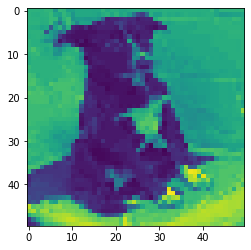

In [191]:
plt.imshow(test_cat[30])
plt.show()

In [192]:
wrong_index = []
for i, y in enumerate(yhat):
    if y < 0.5:
        wrong_index.append(i)
len(wrong_index)

236